# Final Capstone: Instacart Reordered Product Prediction

Problem statement:

Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be  reordered.

The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.

File descriptions

Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.

 aisles.csv
 
 aisle_id,aisle  
 1,prepared soups salads  
 2,specialty cheeses  
 3,energy granola bars  
 
 
departments.csv

 department_id,department  
 1,frozen  
 2,other  
 3,bakery  


order_products__*.csv

These files specify which products were purchased in each order. order_products__prior.csv contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with no reordered items. See the evaluation page for full details.

 order_id,product_id,add_to_cart_order,reordered  
 
 1,49302,1,1  
 1,11109,2,1  
 1,10246,3,0  
 
orders.csv

This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
 
 2539329,1,prior,1,2,08,  
 2398795,1,prior,2,3,07,15.0  
 473747,1,prior,3,3,12,21.0  

products.csv

 product_id,product_name,aisle_id,department_id
 1,Chocolate Sandwich Cookies,61,19  
 2,All-Seasons Salt,104,13  
 3,Robust Golden Unsweetened Oolong Tea,94,7  

sample_submission.csv

order_id,products
17,39276  
34,39276  
137,39276  


## Objective :

The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order.We will try to analyse and explore data in all the aspects so that we can get understanding of data and understand  the factual truth.We will try to understand the behavior, trend inside the data which will be very benefical for the organization's profit.Below are few questions that will be answered here-

1.This was stated in the description" there are no orders less than 4 and is max capped at 100 ", is this correct?

2.What days are the highest orders placed and what day are the lowest orders placed?

3.What time in 24 hours are the most orders placed?

4.When are the maximum ordered placed-weekly, monthly,first week of the month?

5.How many  of the products in an order are re-ordered products?

6.What  are the highest bought products?

7.At what time of the day Reordered products are bought?


# Sections:

The final capstone is divided into the below sections

1.Importing python Libraries

2.Data Cleaning

3.Data Exploration

4.Getting started with Predictive Modelling

5.Conclusion

In [63]:

#import basic Libraries
import pandas as pd
import numpy as np
#import numpy_indexed as npi
from tqdm import tqdm

#Visualizaiton imports
import seaborn as sns
import matplotlib.pyplot as plt

#combine sparse matrices
import scipy.sparse as sps

#Importing Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,f1_score 
from sklearn.decomposition import PCA
from sklearn import tree,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from keras.models import Sequential
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
import tensorflow as tf
import keras

# Import the backend
from keras import backend as K
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


Now, since I have imported all the required libraries, lets go ahead and read the csv files and create dataframes.This will create  a table like structure and then we can do our analysis.Here we have 6 files, hence 6 dataframes.

In [73]:
#import of all files from the data folder.
aisles = pd.read_csv('C:/Users/ankush/Downloads/aisles.csv')
departments = pd.read_csv('C:/Users/ankush/Downloads/departments.csv')
order_products__prior = pd.read_csv('C:/Users/ankush/Downloads/order_products__prior.csv')
order_products__train = pd.read_csv('C:/Users/ankush/Downloads/order_products__train.csv')
orders = pd.read_csv('C:/Users/ankush/Downloads/orders.csv')
products = pd.read_csv('C:/Users/ankush/Downloads/products.csv')

# Data Cleaning

Now,I will go ahead with cleaning the data , which will help in more effecient analysis of the dataset and also for machine learning models to understand the data better.First,lets find out if any of the dataframe as any nulls.If so, we will drop those records

In [74]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [20]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [21]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [75]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [76]:
orders=orders.dropna(0)
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [23]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [102]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

So, I have now completed the first step.Lets go ahead with joining the relevant datasets.I am using left outer join which looks to be better option, since I want the all the values from left table and matching value from the right table.

In [77]:
opt = order_products__train.merge(products,how='left', on='product_id')
opt = opt.merge(orders,how='left', on='order_id')
opt = opt.merge(aisles,how='left', on='aisle_id')
opt = opt.merge(departments,how='left', on='department_id')
opt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods
5,1,13176,6,0,Bag of Organic Bananas,24,4,112108,train,4,4,10,9.0,fresh fruits,produce
6,1,47209,7,0,Organic Hass Avocado,24,4,112108,train,4,4,10,9.0,fresh fruits,produce
7,1,22035,8,1,Organic Whole String Cheese,21,16,112108,train,4,4,10,9.0,packaged cheese,dairy eggs
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,79431,train,23,6,18,30.0,specialty cheeses,dairy eggs
9,36,19660,2,1,Spring Water,115,7,79431,train,23,6,18,30.0,water seltzer sparkling water,beverages


In [28]:
opt.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
department                0
dtype: int64

Below, I am trying to check if we need resampling if values for "reordered" column is balanced for 0 or 1.It looks like they should be fine

In [78]:
opt[opt.reordered==0].shape

(555793, 15)

In [79]:
opt[opt.reordered==1].shape

(828824, 15)

# Data Exploration

As we could see, orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.
The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files.?
For each  order of a customer,we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.
Let us first get the count of rows in each of the three sets

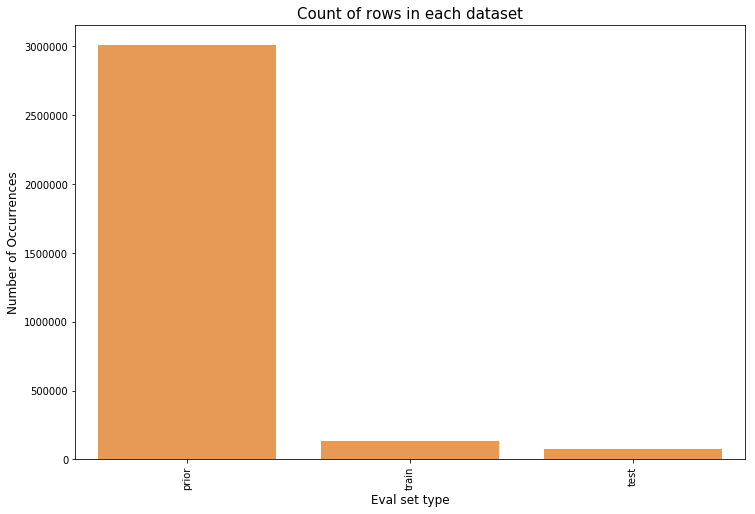

In [74]:
color = sns.color_palette()
cnt_srs = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.Now let us validate the claim that 4 to 100 orders of a customer are given in the description spec

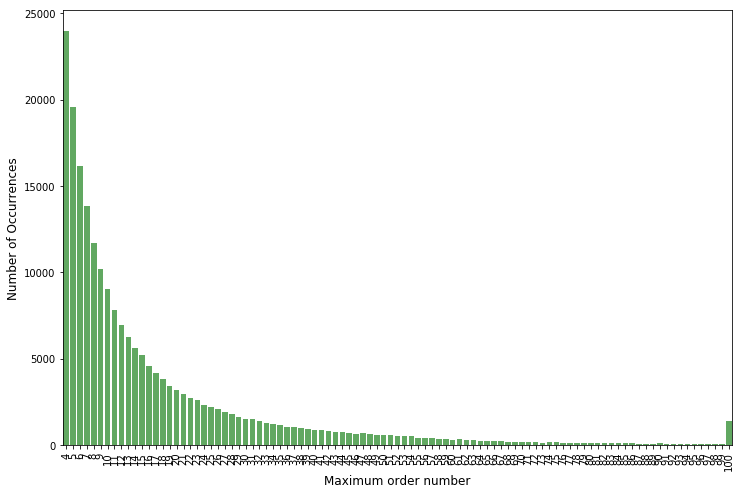

In [93]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

This proves that there are no orders less than 4 and is max capped at 100 as given in the description.Now, lets us see the ordering frequency for week days

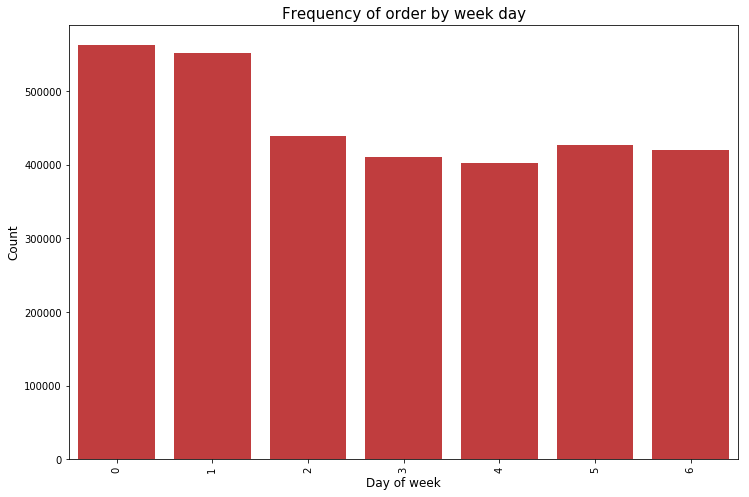

In [95]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

It looks like 0 i.e Saturday and 1 i.e Sunday when the orders are high and low during Wednesday.
Now we shall see how the distribution is with respect to time of the day.

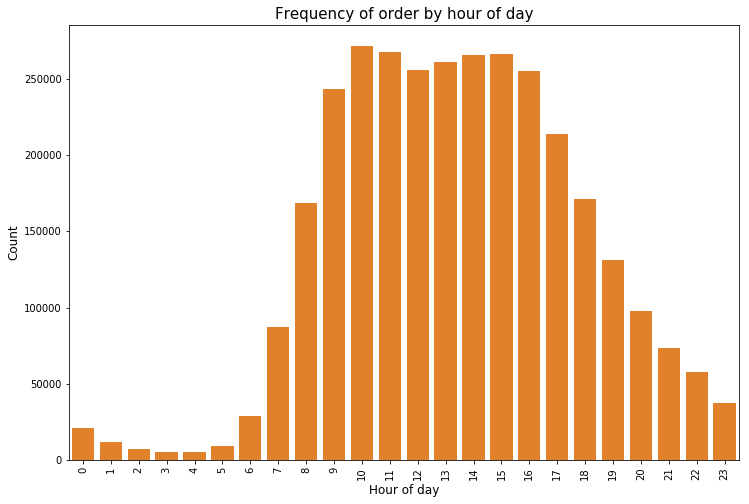

In [96]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

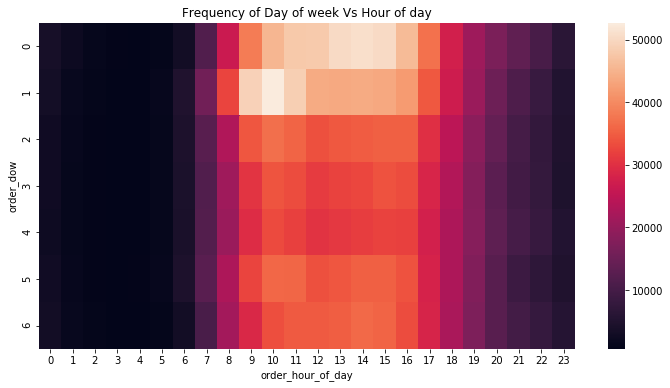

In [99]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

It Seems Satuday evenings and Sunday mornings are the prime time for orders.
Now let us check the time interval between the orders.

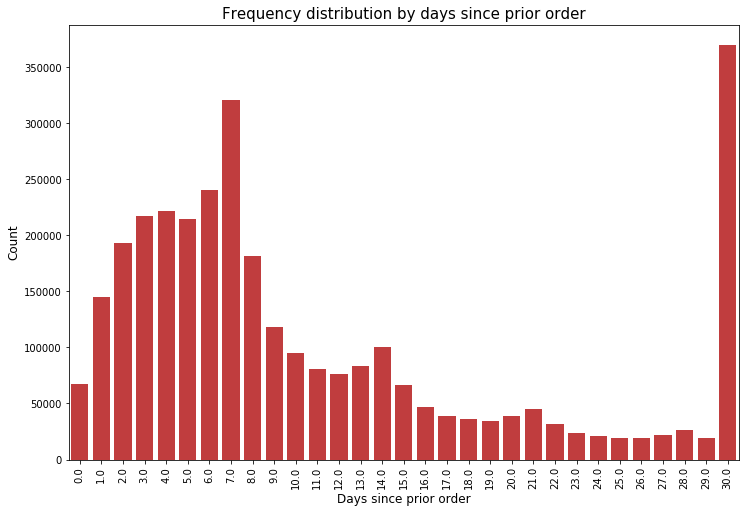

In [100]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

It looks like customer order weekly/first(mostly in first week) or monthly. We are seeing bigger peaks at first week  and then last day of the month

let us check out the re-order percentage in prior set and train set.

In [104]:
# percentage of re-orders in prior set #
order_products__prior.reordered.sum() / order_products__prior.shape[0]

0.5896974667922161

In [106]:

# percentage of re-orders in train set #
order_products__train.reordered.sum() / order_products__train.shape[0]

0.5985944127509629

On an average, about 59% of the products in an order are re-ordered products.

In [131]:
cnt_srs = opt['product_name'].value_counts().reset_index().head()
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135


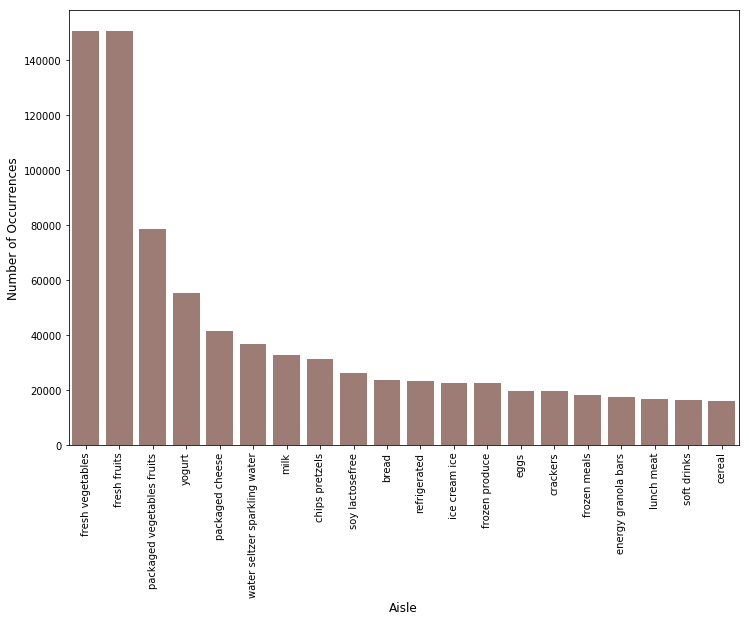

In [132]:
cnt_srs = opt['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

It looks like fresh vegetables and fresh nuts were the highest bought products.

In [135]:
opt['department'].value_counts()

produce            409087
dairy eggs         217051
snacks             118862
beverages          114046
frozen             100426
pantry              81242
bakery              48394
canned goods        46799
deli                44291
dry goods pasta     38713
household           35986
meat seafood        30307
breakfast           29500
personal care       21570
babies              14941
international       11902
missing              8251
alcohol              5598
pets                 4497
other                1795
bulk                 1359
Name: department, dtype: int64

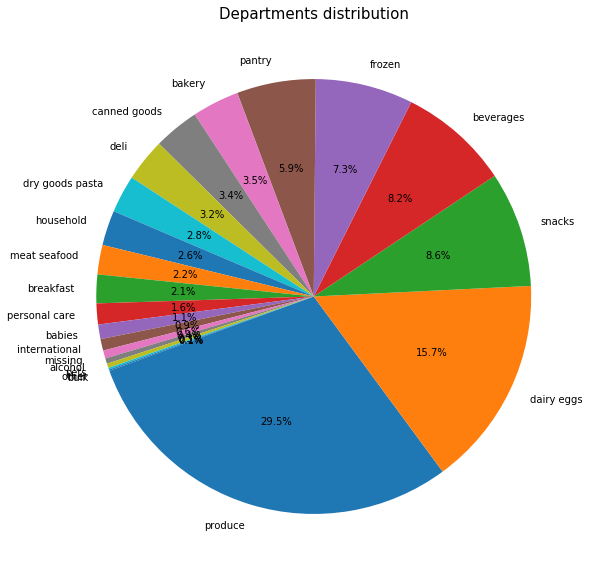

In [136]:
plt.figure(figsize=(10,10))
temp_series = opt['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce is the largest department. Now let us check the reorder ratio of day of week vs hour of day

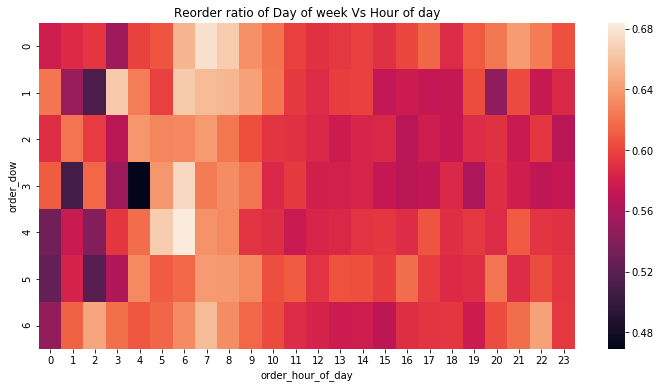

In [137]:
grouped_df = opt.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

Looks like reorder ratios are quite high during the early mornings compared to later half of the day.Now,lets go ahead with creating models and fitting the data to the model.But first, we have to create x variables i.e input variables and y as outcome variables

# Getting Started with Predictive Modelling

## 1.Supervised Learning

### Getting X and Y variables for the model for model evaluation

In [80]:
X=opt.drop(['reordered','product_name','aisle','eval_set','department'],axis=1)
Y=opt['reordered']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [71]:
X_train.shape

(969231, 10)

Let us use dimension reduction technique to reduce the dimension and determine the accuracy of the models.We are going to try first PCA and then Selectkbest

# PCA

In [82]:
X_pca = PCA(n_components=5)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.96201378e-01 3.59589243e-03 2.02727497e-04 1.47614632e-09
 3.06447295e-10]


Now, since we have reduce components to 5 , let us see if PCA  shows any overfitting.After looking at variance, we do not see any overfitting which is good for training the models.Let us now start with training the models with the data.We are going to use 7 models-Naive Bayes,logistic Regression, KNN,Decision tree,Random Forest,SVC,GBR.

# Naive Bayes

Now, we are training  Naive bayes with the dataset.

In [143]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train_pca,y_train)

# Classify, storing the result in a new variable.
y_pred_bnb = bnb.predict(X_train_pca)

Since we have fitted the model with the data and we dont have any parameters to tune using gridsearch cv so we are only using Cross Validation Classification_report,AUC,Confusion Matrix accuracy of the model

# Cross Validation

In [139]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(bnb, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(bnb, X_test_pca, y_test, cv=5))

Training data accuracy:  [0.61009972 0.60806203 0.60883068 0.61009054 0.61037943]
Testing data accuracy:  [0.60856063 0.6066661  0.60853184 0.60752073 0.60885684]


# AUC

In [144]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for BNB :" ,roc_auc_score(y_train, y_pred_bnb))

AUC Score for BNB : 0.5512120024750862


# Confusion Matrix

In [145]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_bnb))
print('Accuracy Score for BNB :',accuracy_score(y_train, y_pred_bnb))

[[ 99546 289422]
 [ 89070 491193]]
Accuracy Score for BNB : 0.6094924739303633


Here we see the FP and FN are  low which might be due to the reason that most of the features  are unable  to make the model understand the data requirements and hence not a good accuracy in the model 

In [148]:

print("Classification Report for BNB:",classification_report(y_train, y_pred_bnb))

Classification Report for BNB:               precision    recall  f1-score   support

           0       0.53      0.26      0.34    388968
           1       0.63      0.85      0.72    580263

   micro avg       0.61      0.61      0.61    969231
   macro avg       0.58      0.55      0.53    969231
weighted avg       0.59      0.61      0.57    969231



We used NB model because it is relatively simple than other models and it assumes that input variables are independent from each other, which will help us to avoid overfitting.It might not produce a high accuracy because of its simpilicity but runtime will be less than rest of the models.As we notice above, Cross validation,AUC, Confusion Matrix,Classification report are having ok scores.Naive Bayer is doing okay to predict the delay of trains which is expected.Here class 1 and 0 doesnot have that decent results but we would want to improve the accuracy results in order to predict better

# Logistic Regression

In [151]:
lr = LogisticRegression(C=0.02)

In [152]:
lr.fit(X_train_pca,y_train)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### GridSearchcv to get the best parameters


In [153]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.62825374 0.62811652 0.62812993 0.62813715 0.62814541 0.62813922
 0.62814128 0.62813922 0.62814128 0.62813922 0.62813922 0.62813922
 0.62814025 0.62813922]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62825569 0.62811388 0.62814999 0.62810758 0.62810838 0.62810746
 0.628107   0.62810735 0.62810872 0.62810735 0.62810563 0.62810735
 0.62810689 0.62810735]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.6282537393046652
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [58]:
lr = LogisticRegression(C= 0.001, penalty= 'l1')
lr.fit(X_train_pca,y_train)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [156]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(lr, X_test_pca, y_test, cv=5))

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Training data accuracy:  [0.62873813 0.62643734 0.62866591 0.62951327 0.62803271]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Testing data accuracy:  [0.62718168 0.62864571 0.62885034 0.62821238 0.63013831]


In [158]:
y_pred_lr = lr.predict(X_train_pca)

# Confusion Matrix

In [44]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for Logistic Regression :',accuracy_score(y_train, y_pred_lr))

[[112718 276250]
 [ 81116 499147]]
Accuracy Score for Random Forest : 0.6312891354073488


# AUC

In [43]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Logistic Regression :" ,roc_auc_score(y_train, y_pred_lr))

AUC Score for Random Forest : 0.5749977753102224


# Classification Report

In [159]:

from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression:",classification_report(y_train, y_pred_lr))

Classification Report for Logistic Regression:               precision    recall  f1-score   support

           0       0.56      0.34      0.42    388968
           1       0.65      0.82      0.73    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.58      0.58    969231
weighted avg       0.61      0.63      0.60    969231



Logistic Regression usually works perfect to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.This model again is easy to implement, quick to train and resistent to overfitting.Here, the accuracy is  in 60s which makes sense because we do not have lot of meaningful features that will help model to understand the data better.Cross validation,AUC, Confusion Matrix,Classification report doesnot have  good scores with no sign of overfitting.TN and FN look okay for both confusion matrix and Classification report.Runtime looks to be better than SVC ,GBR and KNN.

# KNN Classification

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [43]:
params = {'n_neighbors':[5],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class_knn = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class_knn.fit(X_train_pca,y_train)
#The best hyper parameters set

results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 5}]
[0.57054717 0.57054717 0.57054717 0.57054717]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.72350967 0.72350967 0.72350967 0.72350967]
Best Hyper Parameters:
 {'leaf_size': 1, 'n_neighbors': 5}
0.5705471657427383
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [28]:

#Fitting the model with the parameters and train data
knn_model = KNeighborsClassifier(leaf_size=1,n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_train_pca)

In [59]:
y_pred_knn.shape

(969231,)

In [29]:
from sklearn.model_selection import cross_val_score
print("Training data accuracy for knn: ",cross_val_score(knn_model, X_train_pca, y_train, cv=10))
print("Testing data accuracy for knn: ",cross_val_score(knn_model, X_test_pca, y_test, cv=10))

Training data accuracy for knn:  [0.58909042 0.58860551 0.58934836 0.58908618 0.59056158 0.59064412
 0.59096396 0.58943698 0.58689462 0.58962877]
Testing data accuracy for knn:  [0.58846895 0.58804978 0.58530538 0.58718313 0.58658129 0.58767875
 0.5895084  0.58998989 0.58861765 0.59220473]


# AUC

In [46]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for KNN :" ,roc_auc_score(y_train, y_pred_knn))

AUC Score for Random Forest : 0.7042915632004009


# Confusion Matrix

In [47]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for KNN :',accuracy_score(y_train, y_pred_knn))

[[225505 163463]
 [ 99323 480940]]
Accuracy Score for Random Forest : 0.7288716518559559


# Classification Report

In [48]:
from sklearn.metrics import classification_report
print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.69      0.58      0.63    388968
           1       0.75      0.83      0.79    580263

   micro avg       0.73      0.73      0.73    969231
   macro avg       0.72      0.70      0.71    969231
weighted avg       0.73      0.73      0.72    969231



KNN usually works well for big datasets.If we observce here, dataset is more than 1 million, so knn is having better accuracy than NB and Logistic Regression.As we notice above, Cross validation,AUC, Confusion Matrix,Classification report are having better accuracy than NB and Logistic Regression.There is no sign of overfitting here.If we see false negative and false positives for class 0 and 1 are almost similar and scores are better and run time is short as well.

# Random Forest Classifier

In [83]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_pca, y_train)
rfc_pred = rfc.predict(X_train_pca)

In [20]:
dt_grid={'max_depth':[3,4,5],'max_features': [5]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_pca, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 5}, {'max_depth': 4, 'max_features': 5}, {'max_depth': 5, 'max_features': 5}]
[0.62952691 0.63083414 0.63213517]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62974152 0.63133948 0.63251898]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 5}
0.6321351669519444
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [84]:
rfc = ensemble.RandomForestClassifier(max_depth=5,max_features= 5)
rfc.fit(X_train_pca, y_train)
rfc_pred = rfc.predict(X_train_pca)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(rfc, X_test, y_test, cv=5))

Training data accuracy:  [0.63246787 0.63030122 0.63348414 0.63232995 0.63211329]
Testing data accuracy:  [0.66179975 0.66242161 0.66592438 0.66036328 0.66667068]


# AUC

In [23]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, rfc_pred))

AUC Score for Random Forest : 0.5790349655943385


# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, rfc_pred))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, rfc_pred))

[[120309 268659]
 [ 87755 492508]]
Accuracy Score for Random Forest : 0.6322713573957086


# Classification Report

In [26]:
from sklearn.metrics import classification_report
print("Classification Report for Random Forest:",classification_report(y_train, rfc_pred))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.58      0.31      0.40    388968
           1       0.65      0.85      0.73    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.58      0.57    969231
weighted avg       0.62      0.63      0.60    969231



Random forest classifier usually handles the missing values and maintain the accuracy of a large proportion of data.Thats why it is awlays better to use Random Forest for classification problems.If there are more trees, it won’t allow overfitting trees in the model.If we observe here, there seem to be no or very less overfitting.But the accuracy doesnt seem to be good as expected by Random forest.May be its because it doesnot have enough dimensions to understand and get good accuaracy which it required to make it work well.

# Decision Tree

In [66]:
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)

In [67]:

dt_grid={'max_depth':[50],'max_features': [5]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_pca, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 5}]
[0.60001383]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.99962176]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 5}
0.6000138253935337
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [68]:

#Fitting the best parmaters after gridsearchcv to the decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=50,max_features=5)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)

In [69]:

print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_pca, y_test, cv=10))

Training data accuracy for Decision Tree:  [0.59990302 0.59899509 0.59903636 0.59944492 0.60186953 0.5997854
 0.6027981  0.60035286 0.60286622 0.59834712]
Testing data accuracy for Decision Tree:  [0.59354839 0.59534413 0.59247936 0.588772   0.59209418 0.59256584
 0.5869806  0.59518995 0.59112138 0.58982137]


In [71]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Decision Tree :" ,roc_auc_score(y_train, y_pred_dt))

AUC Score for Decision Tree : 0.9988297008562766


In [74]:

print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))

[[388256    712]
 [   296 579967]]
Accuracy Score for Decision Tree : 0.998960000247619


In [75]:
print("Classification Report for Decision Tree:",classification_report(y_train, y_pred_dt))

Classification Report for Decision Tree:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    388968
           1       1.00      1.00      1.00    580263

   micro avg       1.00      1.00      1.00    969231
   macro avg       1.00      1.00      1.00    969231
weighted avg       1.00      1.00      1.00    969231



Decision Tree are one of the simple models.It is also useful when most of the input variables are categorical and produces good results.It is usually suspectible to overfitting or noise.In this case,the results are ideal, which is not likely possible.Hence, Decision tree has got overfitting.AUC,Confusion Matrix and Classification report are having overfitting which tells us that we should not be using this model and choose other model which have better accuracy

# SVC

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(svm,param_grid,refit = True)
grid_class_svm.fit(X_train_pca, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [ ]:
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)

In [ ]:

print("Training data accuracy for Random Forest: ",cross_val_score(grid_class_svm, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Random Forest: ",cross_val_score(grid_class_svm, X_test_pca, y_test, cv=10))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_svm))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_bnb))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_svm))

In [ ]:

print("Classification Report for Random Forest:",classification_report(y_train, y_pred_svm))

SVC is one of the complex models for getting good accuracy.The tradeoff with this model is, it takes more time to run than the other models because of its large computations happening in the background.It taken atleast 8-10 hours to complete.Results are good but we will not be using this model unless other models are not performing well

# GradientBoostingClassifier


In [ ]:
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:

params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_pca, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [ ]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:
print("Training data accuracy for GBR: ",cross_val_score(gb, X_train_pca, y_train, cv=10))
print("Testing data accuracy for GBR: ",cross_val_score(gb, X_test_pca, y_test, cv=10))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for GBR :" ,roc_auc_score(y_train, y_pred_gbr))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_gbr))
print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

In [ ]:

print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))

GBR is especially used to improve the accuaracy.This model is very useful if other models are not accurate ,then model might be a good option for predictive accuracy.The downside of this model is this model can very slow to predict the accuracy because of the ensemble algorithms running in the background.This is the same scenario here.It is very slow.However,Accuracy scores are good since it models the data over and over, each time adjusting the model based on what was learned from the previous one.Now, we will use SKB for dimension reduction and use the same techniques as above to get the accuracy of each model

# SKB

Now, lets use another popular dimension reduction technique Selectkbest.This is also very effective when compared to PCA.We are trying to compare PCA with SKB and the model accuracies

In [123]:
#Using skb to get the best 5 features out of the total
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
skb = SelectKBest(f_classif,k=5)
skb.fit(X_train, y_train)
#skb.fit(X_train_sample, y_train_sample)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

We have reduced the features to 5 here

# Naive Bayes

In [162]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train_skb,y_train)

# Classify, storing the result in a new variable.
y_pred_bnb = bnb.predict(X_train_skb)

# Cross Validation

In [163]:
print("Training data accuracy for Naive Bayes: ",cross_val_score(bnb, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Naive Bayes: ",cross_val_score(bnb, X_test_skb, y_test, cv=10))

Training data accuracy for Naive Bayes:  [0.631567   0.63163922 0.62882258 0.63176955 0.63472035 0.63167669
 0.63626797 0.63317272 0.63304513 0.63302449]
Testing data accuracy for Naive Bayes:  [0.63370246 0.63171959 0.63037146 0.63318809 0.63578805 0.62935144
 0.63385334 0.63033849 0.63033849 0.63794598]


# AUC

In [165]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for BNB :" ,roc_auc_score(y_train, y_pred_bnb))

AUC Score for BNB : 0.6004345924693821


# Confusion Matrix

In [166]:

print(confusion_matrix(y_train, y_pred_bnb))
print('Accuracy Score for BNB :',accuracy_score(y_train, y_pred_bnb))

[[170217 218751]
 [137373 442890]]
Accuracy Score for BNB : 0.6325705636736754


In [167]:

print("Classification Report for BNB:",classification_report(y_train, y_pred_bnb))

Classification Report for BNB:               precision    recall  f1-score   support

           0       0.55      0.44      0.49    388968
           1       0.67      0.76      0.71    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.60      0.60    969231
weighted avg       0.62      0.63      0.62    969231



Cross validation,AUC, Confusion Matrix,Classification report seem to have much better results than PCA for NB.But still the accuracy scores are not good.Now we will search rest of the models

# Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(X_train_skb,y_train)
y_pred_lr = lr.predict(X_train_skb)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Gridsearch cv to get the best parameters

In [168]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.62825064 0.62811652 0.62812787 0.62813715 0.62814437 0.62813922
 0.62814025 0.62813922 0.62813922 0.62813922 0.62814025 0.62813922
 0.62813818 0.62813922]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62825832 0.62811388 0.6281485  0.62810758 0.62810677 0.62810746
 0.62810769 0.62810735 0.62810769 0.62810735 0.62810826 0.62810735
 0.62810677 0.62810735]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.628250644067307
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [169]:
lr = LogisticRegression(C= 0.001, penalty= 'l1')
lr.fit(X_train_skb,y_train)
y_pred_lr = lr.predict(X_train_skb)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_skb, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(lr, X_test_skb, y_test, cv=5))

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Training data accuracy:  [0.64873328 0.64712376 0.64734043 0.64783719 0.6480229 ]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Testing data accuracy:  [0.64562219 0.65021606 0.65076977 0.64760403 0.6478207 ]


# AUC

In [171]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for LR :" ,roc_auc_score(y_train, y_pred_lr))

AUC Score for LR : 0.5968909258047632


In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for LR :',accuracy_score(y_train, y_pred_lr))

[[131798 257170]
 [ 84172 496091]]
Accuracy Score for LR : 0.6478218298836913


In [173]:
from sklearn.metrics import classification_report
print("Classification Report for LR:",classification_report(y_train, y_pred_lr))

Classification Report for LR:               precision    recall  f1-score   support

           0       0.61      0.34      0.44    388968
           1       0.66      0.85      0.74    580263

   micro avg       0.65      0.65      0.65    969231
   macro avg       0.63      0.60      0.59    969231
weighted avg       0.64      0.65      0.62    969231



Logistic Regression usually works perfect to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.This model again is easy to implement, quick to train and resistent to overfitting.Here, the accuracy is in 60s which makes sense because we do not have lot of meaningful features that will help model to understand the data better.Cross validation,AUC, Confusion Matrix,Classification report doesnot have good scores with no sign of overfitting.TN and FN look okay for both confusion matrix and Classification report.Runtime looks to be better than SVC ,GBR and KNN.

# KNN

In [124]:
#Fitting the model with the parameters and train data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)

In [57]:

params = {'n_neighbors':[5],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class_knn = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class_knn.fit(X_train_skb,y_train)
#The best hyper parameters set

results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 5}]
[0.63439159 0.63460104 0.63437612 0.63429048]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.7425397  0.74252423 0.74252474 0.74233078]
Best Hyper Parameters:
 {'leaf_size': 2, 'n_neighbors': 5}
0.6346010393807049
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [125]:

#Fitting the model with the best parameters we got above to improve the performance
knn_model = KNeighborsClassifier(leaf_size= 2,n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)

# Cross Validation

In [59]:
print("Training data accuracy for KNN: ",cross_val_score(knn_model, X_train_skb, y_train, cv=10))
print("Testing data accuracy for KNN: ",cross_val_score(knn_model, X_test_skb, y_test, cv=10))

Training data accuracy for KNN:  [0.6357249  0.6370352  0.63624077 0.63537035 0.63627828 0.63483384
 0.63819733 0.63732035 0.63763645 0.63613008]
Testing data accuracy for KNN:  [0.63088589 0.63241773 0.62890296 0.63020294 0.63410289 0.62855698
 0.63329963 0.63026626 0.6317348  0.63380519]


# AUC

In [60]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for KNN :" ,roc_auc_score(y_train, y_pred_knn))

AUC Score for KNN : 0.7215467450149926


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for KNN :',accuracy_score(y_train, y_pred_knn))

# Classification Report

In [61]:

print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))

Classification Report for KNN:               precision    recall  f1-score   support

           0       0.70      0.62      0.66    388968
           1       0.76      0.83      0.79    580263

   micro avg       0.74      0.74      0.74    969231
   macro avg       0.73      0.72      0.73    969231
weighted avg       0.74      0.74      0.74    969231



KNN usually works well for big datasets.If we observce here, dataset is more than 1 million, so knn is having better accuracy than NB and Logistic Regression.As we notice above, Cross validation,AUC, Confusion Matrix,Classification report are having better accuracy than NB and Logistic Regression.There is no sign of overfitting here.If we see false negative and false positives for class 0 and 1 are almost similar and scores are better and run time is short as well.

# Random Forest

In [36]:

#Fitting the model with the parameters and train data
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

In [37]:

dt_grid={'max_depth':[3,4,5],'max_features': [5]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_skb, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 5}, {'max_depth': 4, 'max_features': 5}, {'max_depth': 5, 'max_features': 5}]
[0.64420659 0.65376675 0.65869953]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.64432731 0.65384867 0.6588353 ]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 5}
0.6586995257064622
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [38]:

#Fitting the model with the best parameters we got above to improve the performance
rfc = ensemble.RandomForestClassifier(max_depth=3, max_features= 5,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

In [40]:

print("Training data accuracy for Random Forest: ",cross_val_score(rfc, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Random Forest: ",cross_val_score(rfc, X_test_skb, y_test, cv=10))

Training data accuracy for Random Forest:  [0.64327721 0.64592877 0.64400974 0.64358305 0.64249972 0.64403702
 0.64754496 0.64106559 0.64519923 0.64649925]
Testing data accuracy for Random Forest:  [0.64557053 0.64659717 0.64736753 0.64883603 0.64922121 0.64714238
 0.64709423 0.64379604 0.6445905  0.64846646]


In [42]:

print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_rfc))

AUC Score for Random Forest : 0.6111819520156541


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_knn))

[[230000 158968]
 [102308 477955]]
Accuracy Score for Random Forest : 0.7304295879929552


In [44]:
print("Classification Report for Random Forest:",classification_report(y_train, y_pred_rfc))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.58      0.44      0.50    388968
           1       0.68      0.78      0.73    580263

   micro avg       0.65      0.65      0.65    969231
   macro avg       0.63      0.61      0.61    969231
weighted avg       0.64      0.65      0.63    969231



Random forest classifier usually handles the missing values and maintain the accuracy of a large proportion of data.Thats why it is awlays better to use Random Forest for classification problems.If there are more trees, it won’t allow overfitting trees in the model.If we observe here, there seem to be no or very less overfitting.But the accuracy doesnt seem to be good as expected by Random forest.May be its because it doesnot have enough dimensions to understand and get good accuaracy which it required to make it work well.

# Decision Tree

In [45]:
#Fitting the model with the parameters and train data
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_skb)

In [47]:

dt_grid={'max_depth':[50],'max_features': [5]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_skb, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 5}]
[0.60235795]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.88816226]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 5}
0.6023579518195353
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [48]:

#Fitting the model with the best parameters we got above to improve the performance
decision_tree = tree.DecisionTreeClassifier(max_depth=50,max_features=5)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_skb)

In [49]:

print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_skb, y_train, cv=5))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_skb, y_test, cv=5))

Training data accuracy for Decision Tree:  [0.60249578 0.60119579 0.60184063 0.6020016  0.60185715]
Testing data accuracy for Decision Tree:  [0.59099882 0.59084945 0.59342538 0.59503834 0.59338927]


In [50]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Decision Tree :" ,roc_auc_score(y_train, y_pred_dt))

AUC Score for Decision Tree : 0.8832534428502907


In [53]:
print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))

[[348463  40505]
 [ 75062 505201]]
Accuracy Score for Decision Tree : 0.8807642347386743


Decision Tree are one of the simple models.It is also useful when most of the input variables are categorical and produces good results.It is usually suspectible to overfitting or noise.In this case,the results are very good, which is not likely possible.Hence, Decision tree has got overfitting.AUC,Confusion Matrix and Classification report are having overfitting which tells us that we should not be using this model and choose other model which have better accuracy

# SVC

In [ ]:
#Fitting the model with the parameters and train data
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_skb, y_train)
y_pred_svm = svm.predict(X_train_skb)

In [ ]:

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train_skb, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [ ]:

print("Training data accuracy for SVC: ",cross_val_score(grid_class_svm, X_train_skb, y_train, cv=5))
print("Testing data accuracy for SVC: ",cross_val_score(grid_class_svm, X_test_skb, y_test, cv=5))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for SVC :" ,roc_auc_score(y_train, y_pred_dt))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_dt))
print('Accuracy Score for SVC :',accuracy_score(y_train_sample, y_pred_dt))

In [ ]:

print("Classification Report for SVC:",classification_report(y_train_sample, y_pred_dt))

SVC is one of the complex models for getting good accuracy.The tradeoff with this model is, it takes more time to run than the other models because of its large computations happening in the background.It taken atleast 8-10 hours to complete.Results are good but we will not be using this model unless other models are not performing well

# Gradient Boost Classifier


In [ ]:

#Fitting the model with the parameters and train data
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_skb, y_train)
y_pred_gbr = clf.predict(X_train_skb)

In [ ]:
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_skb, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [ ]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:

print("Training data accuracy for GBR: ",cross_val_score(gb, X_train_skb, y_train, cv=5))
print("Testing data accuracy for GBR: ",cross_val_score(gb, X_test_skb, y_test, cv=5))

In [ ]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for GBR :" ,roc_auc_score(y_train y_pred_gbr))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_gbr))
print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

In [ ]:

print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))


GBR is especially used to improve the accuaracy.This model is very useful if other models are not accurate ,then model might be a good option for predictive accuracy.The downside of this model is this model can very slow to predict the accuracy because of the ensemble algorithms running in the background.This is the same scenario here.It is very slow.However,Accuracy scores are good since it models the data over and over, each time adjusting the model based on what was learned from the previous one.Now, we will use SKB for dimension reduction and use the same techniques as above to get the accuracy of each model

## 2.Unsupervised Learning

# K-Means Clustering

In [39]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
# Normalize the data.
X_train_norm = normalize(X_train)

# Reduce it to two components.
X_train_pca = PCA(5).fit_transform(X_train_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit(X_train_pca)
labels = y_pred.labels_
print(metrics.silhouette_score(X_train_pca, labels, metric='euclidean'))



0.4043876972458541


In [41]:
# Reduce it to two components.
X_train_pca = PCA(2).fit_transform(X_train_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit(X_train_pca)
labels = y_pred.labels_
print(metrics.silhouette_score(X_train_pca, labels, metric='euclidean'))

0.5078113123208869


The silhouette score seems to perform better when number of clusters=2 rather than 5.This might be because of the reason that it is a classification problem and it checks the 2 most important features and determines the accuracy based on that

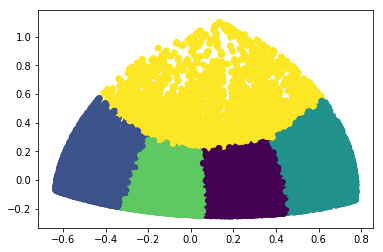

Comparing k-means clusters against the data:
reordered     0     1
row_0                
0          3728  5630
1          4884  7035
2          2883  4553
3          5658  8367
4           910  1340


In [40]:
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train_pca)

# Plot the solution.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

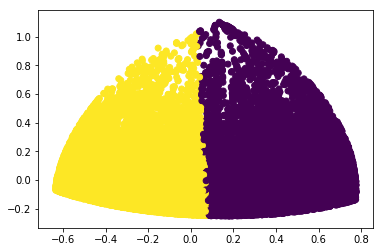

Comparing k-means clusters against the data:
reordered      0      1
row_0                  
0           7008  10826
1          11055  16099


In [43]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_pca)

# Plot the solution.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

Number of clusters is 2  shows that there are 2 distinctive groups classified by the algorithm.We do see some overlaps within the two groups.But we can classify the data points using 2 clusters using 2 groups.When number of clsuters is 5, it is being gouped based on factors such customer reorder the products, based on order_id, high buying customer/low buying customer etc.But there will more overlaps within the groups hence less accuracy

# Adjusted Rand Score

In [54]:
from sklearn import metrics
n_clusters=2
full_pred = KMeans(n_clusters, random_state=42).fit_predict(X_train_norm)  
metrics.adjusted_rand_score(y_train, full_pred)

-0.0009527012203679536

Rand score maye be ignored here.

Now let's try MiniBatch:

In [46]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_train_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))        


Comparing k-means and mini batch k-means solutions:
col_0      0      1
row_0              
0      17180      0
1        654  27154


Number of clusters to 2 show better results than 5.Also since we are using minibatches the accuarcy and results should be better

# Mean-shift

In [206]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


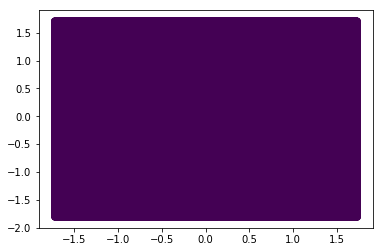

Comparing the assigned categories to the ones in the data:
col_0           0
reordered        
0          388968
1          580263


In [71]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Mean shift is showing only 1 cluster which doesnt seem to be correct.So, we will not be using this model on our dataset.

# Spectral Clustering

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\ankush\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(d

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:446: RuntimeWarning: overflow encountered in square
  inertia = np.sum((X - centers[labels]) ** 2, dtype=np.float64)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\p

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\sit

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-package

C:\Users\ankush\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\m

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\p

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\sit

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-package

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-package

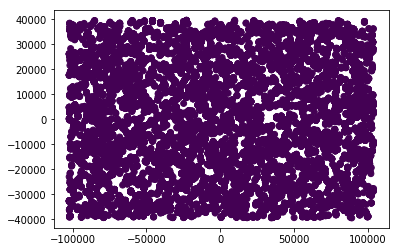

Comparing the assigned categories to the ones in the data:
col_0          0
reordered       
0           9294
1          13456


In [9]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=5)
sc.fit(X_train_pca)

#Predicted clusters.
predict=sc.fit_predict(X_train_pca)

#Graph results.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

# Affinity Propogation

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_pca)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = 5
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Same goes with Spectral propogation and affinity propogation,results are poor which means that we will not be using them for our prediction purpose.So, the standout algorithm here is k means which is usually the case.It is more reliable than other unsupervised algorithms.Now , let us use deep learning on our dataset to check the accuracies of the models.Deep learning is ideally used for image classification, object recognition, Digital signature recognition.Here, we are trying to use deep learning for our own sake  on the dataset to check the accuracy of the model and predict the outsomee

## 3.Deep Learning

Let us first start with Multi Layered Perception

### Multi Layered Perception(MLP)

It  is a set of perceptron models organized into layers, one layer feeding into the next.

In [58]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(64, activation='relu', input_shape=(10,1)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(2, activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10, 64)            128       
_________________________________________________________________
dropout_35 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
dense_43 (Dense)             (None, 10, 64)            4160      
_________________________________________________________________
dropout_36 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
dense_44 (Dense)             (None, 10, 2)             130       
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
X_train = X_train.reshape(X_train.shape[0], 10, 1)
# Training.
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_train, y_train))

# Evaluation.
scores = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 969231 samples, validate on 969231 samples
Epoch 1/10


 65792/969231 [=>............................] - ETA: 3:01:03 - loss: 6.4766 - acc: 0.59 - ETA: 23:35 - loss: 6.3676 - acc: 0.6006 - ETA: 13:57 - loss: 6.3254 - acc: 0.60 - ETA: 11:13 - loss: 6.3036 - acc: 0.60 - ETA: 9:30 - loss: 6.2784 - acc: 0.6062 - ETA: 8:24 - loss: 6.2802 - acc: 0.606 - ETA: 8:28 - loss: 6.2690 - acc: 0.606 - ETA: 8:24 - loss: 6.3076 - acc: 0.604 - ETA: 8:24 - loss: 6.3048 - acc: 0.604 - ETA: 8:10 - loss: 6.2556 - acc: 0.607 - ETA: 7:38 - loss: 6.2715 - acc: 0.606 - ETA: 7:24 - loss: 6.2517 - acc: 0.607 - ETA: 7:17 - loss: 6.2898 - acc: 0.605 - ETA: 7:19 - loss: 6.2818 - acc: 0.606 - ETA: 6:57 - loss: 6.2868 - acc: 0.605 - ETA: 7:05 - loss: 6.2738 - acc: 0.606 - ETA: 6:47 - loss: 6.3196 - acc: 0.603 - ETA: 6:39 - loss: 6.3261 - acc: 0.603 - ETA: 6:31 - loss: 6.3097 - acc: 0.604 - ETA: 6:24 - loss: 6.3377 - acc: 0.602 - ETA: 6:11 - loss: 6.3928 - acc: 0.599 - ETA: 5:59 - loss: 6.4122 - acc: 0.597 - ETA: 5:43 - loss: 6.3681 - acc: 0.600 - ETA: 5:45 - loss: 6.3876 -

344064/969231 [=========>....................] - ETA: 2:22 - loss: 6.3913 - acc: 0.599 - ETA: 2:22 - loss: 6.3910 - acc: 0.599 - ETA: 2:22 - loss: 6.3921 - acc: 0.599 - ETA: 2:22 - loss: 6.3924 - acc: 0.599 - ETA: 2:22 - loss: 6.3921 - acc: 0.599 - ETA: 2:22 - loss: 6.3919 - acc: 0.599 - ETA: 2:22 - loss: 6.3915 - acc: 0.599 - ETA: 2:22 - loss: 6.3914 - acc: 0.599 - ETA: 2:22 - loss: 6.3916 - acc: 0.599 - ETA: 2:22 - loss: 6.3920 - acc: 0.599 - ETA: 2:22 - loss: 6.3918 - acc: 0.599 - ETA: 2:22 - loss: 6.3919 - acc: 0.599 - ETA: 2:22 - loss: 6.3923 - acc: 0.599 - ETA: 2:22 - loss: 6.3914 - acc: 0.599 - ETA: 2:22 - loss: 6.3920 - acc: 0.599 - ETA: 2:22 - loss: 6.3920 - acc: 0.599 - ETA: 2:22 - loss: 6.3920 - acc: 0.599 - ETA: 2:22 - loss: 6.3924 - acc: 0.599 - ETA: 2:22 - loss: 6.3928 - acc: 0.599 - ETA: 2:22 - loss: 6.3926 - acc: 0.599 - ETA: 2:22 - loss: 6.3923 - acc: 0.599 - ETA: 2:22 - loss: 6.3926 - acc: 0.599 - ETA: 2:22 - loss: 6.3931 - acc: 0.599 - ETA: 2:22 - loss: 6.3925 - acc:

387200/969231 [==========>...................] - ETA: 2:22 - loss: 6.3931 - acc: 0.599 - ETA: 2:22 - loss: 6.3932 - acc: 0.599 - ETA: 2:22 - loss: 6.3926 - acc: 0.599 - ETA: 2:22 - loss: 6.3930 - acc: 0.599 - ETA: 2:22 - loss: 6.3932 - acc: 0.599 - ETA: 2:22 - loss: 6.3932 - acc: 0.599 - ETA: 2:22 - loss: 6.3933 - acc: 0.599 - ETA: 2:22 - loss: 6.3935 - acc: 0.599 - ETA: 2:22 - loss: 6.3939 - acc: 0.598 - ETA: 2:22 - loss: 6.3941 - acc: 0.598 - ETA: 2:22 - loss: 6.3940 - acc: 0.598 - ETA: 2:22 - loss: 6.3937 - acc: 0.599 - ETA: 2:22 - loss: 6.3934 - acc: 0.599 - ETA: 2:21 - loss: 6.3929 - acc: 0.599 - ETA: 2:22 - loss: 6.3931 - acc: 0.599 - ETA: 2:22 - loss: 6.3927 - acc: 0.599 - ETA: 2:22 - loss: 6.3933 - acc: 0.599 - ETA: 2:22 - loss: 6.3935 - acc: 0.599 - ETA: 2:22 - loss: 6.3934 - acc: 0.599 - ETA: 2:22 - loss: 6.3937 - acc: 0.598 - ETA: 2:22 - loss: 6.3943 - acc: 0.598 - ETA: 2:22 - loss: 6.3948 - acc: 0.598 - ETA: 2:22 - loss: 6.3951 - acc: 0.598 - ETA: 2:22 - loss: 6.3955 - acc:

448384/969231 [============>.................] - ETA: 2:18 - loss: 6.3943 - acc: 0.598 - ETA: 2:17 - loss: 6.3946 - acc: 0.598 - ETA: 2:17 - loss: 6.3945 - acc: 0.598 - ETA: 2:17 - loss: 6.3943 - acc: 0.598 - ETA: 2:17 - loss: 6.3946 - acc: 0.598 - ETA: 2:17 - loss: 6.3949 - acc: 0.598 - ETA: 2:17 - loss: 6.3949 - acc: 0.598 - ETA: 2:17 - loss: 6.3949 - acc: 0.598 - ETA: 2:17 - loss: 6.3950 - acc: 0.598 - ETA: 2:17 - loss: 6.3952 - acc: 0.598 - ETA: 2:17 - loss: 6.3949 - acc: 0.598 - ETA: 2:17 - loss: 6.3950 - acc: 0.598 - ETA: 2:17 - loss: 6.3945 - acc: 0.598 - ETA: 2:17 - loss: 6.3946 - acc: 0.598 - ETA: 2:17 - loss: 6.3952 - acc: 0.598 - ETA: 2:17 - loss: 6.3950 - acc: 0.598 - ETA: 2:17 - loss: 6.3951 - acc: 0.598 - ETA: 2:17 - loss: 6.3947 - acc: 0.598 - ETA: 2:17 - loss: 6.3945 - acc: 0.598 - ETA: 2:17 - loss: 6.3944 - acc: 0.598 - ETA: 2:16 - loss: 6.3946 - acc: 0.598 - ETA: 2:16 - loss: 6.3939 - acc: 0.598 - ETA: 2:16 - loss: 6.3940 - acc: 0.598 - ETA: 2:16 - loss: 6.3935 - acc:

513152/969231 [==============>...............] - ETA: 2:01 - loss: 6.3935 - acc: 0.599 - ETA: 2:01 - loss: 6.3936 - acc: 0.599 - ETA: 2:01 - loss: 6.3938 - acc: 0.598 - ETA: 2:01 - loss: 6.3937 - acc: 0.598 - ETA: 2:00 - loss: 6.3940 - acc: 0.598 - ETA: 2:00 - loss: 6.3946 - acc: 0.598 - ETA: 2:00 - loss: 6.3944 - acc: 0.598 - ETA: 2:00 - loss: 6.3933 - acc: 0.599 - ETA: 2:00 - loss: 6.3929 - acc: 0.599 - ETA: 2:00 - loss: 6.3928 - acc: 0.599 - ETA: 2:00 - loss: 6.3927 - acc: 0.599 - ETA: 2:00 - loss: 6.3921 - acc: 0.599 - ETA: 1:59 - loss: 6.3919 - acc: 0.599 - ETA: 1:59 - loss: 6.3917 - acc: 0.599 - ETA: 1:59 - loss: 6.3925 - acc: 0.599 - ETA: 1:59 - loss: 6.3930 - acc: 0.599 - ETA: 1:59 - loss: 6.3926 - acc: 0.599 - ETA: 1:59 - loss: 6.3925 - acc: 0.599 - ETA: 1:59 - loss: 6.3929 - acc: 0.599 - ETA: 1:59 - loss: 6.3930 - acc: 0.599 - ETA: 1:59 - loss: 6.3930 - acc: 0.599 - ETA: 1:59 - loss: 6.3934 - acc: 0.599 - ETA: 1:59 - loss: 6.3934 - acc: 0.599 - ETA: 1:59 - loss: 6.3935 - acc:

575744/969231 [================>.............] - ETA: 1:43 - loss: 6.3918 - acc: 0.599 - ETA: 1:43 - loss: 6.3918 - acc: 0.599 - ETA: 1:43 - loss: 6.3919 - acc: 0.599 - ETA: 1:43 - loss: 6.3923 - acc: 0.599 - ETA: 1:43 - loss: 6.3926 - acc: 0.599 - ETA: 1:43 - loss: 6.3925 - acc: 0.599 - ETA: 1:43 - loss: 6.3925 - acc: 0.599 - ETA: 1:43 - loss: 6.3926 - acc: 0.599 - ETA: 1:42 - loss: 6.3933 - acc: 0.599 - ETA: 1:42 - loss: 6.3930 - acc: 0.599 - ETA: 1:42 - loss: 6.3925 - acc: 0.599 - ETA: 1:42 - loss: 6.3930 - acc: 0.599 - ETA: 1:42 - loss: 6.3927 - acc: 0.599 - ETA: 1:42 - loss: 6.3929 - acc: 0.599 - ETA: 1:42 - loss: 6.3933 - acc: 0.599 - ETA: 1:42 - loss: 6.3934 - acc: 0.599 - ETA: 1:42 - loss: 6.3933 - acc: 0.599 - ETA: 1:42 - loss: 6.3931 - acc: 0.599 - ETA: 1:42 - loss: 6.3933 - acc: 0.599 - ETA: 1:42 - loss: 6.3936 - acc: 0.599 - ETA: 1:42 - loss: 6.3935 - acc: 0.599 - ETA: 1:41 - loss: 6.3933 - acc: 0.599 - ETA: 1:41 - loss: 6.3933 - acc: 0.599 - ETA: 1:41 - loss: 6.3933 - acc:

639488/969231 [==================>...........] - ETA: 1:27 - loss: 6.3904 - acc: 0.599 - ETA: 1:27 - loss: 6.3906 - acc: 0.599 - ETA: 1:27 - loss: 6.3901 - acc: 0.599 - ETA: 1:27 - loss: 6.3901 - acc: 0.599 - ETA: 1:27 - loss: 6.3902 - acc: 0.599 - ETA: 1:27 - loss: 6.3903 - acc: 0.599 - ETA: 1:27 - loss: 6.3904 - acc: 0.599 - ETA: 1:26 - loss: 6.3902 - acc: 0.599 - ETA: 1:26 - loss: 6.3898 - acc: 0.599 - ETA: 1:26 - loss: 6.3895 - acc: 0.599 - ETA: 1:26 - loss: 6.3897 - acc: 0.599 - ETA: 1:26 - loss: 6.3899 - acc: 0.599 - ETA: 1:26 - loss: 6.3904 - acc: 0.599 - ETA: 1:26 - loss: 6.3905 - acc: 0.599 - ETA: 1:26 - loss: 6.3904 - acc: 0.599 - ETA: 1:26 - loss: 6.3905 - acc: 0.599 - ETA: 1:26 - loss: 6.3905 - acc: 0.599 - ETA: 1:26 - loss: 6.3901 - acc: 0.599 - ETA: 1:26 - loss: 6.3901 - acc: 0.599 - ETA: 1:25 - loss: 6.3902 - acc: 0.599 - ETA: 1:25 - loss: 6.3903 - acc: 0.599 - ETA: 1:25 - loss: 6.3901 - acc: 0.599 - ETA: 1:25 - loss: 6.3899 - acc: 0.599 - ETA: 1:25 - loss: 6.3902 - acc:

684800/969231 [====================>.........] - ETA: 1:12 - loss: 6.3920 - acc: 0.599 - ETA: 1:12 - loss: 6.3927 - acc: 0.599 - ETA: 1:12 - loss: 6.3926 - acc: 0.599 - ETA: 1:12 - loss: 6.3926 - acc: 0.599 - ETA: 1:12 - loss: 6.3924 - acc: 0.599 - ETA: 1:12 - loss: 6.3923 - acc: 0.599 - ETA: 1:11 - loss: 6.3922 - acc: 0.599 - ETA: 1:11 - loss: 6.3923 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3918 - acc: 0.599 - ETA: 1:11 - loss: 6.3918 - acc: 0.599 - ETA: 1:11 - loss: 6.3918 - acc: 0.599 - ETA: 1:11 - loss: 6.3917 - acc: 0.599 - ETA: 1:11 - loss: 6.3916 - acc: 0.599 - ETA: 1:11 - loss: 6.3919 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3917 - acc: 0.599 - ETA: 1:11 - loss: 6.3919 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc:

725888/969231 [=====================>........] - ETA: 1:04 - loss: 6.3912 - acc: 0.599 - ETA: 1:04 - loss: 6.3913 - acc: 0.599 - ETA: 1:04 - loss: 6.3912 - acc: 0.599 - ETA: 1:04 - loss: 6.3914 - acc: 0.599 - ETA: 1:03 - loss: 6.3915 - acc: 0.599 - ETA: 1:03 - loss: 6.3914 - acc: 0.599 - ETA: 1:03 - loss: 6.3913 - acc: 0.599 - ETA: 1:03 - loss: 6.3915 - acc: 0.599 - ETA: 1:03 - loss: 6.3914 - acc: 0.599 - ETA: 1:03 - loss: 6.3914 - acc: 0.599 - ETA: 1:03 - loss: 6.3913 - acc: 0.599 - ETA: 1:03 - loss: 6.3915 - acc: 0.599 - ETA: 1:03 - loss: 6.3913 - acc: 0.599 - ETA: 1:03 - loss: 6.3913 - acc: 0.599 - ETA: 1:03 - loss: 6.3913 - acc: 0.599 - ETA: 1:03 - loss: 6.3913 - acc: 0.599 - ETA: 1:03 - loss: 6.3916 - acc: 0.599 - ETA: 1:03 - loss: 6.3916 - acc: 0.599 - ETA: 1:03 - loss: 6.3917 - acc: 0.599 - ETA: 1:03 - loss: 6.3917 - acc: 0.599 - ETA: 1:03 - loss: 6.3918 - acc: 0.599 - ETA: 1:03 - loss: 6.3918 - acc: 0.599 - ETA: 1:03 - loss: 6.3919 - acc: 0.599 - ETA: 1:03 - loss: 6.3919 - acc:

770304/969231 [======================>.......] - ETA: 56s - loss: 6.3949 - acc: 0.59 - ETA: 56s - loss: 6.3947 - acc: 0.59 - ETA: 56s - loss: 6.3948 - acc: 0.59 - ETA: 56s - loss: 6.3949 - acc: 0.59 - ETA: 56s - loss: 6.3951 - acc: 0.59 - ETA: 56s - loss: 6.3950 - acc: 0.59 - ETA: 56s - loss: 6.3948 - acc: 0.59 - ETA: 55s - loss: 6.3951 - acc: 0.59 - ETA: 55s - loss: 6.3952 - acc: 0.59 - ETA: 55s - loss: 6.3951 - acc: 0.59 - ETA: 55s - loss: 6.3950 - acc: 0.59 - ETA: 55s - loss: 6.3952 - acc: 0.59 - ETA: 55s - loss: 6.3954 - acc: 0.59 - ETA: 55s - loss: 6.3953 - acc: 0.59 - ETA: 55s - loss: 6.3952 - acc: 0.59 - ETA: 55s - loss: 6.3952 - acc: 0.59 - ETA: 55s - loss: 6.3951 - acc: 0.59 - ETA: 55s - loss: 6.3952 - acc: 0.59 - ETA: 55s - loss: 6.3954 - acc: 0.59 - ETA: 55s - loss: 6.3956 - acc: 0.59 - ETA: 55s - loss: 6.3959 - acc: 0.59 - ETA: 55s - loss: 6.3959 - acc: 0.59 - ETA: 55s - loss: 6.3959 - acc: 0.59 - ETA: 55s - loss: 6.3961 - acc: 0.59 - ETA: 55s - loss: 6.3963 - acc: 0.59 - E

824832/969231 [========================>.....] - ETA: 47s - loss: 6.3948 - acc: 0.59 - ETA: 47s - loss: 6.3947 - acc: 0.59 - ETA: 47s - loss: 6.3948 - acc: 0.59 - ETA: 47s - loss: 6.3948 - acc: 0.59 - ETA: 47s - loss: 6.3949 - acc: 0.59 - ETA: 47s - loss: 6.3946 - acc: 0.59 - ETA: 46s - loss: 6.3945 - acc: 0.59 - ETA: 46s - loss: 6.3948 - acc: 0.59 - ETA: 46s - loss: 6.3946 - acc: 0.59 - ETA: 46s - loss: 6.3946 - acc: 0.59 - ETA: 46s - loss: 6.3947 - acc: 0.59 - ETA: 46s - loss: 6.3948 - acc: 0.59 - ETA: 46s - loss: 6.3949 - acc: 0.59 - ETA: 46s - loss: 6.3946 - acc: 0.59 - ETA: 46s - loss: 6.3945 - acc: 0.59 - ETA: 46s - loss: 6.3944 - acc: 0.59 - ETA: 46s - loss: 6.3942 - acc: 0.59 - ETA: 46s - loss: 6.3942 - acc: 0.59 - ETA: 46s - loss: 6.3941 - acc: 0.59 - ETA: 46s - loss: 6.3939 - acc: 0.59 - ETA: 46s - loss: 6.3939 - acc: 0.59 - ETA: 46s - loss: 6.3939 - acc: 0.59 - ETA: 46s - loss: 6.3940 - acc: 0.59 - ETA: 45s - loss: 6.3940 - acc: 0.59 - ETA: 45s - loss: 6.3939 - acc: 0.59 - E

885248/969231 [==========================>...] - ETA: 34s - loss: 6.3961 - acc: 0.59 - ETA: 34s - loss: 6.3961 - acc: 0.59 - ETA: 34s - loss: 6.3962 - acc: 0.59 - ETA: 34s - loss: 6.3962 - acc: 0.59 - ETA: 34s - loss: 6.3961 - acc: 0.59 - ETA: 34s - loss: 6.3960 - acc: 0.59 - ETA: 34s - loss: 6.3962 - acc: 0.59 - ETA: 33s - loss: 6.3963 - acc: 0.59 - ETA: 33s - loss: 6.3963 - acc: 0.59 - ETA: 33s - loss: 6.3962 - acc: 0.59 - ETA: 33s - loss: 6.3962 - acc: 0.59 - ETA: 33s - loss: 6.3961 - acc: 0.59 - ETA: 33s - loss: 6.3962 - acc: 0.59 - ETA: 33s - loss: 6.3965 - acc: 0.59 - ETA: 33s - loss: 6.3966 - acc: 0.59 - ETA: 33s - loss: 6.3969 - acc: 0.59 - ETA: 33s - loss: 6.3971 - acc: 0.59 - ETA: 33s - loss: 6.3971 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3966 - acc: 0.59 - ETA: 32s - loss: 6.3966 - acc: 0.59 - ETA: 32s - loss: 6.3965 - acc: 0.59 - ETA: 32s - loss: 6.3964 - acc: 0.59 - ETA: 32s - loss: 6.3965 - acc: 0.59 - ETA: 32s - loss: 6.3964 - acc: 0.59 - E

951424/969231 [============================>.] - ETA: 19s - loss: 6.3969 - acc: 0.59 - ETA: 19s - loss: 6.3969 - acc: 0.59 - ETA: 19s - loss: 6.3971 - acc: 0.59 - ETA: 19s - loss: 6.3972 - acc: 0.59 - ETA: 19s - loss: 6.3972 - acc: 0.59 - ETA: 19s - loss: 6.3968 - acc: 0.59 - ETA: 19s - loss: 6.3971 - acc: 0.59 - ETA: 19s - loss: 6.3972 - acc: 0.59 - ETA: 19s - loss: 6.3971 - acc: 0.59 - ETA: 19s - loss: 6.3970 - acc: 0.59 - ETA: 19s - loss: 6.3970 - acc: 0.59 - ETA: 19s - loss: 6.3973 - acc: 0.59 - ETA: 18s - loss: 6.3977 - acc: 0.59 - ETA: 18s - loss: 6.3978 - acc: 0.59 - ETA: 18s - loss: 6.3979 - acc: 0.59 - ETA: 18s - loss: 6.3982 - acc: 0.59 - ETA: 18s - loss: 6.3980 - acc: 0.59 - ETA: 18s - loss: 6.3980 - acc: 0.59 - ETA: 18s - loss: 6.3979 - acc: 0.59 - ETA: 18s - loss: 6.3979 - acc: 0.59 - ETA: 18s - loss: 6.3978 - acc: 0.59 - ETA: 18s - loss: 6.3979 - acc: 0.59 - ETA: 18s - loss: 6.3980 - acc: 0.59 - ETA: 18s - loss: 6.3980 - acc: 0.59 - ETA: 18s - loss: 6.3980 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 4s - loss: 6.3960 - acc: 0.598 - ETA: 3s - loss: 6.3961 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3960 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3958 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3960 - acc: 0.598 - ETA: 3s - loss: 6.3960 - acc: 0.598 - ETA: 3s - loss: 6.3961 - acc: 0.598 - ETA: 3s - loss: 6.3963 - acc: 0.598 - ETA: 3s - loss: 6.3966 - acc: 0.598 - ETA: 2s - loss: 6.3965 - acc: 0.598 - ETA: 2s - loss: 6.3968 - acc: 0.598 - ETA: 2s - loss: 6.3968 - acc: 0.598 - ETA: 2s - loss: 6.3971 - acc: 0.598 - ETA: 2s - loss: 6.3970 - acc: 0.598 - ETA: 2s - loss: 6.3971 - acc: 0.598 - ETA: 2s - loss: 6.3972 - acc: 0.598 - ETA: 2s - loss: 6.3972 - acc: 0.598 - ETA: 2s - loss: 6.3974 - acc: 0.598 - ETA: 2s - loss: 6.3973 - acc: 0.598 - ETA: 2s - loss: 6.3972 - acc: 0.598 - E

 65920/969231 [=>............................] - ETA: 10:24 - loss: 7.3484 - acc: 0.53 - ETA: 5:53 - loss: 7.0163 - acc: 0.5599 - ETA: 5:09 - loss: 6.9748 - acc: 0.562 - ETA: 4:58 - loss: 6.5656 - acc: 0.588 - ETA: 4:34 - loss: 6.6842 - acc: 0.580 - ETA: 3:47 - loss: 6.6107 - acc: 0.585 - ETA: 3:29 - loss: 6.5155 - acc: 0.591 - ETA: 3:21 - loss: 6.4766 - acc: 0.593 - ETA: 3:05 - loss: 6.4333 - acc: 0.596 - ETA: 3:06 - loss: 6.3969 - acc: 0.598 - ETA: 3:07 - loss: 6.3982 - acc: 0.598 - ETA: 3:14 - loss: 6.4277 - acc: 0.596 - ETA: 3:10 - loss: 6.4163 - acc: 0.597 - ETA: 3:14 - loss: 6.3520 - acc: 0.601 - ETA: 3:13 - loss: 6.3841 - acc: 0.599 - ETA: 3:15 - loss: 6.3790 - acc: 0.599 - ETA: 3:24 - loss: 6.4307 - acc: 0.596 - ETA: 3:33 - loss: 6.4191 - acc: 0.597 - ETA: 3:32 - loss: 6.4827 - acc: 0.593 - ETA: 3:33 - loss: 6.4795 - acc: 0.593 - ETA: 3:33 - loss: 6.4849 - acc: 0.593 - ETA: 3:29 - loss: 6.4610 - acc: 0.594 - ETA: 3:31 - loss: 6.4492 - acc: 0.595 - ETA: 3:35 - loss: 6.4400 - acc

361344/969231 [==========>...................] - ETA: 2:08 - loss: 6.3952 - acc: 0.598 - ETA: 2:08 - loss: 6.3950 - acc: 0.598 - ETA: 2:08 - loss: 6.3950 - acc: 0.598 - ETA: 2:08 - loss: 6.3948 - acc: 0.598 - ETA: 2:07 - loss: 6.3955 - acc: 0.598 - ETA: 2:07 - loss: 6.3956 - acc: 0.598 - ETA: 2:07 - loss: 6.3949 - acc: 0.598 - ETA: 2:07 - loss: 6.3935 - acc: 0.599 - ETA: 2:07 - loss: 6.3939 - acc: 0.598 - ETA: 2:07 - loss: 6.3942 - acc: 0.598 - ETA: 2:07 - loss: 6.3940 - acc: 0.598 - ETA: 2:07 - loss: 6.3935 - acc: 0.599 - ETA: 2:07 - loss: 6.3932 - acc: 0.599 - ETA: 2:07 - loss: 6.3929 - acc: 0.599 - ETA: 2:07 - loss: 6.3927 - acc: 0.599 - ETA: 2:07 - loss: 6.3921 - acc: 0.599 - ETA: 2:07 - loss: 6.3913 - acc: 0.599 - ETA: 2:07 - loss: 6.3906 - acc: 0.599 - ETA: 2:07 - loss: 6.3906 - acc: 0.599 - ETA: 2:07 - loss: 6.3906 - acc: 0.599 - ETA: 2:07 - loss: 6.3899 - acc: 0.599 - ETA: 2:07 - loss: 6.3893 - acc: 0.599 - ETA: 2:07 - loss: 6.3899 - acc: 0.599 - ETA: 2:07 - loss: 6.3897 - acc:

403584/969231 [===========>..................] - ETA: 2:03 - loss: 6.3956 - acc: 0.598 - ETA: 2:03 - loss: 6.3953 - acc: 0.598 - ETA: 2:03 - loss: 6.3954 - acc: 0.598 - ETA: 2:03 - loss: 6.3950 - acc: 0.598 - ETA: 2:03 - loss: 6.3951 - acc: 0.598 - ETA: 2:03 - loss: 6.3942 - acc: 0.598 - ETA: 2:03 - loss: 6.3940 - acc: 0.598 - ETA: 2:03 - loss: 6.3938 - acc: 0.598 - ETA: 2:03 - loss: 6.3940 - acc: 0.598 - ETA: 2:03 - loss: 6.3944 - acc: 0.598 - ETA: 2:03 - loss: 6.3946 - acc: 0.598 - ETA: 2:03 - loss: 6.3948 - acc: 0.598 - ETA: 2:03 - loss: 6.3949 - acc: 0.598 - ETA: 2:03 - loss: 6.3949 - acc: 0.598 - ETA: 2:03 - loss: 6.3945 - acc: 0.598 - ETA: 2:03 - loss: 6.3948 - acc: 0.598 - ETA: 2:03 - loss: 6.3948 - acc: 0.598 - ETA: 2:03 - loss: 6.3949 - acc: 0.598 - ETA: 2:03 - loss: 6.3948 - acc: 0.598 - ETA: 2:03 - loss: 6.3947 - acc: 0.598 - ETA: 2:03 - loss: 6.3952 - acc: 0.598 - ETA: 2:03 - loss: 6.3954 - acc: 0.598 - ETA: 2:03 - loss: 6.3952 - acc: 0.598 - ETA: 2:03 - loss: 6.3954 - acc:

437504/969231 [============>.................] - ETA: 2:02 - loss: 6.3987 - acc: 0.598 - ETA: 2:02 - loss: 6.3989 - acc: 0.598 - ETA: 2:02 - loss: 6.3989 - acc: 0.598 - ETA: 2:02 - loss: 6.3989 - acc: 0.598 - ETA: 2:02 - loss: 6.3989 - acc: 0.598 - ETA: 2:02 - loss: 6.3990 - acc: 0.598 - ETA: 2:02 - loss: 6.3986 - acc: 0.598 - ETA: 2:02 - loss: 6.3984 - acc: 0.598 - ETA: 2:02 - loss: 6.3983 - acc: 0.598 - ETA: 2:02 - loss: 6.3981 - acc: 0.598 - ETA: 2:02 - loss: 6.3978 - acc: 0.598 - ETA: 2:02 - loss: 6.3980 - acc: 0.598 - ETA: 2:02 - loss: 6.3978 - acc: 0.598 - ETA: 2:02 - loss: 6.3976 - acc: 0.598 - ETA: 2:02 - loss: 6.3977 - acc: 0.598 - ETA: 2:02 - loss: 6.3977 - acc: 0.598 - ETA: 2:02 - loss: 6.3972 - acc: 0.598 - ETA: 2:02 - loss: 6.3974 - acc: 0.598 - ETA: 2:02 - loss: 6.3972 - acc: 0.598 - ETA: 2:02 - loss: 6.3968 - acc: 0.598 - ETA: 2:02 - loss: 6.3966 - acc: 0.598 - ETA: 2:02 - loss: 6.3963 - acc: 0.598 - ETA: 2:02 - loss: 6.3966 - acc: 0.598 - ETA: 2:02 - loss: 6.3965 - acc:

489984/969231 [==============>...............] - ETA: 2:03 - loss: 6.3935 - acc: 0.599 - ETA: 2:03 - loss: 6.3935 - acc: 0.599 - ETA: 2:03 - loss: 6.3939 - acc: 0.598 - ETA: 2:03 - loss: 6.3938 - acc: 0.598 - ETA: 2:02 - loss: 6.3939 - acc: 0.598 - ETA: 2:02 - loss: 6.3936 - acc: 0.599 - ETA: 2:03 - loss: 6.3936 - acc: 0.599 - ETA: 2:02 - loss: 6.3940 - acc: 0.598 - ETA: 2:02 - loss: 6.3942 - acc: 0.598 - ETA: 2:02 - loss: 6.3947 - acc: 0.598 - ETA: 2:02 - loss: 6.3948 - acc: 0.598 - ETA: 2:02 - loss: 6.3947 - acc: 0.598 - ETA: 2:02 - loss: 6.3947 - acc: 0.598 - ETA: 2:02 - loss: 6.3946 - acc: 0.598 - ETA: 2:02 - loss: 6.3946 - acc: 0.598 - ETA: 2:02 - loss: 6.3952 - acc: 0.598 - ETA: 2:02 - loss: 6.3952 - acc: 0.598 - ETA: 2:02 - loss: 6.3952 - acc: 0.598 - ETA: 2:02 - loss: 6.3953 - acc: 0.598 - ETA: 2:02 - loss: 6.3954 - acc: 0.598 - ETA: 2:02 - loss: 6.3954 - acc: 0.598 - ETA: 2:02 - loss: 6.3953 - acc: 0.598 - ETA: 2:02 - loss: 6.3952 - acc: 0.598 - ETA: 2:02 - loss: 6.3948 - acc:

550656/969231 [================>.............] - ETA: 1:51 - loss: 6.3930 - acc: 0.599 - ETA: 1:51 - loss: 6.3931 - acc: 0.599 - ETA: 1:51 - loss: 6.3935 - acc: 0.599 - ETA: 1:51 - loss: 6.3937 - acc: 0.599 - ETA: 1:51 - loss: 6.3941 - acc: 0.598 - ETA: 1:51 - loss: 6.3940 - acc: 0.598 - ETA: 1:51 - loss: 6.3932 - acc: 0.599 - ETA: 1:51 - loss: 6.3934 - acc: 0.599 - ETA: 1:51 - loss: 6.3933 - acc: 0.599 - ETA: 1:51 - loss: 6.3933 - acc: 0.599 - ETA: 1:50 - loss: 6.3929 - acc: 0.599 - ETA: 1:50 - loss: 6.3927 - acc: 0.599 - ETA: 1:50 - loss: 6.3928 - acc: 0.599 - ETA: 1:50 - loss: 6.3923 - acc: 0.599 - ETA: 1:50 - loss: 6.3926 - acc: 0.599 - ETA: 1:50 - loss: 6.3922 - acc: 0.599 - ETA: 1:50 - loss: 6.3919 - acc: 0.599 - ETA: 1:50 - loss: 6.3918 - acc: 0.599 - ETA: 1:50 - loss: 6.3920 - acc: 0.599 - ETA: 1:50 - loss: 6.3920 - acc: 0.599 - ETA: 1:50 - loss: 6.3920 - acc: 0.599 - ETA: 1:50 - loss: 6.3919 - acc: 0.599 - ETA: 1:50 - loss: 6.3917 - acc: 0.599 - ETA: 1:50 - loss: 6.3916 - acc:

613248/969231 [=================>............] - ETA: 1:36 - loss: 6.3930 - acc: 0.599 - ETA: 1:36 - loss: 6.3935 - acc: 0.599 - ETA: 1:35 - loss: 6.3934 - acc: 0.599 - ETA: 1:35 - loss: 6.3934 - acc: 0.599 - ETA: 1:35 - loss: 6.3938 - acc: 0.598 - ETA: 1:35 - loss: 6.3938 - acc: 0.598 - ETA: 1:35 - loss: 6.3936 - acc: 0.599 - ETA: 1:35 - loss: 6.3937 - acc: 0.599 - ETA: 1:35 - loss: 6.3935 - acc: 0.599 - ETA: 1:35 - loss: 6.3938 - acc: 0.598 - ETA: 1:35 - loss: 6.3940 - acc: 0.598 - ETA: 1:35 - loss: 6.3940 - acc: 0.598 - ETA: 1:35 - loss: 6.3939 - acc: 0.598 - ETA: 1:35 - loss: 6.3940 - acc: 0.598 - ETA: 1:35 - loss: 6.3940 - acc: 0.598 - ETA: 1:35 - loss: 6.3936 - acc: 0.599 - ETA: 1:35 - loss: 6.3933 - acc: 0.599 - ETA: 1:35 - loss: 6.3936 - acc: 0.599 - ETA: 1:35 - loss: 6.3937 - acc: 0.598 - ETA: 1:35 - loss: 6.3936 - acc: 0.599 - ETA: 1:35 - loss: 6.3939 - acc: 0.598 - ETA: 1:34 - loss: 6.3942 - acc: 0.598 - ETA: 1:34 - loss: 6.3935 - acc: 0.599 - ETA: 1:34 - loss: 6.3937 - acc:

679424/969231 [====================>.........] - ETA: 1:20 - loss: 6.3936 - acc: 0.599 - ETA: 1:20 - loss: 6.3930 - acc: 0.599 - ETA: 1:20 - loss: 6.3930 - acc: 0.599 - ETA: 1:20 - loss: 6.3930 - acc: 0.599 - ETA: 1:20 - loss: 6.3932 - acc: 0.599 - ETA: 1:19 - loss: 6.3933 - acc: 0.599 - ETA: 1:19 - loss: 6.3932 - acc: 0.599 - ETA: 1:19 - loss: 6.3935 - acc: 0.599 - ETA: 1:19 - loss: 6.3938 - acc: 0.598 - ETA: 1:19 - loss: 6.3939 - acc: 0.598 - ETA: 1:19 - loss: 6.3936 - acc: 0.599 - ETA: 1:19 - loss: 6.3938 - acc: 0.598 - ETA: 1:19 - loss: 6.3938 - acc: 0.598 - ETA: 1:19 - loss: 6.3937 - acc: 0.598 - ETA: 1:19 - loss: 6.3937 - acc: 0.599 - ETA: 1:19 - loss: 6.3938 - acc: 0.598 - ETA: 1:19 - loss: 6.3937 - acc: 0.598 - ETA: 1:18 - loss: 6.3939 - acc: 0.598 - ETA: 1:18 - loss: 6.3939 - acc: 0.598 - ETA: 1:18 - loss: 6.3941 - acc: 0.598 - ETA: 1:18 - loss: 6.3940 - acc: 0.598 - ETA: 1:18 - loss: 6.3939 - acc: 0.598 - ETA: 1:18 - loss: 6.3938 - acc: 0.598 - ETA: 1:18 - loss: 6.3939 - acc:

734080/969231 [=====================>........] - ETA: 1:04 - loss: 6.3910 - acc: 0.599 - ETA: 1:04 - loss: 6.3913 - acc: 0.599 - ETA: 1:04 - loss: 6.3910 - acc: 0.599 - ETA: 1:04 - loss: 6.3909 - acc: 0.599 - ETA: 1:04 - loss: 6.3908 - acc: 0.599 - ETA: 1:03 - loss: 6.3905 - acc: 0.599 - ETA: 1:03 - loss: 6.3903 - acc: 0.599 - ETA: 1:03 - loss: 6.3906 - acc: 0.599 - ETA: 1:03 - loss: 6.3908 - acc: 0.599 - ETA: 1:03 - loss: 6.3910 - acc: 0.599 - ETA: 1:03 - loss: 6.3908 - acc: 0.599 - ETA: 1:03 - loss: 6.3911 - acc: 0.599 - ETA: 1:03 - loss: 6.3915 - acc: 0.599 - ETA: 1:03 - loss: 6.3917 - acc: 0.599 - ETA: 1:02 - loss: 6.3918 - acc: 0.599 - ETA: 1:02 - loss: 6.3919 - acc: 0.599 - ETA: 1:02 - loss: 6.3918 - acc: 0.599 - ETA: 1:02 - loss: 6.3915 - acc: 0.599 - ETA: 1:02 - loss: 6.3917 - acc: 0.599 - ETA: 1:02 - loss: 6.3917 - acc: 0.599 - ETA: 1:02 - loss: 6.3918 - acc: 0.599 - ETA: 1:02 - loss: 6.3917 - acc: 0.599 - ETA: 1:02 - loss: 6.3915 - acc: 0.599 - ETA: 1:02 - loss: 6.3916 - acc:

776960/969231 [=======================>......] - ETA: 52s - loss: 6.3888 - acc: 0.59 - ETA: 52s - loss: 6.3890 - acc: 0.59 - ETA: 52s - loss: 6.3889 - acc: 0.59 - ETA: 52s - loss: 6.3890 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3894 - acc: 0.59 - ETA: 52s - loss: 6.3895 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3890 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3893 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3891 - acc: 0.59 - ETA: 52s - loss: 6.3892 - acc: 0.59 - ETA: 52s - loss: 6.3892 - acc: 0.59 - E

823168/969231 [========================>.....] - ETA: 44s - loss: 6.3904 - acc: 0.59 - ETA: 43s - loss: 6.3908 - acc: 0.59 - ETA: 43s - loss: 6.3908 - acc: 0.59 - ETA: 43s - loss: 6.3910 - acc: 0.59 - ETA: 43s - loss: 6.3909 - acc: 0.59 - ETA: 43s - loss: 6.3909 - acc: 0.59 - ETA: 43s - loss: 6.3908 - acc: 0.59 - ETA: 43s - loss: 6.3908 - acc: 0.59 - ETA: 43s - loss: 6.3906 - acc: 0.59 - ETA: 43s - loss: 6.3908 - acc: 0.59 - ETA: 43s - loss: 6.3909 - acc: 0.59 - ETA: 43s - loss: 6.3911 - acc: 0.59 - ETA: 43s - loss: 6.3911 - acc: 0.59 - ETA: 42s - loss: 6.3908 - acc: 0.59 - ETA: 42s - loss: 6.3910 - acc: 0.59 - ETA: 42s - loss: 6.3910 - acc: 0.59 - ETA: 42s - loss: 6.3910 - acc: 0.59 - ETA: 42s - loss: 6.3910 - acc: 0.59 - ETA: 42s - loss: 6.3910 - acc: 0.59 - ETA: 42s - loss: 6.3912 - acc: 0.59 - ETA: 42s - loss: 6.3911 - acc: 0.59 - ETA: 42s - loss: 6.3914 - acc: 0.59 - ETA: 42s - loss: 6.3911 - acc: 0.59 - ETA: 42s - loss: 6.3912 - acc: 0.59 - ETA: 42s - loss: 6.3914 - acc: 0.59 - E

862208/969231 [=========================>....] - ETA: 34s - loss: 6.3924 - acc: 0.59 - ETA: 34s - loss: 6.3926 - acc: 0.59 - ETA: 34s - loss: 6.3925 - acc: 0.59 - ETA: 34s - loss: 6.3924 - acc: 0.59 - ETA: 34s - loss: 6.3924 - acc: 0.59 - ETA: 34s - loss: 6.3926 - acc: 0.59 - ETA: 34s - loss: 6.3926 - acc: 0.59 - ETA: 34s - loss: 6.3924 - acc: 0.59 - ETA: 34s - loss: 6.3923 - acc: 0.59 - ETA: 34s - loss: 6.3924 - acc: 0.59 - ETA: 34s - loss: 6.3924 - acc: 0.59 - ETA: 33s - loss: 6.3922 - acc: 0.59 - ETA: 33s - loss: 6.3923 - acc: 0.59 - ETA: 33s - loss: 6.3922 - acc: 0.59 - ETA: 33s - loss: 6.3920 - acc: 0.59 - ETA: 33s - loss: 6.3919 - acc: 0.59 - ETA: 33s - loss: 6.3920 - acc: 0.59 - ETA: 33s - loss: 6.3920 - acc: 0.59 - ETA: 33s - loss: 6.3919 - acc: 0.59 - ETA: 33s - loss: 6.3921 - acc: 0.59 - ETA: 33s - loss: 6.3921 - acc: 0.59 - ETA: 33s - loss: 6.3920 - acc: 0.59 - ETA: 33s - loss: 6.3921 - acc: 0.59 - ETA: 33s - loss: 6.3922 - acc: 0.59 - ETA: 33s - loss: 6.3920 - acc: 0.59 - E

905216/969231 [===========================>..] - ETA: 25s - loss: 6.3928 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3929 - acc: 0.59 - ETA: 25s - loss: 6.3928 - acc: 0.59 - ETA: 25s - loss: 6.3928 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3932 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3932 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3932 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3928 - acc: 0.59 - ETA: 25s - loss: 6.3929 - acc: 0.59 - ETA: 25s - loss: 6.3931 - acc: 0.59 - ETA: 25s - loss: 6.3932 - acc: 0.59 - ETA: 25s - loss: 6.3933 - acc: 0.59 - ETA: 24s - loss: 6.3932 - acc: 0.59 - ETA: 24s - loss: 6.3931 - acc: 0.59 - E

963328/969231 [============================>.] - ETA: 15s - loss: 6.3964 - acc: 0.59 - ETA: 15s - loss: 6.3965 - acc: 0.59 - ETA: 15s - loss: 6.3969 - acc: 0.59 - ETA: 15s - loss: 6.3969 - acc: 0.59 - ETA: 15s - loss: 6.3969 - acc: 0.59 - ETA: 15s - loss: 6.3969 - acc: 0.59 - ETA: 15s - loss: 6.3967 - acc: 0.59 - ETA: 15s - loss: 6.3968 - acc: 0.59 - ETA: 15s - loss: 6.3966 - acc: 0.59 - ETA: 15s - loss: 6.3963 - acc: 0.59 - ETA: 15s - loss: 6.3962 - acc: 0.59 - ETA: 15s - loss: 6.3962 - acc: 0.59 - ETA: 14s - loss: 6.3959 - acc: 0.59 - ETA: 14s - loss: 6.3961 - acc: 0.59 - ETA: 14s - loss: 6.3959 - acc: 0.59 - ETA: 14s - loss: 6.3958 - acc: 0.59 - ETA: 14s - loss: 6.3957 - acc: 0.59 - ETA: 14s - loss: 6.3960 - acc: 0.59 - ETA: 14s - loss: 6.3963 - acc: 0.59 - ETA: 14s - loss: 6.3963 - acc: 0.59 - ETA: 14s - loss: 6.3961 - acc: 0.59 - ETA: 14s - loss: 6.3963 - acc: 0.59 - ETA: 14s - loss: 6.3964 - acc: 0.59 - ETA: 14s - loss: 6.3965 - acc: 0.59 - ETA: 14s - loss: 6.3965 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3983 - acc: 0.598 - ETA: 1s - loss: 6.3981 - acc: 0.598 - ETA: 1s - loss: 6.3981 - acc: 0.598 - ETA: 1s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - 262s 270us/step - loss: 6.3979 - acc: 0.5987 - val_loss: 6.3979 - val_acc: 0.5987
Epoch 3/10


 33920/969231 [>.............................] - ETA: 13:09 - loss: 6.2275 - acc: 0.60 - ETA: 10:38 - loss: 6.1652 - acc: 0.61 - ETA: 10:13 - loss: 6.2690 - acc: 0.60 - ETA: 10:52 - loss: 6.5389 - acc: 0.58 - ETA: 8:48 - loss: 6.5181 - acc: 0.5911 - ETA: 8:34 - loss: 6.4944 - acc: 0.592 - ETA: 7:27 - loss: 6.3936 - acc: 0.599 - ETA: 6:51 - loss: 6.4200 - acc: 0.597 - ETA: 6:22 - loss: 6.4670 - acc: 0.594 - ETA: 6:30 - loss: 6.5122 - acc: 0.591 - ETA: 6:32 - loss: 6.4600 - acc: 0.594 - ETA: 6:34 - loss: 6.4844 - acc: 0.593 - ETA: 6:36 - loss: 6.3813 - acc: 0.599 - ETA: 6:00 - loss: 6.3707 - acc: 0.600 - ETA: 6:03 - loss: 6.4114 - acc: 0.597 - ETA: 6:01 - loss: 6.4603 - acc: 0.594 - ETA: 6:15 - loss: 6.4195 - acc: 0.597 - ETA: 6:19 - loss: 6.4467 - acc: 0.595 - ETA: 6:34 - loss: 6.4239 - acc: 0.597 - ETA: 6:43 - loss: 6.3889 - acc: 0.599 - ETA: 6:52 - loss: 6.4054 - acc: 0.598 - ETA: 6:32 - loss: 6.4404 - acc: 0.596 - ETA: 6:35 - loss: 6.4571 - acc: 0.595 - ETA: 6:42 - loss: 6.4653 - acc

261888/969231 [=======>......................] - ETA: 4:29 - loss: 6.3908 - acc: 0.599 - ETA: 4:29 - loss: 6.3905 - acc: 0.599 - ETA: 4:29 - loss: 6.3895 - acc: 0.599 - ETA: 4:29 - loss: 6.3891 - acc: 0.599 - ETA: 4:29 - loss: 6.3889 - acc: 0.599 - ETA: 4:29 - loss: 6.3883 - acc: 0.599 - ETA: 4:28 - loss: 6.3881 - acc: 0.599 - ETA: 4:28 - loss: 6.3885 - acc: 0.599 - ETA: 4:28 - loss: 6.3883 - acc: 0.599 - ETA: 4:28 - loss: 6.3885 - acc: 0.599 - ETA: 4:28 - loss: 6.3882 - acc: 0.599 - ETA: 4:29 - loss: 6.3881 - acc: 0.599 - ETA: 4:29 - loss: 6.3874 - acc: 0.599 - ETA: 4:29 - loss: 6.3877 - acc: 0.599 - ETA: 4:29 - loss: 6.3879 - acc: 0.599 - ETA: 4:29 - loss: 6.3873 - acc: 0.599 - ETA: 4:29 - loss: 6.3865 - acc: 0.599 - ETA: 4:29 - loss: 6.3863 - acc: 0.599 - ETA: 4:29 - loss: 6.3859 - acc: 0.599 - ETA: 4:29 - loss: 6.3860 - acc: 0.599 - ETA: 4:29 - loss: 6.3863 - acc: 0.599 - ETA: 4:29 - loss: 6.3860 - acc: 0.599 - ETA: 4:29 - loss: 6.3857 - acc: 0.599 - ETA: 4:29 - loss: 6.3855 - acc:

302336/969231 [========>.....................] - ETA: 4:19 - loss: 6.3869 - acc: 0.599 - ETA: 4:19 - loss: 6.3870 - acc: 0.599 - ETA: 4:19 - loss: 6.3871 - acc: 0.599 - ETA: 4:19 - loss: 6.3873 - acc: 0.599 - ETA: 4:19 - loss: 6.3871 - acc: 0.599 - ETA: 4:19 - loss: 6.3870 - acc: 0.599 - ETA: 4:19 - loss: 6.3873 - acc: 0.599 - ETA: 4:19 - loss: 6.3881 - acc: 0.599 - ETA: 4:19 - loss: 6.3880 - acc: 0.599 - ETA: 4:19 - loss: 6.3878 - acc: 0.599 - ETA: 4:18 - loss: 6.3872 - acc: 0.599 - ETA: 4:18 - loss: 6.3872 - acc: 0.599 - ETA: 4:18 - loss: 6.3878 - acc: 0.599 - ETA: 4:18 - loss: 6.3876 - acc: 0.599 - ETA: 4:18 - loss: 6.3883 - acc: 0.599 - ETA: 4:18 - loss: 6.3881 - acc: 0.599 - ETA: 4:18 - loss: 6.3879 - acc: 0.599 - ETA: 4:18 - loss: 6.3871 - acc: 0.599 - ETA: 4:18 - loss: 6.3868 - acc: 0.599 - ETA: 4:18 - loss: 6.3876 - acc: 0.599 - ETA: 4:18 - loss: 6.3872 - acc: 0.599 - ETA: 4:18 - loss: 6.3867 - acc: 0.599 - ETA: 4:18 - loss: 6.3873 - acc: 0.599 - ETA: 4:18 - loss: 6.3869 - acc:

351232/969231 [=========>....................] - ETA: 4:02 - loss: 6.3911 - acc: 0.599 - ETA: 4:02 - loss: 6.3912 - acc: 0.599 - ETA: 4:02 - loss: 6.3905 - acc: 0.599 - ETA: 4:02 - loss: 6.3904 - acc: 0.599 - ETA: 4:02 - loss: 6.3906 - acc: 0.599 - ETA: 4:02 - loss: 6.3909 - acc: 0.599 - ETA: 4:02 - loss: 6.3915 - acc: 0.599 - ETA: 4:02 - loss: 6.3912 - acc: 0.599 - ETA: 4:01 - loss: 6.3907 - acc: 0.599 - ETA: 4:01 - loss: 6.3914 - acc: 0.599 - ETA: 4:01 - loss: 6.3909 - acc: 0.599 - ETA: 4:01 - loss: 6.3910 - acc: 0.599 - ETA: 4:01 - loss: 6.3910 - acc: 0.599 - ETA: 4:01 - loss: 6.3912 - acc: 0.599 - ETA: 4:01 - loss: 6.3912 - acc: 0.599 - ETA: 4:01 - loss: 6.3914 - acc: 0.599 - ETA: 4:01 - loss: 6.3906 - acc: 0.599 - ETA: 4:01 - loss: 6.3906 - acc: 0.599 - ETA: 4:01 - loss: 6.3902 - acc: 0.599 - ETA: 4:01 - loss: 6.3907 - acc: 0.599 - ETA: 4:01 - loss: 6.3901 - acc: 0.599 - ETA: 4:01 - loss: 6.3905 - acc: 0.599 - ETA: 4:01 - loss: 6.3898 - acc: 0.599 - ETA: 4:01 - loss: 6.3899 - acc:

417920/969231 [===========>..................] - ETA: 3:37 - loss: 6.3923 - acc: 0.599 - ETA: 3:37 - loss: 6.3923 - acc: 0.599 - ETA: 3:36 - loss: 6.3925 - acc: 0.599 - ETA: 3:36 - loss: 6.3928 - acc: 0.599 - ETA: 3:36 - loss: 6.3921 - acc: 0.599 - ETA: 3:36 - loss: 6.3921 - acc: 0.599 - ETA: 3:36 - loss: 6.3921 - acc: 0.599 - ETA: 3:36 - loss: 6.3924 - acc: 0.599 - ETA: 3:35 - loss: 6.3923 - acc: 0.599 - ETA: 3:35 - loss: 6.3917 - acc: 0.599 - ETA: 3:35 - loss: 6.3922 - acc: 0.599 - ETA: 3:35 - loss: 6.3924 - acc: 0.599 - ETA: 3:35 - loss: 6.3923 - acc: 0.599 - ETA: 3:34 - loss: 6.3929 - acc: 0.599 - ETA: 3:34 - loss: 6.3929 - acc: 0.599 - ETA: 3:34 - loss: 6.3933 - acc: 0.599 - ETA: 3:34 - loss: 6.3931 - acc: 0.599 - ETA: 3:34 - loss: 6.3927 - acc: 0.599 - ETA: 3:33 - loss: 6.3928 - acc: 0.599 - ETA: 3:33 - loss: 6.3927 - acc: 0.599 - ETA: 3:33 - loss: 6.3929 - acc: 0.599 - ETA: 3:33 - loss: 6.3927 - acc: 0.599 - ETA: 3:32 - loss: 6.3921 - acc: 0.599 - ETA: 3:32 - loss: 6.3926 - acc:

505728/969231 [==============>...............] - ETA: 3:00 - loss: 6.3945 - acc: 0.598 - ETA: 3:00 - loss: 6.3941 - acc: 0.598 - ETA: 2:59 - loss: 6.3941 - acc: 0.598 - ETA: 2:59 - loss: 6.3946 - acc: 0.598 - ETA: 2:59 - loss: 6.3952 - acc: 0.598 - ETA: 2:58 - loss: 6.3955 - acc: 0.598 - ETA: 2:58 - loss: 6.3950 - acc: 0.598 - ETA: 2:58 - loss: 6.3945 - acc: 0.598 - ETA: 2:58 - loss: 6.3941 - acc: 0.598 - ETA: 2:57 - loss: 6.3938 - acc: 0.598 - ETA: 2:57 - loss: 6.3931 - acc: 0.599 - ETA: 2:57 - loss: 6.3933 - acc: 0.599 - ETA: 2:57 - loss: 6.3942 - acc: 0.598 - ETA: 2:56 - loss: 6.3939 - acc: 0.598 - ETA: 2:56 - loss: 6.3941 - acc: 0.598 - ETA: 2:56 - loss: 6.3950 - acc: 0.598 - ETA: 2:55 - loss: 6.3958 - acc: 0.598 - ETA: 2:55 - loss: 6.3966 - acc: 0.598 - ETA: 2:55 - loss: 6.3963 - acc: 0.598 - ETA: 2:55 - loss: 6.3958 - acc: 0.598 - ETA: 2:55 - loss: 6.3957 - acc: 0.598 - ETA: 2:54 - loss: 6.3959 - acc: 0.598 - ETA: 2:54 - loss: 6.3963 - acc: 0.598 - ETA: 2:54 - loss: 6.3963 - acc:

565120/969231 [================>.............] - ETA: 2:16 - loss: 6.3949 - acc: 0.598 - ETA: 2:16 - loss: 6.3944 - acc: 0.598 - ETA: 2:16 - loss: 6.3939 - acc: 0.598 - ETA: 2:16 - loss: 6.3943 - acc: 0.598 - ETA: 2:16 - loss: 6.3939 - acc: 0.598 - ETA: 2:16 - loss: 6.3938 - acc: 0.598 - ETA: 2:16 - loss: 6.3937 - acc: 0.598 - ETA: 2:15 - loss: 6.3937 - acc: 0.598 - ETA: 2:15 - loss: 6.3935 - acc: 0.599 - ETA: 2:15 - loss: 6.3939 - acc: 0.598 - ETA: 2:15 - loss: 6.3939 - acc: 0.598 - ETA: 2:15 - loss: 6.3939 - acc: 0.598 - ETA: 2:15 - loss: 6.3943 - acc: 0.598 - ETA: 2:14 - loss: 6.3944 - acc: 0.598 - ETA: 2:14 - loss: 6.3946 - acc: 0.598 - ETA: 2:14 - loss: 6.3948 - acc: 0.598 - ETA: 2:14 - loss: 6.3949 - acc: 0.598 - ETA: 2:14 - loss: 6.3947 - acc: 0.598 - ETA: 2:13 - loss: 6.3945 - acc: 0.598 - ETA: 2:13 - loss: 6.3948 - acc: 0.598 - ETA: 2:13 - loss: 6.3950 - acc: 0.598 - ETA: 2:13 - loss: 6.3950 - acc: 0.598 - ETA: 2:13 - loss: 6.3958 - acc: 0.598 - ETA: 2:12 - loss: 6.3954 - acc:

614016/969231 [==================>...........] - ETA: 1:56 - loss: 6.4002 - acc: 0.598 - ETA: 1:56 - loss: 6.4001 - acc: 0.598 - ETA: 1:55 - loss: 6.4008 - acc: 0.598 - ETA: 1:55 - loss: 6.4005 - acc: 0.598 - ETA: 1:55 - loss: 6.4010 - acc: 0.598 - ETA: 1:55 - loss: 6.4013 - acc: 0.598 - ETA: 1:55 - loss: 6.4013 - acc: 0.598 - ETA: 1:55 - loss: 6.4008 - acc: 0.598 - ETA: 1:54 - loss: 6.4008 - acc: 0.598 - ETA: 1:54 - loss: 6.4010 - acc: 0.598 - ETA: 1:54 - loss: 6.4008 - acc: 0.598 - ETA: 1:54 - loss: 6.4007 - acc: 0.598 - ETA: 1:54 - loss: 6.4009 - acc: 0.598 - ETA: 1:54 - loss: 6.4006 - acc: 0.598 - ETA: 1:54 - loss: 6.4007 - acc: 0.598 - ETA: 1:54 - loss: 6.4005 - acc: 0.598 - ETA: 1:54 - loss: 6.4002 - acc: 0.598 - ETA: 1:53 - loss: 6.4003 - acc: 0.598 - ETA: 1:53 - loss: 6.4003 - acc: 0.598 - ETA: 1:53 - loss: 6.4004 - acc: 0.598 - ETA: 1:53 - loss: 6.4009 - acc: 0.598 - ETA: 1:53 - loss: 6.4010 - acc: 0.598 - ETA: 1:53 - loss: 6.4012 - acc: 0.598 - ETA: 1:53 - loss: 6.4010 - acc:

660608/969231 [===================>..........] - ETA: 1:41 - loss: 6.4014 - acc: 0.598 - ETA: 1:41 - loss: 6.4021 - acc: 0.598 - ETA: 1:41 - loss: 6.4023 - acc: 0.598 - ETA: 1:41 - loss: 6.4023 - acc: 0.598 - ETA: 1:41 - loss: 6.4026 - acc: 0.598 - ETA: 1:41 - loss: 6.4025 - acc: 0.598 - ETA: 1:41 - loss: 6.4026 - acc: 0.598 - ETA: 1:41 - loss: 6.4027 - acc: 0.598 - ETA: 1:41 - loss: 6.4029 - acc: 0.598 - ETA: 1:41 - loss: 6.4031 - acc: 0.598 - ETA: 1:41 - loss: 6.4032 - acc: 0.598 - ETA: 1:41 - loss: 6.4027 - acc: 0.598 - ETA: 1:41 - loss: 6.4030 - acc: 0.598 - ETA: 1:40 - loss: 6.4029 - acc: 0.598 - ETA: 1:40 - loss: 6.4026 - acc: 0.598 - ETA: 1:40 - loss: 6.4029 - acc: 0.598 - ETA: 1:40 - loss: 6.4030 - acc: 0.598 - ETA: 1:40 - loss: 6.4031 - acc: 0.598 - ETA: 1:40 - loss: 6.4026 - acc: 0.598 - ETA: 1:40 - loss: 6.4026 - acc: 0.598 - ETA: 1:40 - loss: 6.4024 - acc: 0.598 - ETA: 1:40 - loss: 6.4025 - acc: 0.598 - ETA: 1:40 - loss: 6.4024 - acc: 0.598 - ETA: 1:40 - loss: 6.4024 - acc:

717952/969231 [=====================>........] - ETA: 1:28 - loss: 6.4007 - acc: 0.598 - ETA: 1:28 - loss: 6.4006 - acc: 0.598 - ETA: 1:28 - loss: 6.4004 - acc: 0.598 - ETA: 1:28 - loss: 6.4004 - acc: 0.598 - ETA: 1:28 - loss: 6.4005 - acc: 0.598 - ETA: 1:28 - loss: 6.4002 - acc: 0.598 - ETA: 1:28 - loss: 6.4004 - acc: 0.598 - ETA: 1:28 - loss: 6.4006 - acc: 0.598 - ETA: 1:27 - loss: 6.4004 - acc: 0.598 - ETA: 1:27 - loss: 6.4004 - acc: 0.598 - ETA: 1:27 - loss: 6.4000 - acc: 0.598 - ETA: 1:27 - loss: 6.4001 - acc: 0.598 - ETA: 1:27 - loss: 6.4003 - acc: 0.598 - ETA: 1:27 - loss: 6.4003 - acc: 0.598 - ETA: 1:27 - loss: 6.4002 - acc: 0.598 - ETA: 1:27 - loss: 6.4006 - acc: 0.598 - ETA: 1:27 - loss: 6.4002 - acc: 0.598 - ETA: 1:27 - loss: 6.4005 - acc: 0.598 - ETA: 1:26 - loss: 6.4004 - acc: 0.598 - ETA: 1:26 - loss: 6.4004 - acc: 0.598 - ETA: 1:26 - loss: 6.4005 - acc: 0.598 - ETA: 1:26 - loss: 6.4004 - acc: 0.598 - ETA: 1:26 - loss: 6.4002 - acc: 0.598 - ETA: 1:26 - loss: 6.4002 - acc:

802432/969231 [=======================>......] - ETA: 1:11 - loss: 6.4036 - acc: 0.598 - ETA: 1:11 - loss: 6.4037 - acc: 0.598 - ETA: 1:10 - loss: 6.4034 - acc: 0.598 - ETA: 1:10 - loss: 6.4034 - acc: 0.598 - ETA: 1:10 - loss: 6.4038 - acc: 0.598 - ETA: 1:10 - loss: 6.4038 - acc: 0.598 - ETA: 1:10 - loss: 6.4036 - acc: 0.598 - ETA: 1:10 - loss: 6.4036 - acc: 0.598 - ETA: 1:10 - loss: 6.4037 - acc: 0.598 - ETA: 1:10 - loss: 6.4035 - acc: 0.598 - ETA: 1:10 - loss: 6.4038 - acc: 0.598 - ETA: 1:10 - loss: 6.4038 - acc: 0.598 - ETA: 1:10 - loss: 6.4033 - acc: 0.598 - ETA: 1:10 - loss: 6.4037 - acc: 0.598 - ETA: 1:10 - loss: 6.4035 - acc: 0.598 - ETA: 1:09 - loss: 6.4034 - acc: 0.598 - ETA: 1:09 - loss: 6.4033 - acc: 0.598 - ETA: 1:09 - loss: 6.4033 - acc: 0.598 - ETA: 1:09 - loss: 6.4032 - acc: 0.598 - ETA: 1:09 - loss: 6.4034 - acc: 0.598 - ETA: 1:09 - loss: 6.4032 - acc: 0.598 - ETA: 1:09 - loss: 6.4030 - acc: 0.598 - ETA: 1:08 - loss: 6.4030 - acc: 0.598 - ETA: 1:08 - loss: 6.4029 - acc:

892672/969231 [==========================>...] - ETA: 44s - loss: 6.4024 - acc: 0.59 - ETA: 44s - loss: 6.4025 - acc: 0.59 - ETA: 44s - loss: 6.4025 - acc: 0.59 - ETA: 44s - loss: 6.4021 - acc: 0.59 - ETA: 44s - loss: 6.4021 - acc: 0.59 - ETA: 44s - loss: 6.4020 - acc: 0.59 - ETA: 44s - loss: 6.4020 - acc: 0.59 - ETA: 43s - loss: 6.4017 - acc: 0.59 - ETA: 43s - loss: 6.4021 - acc: 0.59 - ETA: 43s - loss: 6.4022 - acc: 0.59 - ETA: 43s - loss: 6.4025 - acc: 0.59 - ETA: 43s - loss: 6.4025 - acc: 0.59 - ETA: 43s - loss: 6.4025 - acc: 0.59 - ETA: 43s - loss: 6.4025 - acc: 0.59 - ETA: 42s - loss: 6.4025 - acc: 0.59 - ETA: 42s - loss: 6.4024 - acc: 0.59 - ETA: 42s - loss: 6.4021 - acc: 0.59 - ETA: 42s - loss: 6.4022 - acc: 0.59 - ETA: 42s - loss: 6.4021 - acc: 0.59 - ETA: 42s - loss: 6.4022 - acc: 0.59 - ETA: 42s - loss: 6.4022 - acc: 0.59 - ETA: 42s - loss: 6.4021 - acc: 0.59 - ETA: 41s - loss: 6.4024 - acc: 0.59 - ETA: 41s - loss: 6.4022 - acc: 0.59 - ETA: 41s - loss: 6.4018 - acc: 0.59 - E

964864/969231 [============================>.] - ETA: 19s - loss: 6.4004 - acc: 0.59 - ETA: 19s - loss: 6.4004 - acc: 0.59 - ETA: 19s - loss: 6.4002 - acc: 0.59 - ETA: 19s - loss: 6.4001 - acc: 0.59 - ETA: 19s - loss: 6.4002 - acc: 0.59 - ETA: 19s - loss: 6.4001 - acc: 0.59 - ETA: 19s - loss: 6.4001 - acc: 0.59 - ETA: 19s - loss: 6.4002 - acc: 0.59 - ETA: 18s - loss: 6.4000 - acc: 0.59 - ETA: 18s - loss: 6.4000 - acc: 0.59 - ETA: 18s - loss: 6.3999 - acc: 0.59 - ETA: 18s - loss: 6.3998 - acc: 0.59 - ETA: 18s - loss: 6.3996 - acc: 0.59 - ETA: 18s - loss: 6.3997 - acc: 0.59 - ETA: 18s - loss: 6.3997 - acc: 0.59 - ETA: 18s - loss: 6.3996 - acc: 0.59 - ETA: 18s - loss: 6.3994 - acc: 0.59 - ETA: 18s - loss: 6.3995 - acc: 0.59 - ETA: 18s - loss: 6.3993 - acc: 0.59 - ETA: 18s - loss: 6.3991 - acc: 0.59 - ETA: 18s - loss: 6.3991 - acc: 0.59 - ETA: 18s - loss: 6.3990 - acc: 0.59 - ETA: 17s - loss: 6.3988 - acc: 0.59 - ETA: 17s - loss: 6.3988 - acc: 0.59 - ETA: 17s - loss: 6.3989 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3986 - acc: 0.598 - ETA: 0s - loss: 6.3985 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3985 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3979 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - 291s 300us/step - loss: 6.3979 - acc: 0.5987 - val_loss: 6.3979 - val_acc: 0.5987
Epoch 4/10


 68352/969231 [=>............................] - ETA: 17:48 - loss: 6.8502 - acc: 0.57 - ETA: 9:00 - loss: 6.3936 - acc: 0.5990 - ETA: 8:27 - loss: 6.4766 - acc: 0.593 - ETA: 6:56 - loss: 6.3313 - acc: 0.602 - ETA: 7:22 - loss: 6.2275 - acc: 0.609 - ETA: 6:38 - loss: 6.1029 - acc: 0.617 - ETA: 5:30 - loss: 6.1548 - acc: 0.613 - ETA: 5:01 - loss: 6.2524 - acc: 0.607 - ETA: 5:02 - loss: 6.2568 - acc: 0.607 - ETA: 4:56 - loss: 6.2668 - acc: 0.606 - ETA: 4:33 - loss: 6.2615 - acc: 0.607 - ETA: 4:20 - loss: 6.2375 - acc: 0.608 - ETA: 4:09 - loss: 6.2230 - acc: 0.609 - ETA: 4:01 - loss: 6.2556 - acc: 0.607 - ETA: 3:54 - loss: 6.1872 - acc: 0.611 - ETA: 3:46 - loss: 6.2073 - acc: 0.610 - ETA: 3:35 - loss: 6.1759 - acc: 0.612 - ETA: 3:38 - loss: 6.1696 - acc: 0.613 - ETA: 3:38 - loss: 6.1777 - acc: 0.612 - ETA: 3:34 - loss: 6.1808 - acc: 0.612 - ETA: 3:35 - loss: 6.1926 - acc: 0.611 - ETA: 3:36 - loss: 6.1844 - acc: 0.612 - ETA: 3:36 - loss: 6.1698 - acc: 0.613 - ETA: 3:36 - loss: 6.1763 - acc

390272/969231 [===========>..................] - ETA: 2:04 - loss: 6.4019 - acc: 0.598 - ETA: 2:05 - loss: 6.4019 - acc: 0.598 - ETA: 2:04 - loss: 6.4019 - acc: 0.598 - ETA: 2:04 - loss: 6.4021 - acc: 0.598 - ETA: 2:04 - loss: 6.4017 - acc: 0.598 - ETA: 2:04 - loss: 6.4021 - acc: 0.598 - ETA: 2:04 - loss: 6.4017 - acc: 0.598 - ETA: 2:04 - loss: 6.4012 - acc: 0.598 - ETA: 2:04 - loss: 6.4007 - acc: 0.598 - ETA: 2:04 - loss: 6.4006 - acc: 0.598 - ETA: 2:04 - loss: 6.4006 - acc: 0.598 - ETA: 2:04 - loss: 6.4012 - acc: 0.598 - ETA: 2:04 - loss: 6.4013 - acc: 0.598 - ETA: 2:04 - loss: 6.4012 - acc: 0.598 - ETA: 2:04 - loss: 6.4014 - acc: 0.598 - ETA: 2:04 - loss: 6.4013 - acc: 0.598 - ETA: 2:04 - loss: 6.4012 - acc: 0.598 - ETA: 2:04 - loss: 6.4006 - acc: 0.598 - ETA: 2:04 - loss: 6.4003 - acc: 0.598 - ETA: 2:04 - loss: 6.4005 - acc: 0.598 - ETA: 2:04 - loss: 6.4005 - acc: 0.598 - ETA: 2:04 - loss: 6.4007 - acc: 0.598 - ETA: 2:04 - loss: 6.4007 - acc: 0.598 - ETA: 2:04 - loss: 6.4009 - acc:

453632/969231 [=============>................] - ETA: 1:54 - loss: 6.3998 - acc: 0.598 - ETA: 1:54 - loss: 6.4001 - acc: 0.598 - ETA: 1:54 - loss: 6.4006 - acc: 0.598 - ETA: 1:54 - loss: 6.4002 - acc: 0.598 - ETA: 1:54 - loss: 6.3997 - acc: 0.598 - ETA: 1:54 - loss: 6.3996 - acc: 0.598 - ETA: 1:54 - loss: 6.3993 - acc: 0.598 - ETA: 1:54 - loss: 6.3989 - acc: 0.598 - ETA: 1:54 - loss: 6.3989 - acc: 0.598 - ETA: 1:54 - loss: 6.3987 - acc: 0.598 - ETA: 1:53 - loss: 6.3988 - acc: 0.598 - ETA: 1:53 - loss: 6.3985 - acc: 0.598 - ETA: 1:53 - loss: 6.3986 - acc: 0.598 - ETA: 1:53 - loss: 6.3987 - acc: 0.598 - ETA: 1:53 - loss: 6.3987 - acc: 0.598 - ETA: 1:53 - loss: 6.3991 - acc: 0.598 - ETA: 1:53 - loss: 6.3993 - acc: 0.598 - ETA: 1:53 - loss: 6.3991 - acc: 0.598 - ETA: 1:53 - loss: 6.3990 - acc: 0.598 - ETA: 1:53 - loss: 6.3992 - acc: 0.598 - ETA: 1:53 - loss: 6.3989 - acc: 0.598 - ETA: 1:53 - loss: 6.3982 - acc: 0.598 - ETA: 1:53 - loss: 6.3987 - acc: 0.598 - ETA: 1:53 - loss: 6.3987 - acc:

530816/969231 [===============>..............] - ETA: 1:42 - loss: 6.3967 - acc: 0.598 - ETA: 1:42 - loss: 6.3968 - acc: 0.598 - ETA: 1:42 - loss: 6.3967 - acc: 0.598 - ETA: 1:42 - loss: 6.3969 - acc: 0.598 - ETA: 1:42 - loss: 6.3971 - acc: 0.598 - ETA: 1:42 - loss: 6.3975 - acc: 0.598 - ETA: 1:42 - loss: 6.3971 - acc: 0.598 - ETA: 1:42 - loss: 6.3972 - acc: 0.598 - ETA: 1:42 - loss: 6.3971 - acc: 0.598 - ETA: 1:42 - loss: 6.3976 - acc: 0.598 - ETA: 1:42 - loss: 6.3974 - acc: 0.598 - ETA: 1:42 - loss: 6.3973 - acc: 0.598 - ETA: 1:42 - loss: 6.3973 - acc: 0.598 - ETA: 1:42 - loss: 6.3973 - acc: 0.598 - ETA: 1:42 - loss: 6.3971 - acc: 0.598 - ETA: 1:42 - loss: 6.3977 - acc: 0.598 - ETA: 1:42 - loss: 6.3981 - acc: 0.598 - ETA: 1:41 - loss: 6.3973 - acc: 0.598 - ETA: 1:41 - loss: 6.3974 - acc: 0.598 - ETA: 1:41 - loss: 6.3974 - acc: 0.598 - ETA: 1:41 - loss: 6.3975 - acc: 0.598 - ETA: 1:41 - loss: 6.3973 - acc: 0.598 - ETA: 1:41 - loss: 6.3968 - acc: 0.598 - ETA: 1:41 - loss: 6.3971 - acc:

621952/969231 [==================>...........] - ETA: 1:24 - loss: 6.3927 - acc: 0.599 - ETA: 1:24 - loss: 6.3926 - acc: 0.599 - ETA: 1:24 - loss: 6.3925 - acc: 0.599 - ETA: 1:24 - loss: 6.3924 - acc: 0.599 - ETA: 1:24 - loss: 6.3922 - acc: 0.599 - ETA: 1:24 - loss: 6.3930 - acc: 0.599 - ETA: 1:24 - loss: 6.3925 - acc: 0.599 - ETA: 1:23 - loss: 6.3920 - acc: 0.599 - ETA: 1:23 - loss: 6.3920 - acc: 0.599 - ETA: 1:23 - loss: 6.3915 - acc: 0.599 - ETA: 1:23 - loss: 6.3918 - acc: 0.599 - ETA: 1:23 - loss: 6.3918 - acc: 0.599 - ETA: 1:23 - loss: 6.3919 - acc: 0.599 - ETA: 1:23 - loss: 6.3917 - acc: 0.599 - ETA: 1:23 - loss: 6.3919 - acc: 0.599 - ETA: 1:22 - loss: 6.3916 - acc: 0.599 - ETA: 1:22 - loss: 6.3920 - acc: 0.599 - ETA: 1:22 - loss: 6.3915 - acc: 0.599 - ETA: 1:22 - loss: 6.3918 - acc: 0.599 - ETA: 1:22 - loss: 6.3913 - acc: 0.599 - ETA: 1:22 - loss: 6.3912 - acc: 0.599 - ETA: 1:22 - loss: 6.3910 - acc: 0.599 - ETA: 1:22 - loss: 6.3910 - acc: 0.599 - ETA: 1:22 - loss: 6.3911 - acc:

721920/969231 [=====================>........] - ETA: 1:03 - loss: 6.4030 - acc: 0.598 - ETA: 1:03 - loss: 6.4029 - acc: 0.598 - ETA: 1:03 - loss: 6.4023 - acc: 0.598 - ETA: 1:03 - loss: 6.4025 - acc: 0.598 - ETA: 1:03 - loss: 6.4028 - acc: 0.598 - ETA: 1:03 - loss: 6.4028 - acc: 0.598 - ETA: 1:03 - loss: 6.4033 - acc: 0.598 - ETA: 1:03 - loss: 6.4035 - acc: 0.598 - ETA: 1:03 - loss: 6.4034 - acc: 0.598 - ETA: 1:02 - loss: 6.4030 - acc: 0.598 - ETA: 1:02 - loss: 6.4025 - acc: 0.598 - ETA: 1:02 - loss: 6.4024 - acc: 0.598 - ETA: 1:02 - loss: 6.4024 - acc: 0.598 - ETA: 1:02 - loss: 6.4028 - acc: 0.598 - ETA: 1:02 - loss: 6.4029 - acc: 0.598 - ETA: 1:02 - loss: 6.4028 - acc: 0.598 - ETA: 1:02 - loss: 6.4029 - acc: 0.598 - ETA: 1:02 - loss: 6.4031 - acc: 0.598 - ETA: 1:02 - loss: 6.4032 - acc: 0.598 - ETA: 1:01 - loss: 6.4028 - acc: 0.598 - ETA: 1:01 - loss: 6.4027 - acc: 0.598 - ETA: 1:01 - loss: 6.4024 - acc: 0.598 - ETA: 1:01 - loss: 6.4025 - acc: 0.598 - ETA: 1:01 - loss: 6.4025 - acc:

822144/969231 [========================>.....] - ETA: 43s - loss: 6.4002 - acc: 0.59 - ETA: 43s - loss: 6.4004 - acc: 0.59 - ETA: 43s - loss: 6.4005 - acc: 0.59 - ETA: 43s - loss: 6.4005 - acc: 0.59 - ETA: 43s - loss: 6.4004 - acc: 0.59 - ETA: 43s - loss: 6.4003 - acc: 0.59 - ETA: 43s - loss: 6.4004 - acc: 0.59 - ETA: 42s - loss: 6.4002 - acc: 0.59 - ETA: 42s - loss: 6.4003 - acc: 0.59 - ETA: 42s - loss: 6.4005 - acc: 0.59 - ETA: 42s - loss: 6.4004 - acc: 0.59 - ETA: 42s - loss: 6.4001 - acc: 0.59 - ETA: 42s - loss: 6.4002 - acc: 0.59 - ETA: 42s - loss: 6.4002 - acc: 0.59 - ETA: 42s - loss: 6.4004 - acc: 0.59 - ETA: 42s - loss: 6.4000 - acc: 0.59 - ETA: 42s - loss: 6.4002 - acc: 0.59 - ETA: 41s - loss: 6.3999 - acc: 0.59 - ETA: 41s - loss: 6.3998 - acc: 0.59 - ETA: 41s - loss: 6.4000 - acc: 0.59 - ETA: 41s - loss: 6.4002 - acc: 0.59 - ETA: 41s - loss: 6.4005 - acc: 0.59 - ETA: 41s - loss: 6.4005 - acc: 0.59 - ETA: 41s - loss: 6.4007 - acc: 0.59 - ETA: 41s - loss: 6.4004 - acc: 0.59 - E

895232/969231 [==========================>...] - ETA: 25s - loss: 6.4031 - acc: 0.59 - ETA: 24s - loss: 6.4031 - acc: 0.59 - ETA: 24s - loss: 6.4031 - acc: 0.59 - ETA: 24s - loss: 6.4031 - acc: 0.59 - ETA: 24s - loss: 6.4036 - acc: 0.59 - ETA: 24s - loss: 6.4031 - acc: 0.59 - ETA: 24s - loss: 6.4029 - acc: 0.59 - ETA: 24s - loss: 6.4031 - acc: 0.59 - ETA: 24s - loss: 6.4033 - acc: 0.59 - ETA: 24s - loss: 6.4032 - acc: 0.59 - ETA: 24s - loss: 6.4030 - acc: 0.59 - ETA: 24s - loss: 6.4028 - acc: 0.59 - ETA: 23s - loss: 6.4028 - acc: 0.59 - ETA: 23s - loss: 6.4028 - acc: 0.59 - ETA: 23s - loss: 6.4027 - acc: 0.59 - ETA: 23s - loss: 6.4022 - acc: 0.59 - ETA: 23s - loss: 6.4020 - acc: 0.59 - ETA: 23s - loss: 6.4018 - acc: 0.59 - ETA: 23s - loss: 6.4018 - acc: 0.59 - ETA: 23s - loss: 6.4018 - acc: 0.59 - ETA: 23s - loss: 6.4017 - acc: 0.59 - ETA: 23s - loss: 6.4019 - acc: 0.59 - ETA: 23s - loss: 6.4018 - acc: 0.59 - ETA: 23s - loss: 6.4018 - acc: 0.59 - ETA: 23s - loss: 6.4018 - acc: 0.59 - E

961792/969231 [============================>.] - ETA: 12s - loss: 6.4004 - acc: 0.59 - ETA: 12s - loss: 6.4004 - acc: 0.59 - ETA: 12s - loss: 6.4004 - acc: 0.59 - ETA: 12s - loss: 6.4004 - acc: 0.59 - ETA: 12s - loss: 6.4004 - acc: 0.59 - ETA: 12s - loss: 6.4006 - acc: 0.59 - ETA: 12s - loss: 6.4005 - acc: 0.59 - ETA: 12s - loss: 6.4004 - acc: 0.59 - ETA: 12s - loss: 6.4002 - acc: 0.59 - ETA: 12s - loss: 6.4000 - acc: 0.59 - ETA: 12s - loss: 6.4000 - acc: 0.59 - ETA: 12s - loss: 6.3997 - acc: 0.59 - ETA: 12s - loss: 6.3997 - acc: 0.59 - ETA: 11s - loss: 6.3997 - acc: 0.59 - ETA: 11s - loss: 6.3998 - acc: 0.59 - ETA: 11s - loss: 6.4001 - acc: 0.59 - ETA: 11s - loss: 6.3999 - acc: 0.59 - ETA: 11s - loss: 6.3999 - acc: 0.59 - ETA: 11s - loss: 6.3997 - acc: 0.59 - ETA: 11s - loss: 6.3999 - acc: 0.59 - ETA: 11s - loss: 6.4003 - acc: 0.59 - ETA: 11s - loss: 6.4003 - acc: 0.59 - ETA: 11s - loss: 6.4002 - acc: 0.59 - ETA: 11s - loss: 6.4000 - acc: 0.59 - ETA: 11s - loss: 6.4002 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3982 - acc: 0.598 - ETA: 1s - loss: 6.3980 - acc: 0.598 - ETA: 1s - loss: 6.3980 - acc: 0.598 - ETA: 1s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - 203s 210us/step - loss: 6.3979 - acc: 0.5987 - val_loss: 6.3979 - val_acc: 0.5987
Epoch 5/10


 77184/969231 [=>............................] - ETA: 9:16 - loss: 6.4766 - acc: 0.593 - ETA: 4:10 - loss: 6.7880 - acc: 0.574 - ETA: 4:43 - loss: 6.5513 - acc: 0.589 - ETA: 3:57 - loss: 6.7257 - acc: 0.578 - ETA: 3:59 - loss: 6.6634 - acc: 0.582 - ETA: 3:45 - loss: 6.7257 - acc: 0.578 - ETA: 3:18 - loss: 6.6304 - acc: 0.584 - ETA: 3:08 - loss: 6.6011 - acc: 0.585 - ETA: 2:58 - loss: 6.6167 - acc: 0.585 - ETA: 2:53 - loss: 6.6427 - acc: 0.583 - ETA: 2:50 - loss: 6.5804 - acc: 0.587 - ETA: 2:47 - loss: 6.5672 - acc: 0.588 - ETA: 2:40 - loss: 6.5406 - acc: 0.589 - ETA: 2:38 - loss: 6.4735 - acc: 0.593 - ETA: 2:36 - loss: 6.4418 - acc: 0.595 - ETA: 2:38 - loss: 6.3991 - acc: 0.598 - ETA: 2:33 - loss: 6.3444 - acc: 0.602 - ETA: 2:32 - loss: 6.3353 - acc: 0.602 - ETA: 2:32 - loss: 6.3317 - acc: 0.602 - ETA: 2:28 - loss: 6.3603 - acc: 0.601 - ETA: 2:28 - loss: 6.3481 - acc: 0.601 - ETA: 2:25 - loss: 6.3594 - acc: 0.601 - ETA: 2:23 - loss: 6.3659 - acc: 0.600 - ETA: 2:28 - loss: 6.3638 - acc:

443392/969231 [============>.................] - ETA: 1:45 - loss: 6.4204 - acc: 0.597 - ETA: 1:45 - loss: 6.4210 - acc: 0.597 - ETA: 1:45 - loss: 6.4214 - acc: 0.597 - ETA: 1:45 - loss: 6.4212 - acc: 0.597 - ETA: 1:45 - loss: 6.4217 - acc: 0.597 - ETA: 1:45 - loss: 6.4213 - acc: 0.597 - ETA: 1:45 - loss: 6.4214 - acc: 0.597 - ETA: 1:45 - loss: 6.4206 - acc: 0.597 - ETA: 1:45 - loss: 6.4204 - acc: 0.597 - ETA: 1:45 - loss: 6.4205 - acc: 0.597 - ETA: 1:45 - loss: 6.4206 - acc: 0.597 - ETA: 1:45 - loss: 6.4204 - acc: 0.597 - ETA: 1:45 - loss: 6.4205 - acc: 0.597 - ETA: 1:45 - loss: 6.4203 - acc: 0.597 - ETA: 1:45 - loss: 6.4201 - acc: 0.597 - ETA: 1:45 - loss: 6.4200 - acc: 0.597 - ETA: 1:45 - loss: 6.4197 - acc: 0.597 - ETA: 1:45 - loss: 6.4197 - acc: 0.597 - ETA: 1:45 - loss: 6.4200 - acc: 0.597 - ETA: 1:45 - loss: 6.4196 - acc: 0.597 - ETA: 1:45 - loss: 6.4199 - acc: 0.597 - ETA: 1:45 - loss: 6.4203 - acc: 0.597 - ETA: 1:45 - loss: 6.4203 - acc: 0.597 - ETA: 1:45 - loss: 6.4204 - acc:

537728/969231 [===============>..............] - ETA: 1:29 - loss: 6.4182 - acc: 0.597 - ETA: 1:29 - loss: 6.4182 - acc: 0.597 - ETA: 1:29 - loss: 6.4185 - acc: 0.597 - ETA: 1:29 - loss: 6.4182 - acc: 0.597 - ETA: 1:29 - loss: 6.4182 - acc: 0.597 - ETA: 1:29 - loss: 6.4188 - acc: 0.597 - ETA: 1:29 - loss: 6.4187 - acc: 0.597 - ETA: 1:28 - loss: 6.4190 - acc: 0.597 - ETA: 1:28 - loss: 6.4196 - acc: 0.597 - ETA: 1:28 - loss: 6.4197 - acc: 0.597 - ETA: 1:28 - loss: 6.4193 - acc: 0.597 - ETA: 1:28 - loss: 6.4187 - acc: 0.597 - ETA: 1:28 - loss: 6.4190 - acc: 0.597 - ETA: 1:28 - loss: 6.4190 - acc: 0.597 - ETA: 1:28 - loss: 6.4196 - acc: 0.597 - ETA: 1:28 - loss: 6.4191 - acc: 0.597 - ETA: 1:28 - loss: 6.4189 - acc: 0.597 - ETA: 1:27 - loss: 6.4188 - acc: 0.597 - ETA: 1:27 - loss: 6.4190 - acc: 0.597 - ETA: 1:27 - loss: 6.4186 - acc: 0.597 - ETA: 1:27 - loss: 6.4181 - acc: 0.597 - ETA: 1:27 - loss: 6.4180 - acc: 0.597 - ETA: 1:27 - loss: 6.4173 - acc: 0.597 - ETA: 1:27 - loss: 6.4175 - acc:

630784/969231 [==================>...........] - ETA: 1:10 - loss: 6.4081 - acc: 0.598 - ETA: 1:10 - loss: 6.4085 - acc: 0.598 - ETA: 1:10 - loss: 6.4087 - acc: 0.598 - ETA: 1:10 - loss: 6.4087 - acc: 0.598 - ETA: 1:10 - loss: 6.4086 - acc: 0.598 - ETA: 1:10 - loss: 6.4089 - acc: 0.598 - ETA: 1:10 - loss: 6.4090 - acc: 0.598 - ETA: 1:09 - loss: 6.4085 - acc: 0.598 - ETA: 1:09 - loss: 6.4088 - acc: 0.598 - ETA: 1:09 - loss: 6.4088 - acc: 0.598 - ETA: 1:09 - loss: 6.4090 - acc: 0.598 - ETA: 1:09 - loss: 6.4091 - acc: 0.598 - ETA: 1:09 - loss: 6.4090 - acc: 0.598 - ETA: 1:09 - loss: 6.4088 - acc: 0.598 - ETA: 1:09 - loss: 6.4086 - acc: 0.598 - ETA: 1:09 - loss: 6.4086 - acc: 0.598 - ETA: 1:09 - loss: 6.4082 - acc: 0.598 - ETA: 1:09 - loss: 6.4082 - acc: 0.598 - ETA: 1:09 - loss: 6.4085 - acc: 0.598 - ETA: 1:09 - loss: 6.4077 - acc: 0.598 - ETA: 1:08 - loss: 6.4082 - acc: 0.598 - ETA: 1:08 - loss: 6.4081 - acc: 0.598 - ETA: 1:08 - loss: 6.4081 - acc: 0.598 - ETA: 1:08 - loss: 6.4076 - acc:

731776/969231 [=====================>........] - ETA: 53s - loss: 6.4089 - acc: 0.59 - ETA: 53s - loss: 6.4084 - acc: 0.59 - ETA: 53s - loss: 6.4086 - acc: 0.59 - ETA: 53s - loss: 6.4085 - acc: 0.59 - ETA: 53s - loss: 6.4079 - acc: 0.59 - ETA: 53s - loss: 6.4080 - acc: 0.59 - ETA: 53s - loss: 6.4077 - acc: 0.59 - ETA: 53s - loss: 6.4075 - acc: 0.59 - ETA: 52s - loss: 6.4075 - acc: 0.59 - ETA: 52s - loss: 6.4078 - acc: 0.59 - ETA: 52s - loss: 6.4080 - acc: 0.59 - ETA: 52s - loss: 6.4075 - acc: 0.59 - ETA: 52s - loss: 6.4072 - acc: 0.59 - ETA: 52s - loss: 6.4070 - acc: 0.59 - ETA: 52s - loss: 6.4078 - acc: 0.59 - ETA: 52s - loss: 6.4075 - acc: 0.59 - ETA: 52s - loss: 6.4076 - acc: 0.59 - ETA: 52s - loss: 6.4074 - acc: 0.59 - ETA: 52s - loss: 6.4078 - acc: 0.59 - ETA: 52s - loss: 6.4082 - acc: 0.59 - ETA: 51s - loss: 6.4080 - acc: 0.59 - ETA: 51s - loss: 6.4085 - acc: 0.59 - ETA: 51s - loss: 6.4085 - acc: 0.59 - ETA: 51s - loss: 6.4082 - acc: 0.59 - ETA: 51s - loss: 6.4076 - acc: 0.59 - E

821376/969231 [========================>.....] - ETA: 36s - loss: 6.4019 - acc: 0.59 - ETA: 36s - loss: 6.4019 - acc: 0.59 - ETA: 36s - loss: 6.4024 - acc: 0.59 - ETA: 36s - loss: 6.4023 - acc: 0.59 - ETA: 36s - loss: 6.4025 - acc: 0.59 - ETA: 36s - loss: 6.4027 - acc: 0.59 - ETA: 36s - loss: 6.4026 - acc: 0.59 - ETA: 35s - loss: 6.4022 - acc: 0.59 - ETA: 35s - loss: 6.4021 - acc: 0.59 - ETA: 35s - loss: 6.4022 - acc: 0.59 - ETA: 35s - loss: 6.4022 - acc: 0.59 - ETA: 35s - loss: 6.4021 - acc: 0.59 - ETA: 35s - loss: 6.4027 - acc: 0.59 - ETA: 35s - loss: 6.4022 - acc: 0.59 - ETA: 35s - loss: 6.4023 - acc: 0.59 - ETA: 35s - loss: 6.4023 - acc: 0.59 - ETA: 35s - loss: 6.4019 - acc: 0.59 - ETA: 35s - loss: 6.4020 - acc: 0.59 - ETA: 35s - loss: 6.4018 - acc: 0.59 - ETA: 34s - loss: 6.4017 - acc: 0.59 - ETA: 34s - loss: 6.4016 - acc: 0.59 - ETA: 34s - loss: 6.4015 - acc: 0.59 - ETA: 34s - loss: 6.4016 - acc: 0.59 - ETA: 34s - loss: 6.4018 - acc: 0.59 - ETA: 34s - loss: 6.4024 - acc: 0.59 - E

885248/969231 [==========================>...] - ETA: 22s - loss: 6.3954 - acc: 0.59 - ETA: 22s - loss: 6.3955 - acc: 0.59 - ETA: 22s - loss: 6.3953 - acc: 0.59 - ETA: 22s - loss: 6.3955 - acc: 0.59 - ETA: 22s - loss: 6.3953 - acc: 0.59 - ETA: 22s - loss: 6.3956 - acc: 0.59 - ETA: 22s - loss: 6.3960 - acc: 0.59 - ETA: 22s - loss: 6.3960 - acc: 0.59 - ETA: 22s - loss: 6.3961 - acc: 0.59 - ETA: 22s - loss: 6.3964 - acc: 0.59 - ETA: 21s - loss: 6.3966 - acc: 0.59 - ETA: 21s - loss: 6.3966 - acc: 0.59 - ETA: 21s - loss: 6.3966 - acc: 0.59 - ETA: 21s - loss: 6.3967 - acc: 0.59 - ETA: 21s - loss: 6.3968 - acc: 0.59 - ETA: 21s - loss: 6.3969 - acc: 0.59 - ETA: 21s - loss: 6.3969 - acc: 0.59 - ETA: 21s - loss: 6.3969 - acc: 0.59 - ETA: 21s - loss: 6.3970 - acc: 0.59 - ETA: 21s - loss: 6.3969 - acc: 0.59 - ETA: 21s - loss: 6.3968 - acc: 0.59 - ETA: 21s - loss: 6.3970 - acc: 0.59 - ETA: 21s - loss: 6.3970 - acc: 0.59 - ETA: 21s - loss: 6.3967 - acc: 0.59 - ETA: 21s - loss: 6.3967 - acc: 0.59 - E

945408/969231 [============================>.] - ETA: 13s - loss: 6.3969 - acc: 0.59 - ETA: 13s - loss: 6.3970 - acc: 0.59 - ETA: 13s - loss: 6.3970 - acc: 0.59 - ETA: 12s - loss: 6.3972 - acc: 0.59 - ETA: 12s - loss: 6.3972 - acc: 0.59 - ETA: 12s - loss: 6.3972 - acc: 0.59 - ETA: 12s - loss: 6.3971 - acc: 0.59 - ETA: 12s - loss: 6.3970 - acc: 0.59 - ETA: 12s - loss: 6.3969 - acc: 0.59 - ETA: 12s - loss: 6.3968 - acc: 0.59 - ETA: 12s - loss: 6.3968 - acc: 0.59 - ETA: 12s - loss: 6.3967 - acc: 0.59 - ETA: 12s - loss: 6.3968 - acc: 0.59 - ETA: 12s - loss: 6.3967 - acc: 0.59 - ETA: 12s - loss: 6.3966 - acc: 0.59 - ETA: 12s - loss: 6.3969 - acc: 0.59 - ETA: 12s - loss: 6.3970 - acc: 0.59 - ETA: 12s - loss: 6.3974 - acc: 0.59 - ETA: 12s - loss: 6.3974 - acc: 0.59 - ETA: 12s - loss: 6.3972 - acc: 0.59 - ETA: 12s - loss: 6.3973 - acc: 0.59 - ETA: 12s - loss: 6.3971 - acc: 0.59 - ETA: 12s - loss: 6.3971 - acc: 0.59 - ETA: 12s - loss: 6.3969 - acc: 0.59 - ETA: 12s - loss: 6.3968 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 3s - loss: 6.3962 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3960 - acc: 0.598 - ETA: 3s - loss: 6.3959 - acc: 0.598 - ETA: 3s - loss: 6.3961 - acc: 0.598 - ETA: 3s - loss: 6.3962 - acc: 0.598 - ETA: 3s - loss: 6.3962 - acc: 0.598 - ETA: 3s - loss: 6.3962 - acc: 0.598 - ETA: 3s - loss: 6.3964 - acc: 0.598 - ETA: 3s - loss: 6.3964 - acc: 0.598 - ETA: 3s - loss: 6.3963 - acc: 0.598 - ETA: 3s - loss: 6.3965 - acc: 0.598 - ETA: 3s - loss: 6.3965 - acc: 0.598 - ETA: 3s - loss: 6.3965 - acc: 0.598 - ETA: 3s - loss: 6.3964 - acc: 0.598 - ETA: 3s - loss: 6.3963 - acc: 0.598 - ETA: 3s - loss: 6.3964 - acc: 0.598 - ETA: 3s - loss: 6.3965 - acc: 0.598 - ETA: 3s - loss: 6.3965 - acc: 0.598 - ETA: 3s - loss: 6.3965 - acc: 0.598 - ETA: 3s - loss: 6.3967 - acc: 0.598 - ETA: 2s - loss: 6.3969 - acc: 0.598 - ETA: 2s - loss: 6.3969 - acc: 0.598 - ETA: 2s - loss: 6.3968 - acc: 0.598 - E

 95744/969231 [=>............................] - ETA: 8:17 - loss: 5.3556 - acc: 0.664 - ETA: 4:58 - loss: 5.4387 - acc: 0.658 - ETA: 3:48 - loss: 5.8538 - acc: 0.632 - ETA: 3:49 - loss: 6.1341 - acc: 0.615 - ETA: 3:47 - loss: 6.0905 - acc: 0.618 - ETA: 3:11 - loss: 6.3343 - acc: 0.602 - ETA: 2:56 - loss: 6.3313 - acc: 0.602 - ETA: 2:45 - loss: 6.3804 - acc: 0.599 - ETA: 2:41 - loss: 6.3321 - acc: 0.602 - ETA: 2:40 - loss: 6.3076 - acc: 0.604 - ETA: 2:38 - loss: 6.2637 - acc: 0.607 - ETA: 2:32 - loss: 6.3236 - acc: 0.603 - ETA: 2:28 - loss: 6.2946 - acc: 0.605 - ETA: 2:26 - loss: 6.3402 - acc: 0.602 - ETA: 2:23 - loss: 6.3710 - acc: 0.600 - ETA: 2:19 - loss: 6.3447 - acc: 0.602 - ETA: 2:18 - loss: 6.3520 - acc: 0.601 - ETA: 2:16 - loss: 6.3626 - acc: 0.600 - ETA: 2:15 - loss: 6.3936 - acc: 0.599 - ETA: 2:14 - loss: 6.4320 - acc: 0.596 - ETA: 2:15 - loss: 6.4658 - acc: 0.594 - ETA: 2:17 - loss: 6.4538 - acc: 0.595 - ETA: 2:17 - loss: 6.4434 - acc: 0.595 - ETA: 2:15 - loss: 6.3987 - acc:

471552/969231 [=============>................] - ETA: 1:38 - loss: 6.3802 - acc: 0.599 - ETA: 1:38 - loss: 6.3798 - acc: 0.599 - ETA: 1:38 - loss: 6.3793 - acc: 0.599 - ETA: 1:38 - loss: 6.3804 - acc: 0.599 - ETA: 1:38 - loss: 6.3800 - acc: 0.599 - ETA: 1:38 - loss: 6.3798 - acc: 0.599 - ETA: 1:37 - loss: 6.3799 - acc: 0.599 - ETA: 1:37 - loss: 6.3797 - acc: 0.599 - ETA: 1:37 - loss: 6.3804 - acc: 0.599 - ETA: 1:37 - loss: 6.3808 - acc: 0.599 - ETA: 1:37 - loss: 6.3807 - acc: 0.599 - ETA: 1:37 - loss: 6.3809 - acc: 0.599 - ETA: 1:37 - loss: 6.3810 - acc: 0.599 - ETA: 1:37 - loss: 6.3809 - acc: 0.599 - ETA: 1:37 - loss: 6.3805 - acc: 0.599 - ETA: 1:37 - loss: 6.3804 - acc: 0.599 - ETA: 1:36 - loss: 6.3803 - acc: 0.599 - ETA: 1:36 - loss: 6.3807 - acc: 0.599 - ETA: 1:36 - loss: 6.3806 - acc: 0.599 - ETA: 1:36 - loss: 6.3798 - acc: 0.599 - ETA: 1:36 - loss: 6.3803 - acc: 0.599 - ETA: 1:36 - loss: 6.3808 - acc: 0.599 - ETA: 1:36 - loss: 6.3810 - acc: 0.599 - ETA: 1:36 - loss: 6.3816 - acc:

564608/969231 [================>.............] - ETA: 1:19 - loss: 6.3873 - acc: 0.599 - ETA: 1:19 - loss: 6.3870 - acc: 0.599 - ETA: 1:19 - loss: 6.3869 - acc: 0.599 - ETA: 1:19 - loss: 6.3870 - acc: 0.599 - ETA: 1:19 - loss: 6.3862 - acc: 0.599 - ETA: 1:19 - loss: 6.3864 - acc: 0.599 - ETA: 1:19 - loss: 6.3859 - acc: 0.599 - ETA: 1:19 - loss: 6.3858 - acc: 0.599 - ETA: 1:19 - loss: 6.3859 - acc: 0.599 - ETA: 1:19 - loss: 6.3858 - acc: 0.599 - ETA: 1:18 - loss: 6.3859 - acc: 0.599 - ETA: 1:18 - loss: 6.3859 - acc: 0.599 - ETA: 1:18 - loss: 6.3862 - acc: 0.599 - ETA: 1:18 - loss: 6.3860 - acc: 0.599 - ETA: 1:18 - loss: 6.3861 - acc: 0.599 - ETA: 1:18 - loss: 6.3853 - acc: 0.599 - ETA: 1:18 - loss: 6.3857 - acc: 0.599 - ETA: 1:18 - loss: 6.3861 - acc: 0.599 - ETA: 1:18 - loss: 6.3861 - acc: 0.599 - ETA: 1:18 - loss: 6.3863 - acc: 0.599 - ETA: 1:18 - loss: 6.3861 - acc: 0.599 - ETA: 1:18 - loss: 6.3860 - acc: 0.599 - ETA: 1:17 - loss: 6.3862 - acc: 0.599 - ETA: 1:17 - loss: 6.3859 - acc:

664192/969231 [===================>..........] - ETA: 1:02 - loss: 6.3821 - acc: 0.599 - ETA: 1:02 - loss: 6.3818 - acc: 0.599 - ETA: 1:02 - loss: 6.3820 - acc: 0.599 - ETA: 1:02 - loss: 6.3823 - acc: 0.599 - ETA: 1:02 - loss: 6.3821 - acc: 0.599 - ETA: 1:02 - loss: 6.3821 - acc: 0.599 - ETA: 1:02 - loss: 6.3819 - acc: 0.599 - ETA: 1:02 - loss: 6.3821 - acc: 0.599 - ETA: 1:02 - loss: 6.3826 - acc: 0.599 - ETA: 1:02 - loss: 6.3821 - acc: 0.599 - ETA: 1:02 - loss: 6.3824 - acc: 0.599 - ETA: 1:02 - loss: 6.3820 - acc: 0.599 - ETA: 1:02 - loss: 6.3819 - acc: 0.599 - ETA: 1:01 - loss: 6.3819 - acc: 0.599 - ETA: 1:01 - loss: 6.3815 - acc: 0.599 - ETA: 1:01 - loss: 6.3822 - acc: 0.599 - ETA: 1:01 - loss: 6.3820 - acc: 0.599 - ETA: 1:01 - loss: 6.3821 - acc: 0.599 - ETA: 1:01 - loss: 6.3821 - acc: 0.599 - ETA: 1:01 - loss: 6.3823 - acc: 0.599 - ETA: 1:01 - loss: 6.3831 - acc: 0.599 - ETA: 1:01 - loss: 6.3831 - acc: 0.599 - ETA: 1:01 - loss: 6.3830 - acc: 0.599 - ETA: 1:01 - loss: 6.3824 - acc:

764288/969231 [======================>.......] - ETA: 46s - loss: 6.3903 - acc: 0.59 - ETA: 46s - loss: 6.3904 - acc: 0.59 - ETA: 46s - loss: 6.3903 - acc: 0.59 - ETA: 45s - loss: 6.3904 - acc: 0.59 - ETA: 45s - loss: 6.3904 - acc: 0.59 - ETA: 45s - loss: 6.3903 - acc: 0.59 - ETA: 45s - loss: 6.3902 - acc: 0.59 - ETA: 45s - loss: 6.3906 - acc: 0.59 - ETA: 45s - loss: 6.3907 - acc: 0.59 - ETA: 45s - loss: 6.3904 - acc: 0.59 - ETA: 45s - loss: 6.3906 - acc: 0.59 - ETA: 45s - loss: 6.3905 - acc: 0.59 - ETA: 45s - loss: 6.3903 - acc: 0.59 - ETA: 45s - loss: 6.3902 - acc: 0.59 - ETA: 45s - loss: 6.3904 - acc: 0.59 - ETA: 45s - loss: 6.3903 - acc: 0.59 - ETA: 45s - loss: 6.3906 - acc: 0.59 - ETA: 44s - loss: 6.3904 - acc: 0.59 - ETA: 44s - loss: 6.3905 - acc: 0.59 - ETA: 44s - loss: 6.3907 - acc: 0.59 - ETA: 44s - loss: 6.3904 - acc: 0.59 - ETA: 44s - loss: 6.3907 - acc: 0.59 - ETA: 44s - loss: 6.3911 - acc: 0.59 - ETA: 44s - loss: 6.3914 - acc: 0.59 - ETA: 44s - loss: 6.3913 - acc: 0.59 - E

825856/969231 [========================>.....] - ETA: 30s - loss: 6.3926 - acc: 0.59 - ETA: 30s - loss: 6.3926 - acc: 0.59 - ETA: 30s - loss: 6.3927 - acc: 0.59 - ETA: 30s - loss: 6.3928 - acc: 0.59 - ETA: 30s - loss: 6.3928 - acc: 0.59 - ETA: 30s - loss: 6.3928 - acc: 0.59 - ETA: 30s - loss: 6.3925 - acc: 0.59 - ETA: 30s - loss: 6.3926 - acc: 0.59 - ETA: 30s - loss: 6.3929 - acc: 0.59 - ETA: 30s - loss: 6.3931 - acc: 0.59 - ETA: 30s - loss: 6.3933 - acc: 0.59 - ETA: 30s - loss: 6.3936 - acc: 0.59 - ETA: 30s - loss: 6.3937 - acc: 0.59 - ETA: 30s - loss: 6.3939 - acc: 0.59 - ETA: 30s - loss: 6.3937 - acc: 0.59 - ETA: 29s - loss: 6.3938 - acc: 0.59 - ETA: 29s - loss: 6.3938 - acc: 0.59 - ETA: 29s - loss: 6.3937 - acc: 0.59 - ETA: 29s - loss: 6.3933 - acc: 0.59 - ETA: 29s - loss: 6.3933 - acc: 0.59 - ETA: 29s - loss: 6.3937 - acc: 0.59 - ETA: 29s - loss: 6.3935 - acc: 0.59 - ETA: 29s - loss: 6.3935 - acc: 0.59 - ETA: 29s - loss: 6.3935 - acc: 0.59 - ETA: 29s - loss: 6.3937 - acc: 0.59 - E

889344/969231 [==========================>...] - ETA: 22s - loss: 6.3954 - acc: 0.59 - ETA: 22s - loss: 6.3957 - acc: 0.59 - ETA: 21s - loss: 6.3955 - acc: 0.59 - ETA: 21s - loss: 6.3957 - acc: 0.59 - ETA: 21s - loss: 6.3959 - acc: 0.59 - ETA: 21s - loss: 6.3962 - acc: 0.59 - ETA: 21s - loss: 6.3961 - acc: 0.59 - ETA: 21s - loss: 6.3959 - acc: 0.59 - ETA: 21s - loss: 6.3962 - acc: 0.59 - ETA: 21s - loss: 6.3963 - acc: 0.59 - ETA: 21s - loss: 6.3963 - acc: 0.59 - ETA: 21s - loss: 6.3963 - acc: 0.59 - ETA: 21s - loss: 6.3963 - acc: 0.59 - ETA: 21s - loss: 6.3964 - acc: 0.59 - ETA: 21s - loss: 6.3965 - acc: 0.59 - ETA: 21s - loss: 6.3962 - acc: 0.59 - ETA: 21s - loss: 6.3963 - acc: 0.59 - ETA: 21s - loss: 6.3962 - acc: 0.59 - ETA: 21s - loss: 6.3961 - acc: 0.59 - ETA: 21s - loss: 6.3960 - acc: 0.59 - ETA: 21s - loss: 6.3959 - acc: 0.59 - ETA: 21s - loss: 6.3958 - acc: 0.59 - ETA: 21s - loss: 6.3958 - acc: 0.59 - ETA: 21s - loss: 6.3956 - acc: 0.59 - ETA: 21s - loss: 6.3955 - acc: 0.59 - E

962560/969231 [============================>.] - ETA: 12s - loss: 6.3996 - acc: 0.59 - ETA: 12s - loss: 6.3997 - acc: 0.59 - ETA: 12s - loss: 6.3995 - acc: 0.59 - ETA: 12s - loss: 6.3996 - acc: 0.59 - ETA: 12s - loss: 6.3996 - acc: 0.59 - ETA: 12s - loss: 6.3994 - acc: 0.59 - ETA: 12s - loss: 6.3994 - acc: 0.59 - ETA: 12s - loss: 6.3992 - acc: 0.59 - ETA: 12s - loss: 6.3992 - acc: 0.59 - ETA: 12s - loss: 6.3995 - acc: 0.59 - ETA: 12s - loss: 6.3995 - acc: 0.59 - ETA: 11s - loss: 6.3994 - acc: 0.59 - ETA: 11s - loss: 6.3995 - acc: 0.59 - ETA: 11s - loss: 6.3991 - acc: 0.59 - ETA: 11s - loss: 6.3993 - acc: 0.59 - ETA: 11s - loss: 6.3995 - acc: 0.59 - ETA: 11s - loss: 6.3998 - acc: 0.59 - ETA: 11s - loss: 6.3999 - acc: 0.59 - ETA: 11s - loss: 6.4003 - acc: 0.59 - ETA: 11s - loss: 6.3999 - acc: 0.59 - ETA: 11s - loss: 6.3999 - acc: 0.59 - ETA: 11s - loss: 6.3998 - acc: 0.59 - ETA: 11s - loss: 6.3998 - acc: 0.59 - ETA: 11s - loss: 6.3997 - acc: 0.59 - ETA: 11s - loss: 6.3996 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3976 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3979 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3976 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - 185s 191us/step - loss: 6.3979 - acc: 0.5987 - val_loss: 6.3979 - val_acc: 0.5987
Epoch 7/10


 95360/969231 [=>............................] - ETA: 9:57 - loss: 6.6011 - acc: 0.585 - ETA: 4:06 - loss: 7.0371 - acc: 0.558 - ETA: 4:00 - loss: 7.0993 - acc: 0.554 - ETA: 3:10 - loss: 6.7132 - acc: 0.578 - ETA: 2:50 - loss: 6.6367 - acc: 0.583 - ETA: 2:53 - loss: 6.6085 - acc: 0.585 - ETA: 2:46 - loss: 6.6696 - acc: 0.581 - ETA: 2:44 - loss: 6.7311 - acc: 0.577 - ETA: 2:43 - loss: 6.7395 - acc: 0.577 - ETA: 2:42 - loss: 6.6800 - acc: 0.581 - ETA: 2:45 - loss: 6.6790 - acc: 0.581 - ETA: 2:38 - loss: 6.6634 - acc: 0.582 - ETA: 2:35 - loss: 6.5856 - acc: 0.586 - ETA: 2:31 - loss: 6.6068 - acc: 0.585 - ETA: 2:27 - loss: 6.5726 - acc: 0.587 - ETA: 2:26 - loss: 6.6134 - acc: 0.585 - ETA: 2:28 - loss: 6.6223 - acc: 0.584 - ETA: 2:30 - loss: 6.6193 - acc: 0.584 - ETA: 2:33 - loss: 6.6077 - acc: 0.585 - ETA: 2:30 - loss: 6.6032 - acc: 0.585 - ETA: 2:27 - loss: 6.5705 - acc: 0.587 - ETA: 2:27 - loss: 6.5389 - acc: 0.589 - ETA: 2:29 - loss: 6.5513 - acc: 0.589 - ETA: 2:27 - loss: 6.5607 - acc:

454784/969231 [=============>................] - ETA: 1:45 - loss: 6.4075 - acc: 0.598 - ETA: 1:45 - loss: 6.4077 - acc: 0.598 - ETA: 1:45 - loss: 6.4077 - acc: 0.598 - ETA: 1:45 - loss: 6.4076 - acc: 0.598 - ETA: 1:45 - loss: 6.4076 - acc: 0.598 - ETA: 1:45 - loss: 6.4077 - acc: 0.598 - ETA: 1:45 - loss: 6.4075 - acc: 0.598 - ETA: 1:45 - loss: 6.4073 - acc: 0.598 - ETA: 1:45 - loss: 6.4073 - acc: 0.598 - ETA: 1:44 - loss: 6.4064 - acc: 0.598 - ETA: 1:44 - loss: 6.4059 - acc: 0.598 - ETA: 1:44 - loss: 6.4060 - acc: 0.598 - ETA: 1:44 - loss: 6.4057 - acc: 0.598 - ETA: 1:44 - loss: 6.4052 - acc: 0.598 - ETA: 1:44 - loss: 6.4057 - acc: 0.598 - ETA: 1:44 - loss: 6.4053 - acc: 0.598 - ETA: 1:44 - loss: 6.4056 - acc: 0.598 - ETA: 1:44 - loss: 6.4060 - acc: 0.598 - ETA: 1:43 - loss: 6.4062 - acc: 0.598 - ETA: 1:43 - loss: 6.4067 - acc: 0.598 - ETA: 1:43 - loss: 6.4072 - acc: 0.598 - ETA: 1:43 - loss: 6.4076 - acc: 0.598 - ETA: 1:43 - loss: 6.4074 - acc: 0.598 - ETA: 1:43 - loss: 6.4069 - acc:

550400/969231 [================>.............] - ETA: 1:25 - loss: 6.4058 - acc: 0.598 - ETA: 1:25 - loss: 6.4060 - acc: 0.598 - ETA: 1:25 - loss: 6.4059 - acc: 0.598 - ETA: 1:24 - loss: 6.4060 - acc: 0.598 - ETA: 1:24 - loss: 6.4056 - acc: 0.598 - ETA: 1:24 - loss: 6.4054 - acc: 0.598 - ETA: 1:24 - loss: 6.4054 - acc: 0.598 - ETA: 1:24 - loss: 6.4052 - acc: 0.598 - ETA: 1:24 - loss: 6.4049 - acc: 0.598 - ETA: 1:24 - loss: 6.4045 - acc: 0.598 - ETA: 1:24 - loss: 6.4046 - acc: 0.598 - ETA: 1:24 - loss: 6.4047 - acc: 0.598 - ETA: 1:24 - loss: 6.4046 - acc: 0.598 - ETA: 1:24 - loss: 6.4041 - acc: 0.598 - ETA: 1:23 - loss: 6.4030 - acc: 0.598 - ETA: 1:23 - loss: 6.4034 - acc: 0.598 - ETA: 1:23 - loss: 6.4031 - acc: 0.598 - ETA: 1:23 - loss: 6.4026 - acc: 0.598 - ETA: 1:23 - loss: 6.4025 - acc: 0.598 - ETA: 1:23 - loss: 6.4028 - acc: 0.598 - ETA: 1:23 - loss: 6.4029 - acc: 0.598 - ETA: 1:23 - loss: 6.4024 - acc: 0.598 - ETA: 1:23 - loss: 6.4021 - acc: 0.598 - ETA: 1:23 - loss: 6.4022 - acc:

647168/969231 [===================>..........] - ETA: 1:06 - loss: 6.4034 - acc: 0.598 - ETA: 1:06 - loss: 6.4036 - acc: 0.598 - ETA: 1:06 - loss: 6.4035 - acc: 0.598 - ETA: 1:06 - loss: 6.4036 - acc: 0.598 - ETA: 1:06 - loss: 6.4036 - acc: 0.598 - ETA: 1:06 - loss: 6.4032 - acc: 0.598 - ETA: 1:06 - loss: 6.4037 - acc: 0.598 - ETA: 1:06 - loss: 6.4040 - acc: 0.598 - ETA: 1:05 - loss: 6.4033 - acc: 0.598 - ETA: 1:05 - loss: 6.4036 - acc: 0.598 - ETA: 1:05 - loss: 6.4038 - acc: 0.598 - ETA: 1:05 - loss: 6.4037 - acc: 0.598 - ETA: 1:05 - loss: 6.4033 - acc: 0.598 - ETA: 1:05 - loss: 6.4030 - acc: 0.598 - ETA: 1:05 - loss: 6.4034 - acc: 0.598 - ETA: 1:05 - loss: 6.4037 - acc: 0.598 - ETA: 1:05 - loss: 6.4041 - acc: 0.598 - ETA: 1:05 - loss: 6.4046 - acc: 0.598 - ETA: 1:05 - loss: 6.4048 - acc: 0.598 - ETA: 1:05 - loss: 6.4050 - acc: 0.598 - ETA: 1:05 - loss: 6.4049 - acc: 0.598 - ETA: 1:05 - loss: 6.4048 - acc: 0.598 - ETA: 1:04 - loss: 6.4046 - acc: 0.598 - ETA: 1:04 - loss: 6.4046 - acc:

729856/969231 [=====================>........] - ETA: 50s - loss: 6.4055 - acc: 0.59 - ETA: 50s - loss: 6.4054 - acc: 0.59 - ETA: 49s - loss: 6.4055 - acc: 0.59 - ETA: 49s - loss: 6.4054 - acc: 0.59 - ETA: 49s - loss: 6.4056 - acc: 0.59 - ETA: 49s - loss: 6.4054 - acc: 0.59 - ETA: 49s - loss: 6.4053 - acc: 0.59 - ETA: 49s - loss: 6.4057 - acc: 0.59 - ETA: 49s - loss: 6.4057 - acc: 0.59 - ETA: 49s - loss: 6.4059 - acc: 0.59 - ETA: 49s - loss: 6.4058 - acc: 0.59 - ETA: 49s - loss: 6.4059 - acc: 0.59 - ETA: 49s - loss: 6.4058 - acc: 0.59 - ETA: 49s - loss: 6.4060 - acc: 0.59 - ETA: 49s - loss: 6.4063 - acc: 0.59 - ETA: 48s - loss: 6.4061 - acc: 0.59 - ETA: 48s - loss: 6.4060 - acc: 0.59 - ETA: 48s - loss: 6.4059 - acc: 0.59 - ETA: 48s - loss: 6.4062 - acc: 0.59 - ETA: 48s - loss: 6.4062 - acc: 0.59 - ETA: 48s - loss: 6.4064 - acc: 0.59 - ETA: 48s - loss: 6.4061 - acc: 0.59 - ETA: 48s - loss: 6.4060 - acc: 0.59 - ETA: 48s - loss: 6.4059 - acc: 0.59 - ETA: 48s - loss: 6.4057 - acc: 0.59 - E

793472/969231 [=======================>......] - ETA: 37s - loss: 6.4004 - acc: 0.59 - ETA: 37s - loss: 6.4003 - acc: 0.59 - ETA: 37s - loss: 6.4002 - acc: 0.59 - ETA: 37s - loss: 6.4001 - acc: 0.59 - ETA: 37s - loss: 6.4000 - acc: 0.59 - ETA: 37s - loss: 6.4001 - acc: 0.59 - ETA: 37s - loss: 6.4005 - acc: 0.59 - ETA: 37s - loss: 6.4004 - acc: 0.59 - ETA: 37s - loss: 6.4008 - acc: 0.59 - ETA: 37s - loss: 6.4009 - acc: 0.59 - ETA: 36s - loss: 6.4005 - acc: 0.59 - ETA: 36s - loss: 6.4008 - acc: 0.59 - ETA: 36s - loss: 6.4007 - acc: 0.59 - ETA: 36s - loss: 6.4007 - acc: 0.59 - ETA: 36s - loss: 6.4004 - acc: 0.59 - ETA: 36s - loss: 6.4009 - acc: 0.59 - ETA: 36s - loss: 6.4009 - acc: 0.59 - ETA: 36s - loss: 6.4008 - acc: 0.59 - ETA: 36s - loss: 6.4006 - acc: 0.59 - ETA: 36s - loss: 6.4006 - acc: 0.59 - ETA: 36s - loss: 6.4006 - acc: 0.59 - ETA: 36s - loss: 6.4006 - acc: 0.59 - ETA: 36s - loss: 6.4006 - acc: 0.59 - ETA: 36s - loss: 6.4005 - acc: 0.59 - ETA: 36s - loss: 6.4005 - acc: 0.59 - E

854400/969231 [=========================>....] - ETA: 28s - loss: 6.3977 - acc: 0.59 - ETA: 28s - loss: 6.3977 - acc: 0.59 - ETA: 28s - loss: 6.3976 - acc: 0.59 - ETA: 28s - loss: 6.3978 - acc: 0.59 - ETA: 28s - loss: 6.3979 - acc: 0.59 - ETA: 28s - loss: 6.3979 - acc: 0.59 - ETA: 28s - loss: 6.3980 - acc: 0.59 - ETA: 28s - loss: 6.3979 - acc: 0.59 - ETA: 28s - loss: 6.3980 - acc: 0.59 - ETA: 28s - loss: 6.3980 - acc: 0.59 - ETA: 27s - loss: 6.3981 - acc: 0.59 - ETA: 27s - loss: 6.3982 - acc: 0.59 - ETA: 27s - loss: 6.3982 - acc: 0.59 - ETA: 27s - loss: 6.3979 - acc: 0.59 - ETA: 27s - loss: 6.3977 - acc: 0.59 - ETA: 27s - loss: 6.3977 - acc: 0.59 - ETA: 27s - loss: 6.3978 - acc: 0.59 - ETA: 27s - loss: 6.3977 - acc: 0.59 - ETA: 27s - loss: 6.3980 - acc: 0.59 - ETA: 27s - loss: 6.3983 - acc: 0.59 - ETA: 27s - loss: 6.3985 - acc: 0.59 - ETA: 27s - loss: 6.3987 - acc: 0.59 - ETA: 27s - loss: 6.3985 - acc: 0.59 - ETA: 27s - loss: 6.3986 - acc: 0.59 - ETA: 27s - loss: 6.3987 - acc: 0.59 - E

945792/969231 [============================>.] - ETA: 18s - loss: 6.4019 - acc: 0.59 - ETA: 18s - loss: 6.4020 - acc: 0.59 - ETA: 18s - loss: 6.4021 - acc: 0.59 - ETA: 18s - loss: 6.4024 - acc: 0.59 - ETA: 18s - loss: 6.4022 - acc: 0.59 - ETA: 18s - loss: 6.4022 - acc: 0.59 - ETA: 18s - loss: 6.4021 - acc: 0.59 - ETA: 18s - loss: 6.4020 - acc: 0.59 - ETA: 18s - loss: 6.4019 - acc: 0.59 - ETA: 18s - loss: 6.4018 - acc: 0.59 - ETA: 18s - loss: 6.4017 - acc: 0.59 - ETA: 18s - loss: 6.4018 - acc: 0.59 - ETA: 18s - loss: 6.4018 - acc: 0.59 - ETA: 18s - loss: 6.4018 - acc: 0.59 - ETA: 18s - loss: 6.4017 - acc: 0.59 - ETA: 18s - loss: 6.4018 - acc: 0.59 - ETA: 18s - loss: 6.4016 - acc: 0.59 - ETA: 18s - loss: 6.4016 - acc: 0.59 - ETA: 18s - loss: 6.4015 - acc: 0.59 - ETA: 18s - loss: 6.4015 - acc: 0.59 - ETA: 18s - loss: 6.4017 - acc: 0.59 - ETA: 18s - loss: 6.4016 - acc: 0.59 - ETA: 18s - loss: 6.4017 - acc: 0.59 - ETA: 18s - loss: 6.4020 - acc: 0.59 - ETA: 17s - loss: 6.4023 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 3s - loss: 6.4005 - acc: 0.598 - ETA: 3s - loss: 6.4004 - acc: 0.598 - ETA: 3s - loss: 6.4006 - acc: 0.598 - ETA: 3s - loss: 6.4005 - acc: 0.598 - ETA: 3s - loss: 6.4003 - acc: 0.598 - ETA: 3s - loss: 6.4000 - acc: 0.598 - ETA: 3s - loss: 6.3999 - acc: 0.598 - ETA: 3s - loss: 6.3997 - acc: 0.598 - ETA: 3s - loss: 6.3996 - acc: 0.598 - ETA: 3s - loss: 6.3996 - acc: 0.598 - ETA: 2s - loss: 6.3998 - acc: 0.598 - ETA: 2s - loss: 6.3997 - acc: 0.598 - ETA: 2s - loss: 6.3997 - acc: 0.598 - ETA: 2s - loss: 6.3999 - acc: 0.598 - ETA: 2s - loss: 6.4000 - acc: 0.598 - ETA: 2s - loss: 6.3996 - acc: 0.598 - ETA: 2s - loss: 6.3993 - acc: 0.598 - ETA: 2s - loss: 6.3993 - acc: 0.598 - ETA: 2s - loss: 6.3991 - acc: 0.598 - ETA: 2s - loss: 6.3988 - acc: 0.598 - ETA: 2s - loss: 6.3989 - acc: 0.598 - ETA: 2s - loss: 6.3986 - acc: 0.598 - ETA: 2s - loss: 6.3985 - acc: 0.598 - ETA: 1s - loss: 6.3985 - acc: 0.598 - ETA: 1s - loss: 6.3984 - acc: 0.598 - E

 91392/969231 [=>............................] - ETA: 9:15 - loss: 7.2239 - acc: 0.546 - ETA: 5:17 - loss: 6.7672 - acc: 0.575 - ETA: 3:44 - loss: 6.7880 - acc: 0.574 - ETA: 3:20 - loss: 6.7949 - acc: 0.573 - ETA: 3:12 - loss: 6.7257 - acc: 0.578 - ETA: 2:56 - loss: 6.5934 - acc: 0.586 - ETA: 2:36 - loss: 6.6427 - acc: 0.583 - ETA: 2:32 - loss: 6.6958 - acc: 0.580 - ETA: 2:31 - loss: 6.6812 - acc: 0.580 - ETA: 2:26 - loss: 6.6595 - acc: 0.582 - ETA: 2:24 - loss: 6.6357 - acc: 0.583 - ETA: 2:23 - loss: 6.6171 - acc: 0.584 - ETA: 2:19 - loss: 6.6243 - acc: 0.584 - ETA: 2:19 - loss: 6.5687 - acc: 0.588 - ETA: 2:16 - loss: 6.5239 - acc: 0.590 - ETA: 2:16 - loss: 6.5212 - acc: 0.590 - ETA: 2:14 - loss: 6.5181 - acc: 0.591 - ETA: 2:12 - loss: 6.5107 - acc: 0.591 - ETA: 2:10 - loss: 6.4952 - acc: 0.592 - ETA: 2:08 - loss: 6.4766 - acc: 0.593 - ETA: 2:08 - loss: 6.4600 - acc: 0.594 - ETA: 2:07 - loss: 6.4734 - acc: 0.593 - ETA: 2:07 - loss: 6.4736 - acc: 0.593 - ETA: 2:08 - loss: 6.4517 - acc:

466688/969231 [=============>................] - ETA: 1:42 - loss: 6.3860 - acc: 0.599 - ETA: 1:42 - loss: 6.3861 - acc: 0.599 - ETA: 1:42 - loss: 6.3864 - acc: 0.599 - ETA: 1:42 - loss: 6.3865 - acc: 0.599 - ETA: 1:42 - loss: 6.3863 - acc: 0.599 - ETA: 1:42 - loss: 6.3858 - acc: 0.599 - ETA: 1:42 - loss: 6.3854 - acc: 0.599 - ETA: 1:41 - loss: 6.3853 - acc: 0.599 - ETA: 1:41 - loss: 6.3855 - acc: 0.599 - ETA: 1:41 - loss: 6.3860 - acc: 0.599 - ETA: 1:41 - loss: 6.3860 - acc: 0.599 - ETA: 1:41 - loss: 6.3858 - acc: 0.599 - ETA: 1:41 - loss: 6.3861 - acc: 0.599 - ETA: 1:41 - loss: 6.3873 - acc: 0.599 - ETA: 1:41 - loss: 6.3873 - acc: 0.599 - ETA: 1:40 - loss: 6.3878 - acc: 0.599 - ETA: 1:40 - loss: 6.3885 - acc: 0.599 - ETA: 1:40 - loss: 6.3881 - acc: 0.599 - ETA: 1:40 - loss: 6.3879 - acc: 0.599 - ETA: 1:40 - loss: 6.3877 - acc: 0.599 - ETA: 1:40 - loss: 6.3871 - acc: 0.599 - ETA: 1:40 - loss: 6.3874 - acc: 0.599 - ETA: 1:40 - loss: 6.3868 - acc: 0.599 - ETA: 1:40 - loss: 6.3865 - acc:

565120/969231 [================>.............] - ETA: 1:21 - loss: 6.3957 - acc: 0.598 - ETA: 1:21 - loss: 6.3951 - acc: 0.598 - ETA: 1:21 - loss: 6.3943 - acc: 0.598 - ETA: 1:21 - loss: 6.3940 - acc: 0.598 - ETA: 1:20 - loss: 6.3935 - acc: 0.599 - ETA: 1:20 - loss: 6.3929 - acc: 0.599 - ETA: 1:20 - loss: 6.3929 - acc: 0.599 - ETA: 1:20 - loss: 6.3932 - acc: 0.599 - ETA: 1:20 - loss: 6.3933 - acc: 0.599 - ETA: 1:20 - loss: 6.3929 - acc: 0.599 - ETA: 1:20 - loss: 6.3930 - acc: 0.599 - ETA: 1:20 - loss: 6.3926 - acc: 0.599 - ETA: 1:20 - loss: 6.3930 - acc: 0.599 - ETA: 1:20 - loss: 6.3931 - acc: 0.599 - ETA: 1:19 - loss: 6.3935 - acc: 0.599 - ETA: 1:19 - loss: 6.3938 - acc: 0.598 - ETA: 1:19 - loss: 6.3935 - acc: 0.599 - ETA: 1:19 - loss: 6.3936 - acc: 0.599 - ETA: 1:19 - loss: 6.3932 - acc: 0.599 - ETA: 1:19 - loss: 6.3935 - acc: 0.599 - ETA: 1:19 - loss: 6.3942 - acc: 0.598 - ETA: 1:19 - loss: 6.3946 - acc: 0.598 - ETA: 1:19 - loss: 6.3944 - acc: 0.598 - ETA: 1:19 - loss: 6.3943 - acc:

662272/969231 [===================>..........] - ETA: 1:02 - loss: 6.3920 - acc: 0.599 - ETA: 1:02 - loss: 6.3921 - acc: 0.599 - ETA: 1:02 - loss: 6.3927 - acc: 0.599 - ETA: 1:02 - loss: 6.3924 - acc: 0.599 - ETA: 1:02 - loss: 6.3923 - acc: 0.599 - ETA: 1:02 - loss: 6.3926 - acc: 0.599 - ETA: 1:02 - loss: 6.3927 - acc: 0.599 - ETA: 1:02 - loss: 6.3924 - acc: 0.599 - ETA: 1:02 - loss: 6.3928 - acc: 0.599 - ETA: 1:02 - loss: 6.3929 - acc: 0.599 - ETA: 1:02 - loss: 6.3924 - acc: 0.599 - ETA: 1:01 - loss: 6.3923 - acc: 0.599 - ETA: 1:01 - loss: 6.3926 - acc: 0.599 - ETA: 1:01 - loss: 6.3925 - acc: 0.599 - ETA: 1:01 - loss: 6.3926 - acc: 0.599 - ETA: 1:01 - loss: 6.3927 - acc: 0.599 - ETA: 1:01 - loss: 6.3925 - acc: 0.599 - ETA: 1:01 - loss: 6.3928 - acc: 0.599 - ETA: 1:01 - loss: 6.3927 - acc: 0.599 - ETA: 1:01 - loss: 6.3931 - acc: 0.599 - ETA: 1:01 - loss: 6.3928 - acc: 0.599 - ETA: 1:01 - loss: 6.3926 - acc: 0.599 - ETA: 1:01 - loss: 6.3928 - acc: 0.599 - ETA: 1:01 - loss: 6.3928 - acc:

723712/969231 [=====================>........] - ETA: 46s - loss: 6.4028 - acc: 0.59 - ETA: 46s - loss: 6.4030 - acc: 0.59 - ETA: 46s - loss: 6.4030 - acc: 0.59 - ETA: 46s - loss: 6.4031 - acc: 0.59 - ETA: 46s - loss: 6.4032 - acc: 0.59 - ETA: 46s - loss: 6.4030 - acc: 0.59 - ETA: 46s - loss: 6.4030 - acc: 0.59 - ETA: 46s - loss: 6.4029 - acc: 0.59 - ETA: 46s - loss: 6.4029 - acc: 0.59 - ETA: 46s - loss: 6.4028 - acc: 0.59 - ETA: 45s - loss: 6.4030 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4030 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4031 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4030 - acc: 0.59 - ETA: 45s - loss: 6.4031 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4032 - acc: 0.59 - ETA: 45s - loss: 6.4033 - acc: 0.59 - ETA: 45s - loss: 6.4033 - acc: 0.59 - ETA: 45s - loss: 6.4034 - acc: 0.59 - E

787968/969231 [=======================>......] - ETA: 38s - loss: 6.4041 - acc: 0.59 - ETA: 38s - loss: 6.4040 - acc: 0.59 - ETA: 38s - loss: 6.4038 - acc: 0.59 - ETA: 38s - loss: 6.4041 - acc: 0.59 - ETA: 38s - loss: 6.4039 - acc: 0.59 - ETA: 38s - loss: 6.4036 - acc: 0.59 - ETA: 38s - loss: 6.4038 - acc: 0.59 - ETA: 38s - loss: 6.4034 - acc: 0.59 - ETA: 38s - loss: 6.4037 - acc: 0.59 - ETA: 38s - loss: 6.4039 - acc: 0.59 - ETA: 38s - loss: 6.4037 - acc: 0.59 - ETA: 38s - loss: 6.4034 - acc: 0.59 - ETA: 37s - loss: 6.4036 - acc: 0.59 - ETA: 37s - loss: 6.4036 - acc: 0.59 - ETA: 37s - loss: 6.4037 - acc: 0.59 - ETA: 37s - loss: 6.4037 - acc: 0.59 - ETA: 37s - loss: 6.4037 - acc: 0.59 - ETA: 37s - loss: 6.4038 - acc: 0.59 - ETA: 37s - loss: 6.4038 - acc: 0.59 - ETA: 37s - loss: 6.4038 - acc: 0.59 - ETA: 37s - loss: 6.4037 - acc: 0.59 - ETA: 37s - loss: 6.4037 - acc: 0.59 - ETA: 37s - loss: 6.4034 - acc: 0.59 - ETA: 37s - loss: 6.4035 - acc: 0.59 - ETA: 37s - loss: 6.4035 - acc: 0.59 - E

853632/969231 [=========================>....] - ETA: 29s - loss: 6.4003 - acc: 0.59 - ETA: 29s - loss: 6.4004 - acc: 0.59 - ETA: 29s - loss: 6.4002 - acc: 0.59 - ETA: 29s - loss: 6.4004 - acc: 0.59 - ETA: 29s - loss: 6.4004 - acc: 0.59 - ETA: 29s - loss: 6.4002 - acc: 0.59 - ETA: 29s - loss: 6.4003 - acc: 0.59 - ETA: 29s - loss: 6.4002 - acc: 0.59 - ETA: 28s - loss: 6.4001 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - ETA: 28s - loss: 6.4001 - acc: 0.59 - ETA: 28s - loss: 6.4000 - acc: 0.59 - ETA: 28s - loss: 6.4001 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - ETA: 28s - loss: 6.4000 - acc: 0.59 - ETA: 28s - loss: 6.4000 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - ETA: 28s - loss: 6.4000 - acc: 0.59 - ETA: 28s - loss: 6.4000 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - ETA: 28s - loss: 6.3998 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - ETA: 28s - loss: 6.4000 - acc: 0.59 - ETA: 28s - loss: 6.3999 - acc: 0.59 - E

958848/969231 [============================>.] - ETA: 18s - loss: 6.3966 - acc: 0.59 - ETA: 18s - loss: 6.3964 - acc: 0.59 - ETA: 18s - loss: 6.3962 - acc: 0.59 - ETA: 18s - loss: 6.3966 - acc: 0.59 - ETA: 18s - loss: 6.3961 - acc: 0.59 - ETA: 18s - loss: 6.3962 - acc: 0.59 - ETA: 18s - loss: 6.3965 - acc: 0.59 - ETA: 18s - loss: 6.3962 - acc: 0.59 - ETA: 18s - loss: 6.3968 - acc: 0.59 - ETA: 18s - loss: 6.3968 - acc: 0.59 - ETA: 18s - loss: 6.3969 - acc: 0.59 - ETA: 18s - loss: 6.3973 - acc: 0.59 - ETA: 17s - loss: 6.3978 - acc: 0.59 - ETA: 17s - loss: 6.3976 - acc: 0.59 - ETA: 17s - loss: 6.3975 - acc: 0.59 - ETA: 17s - loss: 6.3976 - acc: 0.59 - ETA: 17s - loss: 6.3976 - acc: 0.59 - ETA: 17s - loss: 6.3976 - acc: 0.59 - ETA: 17s - loss: 6.3975 - acc: 0.59 - ETA: 17s - loss: 6.3975 - acc: 0.59 - ETA: 17s - loss: 6.3974 - acc: 0.59 - ETA: 17s - loss: 6.3974 - acc: 0.59 - ETA: 17s - loss: 6.3972 - acc: 0.59 - ETA: 17s - loss: 6.3971 - acc: 0.59 - ETA: 16s - loss: 6.3971 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3967 - acc: 0.598 - ETA: 1s - loss: 6.3966 - acc: 0.598 - ETA: 1s - loss: 6.3966 - acc: 0.598 - ETA: 1s - loss: 6.3966 - acc: 0.598 - ETA: 1s - loss: 6.3967 - acc: 0.598 - ETA: 1s - loss: 6.3968 - acc: 0.598 - ETA: 1s - loss: 6.3965 - acc: 0.598 - ETA: 1s - loss: 6.3970 - acc: 0.598 - ETA: 0s - loss: 6.3971 - acc: 0.598 - ETA: 0s - loss: 6.3973 - acc: 0.598 - ETA: 0s - loss: 6.3974 - acc: 0.598 - ETA: 0s - loss: 6.3976 - acc: 0.598 - ETA: 0s - loss: 6.3976 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - 185s 191us/step - loss: 6.3979 - acc: 0.5987 - val_loss: 6.3979 - val_acc: 0.5987
Epoch 9/10


 55296/969231 [>.............................] - ETA: 11:29 - loss: 6.1029 - acc: 0.61 - ETA: 4:38 - loss: 6.2586 - acc: 0.6074 - ETA: 5:04 - loss: 6.1528 - acc: 0.614 - ETA: 4:00 - loss: 6.1860 - acc: 0.612 - ETA: 3:36 - loss: 6.2067 - acc: 0.610 - ETA: 3:11 - loss: 6.2742 - acc: 0.606 - ETA: 3:14 - loss: 6.3520 - acc: 0.601 - ETA: 3:19 - loss: 6.3583 - acc: 0.601 - ETA: 3:14 - loss: 6.3358 - acc: 0.602 - ETA: 3:14 - loss: 6.3321 - acc: 0.602 - ETA: 3:18 - loss: 6.3059 - acc: 0.604 - ETA: 3:15 - loss: 6.2939 - acc: 0.605 - ETA: 3:11 - loss: 6.3709 - acc: 0.600 - ETA: 3:17 - loss: 6.3887 - acc: 0.599 - ETA: 3:11 - loss: 6.4242 - acc: 0.597 - ETA: 3:09 - loss: 6.4371 - acc: 0.596 - ETA: 3:11 - loss: 6.4274 - acc: 0.596 - ETA: 3:02 - loss: 6.4481 - acc: 0.595 - ETA: 2:57 - loss: 6.4311 - acc: 0.596 - ETA: 2:56 - loss: 6.4630 - acc: 0.594 - ETA: 3:00 - loss: 6.4744 - acc: 0.593 - ETA: 3:01 - loss: 6.5140 - acc: 0.591 - ETA: 3:00 - loss: 6.5161 - acc: 0.591 - ETA: 3:01 - loss: 6.4919 - acc

424576/969231 [============>.................] - ETA: 2:06 - loss: 6.3967 - acc: 0.598 - ETA: 2:06 - loss: 6.3970 - acc: 0.598 - ETA: 2:06 - loss: 6.3971 - acc: 0.598 - ETA: 2:06 - loss: 6.3964 - acc: 0.598 - ETA: 2:05 - loss: 6.3963 - acc: 0.598 - ETA: 2:05 - loss: 6.3960 - acc: 0.598 - ETA: 2:05 - loss: 6.3953 - acc: 0.598 - ETA: 2:05 - loss: 6.3959 - acc: 0.598 - ETA: 2:05 - loss: 6.3969 - acc: 0.598 - ETA: 2:05 - loss: 6.3969 - acc: 0.598 - ETA: 2:04 - loss: 6.3961 - acc: 0.598 - ETA: 2:04 - loss: 6.3958 - acc: 0.598 - ETA: 2:04 - loss: 6.3952 - acc: 0.598 - ETA: 2:04 - loss: 6.3955 - acc: 0.598 - ETA: 2:04 - loss: 6.3952 - acc: 0.598 - ETA: 2:04 - loss: 6.3949 - acc: 0.598 - ETA: 2:03 - loss: 6.3946 - acc: 0.598 - ETA: 2:03 - loss: 6.3951 - acc: 0.598 - ETA: 2:03 - loss: 6.3951 - acc: 0.598 - ETA: 2:03 - loss: 6.3943 - acc: 0.598 - ETA: 2:03 - loss: 6.3948 - acc: 0.598 - ETA: 2:03 - loss: 6.3947 - acc: 0.598 - ETA: 2:03 - loss: 6.3947 - acc: 0.598 - ETA: 2:02 - loss: 6.3950 - acc:

520960/969231 [===============>..............] - ETA: 1:40 - loss: 6.4029 - acc: 0.598 - ETA: 1:40 - loss: 6.4037 - acc: 0.598 - ETA: 1:40 - loss: 6.4037 - acc: 0.598 - ETA: 1:40 - loss: 6.4035 - acc: 0.598 - ETA: 1:40 - loss: 6.4046 - acc: 0.598 - ETA: 1:40 - loss: 6.4042 - acc: 0.598 - ETA: 1:39 - loss: 6.4039 - acc: 0.598 - ETA: 1:39 - loss: 6.4037 - acc: 0.598 - ETA: 1:39 - loss: 6.4037 - acc: 0.598 - ETA: 1:39 - loss: 6.4046 - acc: 0.598 - ETA: 1:39 - loss: 6.4043 - acc: 0.598 - ETA: 1:39 - loss: 6.4039 - acc: 0.598 - ETA: 1:39 - loss: 6.4031 - acc: 0.598 - ETA: 1:38 - loss: 6.4022 - acc: 0.598 - ETA: 1:38 - loss: 6.4021 - acc: 0.598 - ETA: 1:38 - loss: 6.4024 - acc: 0.598 - ETA: 1:38 - loss: 6.4021 - acc: 0.598 - ETA: 1:38 - loss: 6.4020 - acc: 0.598 - ETA: 1:38 - loss: 6.4019 - acc: 0.598 - ETA: 1:38 - loss: 6.4026 - acc: 0.598 - ETA: 1:38 - loss: 6.4029 - acc: 0.598 - ETA: 1:38 - loss: 6.4025 - acc: 0.598 - ETA: 1:38 - loss: 6.4028 - acc: 0.598 - ETA: 1:37 - loss: 6.4023 - acc:

599168/969231 [=================>............] - ETA: 1:18 - loss: 6.4044 - acc: 0.598 - ETA: 1:17 - loss: 6.4044 - acc: 0.598 - ETA: 1:17 - loss: 6.4042 - acc: 0.598 - ETA: 1:17 - loss: 6.4040 - acc: 0.598 - ETA: 1:17 - loss: 6.4046 - acc: 0.598 - ETA: 1:17 - loss: 6.4044 - acc: 0.598 - ETA: 1:17 - loss: 6.4043 - acc: 0.598 - ETA: 1:17 - loss: 6.4047 - acc: 0.598 - ETA: 1:17 - loss: 6.4046 - acc: 0.598 - ETA: 1:17 - loss: 6.4041 - acc: 0.598 - ETA: 1:17 - loss: 6.4037 - acc: 0.598 - ETA: 1:16 - loss: 6.4033 - acc: 0.598 - ETA: 1:16 - loss: 6.4034 - acc: 0.598 - ETA: 1:16 - loss: 6.4026 - acc: 0.598 - ETA: 1:16 - loss: 6.4021 - acc: 0.598 - ETA: 1:16 - loss: 6.4022 - acc: 0.598 - ETA: 1:16 - loss: 6.4019 - acc: 0.598 - ETA: 1:16 - loss: 6.4019 - acc: 0.598 - ETA: 1:16 - loss: 6.4016 - acc: 0.598 - ETA: 1:16 - loss: 6.4016 - acc: 0.598 - ETA: 1:15 - loss: 6.4019 - acc: 0.598 - ETA: 1:15 - loss: 6.4015 - acc: 0.598 - ETA: 1:15 - loss: 6.4019 - acc: 0.598 - ETA: 1:15 - loss: 6.4017 - acc:

663680/969231 [===================>..........] - ETA: 1:03 - loss: 6.4006 - acc: 0.598 - ETA: 1:03 - loss: 6.4007 - acc: 0.598 - ETA: 1:03 - loss: 6.4006 - acc: 0.598 - ETA: 1:03 - loss: 6.4007 - acc: 0.598 - ETA: 1:03 - loss: 6.4009 - acc: 0.598 - ETA: 1:03 - loss: 6.4010 - acc: 0.598 - ETA: 1:03 - loss: 6.4012 - acc: 0.598 - ETA: 1:03 - loss: 6.4008 - acc: 0.598 - ETA: 1:03 - loss: 6.4009 - acc: 0.598 - ETA: 1:03 - loss: 6.4011 - acc: 0.598 - ETA: 1:03 - loss: 6.4011 - acc: 0.598 - ETA: 1:03 - loss: 6.4014 - acc: 0.598 - ETA: 1:03 - loss: 6.4015 - acc: 0.598 - ETA: 1:03 - loss: 6.4013 - acc: 0.598 - ETA: 1:03 - loss: 6.4008 - acc: 0.598 - ETA: 1:03 - loss: 6.4010 - acc: 0.598 - ETA: 1:03 - loss: 6.4008 - acc: 0.598 - ETA: 1:03 - loss: 6.4012 - acc: 0.598 - ETA: 1:03 - loss: 6.4013 - acc: 0.598 - ETA: 1:03 - loss: 6.4016 - acc: 0.598 - ETA: 1:03 - loss: 6.4014 - acc: 0.598 - ETA: 1:03 - loss: 6.4014 - acc: 0.598 - ETA: 1:02 - loss: 6.4012 - acc: 0.598 - ETA: 1:02 - loss: 6.4012 - acc:

731776/969231 [=====================>........] - ETA: 53s - loss: 6.3992 - acc: 0.59 - ETA: 53s - loss: 6.3993 - acc: 0.59 - ETA: 53s - loss: 6.3995 - acc: 0.59 - ETA: 53s - loss: 6.3995 - acc: 0.59 - ETA: 53s - loss: 6.3997 - acc: 0.59 - ETA: 53s - loss: 6.3993 - acc: 0.59 - ETA: 53s - loss: 6.3994 - acc: 0.59 - ETA: 53s - loss: 6.3993 - acc: 0.59 - ETA: 53s - loss: 6.3993 - acc: 0.59 - ETA: 52s - loss: 6.3990 - acc: 0.59 - ETA: 52s - loss: 6.3990 - acc: 0.59 - ETA: 52s - loss: 6.3987 - acc: 0.59 - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3988 - acc: 0.59 - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3991 - acc: 0.59 - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3988 - acc: 0.59 - ETA: 52s - loss: 6.3988 - acc: 0.59 - ETA: 52s - loss: 6.3988 - acc: 0.59 - ETA: 52s - loss: 6.3991 - acc: 0.59 - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3992 - acc: 0.59 - ETA: 52s - loss: 6.3995 - acc: 0.59 - ETA: 52s - loss: 6.3994 - acc: 0.59 - E

820608/969231 [========================>.....] - ETA: 42s - loss: 6.3958 - acc: 0.59 - ETA: 42s - loss: 6.3957 - acc: 0.59 - ETA: 42s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3958 - acc: 0.59 - ETA: 41s - loss: 6.3961 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3960 - acc: 0.59 - ETA: 41s - loss: 6.3960 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3958 - acc: 0.59 - ETA: 41s - loss: 6.3958 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3961 - acc: 0.59 - ETA: 41s - loss: 6.3961 - acc: 0.59 - ETA: 41s - loss: 6.3959 - acc: 0.59 - ETA: 41s - loss: 6.3958 - acc: 0.59 - ETA: 41s - loss: 6.3961 - acc: 0.59 - ETA: 41s - loss: 6.3964 - acc: 0.59 - ETA: 41s - loss: 6.3962 - acc: 0.59 - ETA: 41s - loss: 6.3962 - acc: 0.59 - ETA: 41s - loss: 6.3960 - acc: 0.59 - ETA: 41s - loss: 6.3960 - acc: 0.59 - E

922752/969231 [===========================>..] - ETA: 25s - loss: 6.3983 - acc: 0.59 - ETA: 25s - loss: 6.3985 - acc: 0.59 - ETA: 25s - loss: 6.3985 - acc: 0.59 - ETA: 25s - loss: 6.3987 - acc: 0.59 - ETA: 25s - loss: 6.3990 - acc: 0.59 - ETA: 25s - loss: 6.3987 - acc: 0.59 - ETA: 25s - loss: 6.3988 - acc: 0.59 - ETA: 25s - loss: 6.3990 - acc: 0.59 - ETA: 25s - loss: 6.3992 - acc: 0.59 - ETA: 25s - loss: 6.3990 - acc: 0.59 - ETA: 24s - loss: 6.3993 - acc: 0.59 - ETA: 24s - loss: 6.3993 - acc: 0.59 - ETA: 24s - loss: 6.3991 - acc: 0.59 - ETA: 24s - loss: 6.3991 - acc: 0.59 - ETA: 24s - loss: 6.3993 - acc: 0.59 - ETA: 24s - loss: 6.3994 - acc: 0.59 - ETA: 24s - loss: 6.3997 - acc: 0.59 - ETA: 24s - loss: 6.3997 - acc: 0.59 - ETA: 24s - loss: 6.4002 - acc: 0.59 - ETA: 24s - loss: 6.4001 - acc: 0.59 - ETA: 24s - loss: 6.4000 - acc: 0.59 - ETA: 23s - loss: 6.4001 - acc: 0.59 - ETA: 23s - loss: 6.4001 - acc: 0.59 - ETA: 23s - loss: 6.4000 - acc: 0.59 - ETA: 23s - loss: 6.3998 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 7s - loss: 6.3968 - acc: 0.598 - ETA: 7s - loss: 6.3968 - acc: 0.598 - ETA: 7s - loss: 6.3969 - acc: 0.598 - ETA: 7s - loss: 6.3967 - acc: 0.598 - ETA: 7s - loss: 6.3967 - acc: 0.598 - ETA: 7s - loss: 6.3968 - acc: 0.598 - ETA: 7s - loss: 6.3967 - acc: 0.598 - ETA: 7s - loss: 6.3965 - acc: 0.598 - ETA: 7s - loss: 6.3965 - acc: 0.598 - ETA: 7s - loss: 6.3966 - acc: 0.598 - ETA: 6s - loss: 6.3965 - acc: 0.598 - ETA: 6s - loss: 6.3965 - acc: 0.598 - ETA: 6s - loss: 6.3965 - acc: 0.598 - ETA: 6s - loss: 6.3964 - acc: 0.598 - ETA: 6s - loss: 6.3967 - acc: 0.598 - ETA: 6s - loss: 6.3969 - acc: 0.598 - ETA: 6s - loss: 6.3967 - acc: 0.598 - ETA: 6s - loss: 6.3966 - acc: 0.598 - ETA: 6s - loss: 6.3964 - acc: 0.598 - ETA: 6s - loss: 6.3964 - acc: 0.598 - ETA: 6s - loss: 6.3964 - acc: 0.598 - ETA: 6s - loss: 6.3964 - acc: 0.598 - ETA: 6s - loss: 6.3961 - acc: 0.598 - ETA: 6s - loss: 6.3962 - acc: 0.598 - ETA: 5s - loss: 6.3964 - acc: 0.598 - E

 55808/969231 [>.............................] - ETA: 14:20 - loss: 5.1065 - acc: 0.67 - ETA: 8:15 - loss: 6.0199 - acc: 0.6224 - ETA: 5:20 - loss: 6.3936 - acc: 0.599 - ETA: 5:18 - loss: 6.3988 - acc: 0.598 - ETA: 4:34 - loss: 6.3407 - acc: 0.602 - ETA: 4:10 - loss: 6.4499 - acc: 0.595 - ETA: 4:14 - loss: 6.5155 - acc: 0.591 - ETA: 4:09 - loss: 6.4420 - acc: 0.595 - ETA: 4:16 - loss: 6.4504 - acc: 0.595 - ETA: 4:13 - loss: 6.4766 - acc: 0.593 - ETA: 4:20 - loss: 6.4370 - acc: 0.596 - ETA: 4:26 - loss: 6.4610 - acc: 0.594 - ETA: 4:31 - loss: 6.4239 - acc: 0.597 - ETA: 4:28 - loss: 6.3965 - acc: 0.598 - ETA: 4:26 - loss: 6.4268 - acc: 0.596 - ETA: 4:22 - loss: 6.4026 - acc: 0.598 - ETA: 4:21 - loss: 6.3520 - acc: 0.601 - ETA: 4:20 - loss: 6.3555 - acc: 0.601 - ETA: 4:11 - loss: 6.3680 - acc: 0.600 - ETA: 4:14 - loss: 6.3614 - acc: 0.601 - ETA: 4:16 - loss: 6.4143 - acc: 0.597 - ETA: 4:15 - loss: 6.4426 - acc: 0.595 - ETA: 4:08 - loss: 6.4660 - acc: 0.594 - ETA: 4:03 - loss: 6.4193 - acc

478080/969231 [=============>................] - ETA: 1:35 - loss: 6.3884 - acc: 0.599 - ETA: 1:35 - loss: 6.3893 - acc: 0.599 - ETA: 1:35 - loss: 6.3890 - acc: 0.599 - ETA: 1:34 - loss: 6.3887 - acc: 0.599 - ETA: 1:34 - loss: 6.3891 - acc: 0.599 - ETA: 1:34 - loss: 6.3891 - acc: 0.599 - ETA: 1:34 - loss: 6.3885 - acc: 0.599 - ETA: 1:34 - loss: 6.3887 - acc: 0.599 - ETA: 1:34 - loss: 6.3886 - acc: 0.599 - ETA: 1:34 - loss: 6.3901 - acc: 0.599 - ETA: 1:34 - loss: 6.3900 - acc: 0.599 - ETA: 1:34 - loss: 6.3907 - acc: 0.599 - ETA: 1:34 - loss: 6.3904 - acc: 0.599 - ETA: 1:33 - loss: 6.3905 - acc: 0.599 - ETA: 1:33 - loss: 6.3908 - acc: 0.599 - ETA: 1:33 - loss: 6.3911 - acc: 0.599 - ETA: 1:33 - loss: 6.3915 - acc: 0.599 - ETA: 1:33 - loss: 6.3910 - acc: 0.599 - ETA: 1:33 - loss: 6.3909 - acc: 0.599 - ETA: 1:33 - loss: 6.3901 - acc: 0.599 - ETA: 1:33 - loss: 6.3904 - acc: 0.599 - ETA: 1:33 - loss: 6.3908 - acc: 0.599 - ETA: 1:33 - loss: 6.3910 - acc: 0.599 - ETA: 1:32 - loss: 6.3908 - acc:

566144/969231 [================>.............] - ETA: 1:16 - loss: 6.3981 - acc: 0.598 - ETA: 1:15 - loss: 6.3981 - acc: 0.598 - ETA: 1:15 - loss: 6.3985 - acc: 0.598 - ETA: 1:15 - loss: 6.3979 - acc: 0.598 - ETA: 1:15 - loss: 6.3977 - acc: 0.598 - ETA: 1:15 - loss: 6.3981 - acc: 0.598 - ETA: 1:15 - loss: 6.3984 - acc: 0.598 - ETA: 1:15 - loss: 6.3980 - acc: 0.598 - ETA: 1:15 - loss: 6.3981 - acc: 0.598 - ETA: 1:15 - loss: 6.3983 - acc: 0.598 - ETA: 1:15 - loss: 6.3983 - acc: 0.598 - ETA: 1:15 - loss: 6.3985 - acc: 0.598 - ETA: 1:14 - loss: 6.3982 - acc: 0.598 - ETA: 1:14 - loss: 6.3980 - acc: 0.598 - ETA: 1:14 - loss: 6.3981 - acc: 0.598 - ETA: 1:14 - loss: 6.3980 - acc: 0.598 - ETA: 1:14 - loss: 6.3981 - acc: 0.598 - ETA: 1:14 - loss: 6.3979 - acc: 0.598 - ETA: 1:14 - loss: 6.3979 - acc: 0.598 - ETA: 1:14 - loss: 6.3975 - acc: 0.598 - ETA: 1:14 - loss: 6.3972 - acc: 0.598 - ETA: 1:14 - loss: 6.3967 - acc: 0.598 - ETA: 1:14 - loss: 6.3965 - acc: 0.598 - ETA: 1:13 - loss: 6.3959 - acc:

634496/969231 [==================>...........] - ETA: 1:01 - loss: 6.3954 - acc: 0.598 - ETA: 1:01 - loss: 6.3955 - acc: 0.598 - ETA: 1:01 - loss: 6.3958 - acc: 0.598 - ETA: 1:01 - loss: 6.3960 - acc: 0.598 - ETA: 1:01 - loss: 6.3959 - acc: 0.598 - ETA: 1:01 - loss: 6.3963 - acc: 0.598 - ETA: 1:01 - loss: 6.3964 - acc: 0.598 - ETA: 1:01 - loss: 6.3960 - acc: 0.598 - ETA: 1:00 - loss: 6.3960 - acc: 0.598 - ETA: 1:00 - loss: 6.3961 - acc: 0.598 - ETA: 1:00 - loss: 6.3959 - acc: 0.598 - ETA: 1:00 - loss: 6.3954 - acc: 0.598 - ETA: 1:00 - loss: 6.3956 - acc: 0.598 - ETA: 1:00 - loss: 6.3957 - acc: 0.598 - ETA: 1:00 - loss: 6.3957 - acc: 0.598 - ETA: 1:00 - loss: 6.3956 - acc: 0.598 - ETA: 1:00 - loss: 6.3954 - acc: 0.598 - ETA: 1:00 - loss: 6.3953 - acc: 0.598 - ETA: 1:00 - loss: 6.3956 - acc: 0.598 - ETA: 1:00 - loss: 6.3955 - acc: 0.598 - ETA: 1:00 - loss: 6.3958 - acc: 0.598 - ETA: 1:00 - loss: 6.3958 - acc: 0.598 - ETA: 1:00 - loss: 6.3956 - acc: 0.598 - ETA: 1:00 - loss: 6.3959 - acc:

697728/969231 [====================>.........] - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3987 - acc: 0.59 - ETA: 51s - loss: 6.3985 - acc: 0.59 - ETA: 51s - loss: 6.3988 - acc: 0.59 - ETA: 51s - loss: 6.3987 - acc: 0.59 - ETA: 51s - loss: 6.3989 - acc: 0.59 - ETA: 51s - loss: 6.3990 - acc: 0.59 - ETA: 51s - loss: 6.3990 - acc: 0.59 - ETA: 51s - loss: 6.3984 - acc: 0.59 - ETA: 51s - loss: 6.3987 - acc: 0.59 - ETA: 51s - loss: 6.3986 - acc: 0.59 - ETA: 51s - loss: 6.3984 - acc: 0.59 - ETA: 51s - loss: 6.3978 - acc: 0.59 - ETA: 51s - loss: 6.3978 - acc: 0.59 - ETA: 51s - loss: 6.3979 - acc: 0.59 - ETA: 51s - loss: 6.3981 - acc: 0.59 - ETA: 50s - loss: 6.3982 - acc: 0.59 - ETA: 50s - loss: 6.3981 - acc: 0.59 - ETA: 50s - loss: 6.3981 - acc: 0.59 - ETA: 50s - loss: 6.3981 - acc: 0.59 - ETA: 50s - loss: 6.3980 - acc: 0.59 - ETA: 50s - loss: 6.3983 - acc: 0.59 - ETA: 50s - loss: 6.3978 - acc: 0.59 - ETA: 50s - loss: 6.3977 - acc: 0.59 - ETA: 50s - loss: 6.3978 - acc: 0.59 - E

765184/969231 [======================>.......] - ETA: 43s - loss: 6.3977 - acc: 0.59 - ETA: 43s - loss: 6.3975 - acc: 0.59 - ETA: 43s - loss: 6.3975 - acc: 0.59 - ETA: 43s - loss: 6.3976 - acc: 0.59 - ETA: 43s - loss: 6.3976 - acc: 0.59 - ETA: 43s - loss: 6.3978 - acc: 0.59 - ETA: 43s - loss: 6.3977 - acc: 0.59 - ETA: 43s - loss: 6.3974 - acc: 0.59 - ETA: 43s - loss: 6.3979 - acc: 0.59 - ETA: 43s - loss: 6.3980 - acc: 0.59 - ETA: 43s - loss: 6.3981 - acc: 0.59 - ETA: 43s - loss: 6.3981 - acc: 0.59 - ETA: 43s - loss: 6.3982 - acc: 0.59 - ETA: 43s - loss: 6.3981 - acc: 0.59 - ETA: 43s - loss: 6.3982 - acc: 0.59 - ETA: 42s - loss: 6.3983 - acc: 0.59 - ETA: 42s - loss: 6.3984 - acc: 0.59 - ETA: 42s - loss: 6.3979 - acc: 0.59 - ETA: 42s - loss: 6.3978 - acc: 0.59 - ETA: 42s - loss: 6.3977 - acc: 0.59 - ETA: 42s - loss: 6.3977 - acc: 0.59 - ETA: 42s - loss: 6.3980 - acc: 0.59 - ETA: 42s - loss: 6.3981 - acc: 0.59 - ETA: 42s - loss: 6.3977 - acc: 0.59 - ETA: 42s - loss: 6.3979 - acc: 0.59 - E

857856/969231 [=========================>....] - ETA: 33s - loss: 6.3980 - acc: 0.59 - ETA: 33s - loss: 6.3984 - acc: 0.59 - ETA: 33s - loss: 6.3982 - acc: 0.59 - ETA: 33s - loss: 6.3985 - acc: 0.59 - ETA: 33s - loss: 6.3985 - acc: 0.59 - ETA: 33s - loss: 6.3985 - acc: 0.59 - ETA: 33s - loss: 6.3985 - acc: 0.59 - ETA: 32s - loss: 6.3989 - acc: 0.59 - ETA: 32s - loss: 6.3986 - acc: 0.59 - ETA: 32s - loss: 6.3985 - acc: 0.59 - ETA: 32s - loss: 6.3987 - acc: 0.59 - ETA: 32s - loss: 6.3987 - acc: 0.59 - ETA: 32s - loss: 6.3984 - acc: 0.59 - ETA: 32s - loss: 6.3985 - acc: 0.59 - ETA: 32s - loss: 6.3983 - acc: 0.59 - ETA: 32s - loss: 6.3984 - acc: 0.59 - ETA: 32s - loss: 6.3984 - acc: 0.59 - ETA: 32s - loss: 6.3984 - acc: 0.59 - ETA: 32s - loss: 6.3985 - acc: 0.59 - ETA: 32s - loss: 6.3986 - acc: 0.59 - ETA: 32s - loss: 6.3982 - acc: 0.59 - ETA: 32s - loss: 6.3982 - acc: 0.59 - ETA: 32s - loss: 6.3984 - acc: 0.59 - ETA: 32s - loss: 6.3985 - acc: 0.59 - ETA: 32s - loss: 6.3985 - acc: 0.59 - E

957056/969231 [============================>.] - ETA: 17s - loss: 6.3995 - acc: 0.59 - ETA: 17s - loss: 6.3994 - acc: 0.59 - ETA: 17s - loss: 6.3994 - acc: 0.59 - ETA: 17s - loss: 6.3993 - acc: 0.59 - ETA: 17s - loss: 6.3994 - acc: 0.59 - ETA: 17s - loss: 6.3995 - acc: 0.59 - ETA: 17s - loss: 6.3995 - acc: 0.59 - ETA: 17s - loss: 6.3993 - acc: 0.59 - ETA: 17s - loss: 6.3993 - acc: 0.59 - ETA: 17s - loss: 6.3994 - acc: 0.59 - ETA: 16s - loss: 6.3994 - acc: 0.59 - ETA: 16s - loss: 6.3993 - acc: 0.59 - ETA: 16s - loss: 6.3995 - acc: 0.59 - ETA: 16s - loss: 6.3994 - acc: 0.59 - ETA: 16s - loss: 6.3994 - acc: 0.59 - ETA: 16s - loss: 6.3993 - acc: 0.59 - ETA: 16s - loss: 6.3992 - acc: 0.59 - ETA: 16s - loss: 6.3990 - acc: 0.59 - ETA: 16s - loss: 6.3989 - acc: 0.59 - ETA: 16s - loss: 6.3991 - acc: 0.59 - ETA: 16s - loss: 6.3990 - acc: 0.59 - ETA: 16s - loss: 6.3990 - acc: 0.59 - ETA: 16s - loss: 6.3992 - acc: 0.59 - ETA: 16s - loss: 6.3992 - acc: 0.59 - ETA: 15s - loss: 6.3991 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3988 - acc: 0.598 - ETA: 1s - loss: 6.3990 - acc: 0.598 - ETA: 1s - loss: 6.3990 - acc: 0.598 - ETA: 1s - loss: 6.3990 - acc: 0.598 - ETA: 1s - loss: 6.3992 - acc: 0.598 - ETA: 1s - loss: 6.3991 - acc: 0.598 - ETA: 1s - loss: 6.3990 - acc: 0.598 - ETA: 1s - loss: 6.3989 - acc: 0.598 - ETA: 1s - loss: 6.3988 - acc: 0.598 - ETA: 1s - loss: 6.3988 - acc: 0.598 - ETA: 1s - loss: 6.3987 - acc: 0.598 - ETA: 1s - loss: 6.3988 - acc: 0.598 - ETA: 1s - loss: 6.3988 - acc: 0.598 - ETA: 0s - loss: 6.3990 - acc: 0.598 - ETA: 0s - loss: 6.3990 - acc: 0.598 - ETA: 0s - loss: 6.3990 - acc: 0.598 - ETA: 0s - loss: 6.3988 - acc: 0.598 - ETA: 0s - loss: 6.3987 - acc: 0.598 - ETA: 0s - loss: 6.3987 - acc: 0.598 - ETA: 0s - loss: 6.3988 - acc: 0.598 - ETA: 0s - loss: 6.3988 - acc: 0.598 - ETA: 0s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3982 - acc: 0.598 - E

This model has the accuracy of 59.8% which is very low.It is not going to help to predict the outcome correctly since MLP is not the ideal model to use for this type of dataset

### RNN(Recurrent Neural Network)

In [45]:
model = Sequential()
model.add(LSTM(128, input_shape=(10,1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
X_train = X_train.reshape(X_train.shape[0], 10, 1)
# Training.
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_train, y_train))

# Evaluation.
scores = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 969231 samples, validate on 969231 samples
Epoch 1/3


 12672/969231 [..............................] - ETA: 43:39:53 - loss: 0.6940 - acc: 0.421 - ETA: 22:11:09 - loss: 0.6905 - acc: 0.546 - ETA: 15:08:18 - loss: 0.6884 - acc: 0.567 - ETA: 11:27:32 - loss: 0.6911 - acc: 0.550 - ETA: 9:15:37 - loss: 0.6898 - acc: 0.559 - ETA: 7:46:54 - loss: 0.6910 - acc: 0.54 - ETA: 6:44:55 - loss: 0.6899 - acc: 0.55 - ETA: 5:59:03 - loss: 0.6894 - acc: 0.55 - ETA: 5:21:58 - loss: 0.6890 - acc: 0.55 - ETA: 4:52:35 - loss: 0.6888 - acc: 0.55 - ETA: 4:28:17 - loss: 0.6869 - acc: 0.56 - ETA: 4:07:37 - loss: 0.6882 - acc: 0.55 - ETA: 3:50:45 - loss: 0.6892 - acc: 0.55 - ETA: 3:36:03 - loss: 0.6871 - acc: 0.56 - ETA: 3:23:34 - loss: 0.6883 - acc: 0.56 - ETA: 3:12:54 - loss: 0.6880 - acc: 0.56 - ETA: 3:03:18 - loss: 0.6873 - acc: 0.56 - ETA: 2:54:07 - loss: 0.6871 - acc: 0.56 - ETA: 2:46:32 - loss: 0.6854 - acc: 0.57 - ETA: 2:39:26 - loss: 0.6864 - acc: 0.56 - ETA: 2:33:04 - loss: 0.6852 - acc: 0.57 - ETA: 2:27:37 - loss: 0.6847 - acc: 0.57 - ETA: 2:22:20 - los

 77952/969231 [=>............................] - ETA: 32:37 - loss: 0.6607 - acc: 0.60 - ETA: 32:37 - loss: 0.6607 - acc: 0.60 - ETA: 32:36 - loss: 0.6607 - acc: 0.60 - ETA: 32:35 - loss: 0.6607 - acc: 0.60 - ETA: 32:35 - loss: 0.6607 - acc: 0.60 - ETA: 32:34 - loss: 0.6608 - acc: 0.60 - ETA: 32:33 - loss: 0.6608 - acc: 0.60 - ETA: 32:32 - loss: 0.6607 - acc: 0.60 - ETA: 32:32 - loss: 0.6608 - acc: 0.60 - ETA: 32:31 - loss: 0.6608 - acc: 0.60 - ETA: 32:31 - loss: 0.6607 - acc: 0.60 - ETA: 32:30 - loss: 0.6607 - acc: 0.60 - ETA: 32:30 - loss: 0.6607 - acc: 0.60 - ETA: 32:30 - loss: 0.6607 - acc: 0.60 - ETA: 32:30 - loss: 0.6607 - acc: 0.60 - ETA: 32:31 - loss: 0.6607 - acc: 0.60 - ETA: 32:30 - loss: 0.6607 - acc: 0.60 - ETA: 32:29 - loss: 0.6607 - acc: 0.60 - ETA: 32:28 - loss: 0.6607 - acc: 0.60 - ETA: 32:28 - loss: 0.6607 - acc: 0.60 - ETA: 32:27 - loss: 0.6607 - acc: 0.60 - ETA: 32:26 - loss: 0.6607 - acc: 0.60 - ETA: 32:25 - loss: 0.6606 - acc: 0.60 - ETA: 32:24 - loss: 0.6606 - acc

 91008/969231 [=>............................] - ETA: 32:10 - loss: 0.6593 - acc: 0.60 - ETA: 32:10 - loss: 0.6594 - acc: 0.60 - ETA: 32:10 - loss: 0.6594 - acc: 0.60 - ETA: 32:09 - loss: 0.6594 - acc: 0.60 - ETA: 32:09 - loss: 0.6594 - acc: 0.60 - ETA: 32:09 - loss: 0.6594 - acc: 0.60 - ETA: 32:09 - loss: 0.6594 - acc: 0.60 - ETA: 32:08 - loss: 0.6594 - acc: 0.60 - ETA: 32:08 - loss: 0.6594 - acc: 0.60 - ETA: 32:08 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6594 - acc: 0.60 - ETA: 32:06 - loss: 0.6594 - acc: 0.60 - ETA: 32:06 - loss: 0.6594 - acc: 0.60 - ETA: 32:06 - loss: 0.6594 - acc: 0.60 - ETA: 32:06 - loss: 0.6594 - acc: 0.60 - ETA: 32:06 - loss: 0.6594 - acc: 0.60 - ETA: 32:06 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6594 - acc: 0.60 - ETA: 32:07 - loss: 0.6593 - acc: 0.60 - ETA: 32:08 - loss: 0.6593 - acc

104064/969231 [==>...........................] - ETA: 32:54 - loss: 0.6586 - acc: 0.60 - ETA: 32:54 - loss: 0.6586 - acc: 0.60 - ETA: 32:53 - loss: 0.6586 - acc: 0.60 - ETA: 32:52 - loss: 0.6586 - acc: 0.60 - ETA: 32:53 - loss: 0.6586 - acc: 0.60 - ETA: 32:52 - loss: 0.6586 - acc: 0.60 - ETA: 32:52 - loss: 0.6586 - acc: 0.60 - ETA: 32:51 - loss: 0.6586 - acc: 0.60 - ETA: 32:51 - loss: 0.6586 - acc: 0.60 - ETA: 32:50 - loss: 0.6585 - acc: 0.60 - ETA: 32:50 - loss: 0.6585 - acc: 0.60 - ETA: 32:49 - loss: 0.6585 - acc: 0.60 - ETA: 32:49 - loss: 0.6585 - acc: 0.60 - ETA: 32:48 - loss: 0.6586 - acc: 0.60 - ETA: 32:47 - loss: 0.6586 - acc: 0.60 - ETA: 32:47 - loss: 0.6586 - acc: 0.60 - ETA: 32:46 - loss: 0.6586 - acc: 0.60 - ETA: 32:46 - loss: 0.6586 - acc: 0.60 - ETA: 32:45 - loss: 0.6586 - acc: 0.60 - ETA: 32:45 - loss: 0.6586 - acc: 0.60 - ETA: 32:44 - loss: 0.6586 - acc: 0.60 - ETA: 32:44 - loss: 0.6586 - acc: 0.60 - ETA: 32:44 - loss: 0.6586 - acc: 0.60 - ETA: 32:43 - loss: 0.6586 - acc

117120/969231 [==>...........................] - ETA: 31:24 - loss: 0.6576 - acc: 0.60 - ETA: 31:23 - loss: 0.6575 - acc: 0.60 - ETA: 31:23 - loss: 0.6576 - acc: 0.60 - ETA: 31:22 - loss: 0.6576 - acc: 0.60 - ETA: 31:22 - loss: 0.6575 - acc: 0.60 - ETA: 31:21 - loss: 0.6575 - acc: 0.60 - ETA: 31:21 - loss: 0.6575 - acc: 0.60 - ETA: 31:21 - loss: 0.6575 - acc: 0.60 - ETA: 31:20 - loss: 0.6575 - acc: 0.60 - ETA: 31:20 - loss: 0.6575 - acc: 0.60 - ETA: 31:19 - loss: 0.6575 - acc: 0.60 - ETA: 31:19 - loss: 0.6575 - acc: 0.60 - ETA: 31:18 - loss: 0.6575 - acc: 0.60 - ETA: 31:17 - loss: 0.6575 - acc: 0.60 - ETA: 31:17 - loss: 0.6574 - acc: 0.60 - ETA: 31:16 - loss: 0.6575 - acc: 0.60 - ETA: 31:17 - loss: 0.6574 - acc: 0.60 - ETA: 31:16 - loss: 0.6575 - acc: 0.60 - ETA: 31:16 - loss: 0.6574 - acc: 0.60 - ETA: 31:15 - loss: 0.6574 - acc: 0.60 - ETA: 31:15 - loss: 0.6574 - acc: 0.60 - ETA: 31:16 - loss: 0.6574 - acc: 0.60 - ETA: 31:15 - loss: 0.6574 - acc: 0.60 - ETA: 31:15 - loss: 0.6574 - acc

130176/969231 [===>..........................] - ETA: 30:22 - loss: 0.6562 - acc: 0.60 - ETA: 30:22 - loss: 0.6562 - acc: 0.60 - ETA: 30:22 - loss: 0.6562 - acc: 0.60 - ETA: 30:22 - loss: 0.6562 - acc: 0.60 - ETA: 30:22 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.60 - ETA: 30:22 - loss: 0.6562 - acc: 0.60 - ETA: 30:22 - loss: 0.6561 - acc: 0.60 - ETA: 30:22 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.60 - ETA: 30:22 - loss: 0.6561 - acc: 0.60 - ETA: 30:22 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.61 - ETA: 30:21 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.61 - ETA: 30:21 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc: 0.61 - ETA: 30:21 - loss: 0.6561 - acc: 0.61 - ETA: 30:20 - loss: 0.6561 - acc: 0.61 - ETA: 30:20 - loss: 0.6561 - acc: 0.60 - ETA: 30:20 - loss: 0.6561 - acc: 0.60 - ETA: 30:21 - loss: 0.6561 - acc

143232/969231 [===>..........................] - ETA: 30:40 - loss: 0.6555 - acc: 0.61 - ETA: 30:40 - loss: 0.6555 - acc: 0.61 - ETA: 30:40 - loss: 0.6555 - acc: 0.61 - ETA: 30:39 - loss: 0.6555 - acc: 0.61 - ETA: 30:39 - loss: 0.6555 - acc: 0.61 - ETA: 30:39 - loss: 0.6554 - acc: 0.61 - ETA: 30:39 - loss: 0.6554 - acc: 0.61 - ETA: 30:39 - loss: 0.6555 - acc: 0.61 - ETA: 30:40 - loss: 0.6555 - acc: 0.61 - ETA: 30:41 - loss: 0.6555 - acc: 0.61 - ETA: 30:41 - loss: 0.6555 - acc: 0.61 - ETA: 30:41 - loss: 0.6555 - acc: 0.61 - ETA: 30:43 - loss: 0.6555 - acc: 0.61 - ETA: 30:43 - loss: 0.6555 - acc: 0.61 - ETA: 30:44 - loss: 0.6555 - acc: 0.61 - ETA: 30:45 - loss: 0.6555 - acc: 0.61 - ETA: 30:45 - loss: 0.6555 - acc: 0.61 - ETA: 30:46 - loss: 0.6554 - acc: 0.61 - ETA: 30:46 - loss: 0.6554 - acc: 0.61 - ETA: 30:45 - loss: 0.6555 - acc: 0.61 - ETA: 30:46 - loss: 0.6555 - acc: 0.61 - ETA: 30:46 - loss: 0.6555 - acc: 0.61 - ETA: 30:46 - loss: 0.6554 - acc: 0.61 - ETA: 30:46 - loss: 0.6555 - acc

156288/969231 [===>..........................] - ETA: 29:52 - loss: 0.6549 - acc: 0.61 - ETA: 29:52 - loss: 0.6549 - acc: 0.61 - ETA: 29:51 - loss: 0.6549 - acc: 0.61 - ETA: 29:51 - loss: 0.6549 - acc: 0.61 - ETA: 29:50 - loss: 0.6550 - acc: 0.61 - ETA: 29:50 - loss: 0.6550 - acc: 0.61 - ETA: 29:50 - loss: 0.6550 - acc: 0.61 - ETA: 29:49 - loss: 0.6549 - acc: 0.61 - ETA: 29:49 - loss: 0.6549 - acc: 0.61 - ETA: 29:48 - loss: 0.6549 - acc: 0.61 - ETA: 29:48 - loss: 0.6549 - acc: 0.61 - ETA: 29:48 - loss: 0.6549 - acc: 0.61 - ETA: 29:47 - loss: 0.6549 - acc: 0.61 - ETA: 29:47 - loss: 0.6549 - acc: 0.61 - ETA: 29:47 - loss: 0.6549 - acc: 0.61 - ETA: 29:46 - loss: 0.6549 - acc: 0.61 - ETA: 29:46 - loss: 0.6549 - acc: 0.61 - ETA: 29:46 - loss: 0.6549 - acc: 0.61 - ETA: 29:45 - loss: 0.6548 - acc: 0.61 - ETA: 29:45 - loss: 0.6548 - acc: 0.61 - ETA: 29:45 - loss: 0.6548 - acc: 0.61 - ETA: 29:44 - loss: 0.6548 - acc: 0.61 - ETA: 29:44 - loss: 0.6548 - acc: 0.61 - ETA: 29:44 - loss: 0.6548 - acc

169344/969231 [====>.........................] - ETA: 29:03 - loss: 0.6544 - acc: 0.61 - ETA: 29:03 - loss: 0.6544 - acc: 0.61 - ETA: 29:03 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:03 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:02 - loss: 0.6544 - acc: 0.61 - ETA: 29:01 - loss: 0.6544 - acc: 0.61 - ETA: 29:01 - loss: 0.6544 - acc

182400/969231 [====>.........................] - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6538 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:46 - loss: 0.6539 - acc: 0.61 - ETA: 28:45 - loss: 0.6539 - acc: 0.61 - ETA: 28:45 - loss: 0.6539 - acc: 0.61 - ETA: 28:45 - loss: 0.6539 - acc: 0.61 - ETA: 28:45 - loss: 0.6539 - acc: 0.61 - ETA: 28:45 - loss: 0.6539 - acc: 0.61 - ETA: 28:45 - loss: 0.6539 - acc: 0.61 - ETA: 28:44 - loss: 0.6539 - acc: 0.61 - ETA: 28:44 - loss: 0.6539 - acc

195456/969231 [=====>........................] - ETA: 28:19 - loss: 0.6537 - acc: 0.61 - ETA: 28:19 - loss: 0.6537 - acc: 0.61 - ETA: 28:19 - loss: 0.6537 - acc: 0.61 - ETA: 28:18 - loss: 0.6537 - acc: 0.61 - ETA: 28:18 - loss: 0.6537 - acc: 0.61 - ETA: 28:18 - loss: 0.6537 - acc: 0.61 - ETA: 28:17 - loss: 0.6536 - acc: 0.61 - ETA: 28:17 - loss: 0.6536 - acc: 0.61 - ETA: 28:17 - loss: 0.6536 - acc: 0.61 - ETA: 28:16 - loss: 0.6537 - acc: 0.61 - ETA: 28:16 - loss: 0.6537 - acc: 0.61 - ETA: 28:16 - loss: 0.6537 - acc: 0.61 - ETA: 28:15 - loss: 0.6537 - acc: 0.61 - ETA: 28:15 - loss: 0.6536 - acc: 0.61 - ETA: 28:15 - loss: 0.6536 - acc: 0.61 - ETA: 28:14 - loss: 0.6536 - acc: 0.61 - ETA: 28:14 - loss: 0.6536 - acc: 0.61 - ETA: 28:14 - loss: 0.6537 - acc: 0.61 - ETA: 28:13 - loss: 0.6537 - acc: 0.61 - ETA: 28:13 - loss: 0.6537 - acc: 0.61 - ETA: 28:13 - loss: 0.6537 - acc: 0.61 - ETA: 28:12 - loss: 0.6537 - acc: 0.61 - ETA: 28:12 - loss: 0.6536 - acc: 0.61 - ETA: 28:12 - loss: 0.6536 - acc

208512/969231 [=====>........................] - ETA: 27:20 - loss: 0.6534 - acc: 0.61 - ETA: 27:19 - loss: 0.6534 - acc: 0.61 - ETA: 27:19 - loss: 0.6534 - acc: 0.61 - ETA: 27:19 - loss: 0.6534 - acc: 0.61 - ETA: 27:18 - loss: 0.6534 - acc: 0.61 - ETA: 27:18 - loss: 0.6534 - acc: 0.61 - ETA: 27:18 - loss: 0.6534 - acc: 0.61 - ETA: 27:18 - loss: 0.6534 - acc: 0.61 - ETA: 27:17 - loss: 0.6534 - acc: 0.61 - ETA: 27:17 - loss: 0.6534 - acc: 0.61 - ETA: 27:17 - loss: 0.6534 - acc: 0.61 - ETA: 27:17 - loss: 0.6534 - acc: 0.61 - ETA: 27:16 - loss: 0.6534 - acc: 0.61 - ETA: 27:16 - loss: 0.6534 - acc: 0.61 - ETA: 27:16 - loss: 0.6534 - acc: 0.61 - ETA: 27:15 - loss: 0.6534 - acc: 0.61 - ETA: 27:15 - loss: 0.6534 - acc: 0.61 - ETA: 27:15 - loss: 0.6534 - acc: 0.61 - ETA: 27:14 - loss: 0.6534 - acc: 0.61 - ETA: 27:14 - loss: 0.6534 - acc: 0.61 - ETA: 27:14 - loss: 0.6534 - acc: 0.61 - ETA: 27:14 - loss: 0.6534 - acc: 0.61 - ETA: 27:13 - loss: 0.6533 - acc: 0.61 - ETA: 27:13 - loss: 0.6534 - acc

221568/969231 [=====>........................] - ETA: 26:50 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6527 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:49 - loss: 0.6528 - acc: 0.61 - ETA: 26:48 - loss: 0.6527 - acc: 0.61 - ETA: 26:48 - loss: 0.6527 - acc: 0.61 - ETA: 26:48 - loss: 0.6527 - acc: 0.61 - ETA: 26:48 - loss: 0.6527 - acc: 0.61 - ETA: 26:49 - loss: 0.6527 - acc: 0.61 - ETA: 26:50 - loss: 0.6527 - acc: 0.61 - ETA: 26:50 - loss: 0.6527 - acc: 0.61 - ETA: 26:50 - loss: 0.6527 - acc: 0.61 - ETA: 26:50 - loss: 0.6527 - acc: 0.61 - ETA: 26:50 - loss: 0.6527 - acc: 0.61 - ETA: 26:50 - loss: 0.6527 - acc

234624/969231 [======>.......................] - ETA: 26:35 - loss: 0.6525 - acc: 0.61 - ETA: 26:35 - loss: 0.6525 - acc: 0.61 - ETA: 26:34 - loss: 0.6525 - acc: 0.61 - ETA: 26:34 - loss: 0.6525 - acc: 0.61 - ETA: 26:34 - loss: 0.6525 - acc: 0.61 - ETA: 26:34 - loss: 0.6524 - acc: 0.61 - ETA: 26:34 - loss: 0.6524 - acc: 0.61 - ETA: 26:34 - loss: 0.6524 - acc: 0.61 - ETA: 26:34 - loss: 0.6524 - acc: 0.61 - ETA: 26:34 - loss: 0.6524 - acc: 0.61 - ETA: 26:34 - loss: 0.6524 - acc: 0.61 - ETA: 26:33 - loss: 0.6524 - acc: 0.61 - ETA: 26:33 - loss: 0.6524 - acc: 0.61 - ETA: 26:33 - loss: 0.6524 - acc: 0.61 - ETA: 26:33 - loss: 0.6524 - acc: 0.61 - ETA: 26:33 - loss: 0.6524 - acc: 0.61 - ETA: 26:33 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc: 0.61 - ETA: 26:32 - loss: 0.6524 - acc

247680/969231 [======>.......................] - ETA: 25:54 - loss: 0.6519 - acc: 0.61 - ETA: 25:54 - loss: 0.6519 - acc: 0.61 - ETA: 25:54 - loss: 0.6519 - acc: 0.61 - ETA: 25:53 - loss: 0.6519 - acc: 0.61 - ETA: 25:53 - loss: 0.6519 - acc: 0.61 - ETA: 25:53 - loss: 0.6519 - acc: 0.61 - ETA: 25:53 - loss: 0.6519 - acc: 0.61 - ETA: 25:52 - loss: 0.6519 - acc: 0.61 - ETA: 25:52 - loss: 0.6519 - acc: 0.61 - ETA: 25:52 - loss: 0.6519 - acc: 0.61 - ETA: 25:52 - loss: 0.6519 - acc: 0.61 - ETA: 25:51 - loss: 0.6519 - acc: 0.61 - ETA: 25:51 - loss: 0.6519 - acc: 0.61 - ETA: 25:51 - loss: 0.6519 - acc: 0.61 - ETA: 25:50 - loss: 0.6519 - acc: 0.61 - ETA: 25:50 - loss: 0.6519 - acc: 0.61 - ETA: 25:50 - loss: 0.6519 - acc: 0.61 - ETA: 25:50 - loss: 0.6519 - acc: 0.61 - ETA: 25:49 - loss: 0.6519 - acc: 0.61 - ETA: 25:49 - loss: 0.6519 - acc: 0.61 - ETA: 25:49 - loss: 0.6519 - acc: 0.61 - ETA: 25:49 - loss: 0.6519 - acc: 0.61 - ETA: 25:48 - loss: 0.6519 - acc: 0.61 - ETA: 25:48 - loss: 0.6519 - acc

260736/969231 [=======>......................] - ETA: 25:14 - loss: 0.6513 - acc: 0.61 - ETA: 25:14 - loss: 0.6513 - acc: 0.61 - ETA: 25:14 - loss: 0.6514 - acc: 0.61 - ETA: 25:13 - loss: 0.6513 - acc: 0.61 - ETA: 25:13 - loss: 0.6513 - acc: 0.61 - ETA: 25:13 - loss: 0.6513 - acc: 0.61 - ETA: 25:13 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:12 - loss: 0.6513 - acc: 0.61 - ETA: 25:11 - loss: 0.6513 - acc: 0.61 - ETA: 25:11 - loss: 0.6513 - acc: 0.61 - ETA: 25:11 - loss: 0.6513 - acc: 0.61 - ETA: 25:11 - loss: 0.6513 - acc: 0.61 - ETA: 25:11 - loss: 0.6513 - acc: 0.61 - ETA: 25:11 - loss: 0.6513 - acc

273792/969231 [=======>......................] - ETA: 24:54 - loss: 0.6506 - acc: 0.61 - ETA: 24:54 - loss: 0.6506 - acc: 0.61 - ETA: 24:54 - loss: 0.6506 - acc: 0.61 - ETA: 24:54 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:53 - loss: 0.6506 - acc: 0.61 - ETA: 24:52 - loss: 0.6506 - acc: 0.61 - ETA: 24:52 - loss: 0.6506 - acc: 0.61 - ETA: 24:52 - loss: 0.6506 - acc: 0.61 - ETA: 24:52 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc: 0.61 - ETA: 24:51 - loss: 0.6506 - acc

286848/969231 [=======>......................] - ETA: 24:26 - loss: 0.6502 - acc: 0.61 - ETA: 24:26 - loss: 0.6502 - acc: 0.61 - ETA: 24:26 - loss: 0.6501 - acc: 0.61 - ETA: 24:25 - loss: 0.6502 - acc: 0.61 - ETA: 24:25 - loss: 0.6502 - acc: 0.61 - ETA: 24:25 - loss: 0.6501 - acc: 0.61 - ETA: 24:25 - loss: 0.6501 - acc: 0.61 - ETA: 24:24 - loss: 0.6501 - acc: 0.61 - ETA: 24:24 - loss: 0.6501 - acc: 0.61 - ETA: 24:24 - loss: 0.6501 - acc: 0.61 - ETA: 24:24 - loss: 0.6501 - acc: 0.61 - ETA: 24:23 - loss: 0.6501 - acc: 0.61 - ETA: 24:23 - loss: 0.6501 - acc: 0.61 - ETA: 24:23 - loss: 0.6501 - acc: 0.61 - ETA: 24:23 - loss: 0.6501 - acc: 0.61 - ETA: 24:23 - loss: 0.6501 - acc: 0.61 - ETA: 24:22 - loss: 0.6501 - acc: 0.61 - ETA: 24:22 - loss: 0.6501 - acc: 0.61 - ETA: 24:22 - loss: 0.6501 - acc: 0.61 - ETA: 24:22 - loss: 0.6501 - acc: 0.61 - ETA: 24:21 - loss: 0.6501 - acc: 0.61 - ETA: 24:21 - loss: 0.6501 - acc: 0.61 - ETA: 24:21 - loss: 0.6501 - acc: 0.61 - ETA: 24:21 - loss: 0.6501 - acc

299904/969231 [========>.....................] - ETA: 23:41 - loss: 0.6495 - acc: 0.61 - ETA: 23:41 - loss: 0.6495 - acc: 0.61 - ETA: 23:41 - loss: 0.6495 - acc: 0.61 - ETA: 23:40 - loss: 0.6495 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:40 - loss: 0.6494 - acc: 0.61 - ETA: 23:39 - loss: 0.6494 - acc: 0.61 - ETA: 23:39 - loss: 0.6494 - acc: 0.61 - ETA: 23:39 - loss: 0.6494 - acc: 0.61 - ETA: 23:39 - loss: 0.6494 - acc: 0.61 - ETA: 23:39 - loss: 0.6494 - acc: 0.61 - ETA: 23:38 - loss: 0.6494 - acc: 0.61 - ETA: 23:38 - loss: 0.6494 - acc: 0.61 - ETA: 23:38 - loss: 0.6494 - acc: 0.61 - ETA: 23:38 - loss: 0.6494 - acc: 0.61 - ETA: 23:38 - loss: 0.6494 - acc: 0.61 - ETA: 23:37 - loss: 0.6494 - acc: 0.61 - ETA: 23:37 - loss: 0.6494 - acc: 0.61 - ETA: 23:37 - loss: 0.6494 - acc

312960/969231 [========>.....................] - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:25 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:24 - loss: 0.6489 - acc: 0.61 - ETA: 23:23 - loss: 0.6489 - acc: 0.61 - ETA: 23:23 - loss: 0.6489 - acc: 0.61 - ETA: 23:23 - loss: 0.6489 - acc: 0.61 - ETA: 23:23 - loss: 0.6489 - acc: 0.61 - ETA: 23:23 - loss: 0.6489 - acc: 0.61 - ETA: 23:23 - loss: 0.6489 - acc

326016/969231 [=========>....................] - ETA: 23:02 - loss: 0.6485 - acc: 0.61 - ETA: 23:01 - loss: 0.6486 - acc: 0.61 - ETA: 23:01 - loss: 0.6486 - acc: 0.61 - ETA: 23:01 - loss: 0.6485 - acc: 0.61 - ETA: 23:01 - loss: 0.6485 - acc: 0.61 - ETA: 23:01 - loss: 0.6485 - acc: 0.61 - ETA: 23:00 - loss: 0.6485 - acc: 0.61 - ETA: 23:00 - loss: 0.6485 - acc: 0.61 - ETA: 23:00 - loss: 0.6485 - acc: 0.61 - ETA: 23:00 - loss: 0.6485 - acc: 0.61 - ETA: 23:00 - loss: 0.6485 - acc: 0.61 - ETA: 22:59 - loss: 0.6485 - acc: 0.61 - ETA: 22:59 - loss: 0.6485 - acc: 0.61 - ETA: 22:59 - loss: 0.6485 - acc: 0.61 - ETA: 22:59 - loss: 0.6484 - acc: 0.61 - ETA: 22:58 - loss: 0.6484 - acc: 0.61 - ETA: 22:58 - loss: 0.6485 - acc: 0.61 - ETA: 22:58 - loss: 0.6485 - acc: 0.61 - ETA: 22:58 - loss: 0.6484 - acc: 0.61 - ETA: 22:58 - loss: 0.6484 - acc: 0.61 - ETA: 22:57 - loss: 0.6484 - acc: 0.61 - ETA: 22:57 - loss: 0.6484 - acc: 0.61 - ETA: 22:57 - loss: 0.6484 - acc: 0.61 - ETA: 22:57 - loss: 0.6484 - acc

339072/969231 [=========>....................] - ETA: 22:21 - loss: 0.6478 - acc: 0.61 - ETA: 22:21 - loss: 0.6478 - acc: 0.61 - ETA: 22:20 - loss: 0.6478 - acc: 0.61 - ETA: 22:20 - loss: 0.6478 - acc: 0.61 - ETA: 22:20 - loss: 0.6478 - acc: 0.61 - ETA: 22:20 - loss: 0.6478 - acc: 0.61 - ETA: 22:19 - loss: 0.6478 - acc: 0.61 - ETA: 22:19 - loss: 0.6478 - acc: 0.61 - ETA: 22:19 - loss: 0.6478 - acc: 0.61 - ETA: 22:19 - loss: 0.6478 - acc: 0.61 - ETA: 22:19 - loss: 0.6478 - acc: 0.61 - ETA: 22:18 - loss: 0.6478 - acc: 0.61 - ETA: 22:18 - loss: 0.6478 - acc: 0.61 - ETA: 22:18 - loss: 0.6478 - acc: 0.61 - ETA: 22:18 - loss: 0.6478 - acc: 0.61 - ETA: 22:18 - loss: 0.6478 - acc: 0.61 - ETA: 22:17 - loss: 0.6478 - acc: 0.61 - ETA: 22:17 - loss: 0.6478 - acc: 0.61 - ETA: 22:17 - loss: 0.6477 - acc: 0.61 - ETA: 22:17 - loss: 0.6477 - acc: 0.61 - ETA: 22:17 - loss: 0.6477 - acc: 0.61 - ETA: 22:16 - loss: 0.6477 - acc: 0.61 - ETA: 22:16 - loss: 0.6477 - acc: 0.61 - ETA: 22:16 - loss: 0.6477 - acc

352128/969231 [=========>....................] - ETA: 21:50 - loss: 0.6474 - acc: 0.61 - ETA: 21:50 - loss: 0.6474 - acc: 0.61 - ETA: 21:50 - loss: 0.6474 - acc: 0.61 - ETA: 21:50 - loss: 0.6474 - acc: 0.61 - ETA: 21:50 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6473 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6474 - acc: 0.61 - ETA: 21:49 - loss: 0.6473 - acc: 0.61 - ETA: 21:49 - loss: 0.6473 - acc: 0.61 - ETA: 21:49 - loss: 0.6473 - acc: 0.61 - ETA: 21:48 - loss: 0.6473 - acc: 0.61 - ETA: 21:48 - loss: 0.6473 - acc: 0.61 - ETA: 21:48 - loss: 0.6473 - acc: 0.61 - ETA: 21:48 - loss: 0.6473 - acc: 0.61 - ETA: 21:48 - loss: 0.6473 - acc

365184/969231 [==========>...................] - ETA: 21:33 - loss: 0.6469 - acc: 0.61 - ETA: 21:33 - loss: 0.6469 - acc: 0.61 - ETA: 21:33 - loss: 0.6469 - acc: 0.61 - ETA: 21:33 - loss: 0.6469 - acc: 0.61 - ETA: 21:33 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:32 - loss: 0.6469 - acc: 0.61 - ETA: 21:31 - loss: 0.6469 - acc: 0.61 - ETA: 21:31 - loss: 0.6469 - acc: 0.61 - ETA: 21:31 - loss: 0.6469 - acc: 0.61 - ETA: 21:31 - loss: 0.6469 - acc: 0.61 - ETA: 21:31 - loss: 0.6469 - acc

378240/969231 [==========>...................] - ETA: 20:58 - loss: 0.6463 - acc: 0.62 - ETA: 20:58 - loss: 0.6463 - acc: 0.61 - ETA: 20:58 - loss: 0.6463 - acc: 0.61 - ETA: 20:57 - loss: 0.6463 - acc: 0.61 - ETA: 20:57 - loss: 0.6463 - acc: 0.61 - ETA: 20:57 - loss: 0.6463 - acc: 0.62 - ETA: 20:57 - loss: 0.6463 - acc: 0.62 - ETA: 20:57 - loss: 0.6463 - acc: 0.62 - ETA: 20:56 - loss: 0.6463 - acc: 0.62 - ETA: 20:56 - loss: 0.6462 - acc: 0.62 - ETA: 20:56 - loss: 0.6463 - acc: 0.62 - ETA: 20:56 - loss: 0.6463 - acc: 0.62 - ETA: 20:56 - loss: 0.6462 - acc: 0.62 - ETA: 20:55 - loss: 0.6462 - acc: 0.62 - ETA: 20:55 - loss: 0.6463 - acc: 0.62 - ETA: 20:55 - loss: 0.6462 - acc: 0.62 - ETA: 20:55 - loss: 0.6462 - acc: 0.62 - ETA: 20:55 - loss: 0.6463 - acc: 0.62 - ETA: 20:55 - loss: 0.6463 - acc: 0.62 - ETA: 20:54 - loss: 0.6463 - acc: 0.62 - ETA: 20:54 - loss: 0.6462 - acc: 0.62 - ETA: 20:54 - loss: 0.6462 - acc: 0.62 - ETA: 20:54 - loss: 0.6462 - acc: 0.62 - ETA: 20:54 - loss: 0.6462 - acc

391296/969231 [===========>..................] - ETA: 20:25 - loss: 0.6458 - acc: 0.62 - ETA: 20:25 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:24 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:23 - loss: 0.6458 - acc: 0.62 - ETA: 20:22 - loss: 0.6458 - acc: 0.62 - ETA: 20:22 - loss: 0.6458 - acc: 0.62 - ETA: 20:22 - loss: 0.6458 - acc: 0.62 - ETA: 20:22 - loss: 0.6458 - acc: 0.62 - ETA: 20:22 - loss: 0.6457 - acc: 0.62 - ETA: 20:22 - loss: 0.6457 - acc

404352/969231 [===========>..................] - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 20:00 - loss: 0.6455 - acc: 0.62 - ETA: 19:59 - loss: 0.6455 - acc: 0.62 - ETA: 19:59 - loss: 0.6455 - acc: 0.62 - ETA: 19:59 - loss: 0.6455 - acc: 0.62 - ETA: 19:59 - loss: 0.6454 - acc: 0.62 - ETA: 19:59 - loss: 0.6454 - acc: 0.62 - ETA: 19:59 - loss: 0.6454 - acc: 0.62 - ETA: 19:59 - loss: 0.6454 - acc: 0.62 - ETA: 19:59 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc: 0.62 - ETA: 19:58 - loss: 0.6454 - acc

417408/969231 [===========>..................] - ETA: 19:35 - loss: 0.6450 - acc: 0.62 - ETA: 19:35 - loss: 0.6450 - acc: 0.62 - ETA: 19:35 - loss: 0.6450 - acc: 0.62 - ETA: 19:35 - loss: 0.6450 - acc: 0.62 - ETA: 19:35 - loss: 0.6450 - acc: 0.62 - ETA: 19:34 - loss: 0.6450 - acc: 0.62 - ETA: 19:34 - loss: 0.6450 - acc: 0.62 - ETA: 19:34 - loss: 0.6450 - acc: 0.62 - ETA: 19:34 - loss: 0.6450 - acc: 0.62 - ETA: 19:34 - loss: 0.6450 - acc: 0.62 - ETA: 19:34 - loss: 0.6449 - acc: 0.62 - ETA: 19:33 - loss: 0.6449 - acc: 0.62 - ETA: 19:33 - loss: 0.6449 - acc: 0.62 - ETA: 19:33 - loss: 0.6449 - acc: 0.62 - ETA: 19:33 - loss: 0.6449 - acc: 0.62 - ETA: 19:33 - loss: 0.6449 - acc: 0.62 - ETA: 19:33 - loss: 0.6449 - acc: 0.62 - ETA: 19:32 - loss: 0.6449 - acc: 0.62 - ETA: 19:32 - loss: 0.6449 - acc: 0.62 - ETA: 19:32 - loss: 0.6449 - acc: 0.62 - ETA: 19:32 - loss: 0.6449 - acc: 0.62 - ETA: 19:32 - loss: 0.6449 - acc: 0.62 - ETA: 19:31 - loss: 0.6449 - acc: 0.62 - ETA: 19:31 - loss: 0.6449 - acc

430464/969231 [============>.................] - ETA: 18:59 - loss: 0.6445 - acc: 0.62 - ETA: 18:59 - loss: 0.6445 - acc: 0.62 - ETA: 18:59 - loss: 0.6445 - acc: 0.62 - ETA: 18:58 - loss: 0.6445 - acc: 0.62 - ETA: 18:58 - loss: 0.6445 - acc: 0.62 - ETA: 18:58 - loss: 0.6445 - acc: 0.62 - ETA: 18:58 - loss: 0.6445 - acc: 0.62 - ETA: 18:58 - loss: 0.6445 - acc: 0.62 - ETA: 18:58 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:57 - loss: 0.6445 - acc: 0.62 - ETA: 18:56 - loss: 0.6445 - acc: 0.62 - ETA: 18:56 - loss: 0.6445 - acc: 0.62 - ETA: 18:56 - loss: 0.6445 - acc: 0.62 - ETA: 18:56 - loss: 0.6445 - acc: 0.62 - ETA: 18:56 - loss: 0.6445 - acc: 0.62 - ETA: 18:56 - loss: 0.6445 - acc: 0.62 - ETA: 18:55 - loss: 0.6445 - acc: 0.62 - ETA: 18:55 - loss: 0.6445 - acc

443520/969231 [============>.................] - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:31 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:30 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:29 - loss: 0.6443 - acc: 0.62 - ETA: 18:28 - loss: 0.6443 - acc: 0.62 - ETA: 18:28 - loss: 0.6443 - acc

456576/969231 [=============>................] - ETA: 18:08 - loss: 0.6439 - acc: 0.62 - ETA: 18:08 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:07 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:06 - loss: 0.6439 - acc: 0.62 - ETA: 18:05 - loss: 0.6438 - acc: 0.62 - ETA: 18:06 - loss: 0.6438 - acc: 0.62 - ETA: 18:06 - loss: 0.6438 - acc

469632/969231 [=============>................] - ETA: 17:38 - loss: 0.6435 - acc: 0.62 - ETA: 17:38 - loss: 0.6435 - acc: 0.62 - ETA: 17:38 - loss: 0.6435 - acc: 0.62 - ETA: 17:37 - loss: 0.6435 - acc: 0.62 - ETA: 17:37 - loss: 0.6435 - acc: 0.62 - ETA: 17:37 - loss: 0.6435 - acc: 0.62 - ETA: 17:37 - loss: 0.6435 - acc: 0.62 - ETA: 17:37 - loss: 0.6435 - acc: 0.62 - ETA: 17:37 - loss: 0.6435 - acc: 0.62 - ETA: 17:36 - loss: 0.6435 - acc: 0.62 - ETA: 17:36 - loss: 0.6435 - acc: 0.62 - ETA: 17:36 - loss: 0.6435 - acc: 0.62 - ETA: 17:36 - loss: 0.6435 - acc: 0.62 - ETA: 17:36 - loss: 0.6435 - acc: 0.62 - ETA: 17:35 - loss: 0.6435 - acc: 0.62 - ETA: 17:35 - loss: 0.6435 - acc: 0.62 - ETA: 17:35 - loss: 0.6435 - acc: 0.62 - ETA: 17:35 - loss: 0.6435 - acc: 0.62 - ETA: 17:35 - loss: 0.6435 - acc: 0.62 - ETA: 17:35 - loss: 0.6435 - acc: 0.62 - ETA: 17:34 - loss: 0.6435 - acc: 0.62 - ETA: 17:34 - loss: 0.6435 - acc: 0.62 - ETA: 17:34 - loss: 0.6435 - acc: 0.62 - ETA: 17:34 - loss: 0.6435 - acc

482688/969231 [=============>................] - ETA: 17:06 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:05 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:04 - loss: 0.6431 - acc: 0.62 - ETA: 17:03 - loss: 0.6431 - acc: 0.62 - ETA: 17:03 - loss: 0.6431 - acc: 0.62 - ETA: 17:03 - loss: 0.6430 - acc: 0.62 - ETA: 17:03 - loss: 0.6430 - acc: 0.62 - ETA: 17:03 - loss: 0.6431 - acc: 0.62 - ETA: 17:03 - loss: 0.6430 - acc

495744/969231 [==============>...............] - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:41 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:40 - loss: 0.6426 - acc: 0.62 - ETA: 16:39 - loss: 0.6426 - acc: 0.62 - ETA: 16:39 - loss: 0.6426 - acc: 0.62 - ETA: 16:39 - loss: 0.6426 - acc: 0.62 - ETA: 16:39 - loss: 0.6426 - acc: 0.62 - ETA: 16:39 - loss: 0.6426 - acc: 0.62 - ETA: 16:39 - loss: 0.6426 - acc

508800/969231 [==============>...............] - ETA: 16:18 - loss: 0.6422 - acc: 0.62 - ETA: 16:17 - loss: 0.6422 - acc: 0.62 - ETA: 16:17 - loss: 0.6422 - acc: 0.62 - ETA: 16:17 - loss: 0.6422 - acc: 0.62 - ETA: 16:17 - loss: 0.6422 - acc: 0.62 - ETA: 16:17 - loss: 0.6422 - acc: 0.62 - ETA: 16:17 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:16 - loss: 0.6422 - acc: 0.62 - ETA: 16:15 - loss: 0.6422 - acc: 0.62 - ETA: 16:15 - loss: 0.6422 - acc: 0.62 - ETA: 16:15 - loss: 0.6422 - acc: 0.62 - ETA: 16:15 - loss: 0.6422 - acc: 0.62 - ETA: 16:15 - loss: 0.6422 - acc: 0.62 - ETA: 16:15 - loss: 0.6422 - acc: 0.62 - ETA: 16:14 - loss: 0.6422 - acc: 0.62 - ETA: 16:14 - loss: 0.6422 - acc: 0.62 - ETA: 16:14 - loss: 0.6422 - acc: 0.62 - ETA: 16:14 - loss: 0.6422 - acc

521856/969231 [===============>..............] - ETA: 15:45 - loss: 0.6418 - acc: 0.62 - ETA: 15:45 - loss: 0.6418 - acc: 0.62 - ETA: 15:45 - loss: 0.6418 - acc: 0.62 - ETA: 15:45 - loss: 0.6418 - acc: 0.62 - ETA: 15:45 - loss: 0.6418 - acc: 0.62 - ETA: 15:45 - loss: 0.6418 - acc: 0.62 - ETA: 15:44 - loss: 0.6418 - acc: 0.62 - ETA: 15:44 - loss: 0.6418 - acc: 0.62 - ETA: 15:44 - loss: 0.6418 - acc: 0.62 - ETA: 15:44 - loss: 0.6418 - acc: 0.62 - ETA: 15:44 - loss: 0.6418 - acc: 0.62 - ETA: 15:44 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:43 - loss: 0.6418 - acc: 0.62 - ETA: 15:42 - loss: 0.6418 - acc: 0.62 - ETA: 15:42 - loss: 0.6418 - acc: 0.62 - ETA: 15:42 - loss: 0.6418 - acc: 0.62 - ETA: 15:42 - loss: 0.6418 - acc: 0.62 - ETA: 15:42 - loss: 0.6417 - acc

534912/969231 [===============>..............] - ETA: 15:21 - loss: 0.6414 - acc: 0.62 - ETA: 15:21 - loss: 0.6414 - acc: 0.62 - ETA: 15:21 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:20 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:19 - loss: 0.6414 - acc: 0.62 - ETA: 15:18 - loss: 0.6414 - acc: 0.62 - ETA: 15:18 - loss: 0.6414 - acc: 0.62 - ETA: 15:18 - loss: 0.6414 - acc: 0.62 - ETA: 15:18 - loss: 0.6414 - acc: 0.62 - ETA: 15:18 - loss: 0.6414 - acc

547968/969231 [===============>..............] - ETA: 14:58 - loss: 0.6411 - acc: 0.62 - ETA: 14:58 - loss: 0.6411 - acc: 0.62 - ETA: 14:58 - loss: 0.6411 - acc: 0.62 - ETA: 14:58 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:57 - loss: 0.6411 - acc: 0.62 - ETA: 14:56 - loss: 0.6411 - acc: 0.62 - ETA: 14:56 - loss: 0.6411 - acc: 0.62 - ETA: 14:56 - loss: 0.6411 - acc: 0.62 - ETA: 14:56 - loss: 0.6411 - acc: 0.62 - ETA: 14:56 - loss: 0.6411 - acc: 0.62 - ETA: 14:56 - loss: 0.6411 - acc: 0.62 - ETA: 14:55 - loss: 0.6411 - acc: 0.62 - ETA: 14:55 - loss: 0.6411 - acc: 0.62 - ETA: 14:55 - loss: 0.6410 - acc: 0.62 - ETA: 14:55 - loss: 0.6410 - acc: 0.62 - ETA: 14:55 - loss: 0.6411 - acc

561024/969231 [================>.............] - ETA: 14:28 - loss: 0.6408 - acc: 0.62 - ETA: 14:28 - loss: 0.6408 - acc: 0.62 - ETA: 14:28 - loss: 0.6408 - acc: 0.62 - ETA: 14:28 - loss: 0.6408 - acc: 0.62 - ETA: 14:28 - loss: 0.6408 - acc: 0.62 - ETA: 14:27 - loss: 0.6408 - acc: 0.62 - ETA: 14:27 - loss: 0.6408 - acc: 0.62 - ETA: 14:27 - loss: 0.6408 - acc: 0.62 - ETA: 14:27 - loss: 0.6408 - acc: 0.62 - ETA: 14:27 - loss: 0.6408 - acc: 0.62 - ETA: 14:27 - loss: 0.6407 - acc: 0.62 - ETA: 14:27 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:26 - loss: 0.6407 - acc: 0.62 - ETA: 14:25 - loss: 0.6407 - acc: 0.62 - ETA: 14:25 - loss: 0.6407 - acc: 0.62 - ETA: 14:25 - loss: 0.6407 - acc: 0.62 - ETA: 14:25 - loss: 0.6407 - acc: 0.62 - ETA: 14:25 - loss: 0.6407 - acc

574080/969231 [================>.............] - ETA: 14:00 - loss: 0.6404 - acc: 0.62 - ETA: 14:00 - loss: 0.6404 - acc: 0.62 - ETA: 14:00 - loss: 0.6405 - acc: 0.62 - ETA: 14:00 - loss: 0.6404 - acc: 0.62 - ETA: 14:00 - loss: 0.6404 - acc: 0.62 - ETA: 14:00 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:59 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:58 - loss: 0.6404 - acc: 0.62 - ETA: 13:57 - loss: 0.6404 - acc: 0.62 - ETA: 13:57 - loss: 0.6404 - acc: 0.62 - ETA: 13:57 - loss: 0.6404 - acc

587136/969231 [=================>............] - ETA: 13:37 - loss: 0.6400 - acc: 0.62 - ETA: 13:37 - loss: 0.6400 - acc: 0.62 - ETA: 13:37 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:36 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc: 0.62 - ETA: 13:35 - loss: 0.6400 - acc

600192/969231 [=================>............] - ETA: 13:09 - loss: 0.6397 - acc: 0.62 - ETA: 13:09 - loss: 0.6397 - acc: 0.62 - ETA: 13:09 - loss: 0.6397 - acc: 0.62 - ETA: 13:09 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:08 - loss: 0.6397 - acc: 0.62 - ETA: 13:07 - loss: 0.6397 - acc: 0.62 - ETA: 13:07 - loss: 0.6397 - acc: 0.62 - ETA: 13:07 - loss: 0.6397 - acc: 0.62 - ETA: 13:07 - loss: 0.6397 - acc: 0.62 - ETA: 13:07 - loss: 0.6397 - acc: 0.62 - ETA: 13:07 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc: 0.62 - ETA: 13:06 - loss: 0.6396 - acc

613248/969231 [=================>............] - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:39 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:38 - loss: 0.6394 - acc: 0.62 - ETA: 12:37 - loss: 0.6394 - acc: 0.62 - ETA: 12:37 - loss: 0.6394 - acc: 0.62 - ETA: 12:37 - loss: 0.6394 - acc: 0.62 - ETA: 12:37 - loss: 0.6394 - acc: 0.62 - ETA: 12:37 - loss: 0.6394 - acc: 0.62 - ETA: 12:37 - loss: 0.6393 - acc

626304/969231 [==================>...........] - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:16 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:15 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6390 - acc: 0.63 - ETA: 12:14 - loss: 0.6389 - acc: 0.63 - ETA: 12:14 - loss: 0.6389 - acc

639360/969231 [==================>...........] - ETA: 11:48 - loss: 0.6387 - acc: 0.63 - ETA: 11:48 - loss: 0.6387 - acc: 0.63 - ETA: 11:48 - loss: 0.6387 - acc: 0.63 - ETA: 11:48 - loss: 0.6387 - acc: 0.63 - ETA: 11:48 - loss: 0.6387 - acc: 0.63 - ETA: 11:47 - loss: 0.6387 - acc: 0.63 - ETA: 11:47 - loss: 0.6387 - acc: 0.63 - ETA: 11:47 - loss: 0.6387 - acc: 0.63 - ETA: 11:47 - loss: 0.6387 - acc: 0.63 - ETA: 11:47 - loss: 0.6386 - acc: 0.63 - ETA: 11:47 - loss: 0.6386 - acc: 0.63 - ETA: 11:47 - loss: 0.6386 - acc: 0.63 - ETA: 11:46 - loss: 0.6386 - acc: 0.63 - ETA: 11:46 - loss: 0.6386 - acc: 0.63 - ETA: 11:46 - loss: 0.6387 - acc: 0.63 - ETA: 11:46 - loss: 0.6387 - acc: 0.63 - ETA: 11:46 - loss: 0.6387 - acc: 0.63 - ETA: 11:46 - loss: 0.6386 - acc: 0.63 - ETA: 11:46 - loss: 0.6386 - acc: 0.63 - ETA: 11:45 - loss: 0.6386 - acc: 0.63 - ETA: 11:45 - loss: 0.6386 - acc: 0.63 - ETA: 11:45 - loss: 0.6387 - acc: 0.63 - ETA: 11:45 - loss: 0.6387 - acc: 0.63 - ETA: 11:45 - loss: 0.6387 - acc

652416/969231 [===================>..........] - ETA: 11:20 - loss: 0.6384 - acc: 0.63 - ETA: 11:20 - loss: 0.6384 - acc: 0.63 - ETA: 11:20 - loss: 0.6384 - acc: 0.63 - ETA: 11:19 - loss: 0.6384 - acc: 0.63 - ETA: 11:19 - loss: 0.6384 - acc: 0.63 - ETA: 11:19 - loss: 0.6384 - acc: 0.63 - ETA: 11:19 - loss: 0.6384 - acc: 0.63 - ETA: 11:19 - loss: 0.6384 - acc: 0.63 - ETA: 11:19 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:18 - loss: 0.6384 - acc: 0.63 - ETA: 11:17 - loss: 0.6384 - acc: 0.63 - ETA: 11:17 - loss: 0.6384 - acc: 0.63 - ETA: 11:17 - loss: 0.6384 - acc: 0.63 - ETA: 11:17 - loss: 0.6384 - acc: 0.63 - ETA: 11:17 - loss: 0.6384 - acc

665472/969231 [===================>..........] - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:57 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:56 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc: 0.63 - ETA: 10:55 - loss: 0.6381 - acc

678528/969231 [====================>.........] - ETA: 10:30 - loss: 0.6379 - acc: 0.63 - ETA: 10:30 - loss: 0.6379 - acc: 0.63 - ETA: 10:30 - loss: 0.6379 - acc: 0.63 - ETA: 10:30 - loss: 0.6379 - acc: 0.63 - ETA: 10:30 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:29 - loss: 0.6379 - acc: 0.63 - ETA: 10:28 - loss: 0.6379 - acc: 0.63 - ETA: 10:28 - loss: 0.6379 - acc: 0.63 - ETA: 10:28 - loss: 0.6379 - acc: 0.63 - ETA: 10:28 - loss: 0.6379 - acc: 0.63 - ETA: 10:28 - loss: 0.6379 - acc: 0.63 - ETA: 10:28 - loss: 0.6379 - acc: 0.63 - ETA: 10:27 - loss: 0.6379 - acc: 0.63 - ETA: 10:27 - loss: 0.6379 - acc: 0.63 - ETA: 10:27 - loss: 0.6379 - acc: 0.63 - ETA: 10:27 - loss: 0.6379 - acc: 0.63 - ETA: 10:27 - loss: 0.6379 - acc: 0.63 - ETA: 10:27 - loss: 0.6379 - acc

691584/969231 [====================>.........] - ETA: 10:01 - loss: 0.6377 - acc: 0.63 - ETA: 10:01 - loss: 0.6377 - acc: 0.63 - ETA: 10:01 - loss: 0.6377 - acc: 0.63 - ETA: 10:01 - loss: 0.6376 - acc: 0.63 - ETA: 10:00 - loss: 0.6376 - acc: 0.63 - ETA: 10:00 - loss: 0.6377 - acc: 0.63 - ETA: 10:00 - loss: 0.6377 - acc: 0.63 - ETA: 10:00 - loss: 0.6376 - acc: 0.63 - ETA: 10:00 - loss: 0.6376 - acc: 0.63 - ETA: 10:00 - loss: 0.6376 - acc: 0.63 - ETA: 10:00 - loss: 0.6376 - acc: 0.63 - ETA: 10:00 - loss: 0.6376 - acc: 0.63 - ETA: 9:59 - loss: 0.6376 - acc: 0.6321 - ETA: 9:59 - loss: 0.6376 - acc: 0.632 - ETA: 9:59 - loss: 0.6376 - acc: 0.632 - ETA: 9:59 - loss: 0.6376 - acc: 0.632 - ETA: 9:59 - loss: 0.6376 - acc: 0.632 - ETA: 9:59 - loss: 0.6376 - acc: 0.632 - ETA: 9:59 - loss: 0.6376 - acc: 0.632 - ETA: 9:58 - loss: 0.6376 - acc: 0.632 - ETA: 9:58 - loss: 0.6376 - acc: 0.632 - ETA: 9:58 - loss: 0.6376 - acc: 0.632 - ETA: 9:58 - loss: 0.6376 - acc: 0.632 - ETA: 9:58 - loss: 0.6376 - acc

704640/969231 [====================>.........] - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:35 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:34 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6372 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc: 0.632 - ETA: 9:33 - loss: 0.6373 - acc:

717696/969231 [=====================>........] - ETA: 9:09 - loss: 0.6370 - acc: 0.633 - ETA: 9:09 - loss: 0.6370 - acc: 0.633 - ETA: 9:09 - loss: 0.6370 - acc: 0.633 - ETA: 9:09 - loss: 0.6370 - acc: 0.633 - ETA: 9:09 - loss: 0.6370 - acc: 0.633 - ETA: 9:09 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:08 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:07 - loss: 0.6370 - acc: 0.633 - ETA: 9:06 - loss: 0.6370 - acc: 0.633 - ETA: 9:06 - loss: 0.6370 - acc: 0.633 - ETA: 9:06 - loss: 0.6370 - acc: 0.633 - ETA: 9:06 - loss: 0.6370 - acc:

730752/969231 [=====================>........] - ETA: 8:41 - loss: 0.6368 - acc: 0.633 - ETA: 8:41 - loss: 0.6368 - acc: 0.633 - ETA: 8:41 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:40 - loss: 0.6368 - acc: 0.633 - ETA: 8:39 - loss: 0.6368 - acc: 0.633 - ETA: 8:39 - loss: 0.6368 - acc: 0.633 - ETA: 8:39 - loss: 0.6368 - acc: 0.633 - ETA: 8:39 - loss: 0.6368 - acc: 0.633 - ETA: 8:39 - loss: 0.6368 - acc: 0.633 - ETA: 8:39 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:38 - loss: 0.6368 - acc: 0.633 - ETA: 8:37 - loss: 0.6368 - acc:

743808/969231 [======================>.......] - ETA: 8:15 - loss: 0.6365 - acc: 0.633 - ETA: 8:15 - loss: 0.6365 - acc: 0.633 - ETA: 8:15 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:14 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:13 - loss: 0.6365 - acc: 0.633 - ETA: 8:12 - loss: 0.6365 - acc: 0.633 - ETA: 8:12 - loss: 0.6365 - acc: 0.633 - ETA: 8:12 - loss: 0.6365 - acc: 0.633 - ETA: 8:12 - loss: 0.6365 - acc: 0.633 - ETA: 8:12 - loss: 0.6365 - acc:

756864/969231 [======================>.......] - ETA: 7:49 - loss: 0.6362 - acc: 0.634 - ETA: 7:49 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:48 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:47 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:46 - loss: 0.6362 - acc: 0.634 - ETA: 7:45 - loss: 0.6362 - acc:

769920/969231 [======================>.......] - ETA: 7:20 - loss: 0.6358 - acc: 0.634 - ETA: 7:20 - loss: 0.6359 - acc: 0.634 - ETA: 7:20 - loss: 0.6359 - acc: 0.634 - ETA: 7:19 - loss: 0.6358 - acc: 0.634 - ETA: 7:19 - loss: 0.6358 - acc: 0.634 - ETA: 7:19 - loss: 0.6358 - acc: 0.634 - ETA: 7:19 - loss: 0.6358 - acc: 0.634 - ETA: 7:19 - loss: 0.6359 - acc: 0.634 - ETA: 7:19 - loss: 0.6358 - acc: 0.634 - ETA: 7:19 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:18 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc: 0.634 - ETA: 7:17 - loss: 0.6358 - acc:

782976/969231 [=======================>......] - ETA: 6:52 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.634 - ETA: 6:51 - loss: 0.6357 - acc: 0.635 - ETA: 6:51 - loss: 0.6357 - acc: 0.635 - ETA: 6:51 - loss: 0.6357 - acc: 0.635 - ETA: 6:50 - loss: 0.6357 - acc: 0.635 - ETA: 6:50 - loss: 0.6357 - acc: 0.635 - ETA: 6:50 - loss: 0.6356 - acc: 0.635 - ETA: 6:50 - loss: 0.6356 - acc: 0.635 - ETA: 6:50 - loss: 0.6356 - acc: 0.635 - ETA: 6:50 - loss: 0.6356 - acc: 0.635 - ETA: 6:50 - loss: 0.6356 - acc: 0.635 - ETA: 6:50 - loss: 0.6356 - acc: 0.635 - ETA: 6:49 - loss: 0.6356 - acc: 0.635 - ETA: 6:49 - loss: 0.6356 - acc: 0.635 - ETA: 6:49 - loss: 0.6356 - acc: 0.635 - ETA: 6:49 - loss: 0.6356 - acc: 0.635 - ETA: 6:49 - loss: 0.6356 - acc: 0.635 - ETA: 6:49 - loss: 0.6356 - acc:

796032/969231 [=======================>......] - ETA: 6:26 - loss: 0.6354 - acc: 0.635 - ETA: 6:26 - loss: 0.6354 - acc: 0.635 - ETA: 6:26 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6354 - acc: 0.635 - ETA: 6:25 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:24 - loss: 0.6353 - acc: 0.635 - ETA: 6:23 - loss: 0.6354 - acc: 0.635 - ETA: 6:23 - loss: 0.6354 - acc: 0.635 - ETA: 6:23 - loss: 0.6354 - acc: 0.635 - ETA: 6:23 - loss: 0.6354 - acc: 0.635 - ETA: 6:23 - loss: 0.6354 - acc:

809088/969231 [========================>.....] - ETA: 5:59 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:58 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:57 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc: 0.635 - ETA: 5:56 - loss: 0.6351 - acc:

822144/969231 [========================>.....] - ETA: 5:31 - loss: 0.6349 - acc: 0.636 - ETA: 5:31 - loss: 0.6349 - acc: 0.636 - ETA: 5:31 - loss: 0.6349 - acc: 0.636 - ETA: 5:31 - loss: 0.6349 - acc: 0.636 - ETA: 5:30 - loss: 0.6349 - acc: 0.636 - ETA: 5:30 - loss: 0.6349 - acc: 0.636 - ETA: 5:30 - loss: 0.6349 - acc: 0.636 - ETA: 5:30 - loss: 0.6348 - acc: 0.636 - ETA: 5:30 - loss: 0.6349 - acc: 0.636 - ETA: 5:30 - loss: 0.6349 - acc: 0.636 - ETA: 5:30 - loss: 0.6349 - acc: 0.636 - ETA: 5:29 - loss: 0.6349 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:29 - loss: 0.6348 - acc: 0.636 - ETA: 5:28 - loss: 0.6348 - acc: 0.636 - ETA: 5:28 - loss: 0.6348 - acc: 0.636 - ETA: 5:28 - loss: 0.6348 - acc: 0.636 - ETA: 5:28 - loss: 0.6348 - acc: 0.636 - ETA: 5:28 - loss: 0.6348 - acc:

835200/969231 [========================>.....] - ETA: 5:05 - loss: 0.6345 - acc: 0.636 - ETA: 5:05 - loss: 0.6345 - acc: 0.636 - ETA: 5:05 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:04 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:03 - loss: 0.6345 - acc: 0.636 - ETA: 5:02 - loss: 0.6345 - acc: 0.636 - ETA: 5:02 - loss: 0.6345 - acc: 0.636 - ETA: 5:02 - loss: 0.6345 - acc: 0.636 - ETA: 5:02 - loss: 0.6345 - acc: 0.636 - ETA: 5:02 - loss: 0.6345 - acc:

848256/969231 [=========================>....] - ETA: 4:38 - loss: 0.6344 - acc: 0.636 - ETA: 4:38 - loss: 0.6344 - acc: 0.636 - ETA: 4:38 - loss: 0.6343 - acc: 0.636 - ETA: 4:38 - loss: 0.6344 - acc: 0.636 - ETA: 4:38 - loss: 0.6344 - acc: 0.636 - ETA: 4:37 - loss: 0.6344 - acc: 0.636 - ETA: 4:37 - loss: 0.6344 - acc: 0.636 - ETA: 4:37 - loss: 0.6343 - acc: 0.636 - ETA: 4:37 - loss: 0.6344 - acc: 0.636 - ETA: 4:37 - loss: 0.6344 - acc: 0.636 - ETA: 4:37 - loss: 0.6344 - acc: 0.636 - ETA: 4:37 - loss: 0.6344 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:36 - loss: 0.6343 - acc: 0.636 - ETA: 4:35 - loss: 0.6343 - acc: 0.636 - ETA: 4:35 - loss: 0.6343 - acc: 0.636 - ETA: 4:35 - loss: 0.6343 - acc: 0.636 - ETA: 4:35 - loss: 0.6343 - acc:

861312/969231 [=========================>....] - ETA: 4:11 - loss: 0.6342 - acc: 0.637 - ETA: 4:11 - loss: 0.6342 - acc: 0.637 - ETA: 4:11 - loss: 0.6342 - acc: 0.637 - ETA: 4:11 - loss: 0.6342 - acc: 0.637 - ETA: 4:11 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:10 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:09 - loss: 0.6342 - acc: 0.637 - ETA: 4:08 - loss: 0.6342 - acc: 0.637 - ETA: 4:08 - loss: 0.6341 - acc: 0.637 - ETA: 4:08 - loss: 0.6341 - acc: 0.637 - ETA: 4:08 - loss: 0.6341 - acc:

874368/969231 [==========================>...] - ETA: 3:45 - loss: 0.6340 - acc: 0.637 - ETA: 3:45 - loss: 0.6340 - acc: 0.637 - ETA: 3:45 - loss: 0.6340 - acc: 0.637 - ETA: 3:45 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:44 - loss: 0.6340 - acc: 0.637 - ETA: 3:43 - loss: 0.6340 - acc: 0.637 - ETA: 3:43 - loss: 0.6340 - acc: 0.637 - ETA: 3:43 - loss: 0.6340 - acc: 0.637 - ETA: 3:43 - loss: 0.6340 - acc: 0.637 - ETA: 3:43 - loss: 0.6340 - acc: 0.637 - ETA: 3:43 - loss: 0.6339 - acc: 0.637 - ETA: 3:43 - loss: 0.6339 - acc: 0.637 - ETA: 3:42 - loss: 0.6340 - acc: 0.637 - ETA: 3:42 - loss: 0.6340 - acc: 0.637 - ETA: 3:42 - loss: 0.6340 - acc: 0.637 - ETA: 3:42 - loss: 0.6339 - acc: 0.637 - ETA: 3:42 - loss: 0.6339 - acc:

887424/969231 [==========================>...] - ETA: 3:18 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:17 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:16 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:15 - loss: 0.6337 - acc: 0.637 - ETA: 3:14 - loss: 0.6337 - acc:

900480/969231 [==========================>...] - ETA: 2:50 - loss: 0.6336 - acc: 0.637 - ETA: 2:50 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:49 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:48 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc: 0.637 - ETA: 2:47 - loss: 0.6336 - acc:

913536/969231 [===========================>..] - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:22 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:21 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:20 - loss: 0.6333 - acc: 0.638 - ETA: 2:19 - loss: 0.6333 - acc: 0.638 - ETA: 2:19 - loss: 0.6333 - acc:

926592/969231 [===========================>..] - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:55 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:54 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:53 - loss: 0.6331 - acc: 0.638 - ETA: 1:52 - loss: 0.6331 - acc: 0.638 - ETA: 1:52 - loss: 0.6331 - acc:

939648/969231 [============================>.] - ETA: 1:28 - loss: 0.6329 - acc: 0.638 - ETA: 1:28 - loss: 0.6329 - acc: 0.638 - ETA: 1:28 - loss: 0.6329 - acc: 0.638 - ETA: 1:28 - loss: 0.6329 - acc: 0.638 - ETA: 1:28 - loss: 0.6329 - acc: 0.638 - ETA: 1:27 - loss: 0.6329 - acc: 0.638 - ETA: 1:27 - loss: 0.6328 - acc: 0.638 - ETA: 1:27 - loss: 0.6328 - acc: 0.638 - ETA: 1:27 - loss: 0.6329 - acc: 0.638 - ETA: 1:27 - loss: 0.6329 - acc: 0.638 - ETA: 1:27 - loss: 0.6329 - acc: 0.638 - ETA: 1:27 - loss: 0.6329 - acc: 0.638 - ETA: 1:27 - loss: 0.6329 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:26 - loss: 0.6328 - acc: 0.638 - ETA: 1:25 - loss: 0.6328 - acc: 0.638 - ETA: 1:25 - loss: 0.6328 - acc: 0.638 - ETA: 1:25 - loss: 0.6328 - acc: 0.638 - ETA: 1:25 - loss: 0.6328 - acc:

953344/969231 [============================>.] - ETA: 1:01 - loss: 0.6326 - acc: 0.639 - ETA: 1:01 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 1:00 - loss: 0.6326 - acc: 0.639 - ETA: 59s - loss: 0.6326 - acc: 0.639 - ETA: 59s - loss: 0.6326 - acc: 0.63 - ETA: 59s - loss: 0.6326 - acc: 0.63 - ETA: 59s - loss: 0.6326 - acc: 0.63 - ETA: 59s - loss: 0.6326 - acc: 0.63 - ETA: 59s - loss: 0.6326 - acc: 0.63 - ETA: 59s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0.6326 - acc: 0.63 - ETA: 58s - loss: 0

967104/969231 [============================>.] - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 32s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 31s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 30s - loss: 0.6325 - acc: 0.63 - ETA: 29s - loss: 0.6325 - acc: 0.63 - ETA: 29s - loss: 0.6325 - acc: 0.63 - ETA: 29s - loss: 0.6325 - acc: 0.63 - E

969231/969231 [==============================] - ETA: 4s - loss: 0.6324 - acc: 0.639 - ETA: 4s - loss: 0.6324 - acc: 0.639 - ETA: 4s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 3s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 2s - loss: 0.6324 - acc: 0.639 - ETA: 1s - loss: 0.6324 - acc: 0.639 - ETA: 1s - loss: 0.6323 - acc: 0.639 - ETA: 1s - loss: 0.6323 - acc: 0.639 - ETA: 1s - loss: 0.6323 - acc: 0.639 - ETA: 1s - loss: 0.6323 - acc: 0.639 - ETA: 1s - loss: 0.6323 - acc: 0.639 - ETA: 1s - loss: 0.6323 - acc: 0.639 - E

 13056/969231 [..............................] - ETA: 40:54 - loss: 0.7033 - acc: 0.51 - ETA: 33:20 - loss: 0.6815 - acc: 0.57 - ETA: 32:37 - loss: 0.6598 - acc: 0.59 - ETA: 28:53 - loss: 0.6371 - acc: 0.61 - ETA: 28:34 - loss: 0.6400 - acc: 0.61 - ETA: 27:27 - loss: 0.6357 - acc: 0.62 - ETA: 27:38 - loss: 0.6355 - acc: 0.63 - ETA: 26:58 - loss: 0.6281 - acc: 0.64 - ETA: 26:55 - loss: 0.6288 - acc: 0.64 - ETA: 26:38 - loss: 0.6305 - acc: 0.64 - ETA: 26:11 - loss: 0.6255 - acc: 0.65 - ETA: 25:45 - loss: 0.6229 - acc: 0.65 - ETA: 25:38 - loss: 0.6242 - acc: 0.65 - ETA: 25:50 - loss: 0.6221 - acc: 0.65 - ETA: 25:27 - loss: 0.6213 - acc: 0.65 - ETA: 25:43 - loss: 0.6197 - acc: 0.66 - ETA: 25:35 - loss: 0.6194 - acc: 0.66 - ETA: 25:12 - loss: 0.6202 - acc: 0.66 - ETA: 25:18 - loss: 0.6199 - acc: 0.66 - ETA: 25:19 - loss: 0.6213 - acc: 0.66 - ETA: 25:04 - loss: 0.6204 - acc: 0.66 - ETA: 25:05 - loss: 0.6239 - acc: 0.66 - ETA: 24:47 - loss: 0.6237 - acc: 0.66 - ETA: 25:51 - loss: 0.6253 - acc

 78336/969231 [=>............................] - ETA: 31:37 - loss: 0.6205 - acc: 0.65 - ETA: 31:37 - loss: 0.6205 - acc: 0.65 - ETA: 31:38 - loss: 0.6205 - acc: 0.65 - ETA: 31:38 - loss: 0.6204 - acc: 0.65 - ETA: 31:38 - loss: 0.6204 - acc: 0.65 - ETA: 31:39 - loss: 0.6206 - acc: 0.65 - ETA: 31:39 - loss: 0.6206 - acc: 0.65 - ETA: 31:39 - loss: 0.6206 - acc: 0.65 - ETA: 31:39 - loss: 0.6206 - acc: 0.65 - ETA: 31:39 - loss: 0.6205 - acc: 0.65 - ETA: 31:39 - loss: 0.6205 - acc: 0.65 - ETA: 31:38 - loss: 0.6206 - acc: 0.65 - ETA: 31:38 - loss: 0.6205 - acc: 0.65 - ETA: 31:39 - loss: 0.6205 - acc: 0.65 - ETA: 31:40 - loss: 0.6205 - acc: 0.65 - ETA: 31:42 - loss: 0.6205 - acc: 0.65 - ETA: 31:42 - loss: 0.6205 - acc: 0.65 - ETA: 31:42 - loss: 0.6205 - acc: 0.65 - ETA: 31:42 - loss: 0.6205 - acc: 0.65 - ETA: 31:44 - loss: 0.6206 - acc: 0.65 - ETA: 31:45 - loss: 0.6206 - acc: 0.65 - ETA: 31:45 - loss: 0.6206 - acc: 0.65 - ETA: 31:45 - loss: 0.6206 - acc: 0.65 - ETA: 31:45 - loss: 0.6206 - acc

 91392/969231 [=>............................] - ETA: 30:47 - loss: 0.6209 - acc: 0.65 - ETA: 30:46 - loss: 0.6209 - acc: 0.65 - ETA: 30:46 - loss: 0.6209 - acc: 0.65 - ETA: 30:46 - loss: 0.6210 - acc: 0.65 - ETA: 30:45 - loss: 0.6210 - acc: 0.65 - ETA: 30:45 - loss: 0.6210 - acc: 0.65 - ETA: 30:45 - loss: 0.6210 - acc: 0.65 - ETA: 30:44 - loss: 0.6210 - acc: 0.65 - ETA: 30:43 - loss: 0.6210 - acc: 0.65 - ETA: 30:43 - loss: 0.6210 - acc: 0.65 - ETA: 30:43 - loss: 0.6210 - acc: 0.65 - ETA: 30:42 - loss: 0.6210 - acc: 0.65 - ETA: 30:42 - loss: 0.6210 - acc: 0.65 - ETA: 30:41 - loss: 0.6209 - acc: 0.65 - ETA: 30:41 - loss: 0.6209 - acc: 0.65 - ETA: 30:40 - loss: 0.6209 - acc: 0.65 - ETA: 30:40 - loss: 0.6209 - acc: 0.65 - ETA: 30:40 - loss: 0.6209 - acc: 0.65 - ETA: 30:39 - loss: 0.6209 - acc: 0.65 - ETA: 30:39 - loss: 0.6209 - acc: 0.65 - ETA: 30:38 - loss: 0.6209 - acc: 0.65 - ETA: 30:38 - loss: 0.6209 - acc: 0.65 - ETA: 30:37 - loss: 0.6209 - acc: 0.65 - ETA: 30:37 - loss: 0.6209 - acc

104448/969231 [==>...........................] - ETA: 29:43 - loss: 0.6205 - acc: 0.65 - ETA: 29:43 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:41 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:43 - loss: 0.6205 - acc: 0.65 - ETA: 29:42 - loss: 0.6205 - acc: 0.65 - ETA: 29:44 - loss: 0.6207 - acc: 0.65 - ETA: 29:44 - loss: 0.6207 - acc: 0.65 - ETA: 29:44 - loss: 0.6206 - acc: 0.65 - ETA: 29:44 - loss: 0.6206 - acc: 0.65 - ETA: 29:44 - loss: 0.6206 - acc: 0.65 - ETA: 29:44 - loss: 0.6205 - acc: 0.65 - ETA: 29:43 - loss: 0.6206 - acc: 0.65 - ETA: 29:43 - loss: 0.6206 - acc: 0.65 - ETA: 29:43 - loss: 0.6206 - acc: 0.65 - ETA: 29:43 - loss: 0.6206 - acc: 0.65 - ETA: 29:43 - loss: 0.6206 - acc: 0.65 - ETA: 29:44 - loss: 0.6206 - acc

117504/969231 [==>...........................] - ETA: 30:09 - loss: 0.6206 - acc: 0.65 - ETA: 30:08 - loss: 0.6206 - acc: 0.65 - ETA: 30:08 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6206 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6206 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6206 - acc: 0.65 - ETA: 30:07 - loss: 0.6206 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:07 - loss: 0.6205 - acc: 0.65 - ETA: 30:06 - loss: 0.6205 - acc

130560/969231 [===>..........................] - ETA: 29:23 - loss: 0.6202 - acc: 0.65 - ETA: 29:22 - loss: 0.6202 - acc: 0.65 - ETA: 29:22 - loss: 0.6202 - acc: 0.65 - ETA: 29:21 - loss: 0.6202 - acc: 0.65 - ETA: 29:21 - loss: 0.6203 - acc: 0.65 - ETA: 29:20 - loss: 0.6203 - acc: 0.65 - ETA: 29:20 - loss: 0.6203 - acc: 0.65 - ETA: 29:19 - loss: 0.6203 - acc: 0.65 - ETA: 29:19 - loss: 0.6203 - acc: 0.65 - ETA: 29:18 - loss: 0.6202 - acc: 0.65 - ETA: 29:18 - loss: 0.6203 - acc: 0.65 - ETA: 29:18 - loss: 0.6202 - acc: 0.65 - ETA: 29:17 - loss: 0.6202 - acc: 0.65 - ETA: 29:17 - loss: 0.6202 - acc: 0.65 - ETA: 29:16 - loss: 0.6203 - acc: 0.65 - ETA: 29:16 - loss: 0.6203 - acc: 0.65 - ETA: 29:15 - loss: 0.6203 - acc: 0.65 - ETA: 29:15 - loss: 0.6203 - acc: 0.65 - ETA: 29:14 - loss: 0.6203 - acc: 0.65 - ETA: 29:14 - loss: 0.6203 - acc: 0.65 - ETA: 29:14 - loss: 0.6203 - acc: 0.65 - ETA: 29:13 - loss: 0.6204 - acc: 0.65 - ETA: 29:13 - loss: 0.6204 - acc: 0.65 - ETA: 29:12 - loss: 0.6204 - acc

143616/969231 [===>..........................] - ETA: 28:04 - loss: 0.6204 - acc: 0.65 - ETA: 28:04 - loss: 0.6204 - acc: 0.65 - ETA: 28:03 - loss: 0.6203 - acc: 0.65 - ETA: 28:03 - loss: 0.6203 - acc: 0.65 - ETA: 28:02 - loss: 0.6203 - acc: 0.65 - ETA: 28:02 - loss: 0.6203 - acc: 0.65 - ETA: 28:02 - loss: 0.6202 - acc: 0.65 - ETA: 28:01 - loss: 0.6204 - acc: 0.65 - ETA: 28:01 - loss: 0.6203 - acc: 0.65 - ETA: 28:00 - loss: 0.6204 - acc: 0.65 - ETA: 28:00 - loss: 0.6204 - acc: 0.65 - ETA: 28:00 - loss: 0.6204 - acc: 0.65 - ETA: 28:00 - loss: 0.6204 - acc: 0.65 - ETA: 28:00 - loss: 0.6204 - acc: 0.65 - ETA: 27:59 - loss: 0.6204 - acc: 0.65 - ETA: 27:59 - loss: 0.6204 - acc: 0.65 - ETA: 27:58 - loss: 0.6204 - acc: 0.65 - ETA: 27:58 - loss: 0.6204 - acc: 0.65 - ETA: 27:58 - loss: 0.6204 - acc: 0.65 - ETA: 27:57 - loss: 0.6204 - acc: 0.65 - ETA: 27:57 - loss: 0.6204 - acc: 0.65 - ETA: 27:57 - loss: 0.6204 - acc: 0.65 - ETA: 27:57 - loss: 0.6203 - acc: 0.65 - ETA: 27:56 - loss: 0.6203 - acc

156672/969231 [===>..........................] - ETA: 27:32 - loss: 0.6199 - acc: 0.65 - ETA: 27:32 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:32 - loss: 0.6198 - acc: 0.65 - ETA: 27:32 - loss: 0.6197 - acc: 0.65 - ETA: 27:33 - loss: 0.6197 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc: 0.65 - ETA: 27:33 - loss: 0.6198 - acc

169728/969231 [====>.........................] - ETA: 27:30 - loss: 0.6200 - acc: 0.65 - ETA: 27:30 - loss: 0.6201 - acc: 0.65 - ETA: 27:31 - loss: 0.6201 - acc: 0.65 - ETA: 27:31 - loss: 0.6201 - acc: 0.65 - ETA: 27:31 - loss: 0.6201 - acc: 0.65 - ETA: 27:31 - loss: 0.6200 - acc: 0.65 - ETA: 27:30 - loss: 0.6201 - acc: 0.65 - ETA: 27:30 - loss: 0.6200 - acc: 0.65 - ETA: 27:30 - loss: 0.6200 - acc: 0.65 - ETA: 27:30 - loss: 0.6200 - acc: 0.65 - ETA: 27:30 - loss: 0.6200 - acc: 0.65 - ETA: 27:30 - loss: 0.6200 - acc: 0.65 - ETA: 27:32 - loss: 0.6200 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6199 - acc: 0.65 - ETA: 27:33 - loss: 0.6200 - acc: 0.65 - ETA: 27:33 - loss: 0.6200 - acc: 0.65 - ETA: 27:33 - loss: 0.6200 - acc: 0.65 - ETA: 27:33 - loss: 0.6200 - acc

182784/969231 [====>.........................] - ETA: 26:47 - loss: 0.6198 - acc: 0.65 - ETA: 26:47 - loss: 0.6198 - acc: 0.65 - ETA: 26:46 - loss: 0.6198 - acc: 0.65 - ETA: 26:46 - loss: 0.6198 - acc: 0.65 - ETA: 26:46 - loss: 0.6197 - acc: 0.65 - ETA: 26:45 - loss: 0.6197 - acc: 0.65 - ETA: 26:45 - loss: 0.6197 - acc: 0.65 - ETA: 26:45 - loss: 0.6197 - acc: 0.65 - ETA: 26:45 - loss: 0.6197 - acc: 0.65 - ETA: 26:44 - loss: 0.6197 - acc: 0.65 - ETA: 26:44 - loss: 0.6197 - acc: 0.65 - ETA: 26:44 - loss: 0.6197 - acc: 0.65 - ETA: 26:43 - loss: 0.6197 - acc: 0.65 - ETA: 26:43 - loss: 0.6197 - acc: 0.65 - ETA: 26:43 - loss: 0.6197 - acc: 0.65 - ETA: 26:42 - loss: 0.6197 - acc: 0.65 - ETA: 26:42 - loss: 0.6197 - acc: 0.65 - ETA: 26:42 - loss: 0.6197 - acc: 0.65 - ETA: 26:42 - loss: 0.6197 - acc: 0.65 - ETA: 26:41 - loss: 0.6197 - acc: 0.65 - ETA: 26:41 - loss: 0.6197 - acc: 0.65 - ETA: 26:41 - loss: 0.6197 - acc: 0.65 - ETA: 26:40 - loss: 0.6197 - acc: 0.65 - ETA: 26:40 - loss: 0.6197 - acc

195840/969231 [=====>........................] - ETA: 25:53 - loss: 0.6194 - acc: 0.65 - ETA: 25:53 - loss: 0.6194 - acc: 0.65 - ETA: 25:52 - loss: 0.6194 - acc: 0.65 - ETA: 25:52 - loss: 0.6194 - acc: 0.65 - ETA: 25:52 - loss: 0.6194 - acc: 0.65 - ETA: 25:52 - loss: 0.6194 - acc: 0.65 - ETA: 25:51 - loss: 0.6194 - acc: 0.65 - ETA: 25:51 - loss: 0.6193 - acc: 0.65 - ETA: 25:50 - loss: 0.6194 - acc: 0.65 - ETA: 25:50 - loss: 0.6194 - acc: 0.65 - ETA: 25:50 - loss: 0.6194 - acc: 0.65 - ETA: 25:50 - loss: 0.6193 - acc: 0.65 - ETA: 25:50 - loss: 0.6193 - acc: 0.65 - ETA: 25:50 - loss: 0.6193 - acc: 0.65 - ETA: 25:49 - loss: 0.6193 - acc: 0.65 - ETA: 25:49 - loss: 0.6193 - acc: 0.65 - ETA: 25:49 - loss: 0.6193 - acc: 0.65 - ETA: 25:49 - loss: 0.6193 - acc: 0.65 - ETA: 25:48 - loss: 0.6193 - acc: 0.65 - ETA: 25:48 - loss: 0.6194 - acc: 0.65 - ETA: 25:48 - loss: 0.6194 - acc: 0.65 - ETA: 25:48 - loss: 0.6194 - acc: 0.65 - ETA: 25:47 - loss: 0.6194 - acc: 0.65 - ETA: 25:47 - loss: 0.6194 - acc

208896/969231 [=====>........................] - ETA: 25:43 - loss: 0.6194 - acc: 0.65 - ETA: 25:43 - loss: 0.6195 - acc: 0.65 - ETA: 25:43 - loss: 0.6195 - acc: 0.65 - ETA: 25:43 - loss: 0.6194 - acc: 0.65 - ETA: 25:42 - loss: 0.6195 - acc: 0.65 - ETA: 25:42 - loss: 0.6194 - acc: 0.65 - ETA: 25:42 - loss: 0.6194 - acc: 0.65 - ETA: 25:42 - loss: 0.6194 - acc: 0.65 - ETA: 25:41 - loss: 0.6194 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc: 0.65 - ETA: 25:41 - loss: 0.6195 - acc

221952/969231 [=====>........................] - ETA: 25:26 - loss: 0.6196 - acc: 0.65 - ETA: 25:26 - loss: 0.6196 - acc: 0.65 - ETA: 25:25 - loss: 0.6196 - acc: 0.65 - ETA: 25:25 - loss: 0.6196 - acc: 0.65 - ETA: 25:25 - loss: 0.6196 - acc: 0.65 - ETA: 25:25 - loss: 0.6196 - acc: 0.65 - ETA: 25:24 - loss: 0.6196 - acc: 0.65 - ETA: 25:24 - loss: 0.6196 - acc: 0.65 - ETA: 25:24 - loss: 0.6196 - acc: 0.65 - ETA: 25:24 - loss: 0.6196 - acc: 0.65 - ETA: 25:24 - loss: 0.6196 - acc: 0.65 - ETA: 25:23 - loss: 0.6196 - acc: 0.65 - ETA: 25:23 - loss: 0.6195 - acc: 0.65 - ETA: 25:23 - loss: 0.6196 - acc: 0.65 - ETA: 25:22 - loss: 0.6196 - acc: 0.65 - ETA: 25:22 - loss: 0.6196 - acc: 0.65 - ETA: 25:22 - loss: 0.6196 - acc: 0.65 - ETA: 25:22 - loss: 0.6195 - acc: 0.65 - ETA: 25:22 - loss: 0.6195 - acc: 0.65 - ETA: 25:21 - loss: 0.6196 - acc: 0.65 - ETA: 25:21 - loss: 0.6196 - acc: 0.65 - ETA: 25:21 - loss: 0.6196 - acc: 0.65 - ETA: 25:21 - loss: 0.6196 - acc: 0.65 - ETA: 25:20 - loss: 0.6196 - acc

235008/969231 [======>.......................] - ETA: 24:39 - loss: 0.6195 - acc: 0.65 - ETA: 24:38 - loss: 0.6195 - acc: 0.65 - ETA: 24:38 - loss: 0.6195 - acc: 0.65 - ETA: 24:38 - loss: 0.6195 - acc: 0.65 - ETA: 24:38 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:38 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:37 - loss: 0.6195 - acc: 0.65 - ETA: 24:36 - loss: 0.6195 - acc: 0.65 - ETA: 24:36 - loss: 0.6195 - acc: 0.65 - ETA: 24:36 - loss: 0.6195 - acc: 0.65 - ETA: 24:36 - loss: 0.6195 - acc: 0.65 - ETA: 24:36 - loss: 0.6195 - acc: 0.65 - ETA: 24:35 - loss: 0.6195 - acc: 0.65 - ETA: 24:35 - loss: 0.6195 - acc

248064/969231 [======>.......................] - ETA: 24:06 - loss: 0.6194 - acc: 0.65 - ETA: 24:06 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6194 - acc: 0.65 - ETA: 24:05 - loss: 0.6193 - acc: 0.65 - ETA: 24:05 - loss: 0.6193 - acc: 0.65 - ETA: 24:05 - loss: 0.6193 - acc: 0.65 - ETA: 24:05 - loss: 0.6193 - acc

261120/969231 [=======>......................] - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6192 - acc: 0.65 - ETA: 24:30 - loss: 0.6192 - acc: 0.65 - ETA: 24:31 - loss: 0.6192 - acc: 0.65 - ETA: 24:31 - loss: 0.6192 - acc: 0.65 - ETA: 24:31 - loss: 0.6192 - acc: 0.65 - ETA: 24:31 - loss: 0.6192 - acc: 0.65 - ETA: 24:30 - loss: 0.6192 - acc: 0.65 - ETA: 24:30 - loss: 0.6192 - acc: 0.65 - ETA: 24:30 - loss: 0.6192 - acc: 0.65 - ETA: 24:30 - loss: 0.6192 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc: 0.65 - ETA: 24:30 - loss: 0.6193 - acc

274176/969231 [=======>......................] - ETA: 23:59 - loss: 0.6194 - acc: 0.65 - ETA: 23:59 - loss: 0.6194 - acc: 0.65 - ETA: 23:59 - loss: 0.6194 - acc: 0.65 - ETA: 23:58 - loss: 0.6194 - acc: 0.65 - ETA: 23:58 - loss: 0.6194 - acc: 0.65 - ETA: 23:58 - loss: 0.6194 - acc: 0.65 - ETA: 23:58 - loss: 0.6194 - acc: 0.65 - ETA: 23:58 - loss: 0.6194 - acc: 0.65 - ETA: 23:57 - loss: 0.6194 - acc: 0.65 - ETA: 23:57 - loss: 0.6194 - acc: 0.65 - ETA: 23:57 - loss: 0.6194 - acc: 0.65 - ETA: 23:57 - loss: 0.6193 - acc: 0.65 - ETA: 23:57 - loss: 0.6194 - acc: 0.65 - ETA: 23:57 - loss: 0.6194 - acc: 0.65 - ETA: 23:56 - loss: 0.6194 - acc: 0.65 - ETA: 23:56 - loss: 0.6194 - acc: 0.65 - ETA: 23:56 - loss: 0.6194 - acc: 0.65 - ETA: 23:56 - loss: 0.6194 - acc: 0.65 - ETA: 23:56 - loss: 0.6194 - acc: 0.65 - ETA: 23:55 - loss: 0.6194 - acc: 0.65 - ETA: 23:55 - loss: 0.6194 - acc: 0.65 - ETA: 23:55 - loss: 0.6194 - acc: 0.65 - ETA: 23:55 - loss: 0.6194 - acc: 0.65 - ETA: 23:55 - loss: 0.6194 - acc

287232/969231 [=======>......................] - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:26 - loss: 0.6195 - acc: 0.65 - ETA: 23:27 - loss: 0.6195 - acc: 0.65 - ETA: 23:27 - loss: 0.6195 - acc: 0.65 - ETA: 23:27 - loss: 0.6195 - acc: 0.65 - ETA: 23:27 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:28 - loss: 0.6195 - acc: 0.65 - ETA: 23:29 - loss: 0.6195 - acc: 0.65 - ETA: 23:29 - loss: 0.6195 - acc

300288/969231 [========>.....................] - ETA: 23:16 - loss: 0.6195 - acc: 0.65 - ETA: 23:15 - loss: 0.6195 - acc: 0.65 - ETA: 23:15 - loss: 0.6195 - acc: 0.65 - ETA: 23:15 - loss: 0.6195 - acc: 0.65 - ETA: 23:15 - loss: 0.6196 - acc: 0.65 - ETA: 23:15 - loss: 0.6195 - acc: 0.65 - ETA: 23:15 - loss: 0.6195 - acc: 0.65 - ETA: 23:15 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:14 - loss: 0.6195 - acc: 0.65 - ETA: 23:13 - loss: 0.6196 - acc: 0.65 - ETA: 23:13 - loss: 0.6196 - acc: 0.65 - ETA: 23:13 - loss: 0.6196 - acc: 0.65 - ETA: 23:13 - loss: 0.6196 - acc: 0.65 - ETA: 23:13 - loss: 0.6195 - acc: 0.65 - ETA: 23:13 - loss: 0.6196 - acc: 0.65 - ETA: 23:12 - loss: 0.6195 - acc: 0.65 - ETA: 23:12 - loss: 0.6195 - acc

313344/969231 [========>.....................] - ETA: 22:48 - loss: 0.6195 - acc: 0.65 - ETA: 22:48 - loss: 0.6195 - acc: 0.65 - ETA: 22:48 - loss: 0.6195 - acc: 0.65 - ETA: 22:48 - loss: 0.6195 - acc: 0.65 - ETA: 22:48 - loss: 0.6195 - acc: 0.65 - ETA: 22:48 - loss: 0.6194 - acc: 0.65 - ETA: 22:47 - loss: 0.6194 - acc: 0.65 - ETA: 22:47 - loss: 0.6194 - acc: 0.65 - ETA: 22:47 - loss: 0.6194 - acc: 0.65 - ETA: 22:47 - loss: 0.6194 - acc: 0.65 - ETA: 22:47 - loss: 0.6195 - acc: 0.65 - ETA: 22:47 - loss: 0.6195 - acc: 0.65 - ETA: 22:46 - loss: 0.6195 - acc: 0.65 - ETA: 22:46 - loss: 0.6195 - acc: 0.65 - ETA: 22:46 - loss: 0.6195 - acc: 0.65 - ETA: 22:46 - loss: 0.6195 - acc: 0.65 - ETA: 22:46 - loss: 0.6195 - acc: 0.65 - ETA: 22:46 - loss: 0.6195 - acc: 0.65 - ETA: 22:45 - loss: 0.6195 - acc: 0.65 - ETA: 22:45 - loss: 0.6195 - acc: 0.65 - ETA: 22:45 - loss: 0.6195 - acc: 0.65 - ETA: 22:45 - loss: 0.6195 - acc: 0.65 - ETA: 22:45 - loss: 0.6195 - acc: 0.65 - ETA: 22:45 - loss: 0.6195 - acc

326400/969231 [=========>....................] - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6192 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:13 - loss: 0.6193 - acc: 0.65 - ETA: 22:12 - loss: 0.6193 - acc: 0.65 - ETA: 22:12 - loss: 0.6193 - acc: 0.65 - ETA: 22:12 - loss: 0.6193 - acc: 0.65 - ETA: 22:12 - loss: 0.6192 - acc: 0.65 - ETA: 22:12 - loss: 0.6192 - acc: 0.65 - ETA: 22:12 - loss: 0.6192 - acc: 0.65 - ETA: 22:12 - loss: 0.6192 - acc

339456/969231 [=========>....................] - ETA: 21:54 - loss: 0.6193 - acc: 0.65 - ETA: 21:54 - loss: 0.6193 - acc: 0.65 - ETA: 21:54 - loss: 0.6193 - acc: 0.65 - ETA: 21:54 - loss: 0.6193 - acc: 0.65 - ETA: 21:53 - loss: 0.6193 - acc: 0.65 - ETA: 21:53 - loss: 0.6193 - acc: 0.65 - ETA: 21:53 - loss: 0.6193 - acc: 0.65 - ETA: 21:53 - loss: 0.6193 - acc: 0.65 - ETA: 21:53 - loss: 0.6192 - acc: 0.65 - ETA: 21:53 - loss: 0.6192 - acc: 0.65 - ETA: 21:53 - loss: 0.6193 - acc: 0.65 - ETA: 21:53 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:52 - loss: 0.6192 - acc: 0.65 - ETA: 21:51 - loss: 0.6192 - acc: 0.65 - ETA: 21:51 - loss: 0.6192 - acc: 0.65 - ETA: 21:51 - loss: 0.6193 - acc

352512/969231 [=========>....................] - ETA: 21:32 - loss: 0.6193 - acc: 0.65 - ETA: 21:32 - loss: 0.6193 - acc: 0.65 - ETA: 21:32 - loss: 0.6193 - acc: 0.65 - ETA: 21:32 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:31 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:30 - loss: 0.6193 - acc: 0.65 - ETA: 21:29 - loss: 0.6193 - acc: 0.65 - ETA: 21:29 - loss: 0.6193 - acc: 0.65 - ETA: 21:29 - loss: 0.6193 - acc: 0.65 - ETA: 21:29 - loss: 0.6193 - acc

365568/969231 [==========>...................] - ETA: 20:58 - loss: 0.6193 - acc: 0.65 - ETA: 20:58 - loss: 0.6193 - acc: 0.65 - ETA: 20:58 - loss: 0.6193 - acc: 0.65 - ETA: 20:57 - loss: 0.6193 - acc: 0.65 - ETA: 20:57 - loss: 0.6193 - acc: 0.65 - ETA: 20:57 - loss: 0.6193 - acc: 0.65 - ETA: 20:57 - loss: 0.6193 - acc: 0.65 - ETA: 20:57 - loss: 0.6193 - acc: 0.65 - ETA: 20:57 - loss: 0.6193 - acc: 0.65 - ETA: 20:56 - loss: 0.6193 - acc: 0.65 - ETA: 20:56 - loss: 0.6193 - acc: 0.65 - ETA: 20:56 - loss: 0.6193 - acc: 0.65 - ETA: 20:56 - loss: 0.6193 - acc: 0.65 - ETA: 20:56 - loss: 0.6193 - acc: 0.65 - ETA: 20:56 - loss: 0.6193 - acc: 0.65 - ETA: 20:55 - loss: 0.6193 - acc: 0.65 - ETA: 20:55 - loss: 0.6193 - acc: 0.65 - ETA: 20:55 - loss: 0.6193 - acc: 0.65 - ETA: 20:55 - loss: 0.6193 - acc: 0.65 - ETA: 20:55 - loss: 0.6193 - acc: 0.65 - ETA: 20:55 - loss: 0.6193 - acc: 0.65 - ETA: 20:54 - loss: 0.6193 - acc: 0.65 - ETA: 20:54 - loss: 0.6193 - acc: 0.65 - ETA: 20:54 - loss: 0.6193 - acc

378624/969231 [==========>...................] - ETA: 20:32 - loss: 0.6191 - acc: 0.65 - ETA: 20:32 - loss: 0.6191 - acc: 0.65 - ETA: 20:32 - loss: 0.6191 - acc: 0.65 - ETA: 20:32 - loss: 0.6191 - acc: 0.65 - ETA: 20:32 - loss: 0.6191 - acc: 0.65 - ETA: 20:32 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6192 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6191 - acc: 0.65 - ETA: 20:31 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6192 - acc: 0.65 - ETA: 20:30 - loss: 0.6191 - acc: 0.65 - ETA: 20:30 - loss: 0.6191 - acc

391680/969231 [===========>..................] - ETA: 20:10 - loss: 0.6190 - acc: 0.65 - ETA: 20:10 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:09 - loss: 0.6190 - acc: 0.65 - ETA: 20:08 - loss: 0.6190 - acc: 0.65 - ETA: 20:08 - loss: 0.6190 - acc: 0.65 - ETA: 20:08 - loss: 0.6190 - acc: 0.65 - ETA: 20:08 - loss: 0.6190 - acc: 0.65 - ETA: 20:08 - loss: 0.6190 - acc: 0.65 - ETA: 20:08 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6190 - acc: 0.65 - ETA: 20:07 - loss: 0.6189 - acc: 0.65 - ETA: 20:06 - loss: 0.6189 - acc

404736/969231 [===========>..................] - ETA: 19:40 - loss: 0.6189 - acc: 0.65 - ETA: 19:39 - loss: 0.6189 - acc: 0.65 - ETA: 19:39 - loss: 0.6189 - acc: 0.65 - ETA: 19:39 - loss: 0.6189 - acc: 0.65 - ETA: 19:39 - loss: 0.6188 - acc: 0.65 - ETA: 19:39 - loss: 0.6189 - acc: 0.65 - ETA: 19:39 - loss: 0.6188 - acc: 0.65 - ETA: 19:38 - loss: 0.6188 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:38 - loss: 0.6189 - acc: 0.65 - ETA: 19:37 - loss: 0.6189 - acc: 0.65 - ETA: 19:37 - loss: 0.6189 - acc: 0.65 - ETA: 19:37 - loss: 0.6188 - acc: 0.65 - ETA: 19:37 - loss: 0.6188 - acc: 0.65 - ETA: 19:37 - loss: 0.6189 - acc: 0.65 - ETA: 19:37 - loss: 0.6188 - acc: 0.65 - ETA: 19:37 - loss: 0.6188 - acc: 0.65 - ETA: 19:37 - loss: 0.6188 - acc: 0.65 - ETA: 19:36 - loss: 0.6188 - acc

417792/969231 [===========>..................] - ETA: 19:10 - loss: 0.6189 - acc: 0.65 - ETA: 19:10 - loss: 0.6189 - acc: 0.65 - ETA: 19:10 - loss: 0.6190 - acc: 0.65 - ETA: 19:10 - loss: 0.6189 - acc: 0.65 - ETA: 19:10 - loss: 0.6189 - acc: 0.65 - ETA: 19:10 - loss: 0.6190 - acc: 0.65 - ETA: 19:10 - loss: 0.6190 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6190 - acc: 0.65 - ETA: 19:08 - loss: 0.6190 - acc: 0.65 - ETA: 19:08 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc: 0.65 - ETA: 19:09 - loss: 0.6189 - acc

430848/969231 [============>.................] - ETA: 18:50 - loss: 0.6188 - acc: 0.65 - ETA: 18:50 - loss: 0.6188 - acc: 0.65 - ETA: 18:50 - loss: 0.6187 - acc: 0.65 - ETA: 18:50 - loss: 0.6187 - acc: 0.65 - ETA: 18:50 - loss: 0.6187 - acc: 0.65 - ETA: 18:50 - loss: 0.6188 - acc: 0.65 - ETA: 18:50 - loss: 0.6188 - acc: 0.65 - ETA: 18:50 - loss: 0.6188 - acc: 0.65 - ETA: 18:50 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:49 - loss: 0.6188 - acc: 0.65 - ETA: 18:48 - loss: 0.6188 - acc: 0.65 - ETA: 18:48 - loss: 0.6188 - acc: 0.65 - ETA: 18:48 - loss: 0.6188 - acc: 0.65 - ETA: 18:48 - loss: 0.6188 - acc: 0.65 - ETA: 18:48 - loss: 0.6188 - acc: 0.65 - ETA: 18:48 - loss: 0.6188 - acc

443904/969231 [============>.................] - ETA: 18:23 - loss: 0.6188 - acc: 0.65 - ETA: 18:23 - loss: 0.6188 - acc: 0.65 - ETA: 18:23 - loss: 0.6187 - acc: 0.65 - ETA: 18:22 - loss: 0.6188 - acc: 0.65 - ETA: 18:22 - loss: 0.6188 - acc: 0.65 - ETA: 18:22 - loss: 0.6188 - acc: 0.65 - ETA: 18:22 - loss: 0.6188 - acc: 0.65 - ETA: 18:22 - loss: 0.6188 - acc: 0.65 - ETA: 18:22 - loss: 0.6187 - acc: 0.65 - ETA: 18:22 - loss: 0.6187 - acc: 0.65 - ETA: 18:21 - loss: 0.6187 - acc: 0.65 - ETA: 18:21 - loss: 0.6187 - acc: 0.65 - ETA: 18:21 - loss: 0.6187 - acc: 0.65 - ETA: 18:21 - loss: 0.6187 - acc: 0.65 - ETA: 18:21 - loss: 0.6187 - acc: 0.65 - ETA: 18:21 - loss: 0.6187 - acc: 0.65 - ETA: 18:20 - loss: 0.6187 - acc: 0.65 - ETA: 18:20 - loss: 0.6187 - acc: 0.65 - ETA: 18:20 - loss: 0.6188 - acc: 0.65 - ETA: 18:20 - loss: 0.6187 - acc: 0.65 - ETA: 18:20 - loss: 0.6187 - acc: 0.65 - ETA: 18:20 - loss: 0.6187 - acc: 0.65 - ETA: 18:19 - loss: 0.6188 - acc: 0.65 - ETA: 18:19 - loss: 0.6187 - acc

456960/969231 [=============>................] - ETA: 17:50 - loss: 0.6188 - acc: 0.65 - ETA: 17:50 - loss: 0.6188 - acc: 0.65 - ETA: 17:50 - loss: 0.6188 - acc: 0.65 - ETA: 17:50 - loss: 0.6188 - acc: 0.65 - ETA: 17:50 - loss: 0.6188 - acc: 0.65 - ETA: 17:50 - loss: 0.6187 - acc: 0.65 - ETA: 17:50 - loss: 0.6187 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6188 - acc: 0.65 - ETA: 17:49 - loss: 0.6187 - acc: 0.65 - ETA: 17:49 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc: 0.65 - ETA: 17:48 - loss: 0.6187 - acc

470016/969231 [=============>................] - ETA: 17:28 - loss: 0.6188 - acc: 0.65 - ETA: 17:28 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:27 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:26 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc: 0.65 - ETA: 17:25 - loss: 0.6188 - acc

483072/969231 [=============>................] - ETA: 17:05 - loss: 0.6188 - acc: 0.65 - ETA: 17:05 - loss: 0.6188 - acc: 0.65 - ETA: 17:05 - loss: 0.6188 - acc: 0.65 - ETA: 17:05 - loss: 0.6188 - acc: 0.65 - ETA: 17:05 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:04 - loss: 0.6188 - acc: 0.65 - ETA: 17:03 - loss: 0.6188 - acc: 0.65 - ETA: 17:03 - loss: 0.6188 - acc: 0.65 - ETA: 17:03 - loss: 0.6188 - acc: 0.65 - ETA: 17:03 - loss: 0.6188 - acc: 0.65 - ETA: 17:03 - loss: 0.6188 - acc: 0.65 - ETA: 17:03 - loss: 0.6188 - acc: 0.65 - ETA: 17:02 - loss: 0.6188 - acc: 0.65 - ETA: 17:02 - loss: 0.6188 - acc: 0.65 - ETA: 17:02 - loss: 0.6188 - acc: 0.65 - ETA: 17:02 - loss: 0.6188 - acc: 0.65 - ETA: 17:02 - loss: 0.6188 - acc: 0.65 - ETA: 17:02 - loss: 0.6188 - acc

496128/969231 [==============>...............] - ETA: 16:34 - loss: 0.6188 - acc: 0.65 - ETA: 16:34 - loss: 0.6188 - acc: 0.65 - ETA: 16:34 - loss: 0.6188 - acc: 0.65 - ETA: 16:34 - loss: 0.6188 - acc: 0.65 - ETA: 16:34 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:33 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:32 - loss: 0.6188 - acc: 0.65 - ETA: 16:31 - loss: 0.6188 - acc: 0.65 - ETA: 16:31 - loss: 0.6188 - acc: 0.65 - ETA: 16:31 - loss: 0.6188 - acc: 0.65 - ETA: 16:31 - loss: 0.6188 - acc

509184/969231 [==============>...............] - ETA: 16:08 - loss: 0.6188 - acc: 0.65 - ETA: 16:08 - loss: 0.6188 - acc: 0.65 - ETA: 16:08 - loss: 0.6188 - acc: 0.65 - ETA: 16:08 - loss: 0.6188 - acc: 0.65 - ETA: 16:08 - loss: 0.6188 - acc: 0.65 - ETA: 16:08 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:07 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:06 - loss: 0.6188 - acc: 0.65 - ETA: 16:05 - loss: 0.6188 - acc: 0.65 - ETA: 16:05 - loss: 0.6187 - acc: 0.65 - ETA: 16:05 - loss: 0.6187 - acc

522240/969231 [===============>..............] - ETA: 15:44 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:43 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:42 - loss: 0.6187 - acc: 0.65 - ETA: 15:41 - loss: 0.6187 - acc: 0.65 - ETA: 15:41 - loss: 0.6187 - acc: 0.65 - ETA: 15:41 - loss: 0.6187 - acc: 0.65 - ETA: 15:41 - loss: 0.6187 - acc

535296/969231 [===============>..............] - ETA: 15:16 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:15 - loss: 0.6187 - acc: 0.65 - ETA: 15:14 - loss: 0.6187 - acc: 0.65 - ETA: 15:14 - loss: 0.6187 - acc: 0.65 - ETA: 15:14 - loss: 0.6187 - acc: 0.65 - ETA: 15:14 - loss: 0.6187 - acc: 0.65 - ETA: 15:14 - loss: 0.6187 - acc: 0.65 - ETA: 15:14 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:13 - loss: 0.6187 - acc: 0.65 - ETA: 15:12 - loss: 0.6187 - acc: 0.65 - ETA: 15:12 - loss: 0.6187 - acc: 0.65 - ETA: 15:12 - loss: 0.6187 - acc

548352/969231 [===============>..............] - ETA: 14:47 - loss: 0.6185 - acc: 0.65 - ETA: 14:47 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:46 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:45 - loss: 0.6185 - acc: 0.65 - ETA: 14:44 - loss: 0.6185 - acc: 0.65 - ETA: 14:44 - loss: 0.6185 - acc: 0.65 - ETA: 14:44 - loss: 0.6185 - acc: 0.65 - ETA: 14:44 - loss: 0.6185 - acc: 0.65 - ETA: 14:44 - loss: 0.6185 - acc: 0.65 - ETA: 14:44 - loss: 0.6185 - acc

561408/969231 [================>.............] - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:21 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:20 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc: 0.65 - ETA: 14:19 - loss: 0.6185 - acc

574464/969231 [================>.............] - ETA: 13:56 - loss: 0.6184 - acc: 0.65 - ETA: 13:56 - loss: 0.6184 - acc: 0.65 - ETA: 13:56 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:55 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:54 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc: 0.65 - ETA: 13:53 - loss: 0.6184 - acc

587520/969231 [=================>............] - ETA: 13:26 - loss: 0.6186 - acc: 0.65 - ETA: 13:26 - loss: 0.6186 - acc: 0.65 - ETA: 13:26 - loss: 0.6186 - acc: 0.65 - ETA: 13:26 - loss: 0.6186 - acc: 0.65 - ETA: 13:26 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:25 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:24 - loss: 0.6186 - acc: 0.65 - ETA: 13:23 - loss: 0.6186 - acc: 0.65 - ETA: 13:23 - loss: 0.6186 - acc: 0.65 - ETA: 13:23 - loss: 0.6186 - acc: 0.65 - ETA: 13:23 - loss: 0.6186 - acc: 0.65 - ETA: 13:23 - loss: 0.6186 - acc

600576/969231 [=================>............] - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 13:00 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:59 - loss: 0.6187 - acc: 0.65 - ETA: 12:58 - loss: 0.6187 - acc: 0.65 - ETA: 12:58 - loss: 0.6188 - acc: 0.65 - ETA: 12:58 - loss: 0.6187 - acc: 0.65 - ETA: 12:58 - loss: 0.6188 - acc: 0.65 - ETA: 12:58 - loss: 0.6188 - acc: 0.65 - ETA: 12:58 - loss: 0.6187 - acc: 0.65 - ETA: 12:58 - loss: 0.6187 - acc

613632/969231 [=================>............] - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:35 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:34 - loss: 0.6187 - acc: 0.65 - ETA: 12:33 - loss: 0.6187 - acc: 0.65 - ETA: 12:33 - loss: 0.6187 - acc: 0.65 - ETA: 12:33 - loss: 0.6187 - acc: 0.65 - ETA: 12:33 - loss: 0.6188 - acc: 0.65 - ETA: 12:33 - loss: 0.6188 - acc: 0.65 - ETA: 12:33 - loss: 0.6188 - acc: 0.65 - ETA: 12:33 - loss: 0.6188 - acc: 0.65 - ETA: 12:33 - loss: 0.6188 - acc: 0.65 - ETA: 12:33 - loss: 0.6188 - acc: 0.65 - ETA: 12:32 - loss: 0.6188 - acc

626688/969231 [==================>...........] - ETA: 12:07 - loss: 0.6188 - acc: 0.65 - ETA: 12:07 - loss: 0.6188 - acc: 0.65 - ETA: 12:06 - loss: 0.6188 - acc: 0.65 - ETA: 12:06 - loss: 0.6188 - acc: 0.65 - ETA: 12:06 - loss: 0.6188 - acc: 0.65 - ETA: 12:06 - loss: 0.6187 - acc: 0.65 - ETA: 12:06 - loss: 0.6187 - acc: 0.65 - ETA: 12:06 - loss: 0.6187 - acc: 0.65 - ETA: 12:06 - loss: 0.6187 - acc: 0.65 - ETA: 12:05 - loss: 0.6188 - acc: 0.65 - ETA: 12:05 - loss: 0.6187 - acc: 0.65 - ETA: 12:05 - loss: 0.6187 - acc: 0.65 - ETA: 12:05 - loss: 0.6188 - acc: 0.65 - ETA: 12:05 - loss: 0.6187 - acc: 0.65 - ETA: 12:05 - loss: 0.6187 - acc: 0.65 - ETA: 12:05 - loss: 0.6188 - acc: 0.65 - ETA: 12:04 - loss: 0.6188 - acc: 0.65 - ETA: 12:04 - loss: 0.6187 - acc: 0.65 - ETA: 12:04 - loss: 0.6187 - acc: 0.65 - ETA: 12:04 - loss: 0.6187 - acc: 0.65 - ETA: 12:04 - loss: 0.6187 - acc: 0.65 - ETA: 12:04 - loss: 0.6187 - acc: 0.65 - ETA: 12:04 - loss: 0.6187 - acc: 0.65 - ETA: 12:03 - loss: 0.6187 - acc

639744/969231 [==================>...........] - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:39 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:38 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc: 0.65 - ETA: 11:37 - loss: 0.6187 - acc

652800/969231 [===================>..........] - ETA: 11:14 - loss: 0.6186 - acc: 0.66 - ETA: 11:14 - loss: 0.6186 - acc: 0.66 - ETA: 11:14 - loss: 0.6186 - acc: 0.66 - ETA: 11:14 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:13 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.65 - ETA: 11:12 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.66 - ETA: 11:12 - loss: 0.6186 - acc: 0.65 - ETA: 11:11 - loss: 0.6186 - acc: 0.65 - ETA: 11:11 - loss: 0.6186 - acc: 0.65 - ETA: 11:11 - loss: 0.6186 - acc: 0.66 - ETA: 11:11 - loss: 0.6186 - acc

665856/969231 [===================>..........] - ETA: 10:47 - loss: 0.6186 - acc: 0.66 - ETA: 10:47 - loss: 0.6186 - acc: 0.66 - ETA: 10:47 - loss: 0.6186 - acc: 0.66 - ETA: 10:47 - loss: 0.6186 - acc: 0.66 - ETA: 10:47 - loss: 0.6186 - acc: 0.66 - ETA: 10:47 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:46 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:45 - loss: 0.6186 - acc: 0.66 - ETA: 10:44 - loss: 0.6186 - acc: 0.66 - ETA: 10:44 - loss: 0.6186 - acc: 0.66 - ETA: 10:44 - loss: 0.6186 - acc: 0.66 - ETA: 10:44 - loss: 0.6186 - acc

678912/969231 [====================>.........] - ETA: 10:19 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:18 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:17 - loss: 0.6185 - acc: 0.66 - ETA: 10:16 - loss: 0.6185 - acc: 0.66 - ETA: 10:16 - loss: 0.6185 - acc: 0.66 - ETA: 10:16 - loss: 0.6185 - acc: 0.66 - ETA: 10:16 - loss: 0.6184 - acc: 0.66 - ETA: 10:16 - loss: 0.6184 - acc: 0.66 - ETA: 10:16 - loss: 0.6185 - acc: 0.66 - ETA: 10:16 - loss: 0.6185 - acc

691968/969231 [====================>.........] - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:53 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:52 - loss: 0.6184 - acc: 0.660 - ETA: 9:51 - loss: 0.6184 - acc: 0.660 - ETA: 9:51 - loss: 0.6184 - acc: 0.660 - ETA: 9:51 - loss: 0.6184 - acc: 0.660 - ETA: 9:51 - loss: 0.6184 - acc: 0.660 - ETA: 9:51 - loss: 0.6183 - acc: 0.660 - ETA: 9:51 - loss: 0.6183 - acc: 0.660 - ETA: 9:51 - loss: 0.6184 - acc: 0.660 - ETA: 9:51 - loss: 0.6184 - acc: 0.660 - ETA: 9:50 - loss: 0.6184 - acc:

705024/969231 [====================>.........] - ETA: 9:28 - loss: 0.6183 - acc: 0.660 - ETA: 9:28 - loss: 0.6183 - acc: 0.660 - ETA: 9:28 - loss: 0.6183 - acc: 0.660 - ETA: 9:28 - loss: 0.6183 - acc: 0.660 - ETA: 9:28 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:27 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:26 - loss: 0.6183 - acc: 0.660 - ETA: 9:25 - loss: 0.6183 - acc: 0.660 - ETA: 9:25 - loss: 0.6183 - acc: 0.660 - ETA: 9:25 - loss: 0.6183 - acc: 0.660 - ETA: 9:25 - loss: 0.6183 - acc: 0.660 - ETA: 9:25 - loss: 0.6183 - acc:

718080/969231 [=====================>........] - ETA: 9:00 - loss: 0.6183 - acc: 0.660 - ETA: 9:00 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:59 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:58 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:57 - loss: 0.6183 - acc: 0.660 - ETA: 8:56 - loss: 0.6183 - acc:

731136/969231 [=====================>........] - ETA: 8:33 - loss: 0.6182 - acc: 0.660 - ETA: 8:33 - loss: 0.6182 - acc: 0.660 - ETA: 8:33 - loss: 0.6182 - acc: 0.660 - ETA: 8:33 - loss: 0.6182 - acc: 0.660 - ETA: 8:33 - loss: 0.6182 - acc: 0.660 - ETA: 8:33 - loss: 0.6181 - acc: 0.660 - ETA: 8:33 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6182 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:32 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6181 - acc: 0.660 - ETA: 8:31 - loss: 0.6182 - acc: 0.660 - ETA: 8:30 - loss: 0.6182 - acc:

744192/969231 [======================>.......] - ETA: 8:08 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:07 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:06 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc: 0.660 - ETA: 8:05 - loss: 0.6180 - acc:

757248/969231 [======================>.......] - ETA: 7:40 - loss: 0.6180 - acc: 0.660 - ETA: 7:40 - loss: 0.6180 - acc: 0.660 - ETA: 7:40 - loss: 0.6180 - acc: 0.660 - ETA: 7:40 - loss: 0.6180 - acc: 0.660 - ETA: 7:40 - loss: 0.6180 - acc: 0.660 - ETA: 7:40 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:39 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:38 - loss: 0.6180 - acc: 0.660 - ETA: 7:37 - loss: 0.6180 - acc: 0.660 - ETA: 7:37 - loss: 0.6180 - acc: 0.660 - ETA: 7:37 - loss: 0.6180 - acc: 0.660 - ETA: 7:37 - loss: 0.6180 - acc:

770304/969231 [======================>.......] - ETA: 7:13 - loss: 0.6178 - acc: 0.660 - ETA: 7:13 - loss: 0.6178 - acc: 0.660 - ETA: 7:13 - loss: 0.6178 - acc: 0.660 - ETA: 7:13 - loss: 0.6178 - acc: 0.660 - ETA: 7:13 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:12 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:11 - loss: 0.6178 - acc: 0.660 - ETA: 7:10 - loss: 0.6178 - acc: 0.660 - ETA: 7:10 - loss: 0.6178 - acc: 0.660 - ETA: 7:10 - loss: 0.6178 - acc:

783360/969231 [=======================>......] - ETA: 6:47 - loss: 0.6178 - acc: 0.660 - ETA: 6:47 - loss: 0.6178 - acc: 0.660 - ETA: 6:47 - loss: 0.6178 - acc: 0.660 - ETA: 6:47 - loss: 0.6178 - acc: 0.660 - ETA: 6:46 - loss: 0.6178 - acc: 0.660 - ETA: 6:46 - loss: 0.6178 - acc: 0.660 - ETA: 6:46 - loss: 0.6177 - acc: 0.660 - ETA: 6:46 - loss: 0.6177 - acc: 0.660 - ETA: 6:46 - loss: 0.6177 - acc: 0.660 - ETA: 6:46 - loss: 0.6177 - acc: 0.660 - ETA: 6:46 - loss: 0.6177 - acc: 0.660 - ETA: 6:46 - loss: 0.6177 - acc: 0.660 - ETA: 6:45 - loss: 0.6178 - acc: 0.660 - ETA: 6:45 - loss: 0.6178 - acc: 0.660 - ETA: 6:45 - loss: 0.6177 - acc: 0.660 - ETA: 6:45 - loss: 0.6177 - acc: 0.660 - ETA: 6:45 - loss: 0.6177 - acc: 0.660 - ETA: 6:45 - loss: 0.6177 - acc: 0.660 - ETA: 6:45 - loss: 0.6177 - acc: 0.660 - ETA: 6:45 - loss: 0.6177 - acc: 0.660 - ETA: 6:44 - loss: 0.6177 - acc: 0.660 - ETA: 6:44 - loss: 0.6177 - acc: 0.660 - ETA: 6:44 - loss: 0.6177 - acc: 0.660 - ETA: 6:44 - loss: 0.6177 - acc:

796416/969231 [=======================>......] - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:20 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:19 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:18 - loss: 0.6178 - acc: 0.660 - ETA: 6:17 - loss: 0.6178 - acc: 0.660 - ETA: 6:17 - loss: 0.6178 - acc:

809472/969231 [========================>.....] - ETA: 5:53 - loss: 0.6178 - acc: 0.660 - ETA: 5:53 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6178 - acc: 0.660 - ETA: 5:52 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:51 - loss: 0.6177 - acc: 0.660 - ETA: 5:50 - loss: 0.6177 - acc: 0.660 - ETA: 5:50 - loss: 0.6177 - acc: 0.660 - ETA: 5:50 - loss: 0.6177 - acc: 0.660 - ETA: 5:50 - loss: 0.6177 - acc: 0.660 - ETA: 5:50 - loss: 0.6177 - acc: 0.660 - ETA: 5:50 - loss: 0.6177 - acc:

822528/969231 [========================>.....] - ETA: 5:27 - loss: 0.6177 - acc: 0.660 - ETA: 5:27 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:26 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:25 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc: 0.660 - ETA: 5:24 - loss: 0.6177 - acc:

835584/969231 [========================>.....] - ETA: 5:00 - loss: 0.6177 - acc: 0.660 - ETA: 5:00 - loss: 0.6177 - acc: 0.660 - ETA: 5:00 - loss: 0.6177 - acc: 0.660 - ETA: 5:00 - loss: 0.6177 - acc: 0.660 - ETA: 5:00 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6177 - acc: 0.660 - ETA: 4:59 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:58 - loss: 0.6178 - acc: 0.660 - ETA: 4:57 - loss: 0.6178 - acc: 0.660 - ETA: 4:57 - loss: 0.6178 - acc: 0.660 - ETA: 4:57 - loss: 0.6178 - acc:

848640/969231 [=========================>....] - ETA: 4:33 - loss: 0.6179 - acc: 0.661 - ETA: 4:33 - loss: 0.6179 - acc: 0.661 - ETA: 4:33 - loss: 0.6179 - acc: 0.661 - ETA: 4:32 - loss: 0.6179 - acc: 0.661 - ETA: 4:32 - loss: 0.6179 - acc: 0.661 - ETA: 4:32 - loss: 0.6179 - acc: 0.660 - ETA: 4:32 - loss: 0.6179 - acc: 0.660 - ETA: 4:32 - loss: 0.6179 - acc: 0.660 - ETA: 4:32 - loss: 0.6179 - acc: 0.660 - ETA: 4:32 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:31 - loss: 0.6179 - acc: 0.660 - ETA: 4:30 - loss: 0.6179 - acc: 0.660 - ETA: 4:30 - loss: 0.6179 - acc: 0.660 - ETA: 4:30 - loss: 0.6179 - acc: 0.660 - ETA: 4:30 - loss: 0.6179 - acc: 0.660 - ETA: 4:30 - loss: 0.6179 - acc: 0.660 - ETA: 4:30 - loss: 0.6179 - acc:

861696/969231 [=========================>....] - ETA: 4:06 - loss: 0.6179 - acc: 0.660 - ETA: 4:06 - loss: 0.6179 - acc: 0.660 - ETA: 4:06 - loss: 0.6179 - acc: 0.660 - ETA: 4:06 - loss: 0.6179 - acc: 0.660 - ETA: 4:06 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:05 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:04 - loss: 0.6179 - acc: 0.660 - ETA: 4:03 - loss: 0.6179 - acc: 0.660 - ETA: 4:03 - loss: 0.6179 - acc: 0.660 - ETA: 4:03 - loss: 0.6179 - acc: 0.660 - ETA: 4:03 - loss: 0.6179 - acc:

874752/969231 [==========================>...] - ETA: 3:40 - loss: 0.6180 - acc: 0.660 - ETA: 3:40 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:39 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:38 - loss: 0.6180 - acc: 0.660 - ETA: 3:37 - loss: 0.6180 - acc: 0.660 - ETA: 3:37 - loss: 0.6180 - acc: 0.660 - ETA: 3:37 - loss: 0.6180 - acc: 0.660 - ETA: 3:37 - loss: 0.6180 - acc: 0.660 - ETA: 3:37 - loss: 0.6180 - acc: 0.660 - ETA: 3:37 - loss: 0.6180 - acc:

887808/969231 [==========================>...] - ETA: 3:13 - loss: 0.6180 - acc: 0.660 - ETA: 3:13 - loss: 0.6180 - acc: 0.660 - ETA: 3:13 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:12 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:11 - loss: 0.6180 - acc: 0.660 - ETA: 3:10 - loss: 0.6180 - acc: 0.660 - ETA: 3:10 - loss: 0.6180 - acc: 0.660 - ETA: 3:10 - loss: 0.6180 - acc: 0.660 - ETA: 3:10 - loss: 0.6180 - acc: 0.660 - ETA: 3:10 - loss: 0.6180 - acc: 0.660 - ETA: 3:10 - loss: 0.6180 - acc:

900864/969231 [==========================>...] - ETA: 2:46 - loss: 0.6181 - acc: 0.660 - ETA: 2:46 - loss: 0.6181 - acc: 0.660 - ETA: 2:46 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:45 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:44 - loss: 0.6181 - acc: 0.660 - ETA: 2:43 - loss: 0.6181 - acc: 0.660 - ETA: 2:43 - loss: 0.6181 - acc: 0.660 - ETA: 2:43 - loss: 0.6181 - acc: 0.660 - ETA: 2:43 - loss: 0.6181 - acc: 0.660 - ETA: 2:43 - loss: 0.6181 - acc: 0.660 - ETA: 2:43 - loss: 0.6181 - acc:

913920/969231 [===========================>..] - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:19 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:18 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:17 - loss: 0.6181 - acc: 0.660 - ETA: 2:16 - loss: 0.6181 - acc: 0.660 - ETA: 2:16 - loss: 0.6181 - acc:

926976/969231 [===========================>..] - ETA: 1:53 - loss: 0.6180 - acc: 0.660 - ETA: 1:53 - loss: 0.6180 - acc: 0.660 - ETA: 1:52 - loss: 0.6180 - acc: 0.660 - ETA: 1:52 - loss: 0.6180 - acc: 0.660 - ETA: 1:52 - loss: 0.6180 - acc: 0.660 - ETA: 1:52 - loss: 0.6180 - acc: 0.660 - ETA: 1:52 - loss: 0.6180 - acc: 0.660 - ETA: 1:52 - loss: 0.6181 - acc: 0.660 - ETA: 1:52 - loss: 0.6180 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:51 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc: 0.660 - ETA: 1:50 - loss: 0.6181 - acc:

940032/969231 [============================>.] - ETA: 1:26 - loss: 0.6181 - acc: 0.660 - ETA: 1:26 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:25 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:24 - loss: 0.6181 - acc: 0.660 - ETA: 1:23 - loss: 0.6181 - acc: 0.660 - ETA: 1:23 - loss: 0.6181 - acc: 0.660 - ETA: 1:23 - loss: 0.6181 - acc: 0.660 - ETA: 1:23 - loss: 0.6181 - acc: 0.660 - ETA: 1:23 - loss: 0.6181 - acc: 0.660 - ETA: 1:23 - loss: 0.6182 - acc:

953792/969231 [============================>.] - ETA: 59s - loss: 0.6182 - acc: 0.66 - ETA: 59s - loss: 0.6182 - acc: 0.66 - ETA: 59s - loss: 0.6182 - acc: 0.66 - ETA: 59s - loss: 0.6182 - acc: 0.66 - ETA: 59s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 58s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 57s - loss: 0.6182 - acc: 0.66 - ETA: 56s - loss: 0.6182 - acc: 0.66 - ETA: 56s - loss: 0.6182 - acc: 0.66 - ETA: 56s - loss: 0.6182 - acc: 0.66 - ETA: 56s - loss: 0.6182 - acc: 0.66 - E

967552/969231 [============================>.] - ETA: 31s - loss: 0.6182 - acc: 0.66 - ETA: 31s - loss: 0.6182 - acc: 0.66 - ETA: 31s - loss: 0.6182 - acc: 0.66 - ETA: 31s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 30s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 29s - loss: 0.6182 - acc: 0.66 - ETA: 28s - loss: 0.6182 - acc: 0.66 - ETA: 28s - loss: 0.6182 - acc: 0.66 - ETA: 28s - loss: 0.6182 - acc: 0.66 - ETA: 28s - loss: 0.6182 - acc: 0.66 - ETA: 28s - loss: 0.6182 - acc: 0.66 - E

969231/969231 [==============================] - ETA: 3s - loss: 0.6182 - acc: 0.660 - ETA: 3s - loss: 0.6182 - acc: 0.660 - ETA: 3s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 2s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 1s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - ETA: 0s - loss: 0.6182 - acc: 0.660 - E

 13056/969231 [..............................] - ETA: 50:20 - loss: 0.5911 - acc: 0.65 - ETA: 39:36 - loss: 0.6181 - acc: 0.62 - ETA: 36:38 - loss: 0.5970 - acc: 0.65 - ETA: 35:41 - loss: 0.6048 - acc: 0.65 - ETA: 35:16 - loss: 0.5981 - acc: 0.66 - ETA: 35:48 - loss: 0.5896 - acc: 0.68 - ETA: 37:59 - loss: 0.5968 - acc: 0.67 - ETA: 38:00 - loss: 0.5954 - acc: 0.67 - ETA: 38:18 - loss: 0.5886 - acc: 0.68 - ETA: 38:50 - loss: 0.5904 - acc: 0.68 - ETA: 38:06 - loss: 0.5909 - acc: 0.68 - ETA: 38:30 - loss: 0.6150 - acc: 0.68 - ETA: 39:14 - loss: 0.6155 - acc: 0.68 - ETA: 39:22 - loss: 0.6164 - acc: 0.68 - ETA: 38:28 - loss: 0.6126 - acc: 0.68 - ETA: 37:30 - loss: 0.6162 - acc: 0.67 - ETA: 36:40 - loss: 0.6184 - acc: 0.67 - ETA: 36:10 - loss: 0.6197 - acc: 0.67 - ETA: 35:58 - loss: 0.6200 - acc: 0.67 - ETA: 36:07 - loss: 0.6184 - acc: 0.67 - ETA: 36:19 - loss: 0.6193 - acc: 0.67 - ETA: 35:44 - loss: 0.6169 - acc: 0.67 - ETA: 35:57 - loss: 0.6140 - acc: 0.67 - ETA: 36:09 - loss: 0.6116 - acc

 78336/969231 [=>............................] - ETA: 30:47 - loss: 0.6173 - acc: 0.66 - ETA: 30:46 - loss: 0.6173 - acc: 0.66 - ETA: 30:46 - loss: 0.6174 - acc: 0.66 - ETA: 30:45 - loss: 0.6174 - acc: 0.66 - ETA: 30:45 - loss: 0.6175 - acc: 0.66 - ETA: 30:44 - loss: 0.6177 - acc: 0.66 - ETA: 30:43 - loss: 0.6177 - acc: 0.66 - ETA: 30:43 - loss: 0.6178 - acc: 0.66 - ETA: 30:42 - loss: 0.6179 - acc: 0.66 - ETA: 30:42 - loss: 0.6179 - acc: 0.66 - ETA: 30:41 - loss: 0.6179 - acc: 0.66 - ETA: 30:41 - loss: 0.6180 - acc: 0.66 - ETA: 30:41 - loss: 0.6179 - acc: 0.66 - ETA: 30:40 - loss: 0.6179 - acc: 0.66 - ETA: 30:40 - loss: 0.6179 - acc: 0.66 - ETA: 30:39 - loss: 0.6179 - acc: 0.66 - ETA: 30:39 - loss: 0.6179 - acc: 0.66 - ETA: 30:39 - loss: 0.6179 - acc: 0.66 - ETA: 30:38 - loss: 0.6180 - acc: 0.66 - ETA: 30:38 - loss: 0.6180 - acc: 0.66 - ETA: 30:37 - loss: 0.6181 - acc: 0.66 - ETA: 30:37 - loss: 0.6180 - acc: 0.66 - ETA: 30:36 - loss: 0.6180 - acc: 0.66 - ETA: 30:36 - loss: 0.6179 - acc

 91392/969231 [=>............................] - ETA: 29:34 - loss: 0.6175 - acc: 0.66 - ETA: 29:33 - loss: 0.6175 - acc: 0.66 - ETA: 29:33 - loss: 0.6176 - acc: 0.66 - ETA: 29:32 - loss: 0.6176 - acc: 0.66 - ETA: 29:32 - loss: 0.6175 - acc: 0.66 - ETA: 29:32 - loss: 0.6175 - acc: 0.66 - ETA: 29:31 - loss: 0.6176 - acc: 0.66 - ETA: 29:31 - loss: 0.6176 - acc: 0.66 - ETA: 29:31 - loss: 0.6177 - acc: 0.66 - ETA: 29:30 - loss: 0.6176 - acc: 0.66 - ETA: 29:30 - loss: 0.6176 - acc: 0.66 - ETA: 29:29 - loss: 0.6176 - acc: 0.66 - ETA: 29:29 - loss: 0.6176 - acc: 0.66 - ETA: 29:29 - loss: 0.6176 - acc: 0.66 - ETA: 29:29 - loss: 0.6175 - acc: 0.66 - ETA: 29:28 - loss: 0.6175 - acc: 0.66 - ETA: 29:28 - loss: 0.6175 - acc: 0.66 - ETA: 29:27 - loss: 0.6175 - acc: 0.66 - ETA: 29:27 - loss: 0.6175 - acc: 0.66 - ETA: 29:27 - loss: 0.6175 - acc: 0.66 - ETA: 29:26 - loss: 0.6175 - acc: 0.66 - ETA: 29:26 - loss: 0.6174 - acc: 0.66 - ETA: 29:26 - loss: 0.6174 - acc: 0.66 - ETA: 29:25 - loss: 0.6174 - acc

104448/969231 [==>...........................] - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6159 - acc: 0.66 - ETA: 29:38 - loss: 0.6158 - acc: 0.66 - ETA: 29:38 - loss: 0.6158 - acc: 0.66 - ETA: 29:38 - loss: 0.6158 - acc: 0.66 - ETA: 29:38 - loss: 0.6158 - acc: 0.66 - ETA: 29:38 - loss: 0.6158 - acc: 0.66 - ETA: 29:38 - loss: 0.6157 - acc: 0.66 - ETA: 29:37 - loss: 0.6157 - acc: 0.66 - ETA: 29:37 - loss: 0.6157 - acc: 0.66 - ETA: 29:37 - loss: 0.6156 - acc: 0.66 - ETA: 29:37 - loss: 0.6157 - acc: 0.66 - ETA: 29:37 - loss: 0.6157 - acc: 0.66 - ETA: 29:37 - loss: 0.6157 - acc: 0.66 - ETA: 29:37 - loss: 0.6156 - acc: 0.66 - ETA: 29:37 - loss: 0.6156 - acc: 0.66 - ETA: 29:37 - loss: 0.6156 - acc: 0.66 - ETA: 29:37 - loss: 0.6156 - acc: 0.66 - ETA: 29:37 - loss: 0.6157 - acc

117504/969231 [==>...........................] - ETA: 29:28 - loss: 0.6152 - acc: 0.66 - ETA: 29:28 - loss: 0.6152 - acc: 0.66 - ETA: 29:28 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:28 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:28 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:30 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6153 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc: 0.66 - ETA: 29:29 - loss: 0.6154 - acc

130560/969231 [===>..........................] - ETA: 28:43 - loss: 0.6157 - acc: 0.66 - ETA: 28:43 - loss: 0.6157 - acc: 0.66 - ETA: 28:42 - loss: 0.6157 - acc: 0.66 - ETA: 28:42 - loss: 0.6157 - acc: 0.66 - ETA: 28:42 - loss: 0.6157 - acc: 0.66 - ETA: 28:41 - loss: 0.6157 - acc: 0.66 - ETA: 28:41 - loss: 0.6157 - acc: 0.66 - ETA: 28:41 - loss: 0.6157 - acc: 0.66 - ETA: 28:41 - loss: 0.6157 - acc: 0.66 - ETA: 28:40 - loss: 0.6157 - acc: 0.66 - ETA: 28:40 - loss: 0.6157 - acc: 0.66 - ETA: 28:40 - loss: 0.6157 - acc: 0.66 - ETA: 28:39 - loss: 0.6157 - acc: 0.66 - ETA: 28:39 - loss: 0.6157 - acc: 0.66 - ETA: 28:39 - loss: 0.6157 - acc: 0.66 - ETA: 28:38 - loss: 0.6157 - acc: 0.66 - ETA: 28:38 - loss: 0.6157 - acc: 0.66 - ETA: 28:38 - loss: 0.6156 - acc: 0.66 - ETA: 28:38 - loss: 0.6156 - acc: 0.66 - ETA: 28:37 - loss: 0.6157 - acc: 0.66 - ETA: 28:37 - loss: 0.6157 - acc: 0.66 - ETA: 28:37 - loss: 0.6157 - acc: 0.66 - ETA: 28:37 - loss: 0.6157 - acc: 0.66 - ETA: 28:36 - loss: 0.6157 - acc

143616/969231 [===>..........................] - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:01 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6158 - acc: 0.66 - ETA: 28:02 - loss: 0.6157 - acc: 0.66 - ETA: 28:02 - loss: 0.6156 - acc: 0.66 - ETA: 28:02 - loss: 0.6157 - acc: 0.66 - ETA: 28:02 - loss: 0.6157 - acc: 0.66 - ETA: 28:02 - loss: 0.6156 - acc: 0.66 - ETA: 28:02 - loss: 0.6156 - acc: 0.66 - ETA: 28:01 - loss: 0.6156 - acc: 0.66 - ETA: 28:01 - loss: 0.6156 - acc: 0.66 - ETA: 28:01 - loss: 0.6156 - acc: 0.66 - ETA: 28:01 - loss: 0.6156 - acc: 0.66 - ETA: 28:02 - loss: 0.6156 - acc: 0.66 - ETA: 28:01 - loss: 0.6156 - acc

156672/969231 [===>..........................] - ETA: 27:59 - loss: 0.6154 - acc: 0.66 - ETA: 27:59 - loss: 0.6153 - acc: 0.66 - ETA: 27:59 - loss: 0.6153 - acc: 0.66 - ETA: 27:59 - loss: 0.6153 - acc: 0.66 - ETA: 27:59 - loss: 0.6153 - acc: 0.66 - ETA: 27:59 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6152 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:57 - loss: 0.6153 - acc: 0.66 - ETA: 27:57 - loss: 0.6153 - acc: 0.66 - ETA: 27:57 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6153 - acc: 0.66 - ETA: 27:58 - loss: 0.6154 - acc: 0.66 - ETA: 27:58 - loss: 0.6154 - acc: 0.66 - ETA: 27:57 - loss: 0.6154 - acc: 0.66 - ETA: 27:58 - loss: 0.6154 - acc: 0.66 - ETA: 27:58 - loss: 0.6154 - acc

169728/969231 [====>.........................] - ETA: 27:35 - loss: 0.6154 - acc: 0.66 - ETA: 27:34 - loss: 0.6154 - acc: 0.66 - ETA: 27:34 - loss: 0.6153 - acc: 0.66 - ETA: 27:34 - loss: 0.6153 - acc: 0.66 - ETA: 27:34 - loss: 0.6153 - acc: 0.66 - ETA: 27:33 - loss: 0.6153 - acc: 0.66 - ETA: 27:33 - loss: 0.6153 - acc: 0.66 - ETA: 27:33 - loss: 0.6153 - acc: 0.66 - ETA: 27:33 - loss: 0.6153 - acc: 0.66 - ETA: 27:32 - loss: 0.6153 - acc: 0.66 - ETA: 27:32 - loss: 0.6153 - acc: 0.66 - ETA: 27:32 - loss: 0.6153 - acc: 0.66 - ETA: 27:31 - loss: 0.6154 - acc: 0.66 - ETA: 27:31 - loss: 0.6154 - acc: 0.66 - ETA: 27:31 - loss: 0.6154 - acc: 0.66 - ETA: 27:31 - loss: 0.6153 - acc: 0.66 - ETA: 27:30 - loss: 0.6153 - acc: 0.66 - ETA: 27:30 - loss: 0.6153 - acc: 0.66 - ETA: 27:30 - loss: 0.6153 - acc: 0.66 - ETA: 27:30 - loss: 0.6153 - acc: 0.66 - ETA: 27:29 - loss: 0.6153 - acc: 0.66 - ETA: 27:29 - loss: 0.6153 - acc: 0.66 - ETA: 27:29 - loss: 0.6153 - acc: 0.66 - ETA: 27:29 - loss: 0.6153 - acc

182784/969231 [====>.........................] - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:49 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6156 - acc: 0.66 - ETA: 26:48 - loss: 0.6155 - acc: 0.66 - ETA: 26:48 - loss: 0.6155 - acc: 0.66 - ETA: 26:48 - loss: 0.6155 - acc: 0.66 - ETA: 26:48 - loss: 0.6155 - acc: 0.66 - ETA: 26:48 - loss: 0.6155 - acc: 0.66 - ETA: 26:48 - loss: 0.6155 - acc

195840/969231 [=====>........................] - ETA: 26:40 - loss: 0.6160 - acc: 0.66 - ETA: 26:40 - loss: 0.6160 - acc: 0.66 - ETA: 26:40 - loss: 0.6160 - acc: 0.66 - ETA: 26:39 - loss: 0.6161 - acc: 0.66 - ETA: 26:39 - loss: 0.6161 - acc: 0.66 - ETA: 26:39 - loss: 0.6161 - acc: 0.66 - ETA: 26:39 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:38 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc: 0.66 - ETA: 26:37 - loss: 0.6162 - acc: 0.66 - ETA: 26:37 - loss: 0.6161 - acc

208896/969231 [=====>........................] - ETA: 26:24 - loss: 0.6169 - acc: 0.66 - ETA: 26:24 - loss: 0.6170 - acc: 0.66 - ETA: 26:24 - loss: 0.6170 - acc: 0.66 - ETA: 26:24 - loss: 0.6170 - acc: 0.66 - ETA: 26:24 - loss: 0.6170 - acc: 0.66 - ETA: 26:23 - loss: 0.6170 - acc: 0.66 - ETA: 26:23 - loss: 0.6170 - acc: 0.66 - ETA: 26:23 - loss: 0.6170 - acc: 0.66 - ETA: 26:23 - loss: 0.6171 - acc: 0.66 - ETA: 26:23 - loss: 0.6171 - acc: 0.66 - ETA: 26:23 - loss: 0.6171 - acc: 0.66 - ETA: 26:23 - loss: 0.6171 - acc: 0.66 - ETA: 26:23 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc: 0.66 - ETA: 26:22 - loss: 0.6171 - acc

221952/969231 [=====>........................] - ETA: 25:42 - loss: 0.6174 - acc: 0.66 - ETA: 25:41 - loss: 0.6174 - acc: 0.66 - ETA: 25:41 - loss: 0.6175 - acc: 0.66 - ETA: 25:41 - loss: 0.6175 - acc: 0.66 - ETA: 25:41 - loss: 0.6175 - acc: 0.66 - ETA: 25:40 - loss: 0.6175 - acc: 0.66 - ETA: 25:40 - loss: 0.6175 - acc: 0.66 - ETA: 25:40 - loss: 0.6175 - acc: 0.66 - ETA: 25:40 - loss: 0.6175 - acc: 0.66 - ETA: 25:40 - loss: 0.6175 - acc: 0.66 - ETA: 25:39 - loss: 0.6175 - acc: 0.66 - ETA: 25:39 - loss: 0.6175 - acc: 0.66 - ETA: 25:39 - loss: 0.6175 - acc: 0.66 - ETA: 25:39 - loss: 0.6175 - acc: 0.66 - ETA: 25:39 - loss: 0.6175 - acc: 0.66 - ETA: 25:38 - loss: 0.6175 - acc: 0.66 - ETA: 25:38 - loss: 0.6175 - acc: 0.66 - ETA: 25:38 - loss: 0.6175 - acc: 0.66 - ETA: 25:38 - loss: 0.6175 - acc: 0.66 - ETA: 25:38 - loss: 0.6175 - acc: 0.66 - ETA: 25:37 - loss: 0.6175 - acc: 0.66 - ETA: 25:37 - loss: 0.6175 - acc: 0.66 - ETA: 25:37 - loss: 0.6176 - acc: 0.66 - ETA: 25:37 - loss: 0.6176 - acc

235008/969231 [======>.......................] - ETA: 25:15 - loss: 0.6179 - acc: 0.66 - ETA: 25:15 - loss: 0.6179 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:15 - loss: 0.6178 - acc: 0.66 - ETA: 25:14 - loss: 0.6178 - acc: 0.66 - ETA: 25:14 - loss: 0.6178 - acc: 0.66 - ETA: 25:14 - loss: 0.6178 - acc: 0.66 - ETA: 25:14 - loss: 0.6179 - acc: 0.66 - ETA: 25:14 - loss: 0.6179 - acc: 0.66 - ETA: 25:14 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc: 0.66 - ETA: 25:13 - loss: 0.6179 - acc

248064/969231 [======>.......................] - ETA: 24:57 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:56 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:55 - loss: 0.6179 - acc: 0.66 - ETA: 24:54 - loss: 0.6179 - acc: 0.66 - ETA: 24:54 - loss: 0.6179 - acc: 0.66 - ETA: 24:54 - loss: 0.6179 - acc: 0.66 - ETA: 24:54 - loss: 0.6179 - acc

261120/969231 [=======>......................] - ETA: 24:26 - loss: 0.6179 - acc: 0.66 - ETA: 24:26 - loss: 0.6179 - acc: 0.66 - ETA: 24:26 - loss: 0.6179 - acc: 0.66 - ETA: 24:26 - loss: 0.6179 - acc: 0.66 - ETA: 24:26 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:25 - loss: 0.6180 - acc: 0.66 - ETA: 24:24 - loss: 0.6180 - acc: 0.66 - ETA: 24:24 - loss: 0.6180 - acc: 0.66 - ETA: 24:24 - loss: 0.6179 - acc: 0.66 - ETA: 24:24 - loss: 0.6179 - acc: 0.66 - ETA: 24:24 - loss: 0.6179 - acc: 0.66 - ETA: 24:23 - loss: 0.6179 - acc: 0.66 - ETA: 24:23 - loss: 0.6179 - acc: 0.66 - ETA: 24:23 - loss: 0.6179 - acc: 0.66 - ETA: 24:23 - loss: 0.6179 - acc: 0.66 - ETA: 24:23 - loss: 0.6179 - acc

274176/969231 [=======>......................] - ETA: 23:54 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:53 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6177 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:52 - loss: 0.6178 - acc: 0.66 - ETA: 23:51 - loss: 0.6178 - acc: 0.66 - ETA: 23:51 - loss: 0.6178 - acc: 0.66 - ETA: 23:51 - loss: 0.6178 - acc: 0.66 - ETA: 23:51 - loss: 0.6178 - acc

287232/969231 [=======>......................] - ETA: 23:33 - loss: 0.6178 - acc: 0.66 - ETA: 23:33 - loss: 0.6178 - acc: 0.66 - ETA: 23:33 - loss: 0.6178 - acc: 0.66 - ETA: 23:33 - loss: 0.6178 - acc: 0.66 - ETA: 23:33 - loss: 0.6178 - acc: 0.66 - ETA: 23:33 - loss: 0.6178 - acc: 0.66 - ETA: 23:33 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:32 - loss: 0.6177 - acc: 0.66 - ETA: 23:31 - loss: 0.6177 - acc: 0.66 - ETA: 23:31 - loss: 0.6177 - acc: 0.66 - ETA: 23:31 - loss: 0.6177 - acc: 0.66 - ETA: 23:31 - loss: 0.6177 - acc: 0.66 - ETA: 23:31 - loss: 0.6177 - acc: 0.66 - ETA: 23:31 - loss: 0.6178 - acc: 0.66 - ETA: 23:31 - loss: 0.6178 - acc: 0.66 - ETA: 23:31 - loss: 0.6178 - acc

300288/969231 [========>.....................] - ETA: 23:11 - loss: 0.6175 - acc: 0.66 - ETA: 23:11 - loss: 0.6175 - acc: 0.66 - ETA: 23:11 - loss: 0.6175 - acc: 0.66 - ETA: 23:11 - loss: 0.6175 - acc: 0.66 - ETA: 23:10 - loss: 0.6175 - acc: 0.66 - ETA: 23:10 - loss: 0.6175 - acc: 0.66 - ETA: 23:10 - loss: 0.6175 - acc: 0.66 - ETA: 23:10 - loss: 0.6175 - acc: 0.66 - ETA: 23:10 - loss: 0.6175 - acc: 0.66 - ETA: 23:10 - loss: 0.6175 - acc: 0.66 - ETA: 23:09 - loss: 0.6175 - acc: 0.66 - ETA: 23:09 - loss: 0.6175 - acc: 0.66 - ETA: 23:09 - loss: 0.6175 - acc: 0.66 - ETA: 23:09 - loss: 0.6175 - acc: 0.66 - ETA: 23:09 - loss: 0.6175 - acc: 0.66 - ETA: 23:08 - loss: 0.6175 - acc: 0.66 - ETA: 23:08 - loss: 0.6175 - acc: 0.66 - ETA: 23:08 - loss: 0.6175 - acc: 0.66 - ETA: 23:08 - loss: 0.6176 - acc: 0.66 - ETA: 23:08 - loss: 0.6176 - acc: 0.66 - ETA: 23:08 - loss: 0.6176 - acc: 0.66 - ETA: 23:07 - loss: 0.6176 - acc: 0.66 - ETA: 23:07 - loss: 0.6176 - acc: 0.66 - ETA: 23:07 - loss: 0.6176 - acc

313344/969231 [========>.....................] - ETA: 22:34 - loss: 0.6177 - acc: 0.66 - ETA: 22:34 - loss: 0.6177 - acc: 0.66 - ETA: 22:33 - loss: 0.6177 - acc: 0.66 - ETA: 22:33 - loss: 0.6177 - acc: 0.66 - ETA: 22:33 - loss: 0.6177 - acc: 0.66 - ETA: 22:33 - loss: 0.6177 - acc: 0.66 - ETA: 22:33 - loss: 0.6177 - acc: 0.66 - ETA: 22:33 - loss: 0.6177 - acc: 0.66 - ETA: 22:32 - loss: 0.6177 - acc: 0.66 - ETA: 22:32 - loss: 0.6177 - acc: 0.66 - ETA: 22:32 - loss: 0.6177 - acc: 0.66 - ETA: 22:32 - loss: 0.6177 - acc: 0.66 - ETA: 22:32 - loss: 0.6177 - acc: 0.66 - ETA: 22:31 - loss: 0.6177 - acc: 0.66 - ETA: 22:31 - loss: 0.6177 - acc: 0.66 - ETA: 22:31 - loss: 0.6177 - acc: 0.66 - ETA: 22:31 - loss: 0.6177 - acc: 0.66 - ETA: 22:31 - loss: 0.6177 - acc: 0.66 - ETA: 22:31 - loss: 0.6177 - acc: 0.66 - ETA: 22:30 - loss: 0.6177 - acc: 0.66 - ETA: 22:30 - loss: 0.6177 - acc: 0.66 - ETA: 22:30 - loss: 0.6177 - acc: 0.66 - ETA: 22:30 - loss: 0.6177 - acc: 0.66 - ETA: 22:30 - loss: 0.6177 - acc

326400/969231 [=========>....................] - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:12 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:11 - loss: 0.6177 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:10 - loss: 0.6176 - acc: 0.66 - ETA: 22:11 - loss: 0.6176 - acc: 0.66 - ETA: 22:10 - loss: 0.6176 - acc: 0.66 - ETA: 22:10 - loss: 0.6176 - acc: 0.66 - ETA: 22:10 - loss: 0.6176 - acc

339456/969231 [=========>....................] - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:50 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:49 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc: 0.66 - ETA: 21:48 - loss: 0.6175 - acc

352512/969231 [=========>....................] - ETA: 21:18 - loss: 0.6178 - acc: 0.66 - ETA: 21:17 - loss: 0.6178 - acc: 0.66 - ETA: 21:17 - loss: 0.6177 - acc: 0.66 - ETA: 21:17 - loss: 0.6177 - acc: 0.66 - ETA: 21:17 - loss: 0.6177 - acc: 0.66 - ETA: 21:17 - loss: 0.6177 - acc: 0.66 - ETA: 21:17 - loss: 0.6177 - acc: 0.66 - ETA: 21:16 - loss: 0.6178 - acc: 0.66 - ETA: 21:16 - loss: 0.6178 - acc: 0.66 - ETA: 21:16 - loss: 0.6178 - acc: 0.66 - ETA: 21:16 - loss: 0.6178 - acc: 0.66 - ETA: 21:16 - loss: 0.6178 - acc: 0.66 - ETA: 21:16 - loss: 0.6178 - acc: 0.66 - ETA: 21:15 - loss: 0.6178 - acc: 0.66 - ETA: 21:15 - loss: 0.6178 - acc: 0.66 - ETA: 21:15 - loss: 0.6178 - acc: 0.66 - ETA: 21:15 - loss: 0.6178 - acc: 0.66 - ETA: 21:15 - loss: 0.6178 - acc: 0.66 - ETA: 21:15 - loss: 0.6178 - acc: 0.66 - ETA: 21:14 - loss: 0.6178 - acc: 0.66 - ETA: 21:14 - loss: 0.6177 - acc: 0.66 - ETA: 21:14 - loss: 0.6178 - acc: 0.66 - ETA: 21:14 - loss: 0.6178 - acc: 0.66 - ETA: 21:14 - loss: 0.6178 - acc

370176/969231 [==========>...................] - ETA: 20:48 - loss: 0.6178 - acc: 0.66 - ETA: 20:48 - loss: 0.6178 - acc: 0.66 - ETA: 20:48 - loss: 0.6178 - acc: 0.66 - ETA: 20:48 - loss: 0.6178 - acc: 0.66 - ETA: 20:48 - loss: 0.6178 - acc: 0.66 - ETA: 20:48 - loss: 0.6179 - acc: 0.66 - ETA: 20:48 - loss: 0.6179 - acc: 0.66 - ETA: 20:48 - loss: 0.6179 - acc: 0.66 - ETA: 20:48 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6180 - acc: 0.66 - ETA: 20:47 - loss: 0.6181 - acc: 0.66 - ETA: 20:46 - loss: 0.6181 - acc: 0.66 - ETA: 20:46 - loss: 0.6181 - acc: 0.66 - ETA: 20:46 - loss: 0.6181 - acc: 0.66 - ETA: 20:46 - loss: 0.6181 - acc: 0.66 - ETA: 20:46 - loss: 0.6181 - acc: 0.66 - ETA: 20:46 - loss: 0.6180 - acc

382592/969231 [==========>...................] - ETA: 4:23:45 - loss: 0.6185 - acc: 0.66 - ETA: 4:23:42 - loss: 0.6185 - acc: 0.66 - ETA: 4:23:38 - loss: 0.6184 - acc: 0.66 - ETA: 4:23:34 - loss: 0.6184 - acc: 0.66 - ETA: 4:23:31 - loss: 0.6184 - acc: 0.66 - ETA: 4:23:27 - loss: 0.6184 - acc: 0.66 - ETA: 4:23:23 - loss: 0.6184 - acc: 0.66 - ETA: 4:23:19 - loss: 0.6184 - acc: 0.66 - ETA: 4:23:15 - loss: 0.6185 - acc: 0.66 - ETA: 4:23:11 - loss: 0.6185 - acc: 0.66 - ETA: 4:23:07 - loss: 0.6185 - acc: 0.66 - ETA: 4:23:03 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:58 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:54 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:50 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:46 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:41 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:37 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:33 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:29 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:24 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:20 - loss: 0.6185 - acc: 0.66 - ETA: 4:22:16 - loss: 0.6185

395008/969231 [===========>..................] - ETA: 4:10:32 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:28 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:24 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:20 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:16 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:12 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:08 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:04 - loss: 0.6184 - acc: 0.66 - ETA: 4:10:00 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:56 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:52 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:48 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:44 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:40 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:36 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:32 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:28 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:24 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:20 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:16 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:12 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:08 - loss: 0.6184 - acc: 0.66 - ETA: 4:09:04 - loss: 0.6184

407424/969231 [===========>..................] - ETA: 3:58:02 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:58 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:54 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:50 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:47 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:43 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:39 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:35 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:32 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:28 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:24 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:20 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:17 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:13 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:09 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:05 - loss: 0.6184 - acc: 0.66 - ETA: 3:57:02 - loss: 0.6184 - acc: 0.66 - ETA: 3:56:58 - loss: 0.6184 - acc: 0.66 - ETA: 3:56:54 - loss: 0.6184 - acc: 0.66 - ETA: 3:56:51 - loss: 0.6184 - acc: 0.66 - ETA: 3:56:47 - loss: 0.6184 - acc: 0.66 - ETA: 3:56:43 - loss: 0.6184 - acc: 0.66 - ETA: 3:56:39 - loss: 0.6184

419840/969231 [===========>..................] - ETA: 3:46:21 - loss: 0.6184 - acc: 0.66 - ETA: 3:46:17 - loss: 0.6184 - acc: 0.66 - ETA: 3:46:14 - loss: 0.6184 - acc: 0.66 - ETA: 3:46:10 - loss: 0.6184 - acc: 0.66 - ETA: 3:46:07 - loss: 0.6184 - acc: 0.66 - ETA: 3:46:03 - loss: 0.6184 - acc: 0.66 - ETA: 3:46:00 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:56 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:53 - loss: 0.6184 - acc: 0.66 - ETA: 3:45:49 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:46 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:42 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:39 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:35 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:32 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:28 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:25 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:21 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:18 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:14 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:11 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:07 - loss: 0.6185 - acc: 0.66 - ETA: 3:45:04 - loss: 0.6185

432256/969231 [============>.................] - ETA: 3:35:16 - loss: 0.6184 - acc: 0.66 - ETA: 3:35:13 - loss: 0.6184 - acc: 0.66 - ETA: 3:35:10 - loss: 0.6184 - acc: 0.66 - ETA: 3:35:07 - loss: 0.6185 - acc: 0.66 - ETA: 3:35:03 - loss: 0.6184 - acc: 0.66 - ETA: 3:35:00 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:57 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:54 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:50 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:47 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:44 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:41 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:37 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:34 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:31 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:27 - loss: 0.6185 - acc: 0.66 - ETA: 3:34:24 - loss: 0.6185 - acc: 0.66 - ETA: 3:34:21 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:18 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:15 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:11 - loss: 0.6184 - acc: 0.66 - ETA: 3:34:08 - loss: 0.6185 - acc: 0.66 - ETA: 3:34:05 - loss: 0.6185

444672/969231 [============>.................] - ETA: 3:24:51 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:48 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:45 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:42 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:39 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:36 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:32 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:29 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:26 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:23 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:20 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:17 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:14 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:10 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:07 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:04 - loss: 0.6186 - acc: 0.66 - ETA: 3:24:01 - loss: 0.6186 - acc: 0.66 - ETA: 3:23:58 - loss: 0.6186 - acc: 0.66 - ETA: 3:23:55 - loss: 0.6187 - acc: 0.66 - ETA: 3:23:51 - loss: 0.6187 - acc: 0.66 - ETA: 3:23:48 - loss: 0.6187 - acc: 0.66 - ETA: 3:23:45 - loss: 0.6187 - acc: 0.66 - ETA: 3:23:42 - loss: 0.6187

457088/969231 [=============>................] - ETA: 3:15:02 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:59 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:56 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:53 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:50 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:47 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:44 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:41 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:38 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:35 - loss: 0.6186 - acc: 0.66 - ETA: 3:14:32 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:29 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:26 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:23 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:20 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:17 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:14 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:11 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:08 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:05 - loss: 0.6185 - acc: 0.66 - ETA: 3:14:02 - loss: 0.6185 - acc: 0.66 - ETA: 3:13:59 - loss: 0.6185 - acc: 0.66 - ETA: 3:13:56 - loss: 0.6185

469504/969231 [=============>................] - ETA: 3:05:50 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:47 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:45 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:42 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:39 - loss: 0.6184 - acc: 0.66 - ETA: 3:05:36 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:34 - loss: 0.6184 - acc: 0.66 - ETA: 3:05:31 - loss: 0.6184 - acc: 0.66 - ETA: 3:05:28 - loss: 0.6184 - acc: 0.66 - ETA: 3:05:25 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:23 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:20 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:17 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:15 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:12 - loss: 0.6185 - acc: 0.66 - ETA: 3:05:09 - loss: 0.6186 - acc: 0.66 - ETA: 3:05:07 - loss: 0.6186 - acc: 0.66 - ETA: 3:05:04 - loss: 0.6186 - acc: 0.66 - ETA: 3:05:02 - loss: 0.6186 - acc: 0.66 - ETA: 3:04:59 - loss: 0.6186 - acc: 0.66 - ETA: 3:04:57 - loss: 0.6186 - acc: 0.66 - ETA: 3:04:54 - loss: 0.6186 - acc: 0.66 - ETA: 3:04:52 - loss: 0.6186

481920/969231 [=============>................] - ETA: 2:57:02 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:59 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:56 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:54 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:51 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:48 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:46 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:43 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:40 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:38 - loss: 0.6186 - acc: 0.66 - ETA: 2:56:35 - loss: 0.6186 - acc: 0.66 - ETA: 2:56:32 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:29 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:27 - loss: 0.6186 - acc: 0.66 - ETA: 2:56:24 - loss: 0.6186 - acc: 0.66 - ETA: 2:56:21 - loss: 0.6186 - acc: 0.66 - ETA: 2:56:19 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:16 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:13 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:11 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:08 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:05 - loss: 0.6185 - acc: 0.66 - ETA: 2:56:03 - loss: 0.6185

494336/969231 [==============>...............] - ETA: 2:48:32 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:29 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:27 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:24 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:21 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:19 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:16 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:14 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:11 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:09 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:06 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:04 - loss: 0.6185 - acc: 0.66 - ETA: 2:48:01 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:59 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:56 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:54 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:51 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:48 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:46 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:43 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:41 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:38 - loss: 0.6185 - acc: 0.66 - ETA: 2:47:36 - loss: 0.6185

506752/969231 [==============>...............] - ETA: 2:40:29 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:26 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:24 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:21 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:19 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:17 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:14 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:12 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:09 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:07 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:05 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:02 - loss: 0.6189 - acc: 0.66 - ETA: 2:40:00 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:57 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:55 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:52 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:50 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:48 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:45 - loss: 0.6188 - acc: 0.66 - ETA: 2:39:43 - loss: 0.6188 - acc: 0.66 - ETA: 2:39:40 - loss: 0.6188 - acc: 0.66 - ETA: 2:39:38 - loss: 0.6189 - acc: 0.66 - ETA: 2:39:36 - loss: 0.6189

519168/969231 [===============>..............] - ETA: 2:32:51 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:49 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:47 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:44 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:42 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:40 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:37 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:35 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:33 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:30 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:28 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:26 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:23 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:21 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:19 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:17 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:14 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:12 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:10 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:07 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:05 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:03 - loss: 0.6191 - acc: 0.66 - ETA: 2:32:01 - loss: 0.6191

531584/969231 [===============>..............] - ETA: 2:25:29 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:27 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:25 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:23 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:20 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:18 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:16 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:14 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:12 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:09 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:07 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:05 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:03 - loss: 0.6193 - acc: 0.66 - ETA: 2:25:00 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:58 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:56 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:54 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:51 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:49 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:47 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:45 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:43 - loss: 0.6193 - acc: 0.66 - ETA: 2:24:40 - loss: 0.6193

544000/969231 [===============>..............] - ETA: 2:18:25 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:23 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:21 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:19 - loss: 0.6200 - acc: 0.66 - ETA: 2:18:17 - loss: 0.6200 - acc: 0.66 - ETA: 2:18:15 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:13 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:10 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:08 - loss: 0.6200 - acc: 0.66 - ETA: 2:18:06 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:04 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:02 - loss: 0.6201 - acc: 0.66 - ETA: 2:18:00 - loss: 0.6201 - acc: 0.66 - ETA: 2:17:58 - loss: 0.6201 - acc: 0.66 - ETA: 2:17:56 - loss: 0.6201 - acc: 0.66 - ETA: 2:17:53 - loss: 0.6201 - acc: 0.66 - ETA: 2:17:51 - loss: 0.6201 - acc: 0.66 - ETA: 2:17:49 - loss: 0.6201 - acc: 0.66 - ETA: 2:17:47 - loss: 0.6200 - acc: 0.66 - ETA: 2:17:45 - loss: 0.6200 - acc: 0.66 - ETA: 2:17:43 - loss: 0.6200 - acc: 0.66 - ETA: 2:17:41 - loss: 0.6200 - acc: 0.66 - ETA: 2:17:38 - loss: 0.6201

556416/969231 [================>.............] - ETA: 2:11:39 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:37 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:35 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:33 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:31 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:29 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:27 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:24 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:22 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:20 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:18 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:16 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:14 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:12 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:10 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:08 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:06 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:04 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:02 - loss: 0.6205 - acc: 0.66 - ETA: 2:11:00 - loss: 0.6205 - acc: 0.66 - ETA: 2:10:58 - loss: 0.6205 - acc: 0.66 - ETA: 2:10:56 - loss: 0.6205 - acc: 0.66 - ETA: 2:10:54 - loss: 0.6205

568832/969231 [================>.............] - ETA: 2:05:16 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:14 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:12 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:10 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:08 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:06 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:04 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:03 - loss: 0.6206 - acc: 0.66 - ETA: 2:05:01 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:59 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:57 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:55 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:53 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:51 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:49 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:47 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:45 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:43 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:41 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:39 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:37 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:35 - loss: 0.6206 - acc: 0.66 - ETA: 2:04:33 - loss: 0.6206

581312/969231 [================>.............] - ETA: 1:59:07 - loss: 0.6204 - acc: 0.66 - ETA: 1:59:05 - loss: 0.6205 - acc: 0.66 - ETA: 1:59:03 - loss: 0.6205 - acc: 0.66 - ETA: 1:59:01 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:59 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:57 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:56 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:54 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:52 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:50 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:48 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:46 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:44 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:42 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:40 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:39 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:37 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:35 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:33 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:31 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:29 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:27 - loss: 0.6205 - acc: 0.66 - ETA: 1:58:25 - loss: 0.6205

593728/969231 [=================>............] - ETA: 1:53:07 - loss: 0.6204 - acc: 0.66 - ETA: 1:53:05 - loss: 0.6204 - acc: 0.66 - ETA: 1:53:03 - loss: 0.6204 - acc: 0.66 - ETA: 1:53:01 - loss: 0.6204 - acc: 0.66 - ETA: 1:53:00 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:58 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:56 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:54 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:53 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:51 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:49 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:47 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:46 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:44 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:42 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:40 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:38 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:37 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:35 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:33 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:31 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:30 - loss: 0.6204 - acc: 0.66 - ETA: 1:52:28 - loss: 0.6204

606144/969231 [=================>............] - ETA: 1:47:25 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:23 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:21 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:20 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:18 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:16 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:14 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:13 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:11 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:09 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:07 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:06 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:04 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:02 - loss: 0.6204 - acc: 0.66 - ETA: 1:47:00 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:59 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:57 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:55 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:53 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:52 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:50 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:48 - loss: 0.6204 - acc: 0.66 - ETA: 1:46:47 - loss: 0.6204

618560/969231 [==================>...........] - ETA: 1:42:00 - loss: 0.6205 - acc: 0.66 - ETA: 1:41:58 - loss: 0.6205 - acc: 0.66 - ETA: 1:41:56 - loss: 0.6205 - acc: 0.66 - ETA: 1:41:55 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:53 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:51 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:50 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:48 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:46 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:45 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:43 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:41 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:40 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:38 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:36 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:35 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:33 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:31 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:30 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:28 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:27 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:25 - loss: 0.6204 - acc: 0.66 - ETA: 1:41:23 - loss: 0.6204

630976/969231 [==================>...........] - ETA: 1:36:45 - loss: 0.6205 - acc: 0.66 - ETA: 1:36:43 - loss: 0.6205 - acc: 0.66 - ETA: 1:36:42 - loss: 0.6205 - acc: 0.66 - ETA: 1:36:40 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:39 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:37 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:35 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:34 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:32 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:31 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:29 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:27 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:26 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:24 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:22 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:21 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:19 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:18 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:16 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:14 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:13 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:11 - loss: 0.6204 - acc: 0.66 - ETA: 1:36:10 - loss: 0.6204

643392/969231 [==================>...........] - ETA: 1:31:40 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:38 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:37 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:35 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:34 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:32 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:31 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:29 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:27 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:26 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:24 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:23 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:21 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:20 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:18 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:17 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:15 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:14 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:12 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:10 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:09 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:07 - loss: 0.6204 - acc: 0.66 - ETA: 1:31:06 - loss: 0.6204

655808/969231 [===================>..........] - ETA: 1:26:49 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:47 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:46 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:44 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:43 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:41 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:40 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:38 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:37 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:35 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:34 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:33 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:31 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:30 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:28 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:27 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:25 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:24 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:22 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:21 - loss: 0.6205 - acc: 0.66 - ETA: 1:26:19 - loss: 0.6206 - acc: 0.66 - ETA: 1:26:18 - loss: 0.6206 - acc: 0.66 - ETA: 1:26:17 - loss: 0.6206

668224/969231 [===================>..........] - ETA: 1:22:09 - loss: 0.6220 - acc: 0.66 - ETA: 1:22:07 - loss: 0.6220 - acc: 0.66 - ETA: 1:22:06 - loss: 0.6220 - acc: 0.66 - ETA: 1:22:05 - loss: 0.6220 - acc: 0.66 - ETA: 1:22:03 - loss: 0.6220 - acc: 0.66 - ETA: 1:22:02 - loss: 0.6220 - acc: 0.66 - ETA: 1:22:01 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:59 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:58 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:56 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:55 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:54 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:52 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:51 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:49 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:48 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:47 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:45 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:44 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:42 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:41 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:39 - loss: 0.6220 - acc: 0.66 - ETA: 1:21:38 - loss: 0.6220

680640/969231 [====================>.........] - ETA: 1:17:36 - loss: 0.6230 - acc: 0.66 - ETA: 1:17:35 - loss: 0.6230 - acc: 0.66 - ETA: 1:17:33 - loss: 0.6230 - acc: 0.66 - ETA: 1:17:32 - loss: 0.6230 - acc: 0.66 - ETA: 1:17:30 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:29 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:28 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:26 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:25 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:24 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:22 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:21 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:19 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:18 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:17 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:15 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:14 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:12 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:11 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:10 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:08 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:07 - loss: 0.6231 - acc: 0.66 - ETA: 1:17:05 - loss: 0.6232

693056/969231 [====================>.........] - ETA: 1:13:10 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:08 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:07 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:06 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:04 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:03 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:02 - loss: 0.6232 - acc: 0.66 - ETA: 1:13:00 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:59 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:58 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:56 - loss: 0.6233 - acc: 0.66 - ETA: 1:12:55 - loss: 0.6233 - acc: 0.66 - ETA: 1:12:54 - loss: 0.6233 - acc: 0.66 - ETA: 1:12:52 - loss: 0.6233 - acc: 0.66 - ETA: 1:12:51 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:50 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:48 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:47 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:46 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:44 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:43 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:42 - loss: 0.6232 - acc: 0.66 - ETA: 1:12:40 - loss: 0.6232

705472/969231 [====================>.........] - ETA: 1:08:53 - loss: 0.6231 - acc: 0.66 - ETA: 1:08:51 - loss: 0.6231 - acc: 0.66 - ETA: 1:08:50 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:49 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:48 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:46 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:45 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:44 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:42 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:41 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:40 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:38 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:37 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:36 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:34 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:33 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:32 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:31 - loss: 0.6232 - acc: 0.66 - ETA: 1:08:29 - loss: 0.6231 - acc: 0.66 - ETA: 1:08:28 - loss: 0.6231 - acc: 0.66 - ETA: 1:08:27 - loss: 0.6231 - acc: 0.66 - ETA: 1:08:25 - loss: 0.6231 - acc: 0.66 - ETA: 1:08:24 - loss: 0.6231

717888/969231 [=====================>........] - ETA: 1:04:46 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:45 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:43 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:42 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:41 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:40 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:38 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:37 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:36 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:35 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:33 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:32 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:31 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:30 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:28 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:27 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:26 - loss: 0.6231 - acc: 0.66 - ETA: 1:04:25 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:23 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:22 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:21 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:20 - loss: 0.6230 - acc: 0.66 - ETA: 1:04:18 - loss: 0.6230

730880/969231 [=====================>........] - ETA: 1:00:46 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:45 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:44 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:42 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:41 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:40 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:39 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:38 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:36 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:35 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:34 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:33 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:31 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:30 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:29 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:28 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:27 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:25 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:24 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:23 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:22 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:20 - loss: 0.6231 - acc: 0.66 - ETA: 1:00:19 - loss: 0.6231

743936/969231 [======================>.......] - ETA: 56:42 - loss: 0.6231 - acc: 0.66 - ETA: 56:41 - loss: 0.6231 - acc: 0.66 - ETA: 56:39 - loss: 0.6231 - acc: 0.66 - ETA: 56:38 - loss: 0.6231 - acc: 0.66 - ETA: 56:37 - loss: 0.6231 - acc: 0.66 - ETA: 56:36 - loss: 0.6231 - acc: 0.66 - ETA: 56:35 - loss: 0.6231 - acc: 0.66 - ETA: 56:33 - loss: 0.6231 - acc: 0.66 - ETA: 56:32 - loss: 0.6231 - acc: 0.66 - ETA: 56:31 - loss: 0.6231 - acc: 0.66 - ETA: 56:30 - loss: 0.6231 - acc: 0.66 - ETA: 56:29 - loss: 0.6231 - acc: 0.66 - ETA: 56:27 - loss: 0.6231 - acc: 0.66 - ETA: 56:26 - loss: 0.6231 - acc: 0.66 - ETA: 56:25 - loss: 0.6231 - acc: 0.66 - ETA: 56:24 - loss: 0.6231 - acc: 0.66 - ETA: 56:23 - loss: 0.6231 - acc: 0.66 - ETA: 56:22 - loss: 0.6231 - acc: 0.66 - ETA: 56:20 - loss: 0.6231 - acc: 0.66 - ETA: 56:19 - loss: 0.6231 - acc: 0.66 - ETA: 56:18 - loss: 0.6231 - acc: 0.66 - ETA: 56:17 - loss: 0.6231 - acc: 0.66 - ETA: 56:16 - loss: 0.6231 - acc: 0.66 - ETA: 56:14 - loss: 0.6231 - acc

756992/969231 [======================>.......] - ETA: 52:44 - loss: 0.6231 - acc: 0.66 - ETA: 52:43 - loss: 0.6231 - acc: 0.66 - ETA: 52:42 - loss: 0.6231 - acc: 0.66 - ETA: 52:41 - loss: 0.6231 - acc: 0.66 - ETA: 52:39 - loss: 0.6231 - acc: 0.66 - ETA: 52:38 - loss: 0.6231 - acc: 0.66 - ETA: 52:37 - loss: 0.6231 - acc: 0.66 - ETA: 52:36 - loss: 0.6231 - acc: 0.66 - ETA: 52:35 - loss: 0.6231 - acc: 0.66 - ETA: 52:34 - loss: 0.6231 - acc: 0.66 - ETA: 52:33 - loss: 0.6231 - acc: 0.66 - ETA: 52:31 - loss: 0.6231 - acc: 0.66 - ETA: 52:30 - loss: 0.6231 - acc: 0.66 - ETA: 52:29 - loss: 0.6231 - acc: 0.66 - ETA: 52:28 - loss: 0.6231 - acc: 0.66 - ETA: 52:27 - loss: 0.6231 - acc: 0.66 - ETA: 52:26 - loss: 0.6231 - acc: 0.66 - ETA: 52:25 - loss: 0.6231 - acc: 0.66 - ETA: 52:23 - loss: 0.6231 - acc: 0.66 - ETA: 52:22 - loss: 0.6231 - acc: 0.66 - ETA: 52:21 - loss: 0.6231 - acc: 0.66 - ETA: 52:20 - loss: 0.6231 - acc: 0.66 - ETA: 52:19 - loss: 0.6231 - acc: 0.66 - ETA: 52:18 - loss: 0.6231 - acc

770048/969231 [======================>.......] - ETA: 48:55 - loss: 0.6231 - acc: 0.66 - ETA: 48:54 - loss: 0.6231 - acc: 0.66 - ETA: 48:53 - loss: 0.6231 - acc: 0.66 - ETA: 48:52 - loss: 0.6231 - acc: 0.66 - ETA: 48:51 - loss: 0.6231 - acc: 0.66 - ETA: 48:49 - loss: 0.6231 - acc: 0.66 - ETA: 48:48 - loss: 0.6231 - acc: 0.66 - ETA: 48:47 - loss: 0.6231 - acc: 0.66 - ETA: 48:46 - loss: 0.6231 - acc: 0.66 - ETA: 48:45 - loss: 0.6231 - acc: 0.66 - ETA: 48:44 - loss: 0.6231 - acc: 0.66 - ETA: 48:43 - loss: 0.6231 - acc: 0.66 - ETA: 48:42 - loss: 0.6231 - acc: 0.66 - ETA: 48:41 - loss: 0.6231 - acc: 0.66 - ETA: 48:40 - loss: 0.6231 - acc: 0.66 - ETA: 48:39 - loss: 0.6231 - acc: 0.66 - ETA: 48:37 - loss: 0.6231 - acc: 0.66 - ETA: 48:36 - loss: 0.6231 - acc: 0.66 - ETA: 48:35 - loss: 0.6231 - acc: 0.66 - ETA: 48:34 - loss: 0.6231 - acc: 0.66 - ETA: 48:33 - loss: 0.6231 - acc: 0.66 - ETA: 48:32 - loss: 0.6231 - acc: 0.66 - ETA: 48:31 - loss: 0.6231 - acc: 0.66 - ETA: 48:30 - loss: 0.6231 - acc

783168/969231 [=======================>......] - ETA: 45:15 - loss: 0.6232 - acc: 0.66 - ETA: 45:13 - loss: 0.6232 - acc: 0.66 - ETA: 45:12 - loss: 0.6232 - acc: 0.66 - ETA: 45:11 - loss: 0.6232 - acc: 0.66 - ETA: 45:10 - loss: 0.6232 - acc: 0.66 - ETA: 45:09 - loss: 0.6232 - acc: 0.66 - ETA: 45:08 - loss: 0.6232 - acc: 0.66 - ETA: 45:07 - loss: 0.6232 - acc: 0.66 - ETA: 45:06 - loss: 0.6232 - acc: 0.66 - ETA: 45:05 - loss: 0.6232 - acc: 0.66 - ETA: 45:04 - loss: 0.6232 - acc: 0.66 - ETA: 45:03 - loss: 0.6232 - acc: 0.66 - ETA: 45:02 - loss: 0.6232 - acc: 0.66 - ETA: 45:01 - loss: 0.6232 - acc: 0.66 - ETA: 45:00 - loss: 0.6232 - acc: 0.66 - ETA: 44:58 - loss: 0.6232 - acc: 0.66 - ETA: 44:57 - loss: 0.6232 - acc: 0.66 - ETA: 44:56 - loss: 0.6232 - acc: 0.66 - ETA: 44:55 - loss: 0.6232 - acc: 0.66 - ETA: 44:54 - loss: 0.6232 - acc: 0.66 - ETA: 44:53 - loss: 0.6232 - acc: 0.66 - ETA: 44:52 - loss: 0.6232 - acc: 0.66 - ETA: 44:51 - loss: 0.6232 - acc: 0.66 - ETA: 44:50 - loss: 0.6232 - acc

796224/969231 [=======================>......] - ETA: 41:38 - loss: 0.6232 - acc: 0.66 - ETA: 41:37 - loss: 0.6232 - acc: 0.66 - ETA: 41:36 - loss: 0.6232 - acc: 0.66 - ETA: 41:35 - loss: 0.6232 - acc: 0.66 - ETA: 41:34 - loss: 0.6232 - acc: 0.66 - ETA: 41:32 - loss: 0.6232 - acc: 0.66 - ETA: 41:31 - loss: 0.6232 - acc: 0.66 - ETA: 41:30 - loss: 0.6232 - acc: 0.66 - ETA: 41:29 - loss: 0.6232 - acc: 0.66 - ETA: 41:28 - loss: 0.6232 - acc: 0.66 - ETA: 41:27 - loss: 0.6232 - acc: 0.66 - ETA: 41:26 - loss: 0.6232 - acc: 0.66 - ETA: 41:25 - loss: 0.6232 - acc: 0.66 - ETA: 41:24 - loss: 0.6232 - acc: 0.66 - ETA: 41:23 - loss: 0.6232 - acc: 0.66 - ETA: 41:22 - loss: 0.6232 - acc: 0.66 - ETA: 41:21 - loss: 0.6232 - acc: 0.66 - ETA: 41:20 - loss: 0.6232 - acc: 0.66 - ETA: 41:19 - loss: 0.6232 - acc: 0.66 - ETA: 41:18 - loss: 0.6232 - acc: 0.66 - ETA: 41:17 - loss: 0.6232 - acc: 0.66 - ETA: 41:16 - loss: 0.6232 - acc: 0.66 - ETA: 41:15 - loss: 0.6232 - acc: 0.66 - ETA: 41:14 - loss: 0.6232 - acc

809280/969231 [========================>.....] - ETA: 38:08 - loss: 0.6231 - acc: 0.66 - ETA: 38:07 - loss: 0.6231 - acc: 0.66 - ETA: 38:06 - loss: 0.6231 - acc: 0.66 - ETA: 38:05 - loss: 0.6231 - acc: 0.66 - ETA: 38:04 - loss: 0.6231 - acc: 0.66 - ETA: 38:03 - loss: 0.6231 - acc: 0.66 - ETA: 38:02 - loss: 0.6231 - acc: 0.66 - ETA: 38:01 - loss: 0.6232 - acc: 0.66 - ETA: 38:00 - loss: 0.6232 - acc: 0.66 - ETA: 37:59 - loss: 0.6232 - acc: 0.66 - ETA: 37:58 - loss: 0.6232 - acc: 0.66 - ETA: 37:57 - loss: 0.6232 - acc: 0.66 - ETA: 37:56 - loss: 0.6231 - acc: 0.66 - ETA: 37:55 - loss: 0.6231 - acc: 0.66 - ETA: 37:54 - loss: 0.6232 - acc: 0.66 - ETA: 37:53 - loss: 0.6231 - acc: 0.66 - ETA: 37:52 - loss: 0.6231 - acc: 0.66 - ETA: 37:51 - loss: 0.6231 - acc: 0.66 - ETA: 37:50 - loss: 0.6232 - acc: 0.66 - ETA: 37:49 - loss: 0.6232 - acc: 0.66 - ETA: 37:48 - loss: 0.6232 - acc: 0.66 - ETA: 37:47 - loss: 0.6232 - acc: 0.66 - ETA: 37:46 - loss: 0.6232 - acc: 0.66 - ETA: 37:45 - loss: 0.6232 - acc

822336/969231 [========================>.....] - ETA: 34:44 - loss: 0.6232 - acc: 0.66 - ETA: 34:43 - loss: 0.6232 - acc: 0.66 - ETA: 34:43 - loss: 0.6232 - acc: 0.66 - ETA: 34:42 - loss: 0.6232 - acc: 0.66 - ETA: 34:41 - loss: 0.6232 - acc: 0.66 - ETA: 34:40 - loss: 0.6232 - acc: 0.66 - ETA: 34:39 - loss: 0.6232 - acc: 0.66 - ETA: 34:38 - loss: 0.6232 - acc: 0.66 - ETA: 34:37 - loss: 0.6232 - acc: 0.66 - ETA: 34:36 - loss: 0.6233 - acc: 0.66 - ETA: 34:35 - loss: 0.6233 - acc: 0.66 - ETA: 34:34 - loss: 0.6232 - acc: 0.66 - ETA: 34:33 - loss: 0.6232 - acc: 0.66 - ETA: 34:32 - loss: 0.6232 - acc: 0.66 - ETA: 34:31 - loss: 0.6232 - acc: 0.66 - ETA: 34:30 - loss: 0.6233 - acc: 0.66 - ETA: 34:29 - loss: 0.6233 - acc: 0.66 - ETA: 34:28 - loss: 0.6233 - acc: 0.66 - ETA: 34:27 - loss: 0.6233 - acc: 0.66 - ETA: 34:26 - loss: 0.6233 - acc: 0.66 - ETA: 34:25 - loss: 0.6233 - acc: 0.66 - ETA: 34:24 - loss: 0.6233 - acc: 0.66 - ETA: 34:23 - loss: 0.6233 - acc: 0.66 - ETA: 34:22 - loss: 0.6234 - acc

835456/969231 [========================>.....] - ETA: 31:28 - loss: 0.6234 - acc: 0.66 - ETA: 31:27 - loss: 0.6234 - acc: 0.66 - ETA: 31:26 - loss: 0.6234 - acc: 0.66 - ETA: 31:25 - loss: 0.6234 - acc: 0.66 - ETA: 31:24 - loss: 0.6233 - acc: 0.66 - ETA: 31:23 - loss: 0.6233 - acc: 0.66 - ETA: 31:22 - loss: 0.6234 - acc: 0.66 - ETA: 31:21 - loss: 0.6234 - acc: 0.66 - ETA: 31:20 - loss: 0.6234 - acc: 0.66 - ETA: 31:19 - loss: 0.6234 - acc: 0.66 - ETA: 31:18 - loss: 0.6234 - acc: 0.66 - ETA: 31:18 - loss: 0.6234 - acc: 0.66 - ETA: 31:17 - loss: 0.6234 - acc: 0.66 - ETA: 31:16 - loss: 0.6234 - acc: 0.66 - ETA: 31:15 - loss: 0.6234 - acc: 0.66 - ETA: 31:14 - loss: 0.6234 - acc: 0.66 - ETA: 31:13 - loss: 0.6234 - acc: 0.66 - ETA: 31:12 - loss: 0.6234 - acc: 0.66 - ETA: 31:11 - loss: 0.6234 - acc: 0.66 - ETA: 31:10 - loss: 0.6234 - acc: 0.66 - ETA: 31:09 - loss: 0.6234 - acc: 0.66 - ETA: 31:08 - loss: 0.6234 - acc: 0.66 - ETA: 31:07 - loss: 0.6234 - acc: 0.66 - ETA: 31:06 - loss: 0.6234 - acc

849088/969231 [=========================>....] - ETA: 28:16 - loss: 0.6233 - acc: 0.66 - ETA: 28:15 - loss: 0.6233 - acc: 0.66 - ETA: 28:14 - loss: 0.6233 - acc: 0.66 - ETA: 28:13 - loss: 0.6233 - acc: 0.66 - ETA: 28:12 - loss: 0.6233 - acc: 0.66 - ETA: 28:10 - loss: 0.6233 - acc: 0.66 - ETA: 28:09 - loss: 0.6233 - acc: 0.66 - ETA: 28:08 - loss: 0.6233 - acc: 0.66 - ETA: 28:07 - loss: 0.6233 - acc: 0.66 - ETA: 28:06 - loss: 0.6233 - acc: 0.66 - ETA: 28:05 - loss: 0.6233 - acc: 0.66 - ETA: 28:04 - loss: 0.6233 - acc: 0.66 - ETA: 28:04 - loss: 0.6233 - acc: 0.66 - ETA: 28:03 - loss: 0.6233 - acc: 0.66 - ETA: 28:02 - loss: 0.6233 - acc: 0.66 - ETA: 28:01 - loss: 0.6233 - acc: 0.66 - ETA: 28:00 - loss: 0.6233 - acc: 0.66 - ETA: 27:59 - loss: 0.6233 - acc: 0.66 - ETA: 27:58 - loss: 0.6233 - acc: 0.66 - ETA: 27:57 - loss: 0.6233 - acc: 0.66 - ETA: 27:56 - loss: 0.6233 - acc: 0.66 - ETA: 27:55 - loss: 0.6233 - acc: 0.66 - ETA: 27:54 - loss: 0.6233 - acc: 0.66 - ETA: 27:53 - loss: 0.6233 - acc

862464/969231 [=========================>....] - ETA: 25:01 - loss: 0.6234 - acc: 0.66 - ETA: 25:00 - loss: 0.6234 - acc: 0.66 - ETA: 24:59 - loss: 0.6234 - acc: 0.66 - ETA: 24:58 - loss: 0.6234 - acc: 0.66 - ETA: 24:57 - loss: 0.6234 - acc: 0.66 - ETA: 24:56 - loss: 0.6234 - acc: 0.66 - ETA: 24:55 - loss: 0.6234 - acc: 0.66 - ETA: 24:55 - loss: 0.6234 - acc: 0.66 - ETA: 24:54 - loss: 0.6234 - acc: 0.66 - ETA: 24:53 - loss: 0.6234 - acc: 0.66 - ETA: 24:52 - loss: 0.6234 - acc: 0.66 - ETA: 24:51 - loss: 0.6234 - acc: 0.66 - ETA: 24:50 - loss: 0.6234 - acc: 0.66 - ETA: 24:49 - loss: 0.6234 - acc: 0.66 - ETA: 24:48 - loss: 0.6234 - acc: 0.66 - ETA: 24:47 - loss: 0.6234 - acc: 0.66 - ETA: 24:46 - loss: 0.6234 - acc: 0.66 - ETA: 24:46 - loss: 0.6234 - acc: 0.66 - ETA: 24:45 - loss: 0.6234 - acc: 0.66 - ETA: 24:44 - loss: 0.6234 - acc: 0.66 - ETA: 24:43 - loss: 0.6234 - acc: 0.66 - ETA: 24:42 - loss: 0.6234 - acc: 0.66 - ETA: 24:41 - loss: 0.6234 - acc: 0.66 - ETA: 24:40 - loss: 0.6234 - acc

875520/969231 [==========================>...] - ETA: 21:55 - loss: 0.6235 - acc: 0.66 - ETA: 21:54 - loss: 0.6236 - acc: 0.66 - ETA: 21:53 - loss: 0.6236 - acc: 0.66 - ETA: 21:53 - loss: 0.6235 - acc: 0.66 - ETA: 21:52 - loss: 0.6236 - acc: 0.66 - ETA: 21:51 - loss: 0.6236 - acc: 0.66 - ETA: 21:50 - loss: 0.6236 - acc: 0.66 - ETA: 21:49 - loss: 0.6236 - acc: 0.66 - ETA: 21:48 - loss: 0.6235 - acc: 0.66 - ETA: 21:47 - loss: 0.6236 - acc: 0.66 - ETA: 21:46 - loss: 0.6236 - acc: 0.66 - ETA: 21:46 - loss: 0.6235 - acc: 0.66 - ETA: 21:45 - loss: 0.6235 - acc: 0.66 - ETA: 21:44 - loss: 0.6235 - acc: 0.66 - ETA: 21:43 - loss: 0.6235 - acc: 0.66 - ETA: 21:42 - loss: 0.6235 - acc: 0.66 - ETA: 21:41 - loss: 0.6235 - acc: 0.66 - ETA: 21:40 - loss: 0.6235 - acc: 0.66 - ETA: 21:39 - loss: 0.6235 - acc: 0.66 - ETA: 21:39 - loss: 0.6235 - acc: 0.66 - ETA: 21:38 - loss: 0.6235 - acc: 0.66 - ETA: 21:37 - loss: 0.6235 - acc: 0.66 - ETA: 21:36 - loss: 0.6235 - acc: 0.66 - ETA: 21:35 - loss: 0.6235 - acc

888576/969231 [==========================>...] - ETA: 18:59 - loss: 0.6236 - acc: 0.66 - ETA: 18:58 - loss: 0.6236 - acc: 0.66 - ETA: 18:58 - loss: 0.6236 - acc: 0.66 - ETA: 18:57 - loss: 0.6236 - acc: 0.66 - ETA: 18:56 - loss: 0.6236 - acc: 0.66 - ETA: 18:55 - loss: 0.6236 - acc: 0.66 - ETA: 18:54 - loss: 0.6236 - acc: 0.66 - ETA: 18:53 - loss: 0.6236 - acc: 0.66 - ETA: 18:53 - loss: 0.6236 - acc: 0.66 - ETA: 18:52 - loss: 0.6236 - acc: 0.66 - ETA: 18:51 - loss: 0.6236 - acc: 0.66 - ETA: 18:50 - loss: 0.6236 - acc: 0.66 - ETA: 18:49 - loss: 0.6236 - acc: 0.66 - ETA: 18:48 - loss: 0.6236 - acc: 0.66 - ETA: 18:47 - loss: 0.6236 - acc: 0.66 - ETA: 18:47 - loss: 0.6236 - acc: 0.66 - ETA: 18:46 - loss: 0.6236 - acc: 0.66 - ETA: 18:45 - loss: 0.6236 - acc: 0.66 - ETA: 18:44 - loss: 0.6236 - acc: 0.66 - ETA: 18:43 - loss: 0.6236 - acc: 0.66 - ETA: 18:42 - loss: 0.6236 - acc: 0.66 - ETA: 18:42 - loss: 0.6236 - acc: 0.66 - ETA: 18:41 - loss: 0.6236 - acc: 0.66 - ETA: 18:40 - loss: 0.6236 - acc

901696/969231 [==========================>...] - ETA: 16:08 - loss: 0.6235 - acc: 0.66 - ETA: 16:07 - loss: 0.6235 - acc: 0.66 - ETA: 16:07 - loss: 0.6235 - acc: 0.66 - ETA: 16:06 - loss: 0.6235 - acc: 0.66 - ETA: 16:05 - loss: 0.6235 - acc: 0.66 - ETA: 16:04 - loss: 0.6235 - acc: 0.66 - ETA: 16:03 - loss: 0.6235 - acc: 0.66 - ETA: 16:02 - loss: 0.6235 - acc: 0.66 - ETA: 16:02 - loss: 0.6235 - acc: 0.66 - ETA: 16:01 - loss: 0.6235 - acc: 0.66 - ETA: 16:00 - loss: 0.6235 - acc: 0.66 - ETA: 15:59 - loss: 0.6235 - acc: 0.66 - ETA: 15:58 - loss: 0.6235 - acc: 0.66 - ETA: 15:58 - loss: 0.6235 - acc: 0.66 - ETA: 15:57 - loss: 0.6235 - acc: 0.66 - ETA: 15:56 - loss: 0.6235 - acc: 0.66 - ETA: 15:55 - loss: 0.6235 - acc: 0.66 - ETA: 15:54 - loss: 0.6235 - acc: 0.66 - ETA: 15:53 - loss: 0.6235 - acc: 0.66 - ETA: 15:53 - loss: 0.6235 - acc: 0.66 - ETA: 15:52 - loss: 0.6235 - acc: 0.66 - ETA: 15:51 - loss: 0.6235 - acc: 0.66 - ETA: 15:50 - loss: 0.6235 - acc: 0.66 - ETA: 15:49 - loss: 0.6235 - acc

914816/969231 [===========================>..] - ETA: 13:20 - loss: 0.6235 - acc: 0.66 - ETA: 13:19 - loss: 0.6235 - acc: 0.66 - ETA: 13:19 - loss: 0.6235 - acc: 0.66 - ETA: 13:18 - loss: 0.6235 - acc: 0.66 - ETA: 13:17 - loss: 0.6235 - acc: 0.66 - ETA: 13:16 - loss: 0.6235 - acc: 0.66 - ETA: 13:15 - loss: 0.6235 - acc: 0.66 - ETA: 13:14 - loss: 0.6235 - acc: 0.66 - ETA: 13:14 - loss: 0.6235 - acc: 0.66 - ETA: 13:13 - loss: 0.6235 - acc: 0.66 - ETA: 13:12 - loss: 0.6235 - acc: 0.66 - ETA: 13:11 - loss: 0.6235 - acc: 0.66 - ETA: 13:10 - loss: 0.6235 - acc: 0.66 - ETA: 13:10 - loss: 0.6235 - acc: 0.66 - ETA: 13:09 - loss: 0.6235 - acc: 0.66 - ETA: 13:08 - loss: 0.6235 - acc: 0.66 - ETA: 13:07 - loss: 0.6235 - acc: 0.66 - ETA: 13:06 - loss: 0.6235 - acc: 0.66 - ETA: 13:06 - loss: 0.6235 - acc: 0.66 - ETA: 13:05 - loss: 0.6235 - acc: 0.66 - ETA: 13:04 - loss: 0.6235 - acc: 0.66 - ETA: 13:03 - loss: 0.6235 - acc: 0.66 - ETA: 13:02 - loss: 0.6235 - acc: 0.66 - ETA: 13:02 - loss: 0.6235 - acc

927872/969231 [===========================>..] - ETA: 10:36 - loss: 0.6236 - acc: 0.66 - ETA: 10:35 - loss: 0.6236 - acc: 0.66 - ETA: 10:35 - loss: 0.6236 - acc: 0.66 - ETA: 10:34 - loss: 0.6236 - acc: 0.66 - ETA: 10:33 - loss: 0.6236 - acc: 0.66 - ETA: 10:32 - loss: 0.6236 - acc: 0.66 - ETA: 10:31 - loss: 0.6236 - acc: 0.66 - ETA: 10:31 - loss: 0.6236 - acc: 0.66 - ETA: 10:30 - loss: 0.6236 - acc: 0.66 - ETA: 10:29 - loss: 0.6236 - acc: 0.66 - ETA: 10:28 - loss: 0.6236 - acc: 0.66 - ETA: 10:28 - loss: 0.6236 - acc: 0.66 - ETA: 10:27 - loss: 0.6236 - acc: 0.66 - ETA: 10:26 - loss: 0.6236 - acc: 0.66 - ETA: 10:25 - loss: 0.6236 - acc: 0.66 - ETA: 10:24 - loss: 0.6236 - acc: 0.66 - ETA: 10:24 - loss: 0.6236 - acc: 0.66 - ETA: 10:23 - loss: 0.6236 - acc: 0.66 - ETA: 10:22 - loss: 0.6236 - acc: 0.66 - ETA: 10:21 - loss: 0.6236 - acc: 0.66 - ETA: 10:20 - loss: 0.6236 - acc: 0.66 - ETA: 10:20 - loss: 0.6236 - acc: 0.66 - ETA: 10:19 - loss: 0.6236 - acc: 0.66 - ETA: 10:18 - loss: 0.6236 - acc

940928/969231 [============================>.] - ETA: 7:57 - loss: 0.6236 - acc: 0.662 - ETA: 7:56 - loss: 0.6236 - acc: 0.662 - ETA: 7:56 - loss: 0.6236 - acc: 0.662 - ETA: 7:55 - loss: 0.6236 - acc: 0.662 - ETA: 7:54 - loss: 0.6236 - acc: 0.662 - ETA: 7:53 - loss: 0.6236 - acc: 0.662 - ETA: 7:53 - loss: 0.6236 - acc: 0.662 - ETA: 7:52 - loss: 0.6236 - acc: 0.662 - ETA: 7:51 - loss: 0.6236 - acc: 0.662 - ETA: 7:50 - loss: 0.6236 - acc: 0.662 - ETA: 7:50 - loss: 0.6236 - acc: 0.662 - ETA: 7:49 - loss: 0.6236 - acc: 0.662 - ETA: 7:48 - loss: 0.6236 - acc: 0.662 - ETA: 7:47 - loss: 0.6236 - acc: 0.662 - ETA: 7:46 - loss: 0.6236 - acc: 0.662 - ETA: 7:46 - loss: 0.6236 - acc: 0.662 - ETA: 7:45 - loss: 0.6236 - acc: 0.662 - ETA: 7:44 - loss: 0.6236 - acc: 0.662 - ETA: 7:43 - loss: 0.6236 - acc: 0.662 - ETA: 7:43 - loss: 0.6236 - acc: 0.662 - ETA: 7:42 - loss: 0.6236 - acc: 0.662 - ETA: 7:41 - loss: 0.6236 - acc: 0.662 - ETA: 7:40 - loss: 0.6236 - acc: 0.662 - ETA: 7:40 - loss: 0.6236 - acc:

953984/969231 [============================>.] - ETA: 5:22 - loss: 0.6234 - acc: 0.662 - ETA: 5:22 - loss: 0.6234 - acc: 0.662 - ETA: 5:21 - loss: 0.6234 - acc: 0.662 - ETA: 5:20 - loss: 0.6234 - acc: 0.662 - ETA: 5:19 - loss: 0.6234 - acc: 0.662 - ETA: 5:19 - loss: 0.6234 - acc: 0.662 - ETA: 5:18 - loss: 0.6234 - acc: 0.662 - ETA: 5:17 - loss: 0.6234 - acc: 0.662 - ETA: 5:16 - loss: 0.6234 - acc: 0.662 - ETA: 5:16 - loss: 0.6234 - acc: 0.662 - ETA: 5:15 - loss: 0.6234 - acc: 0.662 - ETA: 5:14 - loss: 0.6234 - acc: 0.662 - ETA: 5:13 - loss: 0.6234 - acc: 0.662 - ETA: 5:13 - loss: 0.6234 - acc: 0.662 - ETA: 5:12 - loss: 0.6234 - acc: 0.662 - ETA: 5:11 - loss: 0.6234 - acc: 0.662 - ETA: 5:10 - loss: 0.6234 - acc: 0.662 - ETA: 5:10 - loss: 0.6234 - acc: 0.662 - ETA: 5:09 - loss: 0.6234 - acc: 0.662 - ETA: 5:08 - loss: 0.6234 - acc: 0.662 - ETA: 5:07 - loss: 0.6234 - acc: 0.662 - ETA: 5:07 - loss: 0.6234 - acc: 0.662 - ETA: 5:06 - loss: 0.6234 - acc: 0.662 - ETA: 5:05 - loss: 0.6234 - acc:

967232/969231 [============================>.] - ETA: 2:51 - loss: 0.6234 - acc: 0.662 - ETA: 2:50 - loss: 0.6234 - acc: 0.662 - ETA: 2:50 - loss: 0.6234 - acc: 0.662 - ETA: 2:49 - loss: 0.6234 - acc: 0.662 - ETA: 2:48 - loss: 0.6234 - acc: 0.662 - ETA: 2:47 - loss: 0.6234 - acc: 0.662 - ETA: 2:47 - loss: 0.6234 - acc: 0.662 - ETA: 2:46 - loss: 0.6234 - acc: 0.662 - ETA: 2:45 - loss: 0.6234 - acc: 0.662 - ETA: 2:45 - loss: 0.6234 - acc: 0.662 - ETA: 2:44 - loss: 0.6234 - acc: 0.662 - ETA: 2:43 - loss: 0.6234 - acc: 0.662 - ETA: 2:42 - loss: 0.6234 - acc: 0.662 - ETA: 2:42 - loss: 0.6234 - acc: 0.662 - ETA: 2:41 - loss: 0.6234 - acc: 0.662 - ETA: 2:40 - loss: 0.6234 - acc: 0.662 - ETA: 2:39 - loss: 0.6234 - acc: 0.662 - ETA: 2:39 - loss: 0.6234 - acc: 0.662 - ETA: 2:38 - loss: 0.6234 - acc: 0.662 - ETA: 2:37 - loss: 0.6234 - acc: 0.662 - ETA: 2:36 - loss: 0.6234 - acc: 0.662 - ETA: 2:36 - loss: 0.6234 - acc: 0.662 - ETA: 2:35 - loss: 0.6234 - acc: 0.662 - ETA: 2:34 - loss: 0.6234 - acc:

969231/969231 [==============================] - ETA: 21s - loss: 0.6234 - acc: 0.66 - ETA: 20s - loss: 0.6234 - acc: 0.66 - ETA: 20s - loss: 0.6234 - acc: 0.66 - ETA: 19s - loss: 0.6234 - acc: 0.66 - ETA: 18s - loss: 0.6234 - acc: 0.66 - ETA: 18s - loss: 0.6234 - acc: 0.66 - ETA: 17s - loss: 0.6234 - acc: 0.66 - ETA: 16s - loss: 0.6234 - acc: 0.66 - ETA: 15s - loss: 0.6234 - acc: 0.66 - ETA: 15s - loss: 0.6234 - acc: 0.66 - ETA: 14s - loss: 0.6234 - acc: 0.66 - ETA: 13s - loss: 0.6234 - acc: 0.66 - ETA: 13s - loss: 0.6234 - acc: 0.66 - ETA: 12s - loss: 0.6233 - acc: 0.66 - ETA: 11s - loss: 0.6233 - acc: 0.66 - ETA: 10s - loss: 0.6233 - acc: 0.66 - ETA: 10s - loss: 0.6233 - acc: 0.66 - ETA: 9s - loss: 0.6233 - acc: 0.6623 - ETA: 8s - loss: 0.6233 - acc: 0.662 - ETA: 8s - loss: 0.6233 - acc: 0.662 - ETA: 7s - loss: 0.6233 - acc: 0.662 - ETA: 6s - loss: 0.6233 - acc: 0.662 - ETA: 5s - loss: 0.6233 - acc: 0.662 - ETA: 5s - loss: 0.6233 - acc: 0.662 - ETA: 4s - loss: 0.6233 - acc: 0.662 - 

RNN would be best option in Deep Learning  to be used here since they can produce better results with non-image dataset.This is the usual case for deep learning model when the dataset is non-image.This model learn from previous errors and tries to implement that in the next cycle and provides better accuracies.

### Convolutional Neural Networks(CNN)

In [61]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv1D(32, kernel_size=(3),
                 activation='relu',input_shape=(10,1)))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
X_train = X_train.reshape(X_train.shape[0], 10, 1)
#X_train_pca = np.reshape(X_train[0],(10,1))
#X_test = np.reshape(X_test, (x_test.shape[0],10, 1))
model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(X_train, y_train))
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 969231 samples, validate on 969231 samples
Epoch 1/3


 53632/969231 [>.............................] - ETA: 4:40:29 - loss: 5.4802 - acc: 0.65 - ETA: 57:31 - loss: 6.7257 - acc: 0.5781 - ETA: 37:12 - loss: 6.6011 - acc: 0.58 - ETA: 30:45 - loss: 6.5513 - acc: 0.58 - ETA: 26:11 - loss: 6.5389 - acc: 0.58 - ETA: 24:44 - loss: 6.6011 - acc: 0.58 - ETA: 23:33 - loss: 6.5922 - acc: 0.58 - ETA: 22:28 - loss: 6.5264 - acc: 0.59 - ETA: 20:15 - loss: 6.5352 - acc: 0.59 - ETA: 19:45 - loss: 6.5181 - acc: 0.59 - ETA: 18:08 - loss: 6.4330 - acc: 0.59 - ETA: 15:25 - loss: 6.5389 - acc: 0.58 - ETA: 14:34 - loss: 6.5197 - acc: 0.59 - ETA: 14:16 - loss: 6.5504 - acc: 0.58 - ETA: 13:04 - loss: 6.5223 - acc: 0.59 - ETA: 12:31 - loss: 6.4922 - acc: 0.59 - ETA: 12:01 - loss: 6.5242 - acc: 0.59 - ETA: 11:54 - loss: 6.5051 - acc: 0.59 - ETA: 11:51 - loss: 6.4870 - acc: 0.59 - ETA: 11:42 - loss: 6.4968 - acc: 0.59 - ETA: 11:31 - loss: 6.4638 - acc: 0.59 - ETA: 11:14 - loss: 6.4796 - acc: 0.59 - ETA: 10:53 - loss: 6.4650 - acc: 0.59 - ETA: 10:52 - loss: 6.4624 -

308096/969231 [========>.....................] - ETA: 3:26 - loss: 6.3762 - acc: 0.600 - ETA: 3:26 - loss: 6.3763 - acc: 0.600 - ETA: 3:26 - loss: 6.3752 - acc: 0.600 - ETA: 3:26 - loss: 6.3758 - acc: 0.600 - ETA: 3:25 - loss: 6.3754 - acc: 0.600 - ETA: 3:25 - loss: 6.3757 - acc: 0.600 - ETA: 3:24 - loss: 6.3748 - acc: 0.600 - ETA: 3:24 - loss: 6.3746 - acc: 0.600 - ETA: 3:24 - loss: 6.3755 - acc: 0.600 - ETA: 3:24 - loss: 6.3757 - acc: 0.600 - ETA: 3:24 - loss: 6.3766 - acc: 0.600 - ETA: 3:24 - loss: 6.3771 - acc: 0.600 - ETA: 3:23 - loss: 6.3775 - acc: 0.600 - ETA: 3:23 - loss: 6.3787 - acc: 0.599 - ETA: 3:23 - loss: 6.3785 - acc: 0.599 - ETA: 3:23 - loss: 6.3789 - acc: 0.599 - ETA: 3:22 - loss: 6.3790 - acc: 0.599 - ETA: 3:22 - loss: 6.3780 - acc: 0.599 - ETA: 3:22 - loss: 6.3779 - acc: 0.599 - ETA: 3:22 - loss: 6.3779 - acc: 0.599 - ETA: 3:22 - loss: 6.3785 - acc: 0.599 - ETA: 3:22 - loss: 6.3789 - acc: 0.599 - ETA: 3:22 - loss: 6.3782 - acc: 0.599 - ETA: 3:22 - loss: 6.3771 - acc:

368256/969231 [==========>...................] - ETA: 2:54 - loss: 6.3763 - acc: 0.600 - ETA: 2:54 - loss: 6.3763 - acc: 0.600 - ETA: 2:54 - loss: 6.3765 - acc: 0.600 - ETA: 2:54 - loss: 6.3772 - acc: 0.600 - ETA: 2:53 - loss: 6.3766 - acc: 0.600 - ETA: 2:53 - loss: 6.3774 - acc: 0.600 - ETA: 2:53 - loss: 6.3771 - acc: 0.600 - ETA: 2:53 - loss: 6.3773 - acc: 0.600 - ETA: 2:53 - loss: 6.3764 - acc: 0.600 - ETA: 2:53 - loss: 6.3761 - acc: 0.600 - ETA: 2:53 - loss: 6.3754 - acc: 0.600 - ETA: 2:53 - loss: 6.3755 - acc: 0.600 - ETA: 2:53 - loss: 6.3751 - acc: 0.600 - ETA: 2:52 - loss: 6.3754 - acc: 0.600 - ETA: 2:52 - loss: 6.3750 - acc: 0.600 - ETA: 2:52 - loss: 6.3753 - acc: 0.600 - ETA: 2:52 - loss: 6.3757 - acc: 0.600 - ETA: 2:52 - loss: 6.3757 - acc: 0.600 - ETA: 2:52 - loss: 6.3761 - acc: 0.600 - ETA: 2:51 - loss: 6.3777 - acc: 0.600 - ETA: 2:51 - loss: 6.3771 - acc: 0.600 - ETA: 2:51 - loss: 6.3774 - acc: 0.600 - ETA: 2:51 - loss: 6.3773 - acc: 0.600 - ETA: 2:51 - loss: 6.3785 - acc:

438016/969231 [============>.................] - ETA: 2:33 - loss: 6.3776 - acc: 0.600 - ETA: 2:33 - loss: 6.3778 - acc: 0.599 - ETA: 2:33 - loss: 6.3784 - acc: 0.599 - ETA: 2:33 - loss: 6.3788 - acc: 0.599 - ETA: 2:32 - loss: 6.3785 - acc: 0.599 - ETA: 2:32 - loss: 6.3784 - acc: 0.599 - ETA: 2:32 - loss: 6.3783 - acc: 0.599 - ETA: 2:32 - loss: 6.3783 - acc: 0.599 - ETA: 2:32 - loss: 6.3788 - acc: 0.599 - ETA: 2:32 - loss: 6.3791 - acc: 0.599 - ETA: 2:32 - loss: 6.3793 - acc: 0.599 - ETA: 2:32 - loss: 6.3794 - acc: 0.599 - ETA: 2:32 - loss: 6.3793 - acc: 0.599 - ETA: 2:32 - loss: 6.3793 - acc: 0.599 - ETA: 2:32 - loss: 6.3796 - acc: 0.599 - ETA: 2:32 - loss: 6.3795 - acc: 0.599 - ETA: 2:32 - loss: 6.3798 - acc: 0.599 - ETA: 2:32 - loss: 6.3802 - acc: 0.599 - ETA: 2:32 - loss: 6.3805 - acc: 0.599 - ETA: 2:32 - loss: 6.3800 - acc: 0.599 - ETA: 2:32 - loss: 6.3804 - acc: 0.599 - ETA: 2:32 - loss: 6.3802 - acc: 0.599 - ETA: 2:32 - loss: 6.3801 - acc: 0.599 - ETA: 2:32 - loss: 6.3800 - acc:

500864/969231 [==============>...............] - ETA: 2:08 - loss: 6.3872 - acc: 0.599 - ETA: 2:08 - loss: 6.3874 - acc: 0.599 - ETA: 2:08 - loss: 6.3873 - acc: 0.599 - ETA: 2:08 - loss: 6.3872 - acc: 0.599 - ETA: 2:08 - loss: 6.3877 - acc: 0.599 - ETA: 2:08 - loss: 6.3878 - acc: 0.599 - ETA: 2:07 - loss: 6.3880 - acc: 0.599 - ETA: 2:07 - loss: 6.3876 - acc: 0.599 - ETA: 2:07 - loss: 6.3873 - acc: 0.599 - ETA: 2:07 - loss: 6.3872 - acc: 0.599 - ETA: 2:07 - loss: 6.3872 - acc: 0.599 - ETA: 2:07 - loss: 6.3871 - acc: 0.599 - ETA: 2:07 - loss: 6.3872 - acc: 0.599 - ETA: 2:07 - loss: 6.3870 - acc: 0.599 - ETA: 2:07 - loss: 6.3870 - acc: 0.599 - ETA: 2:07 - loss: 6.3874 - acc: 0.599 - ETA: 2:07 - loss: 6.3876 - acc: 0.599 - ETA: 2:07 - loss: 6.3876 - acc: 0.599 - ETA: 2:07 - loss: 6.3879 - acc: 0.599 - ETA: 2:07 - loss: 6.3882 - acc: 0.599 - ETA: 2:07 - loss: 6.3886 - acc: 0.599 - ETA: 2:07 - loss: 6.3888 - acc: 0.599 - ETA: 2:07 - loss: 6.3888 - acc: 0.599 - ETA: 2:06 - loss: 6.3895 - acc:

558080/969231 [================>.............] - ETA: 1:51 - loss: 6.3912 - acc: 0.599 - ETA: 1:51 - loss: 6.3911 - acc: 0.599 - ETA: 1:51 - loss: 6.3909 - acc: 0.599 - ETA: 1:51 - loss: 6.3906 - acc: 0.599 - ETA: 1:51 - loss: 6.3904 - acc: 0.599 - ETA: 1:51 - loss: 6.3905 - acc: 0.599 - ETA: 1:51 - loss: 6.3904 - acc: 0.599 - ETA: 1:51 - loss: 6.3905 - acc: 0.599 - ETA: 1:51 - loss: 6.3901 - acc: 0.599 - ETA: 1:51 - loss: 6.3902 - acc: 0.599 - ETA: 1:51 - loss: 6.3905 - acc: 0.599 - ETA: 1:51 - loss: 6.3900 - acc: 0.599 - ETA: 1:51 - loss: 6.3902 - acc: 0.599 - ETA: 1:50 - loss: 6.3901 - acc: 0.599 - ETA: 1:50 - loss: 6.3901 - acc: 0.599 - ETA: 1:50 - loss: 6.3901 - acc: 0.599 - ETA: 1:50 - loss: 6.3901 - acc: 0.599 - ETA: 1:50 - loss: 6.3902 - acc: 0.599 - ETA: 1:50 - loss: 6.3908 - acc: 0.599 - ETA: 1:50 - loss: 6.3908 - acc: 0.599 - ETA: 1:50 - loss: 6.3908 - acc: 0.599 - ETA: 1:50 - loss: 6.3909 - acc: 0.599 - ETA: 1:50 - loss: 6.3905 - acc: 0.599 - ETA: 1:50 - loss: 6.3905 - acc:

628480/969231 [==================>...........] - ETA: 1:37 - loss: 6.3914 - acc: 0.599 - ETA: 1:37 - loss: 6.3913 - acc: 0.599 - ETA: 1:37 - loss: 6.3911 - acc: 0.599 - ETA: 1:37 - loss: 6.3909 - acc: 0.599 - ETA: 1:37 - loss: 6.3908 - acc: 0.599 - ETA: 1:37 - loss: 6.3908 - acc: 0.599 - ETA: 1:37 - loss: 6.3908 - acc: 0.599 - ETA: 1:36 - loss: 6.3903 - acc: 0.599 - ETA: 1:36 - loss: 6.3902 - acc: 0.599 - ETA: 1:36 - loss: 6.3903 - acc: 0.599 - ETA: 1:36 - loss: 6.3904 - acc: 0.599 - ETA: 1:36 - loss: 6.3905 - acc: 0.599 - ETA: 1:36 - loss: 6.3909 - acc: 0.599 - ETA: 1:36 - loss: 6.3910 - acc: 0.599 - ETA: 1:36 - loss: 6.3910 - acc: 0.599 - ETA: 1:36 - loss: 6.3912 - acc: 0.599 - ETA: 1:36 - loss: 6.3913 - acc: 0.599 - ETA: 1:36 - loss: 6.3913 - acc: 0.599 - ETA: 1:35 - loss: 6.3917 - acc: 0.599 - ETA: 1:35 - loss: 6.3918 - acc: 0.599 - ETA: 1:35 - loss: 6.3915 - acc: 0.599 - ETA: 1:35 - loss: 6.3917 - acc: 0.599 - ETA: 1:35 - loss: 6.3919 - acc: 0.599 - ETA: 1:35 - loss: 6.3921 - acc:

715648/969231 [=====================>........] - ETA: 1:18 - loss: 6.3942 - acc: 0.598 - ETA: 1:18 - loss: 6.3942 - acc: 0.598 - ETA: 1:18 - loss: 6.3941 - acc: 0.598 - ETA: 1:18 - loss: 6.3943 - acc: 0.598 - ETA: 1:18 - loss: 6.3941 - acc: 0.598 - ETA: 1:18 - loss: 6.3944 - acc: 0.598 - ETA: 1:18 - loss: 6.3946 - acc: 0.598 - ETA: 1:18 - loss: 6.3947 - acc: 0.598 - ETA: 1:18 - loss: 6.3945 - acc: 0.598 - ETA: 1:18 - loss: 6.3944 - acc: 0.598 - ETA: 1:18 - loss: 6.3945 - acc: 0.598 - ETA: 1:17 - loss: 6.3950 - acc: 0.598 - ETA: 1:17 - loss: 6.3947 - acc: 0.598 - ETA: 1:17 - loss: 6.3950 - acc: 0.598 - ETA: 1:17 - loss: 6.3951 - acc: 0.598 - ETA: 1:17 - loss: 6.3954 - acc: 0.598 - ETA: 1:17 - loss: 6.3953 - acc: 0.598 - ETA: 1:17 - loss: 6.3953 - acc: 0.598 - ETA: 1:17 - loss: 6.3953 - acc: 0.598 - ETA: 1:17 - loss: 6.3946 - acc: 0.598 - ETA: 1:17 - loss: 6.3952 - acc: 0.598 - ETA: 1:17 - loss: 6.3949 - acc: 0.598 - ETA: 1:17 - loss: 6.3951 - acc: 0.598 - ETA: 1:17 - loss: 6.3950 - acc:

834048/969231 [========================>.....] - ETA: 55s - loss: 6.3976 - acc: 0.59 - ETA: 55s - loss: 6.3974 - acc: 0.59 - ETA: 55s - loss: 6.3975 - acc: 0.59 - ETA: 55s - loss: 6.3975 - acc: 0.59 - ETA: 55s - loss: 6.3974 - acc: 0.59 - ETA: 55s - loss: 6.3973 - acc: 0.59 - ETA: 55s - loss: 6.3971 - acc: 0.59 - ETA: 55s - loss: 6.3966 - acc: 0.59 - ETA: 54s - loss: 6.3967 - acc: 0.59 - ETA: 54s - loss: 6.3964 - acc: 0.59 - ETA: 54s - loss: 6.3960 - acc: 0.59 - ETA: 54s - loss: 6.3961 - acc: 0.59 - ETA: 54s - loss: 6.3958 - acc: 0.59 - ETA: 54s - loss: 6.3958 - acc: 0.59 - ETA: 54s - loss: 6.3963 - acc: 0.59 - ETA: 53s - loss: 6.3962 - acc: 0.59 - ETA: 53s - loss: 6.3965 - acc: 0.59 - ETA: 53s - loss: 6.3963 - acc: 0.59 - ETA: 53s - loss: 6.3963 - acc: 0.59 - ETA: 53s - loss: 6.3961 - acc: 0.59 - ETA: 53s - loss: 6.3956 - acc: 0.59 - ETA: 53s - loss: 6.3959 - acc: 0.59 - ETA: 52s - loss: 6.3959 - acc: 0.59 - ETA: 52s - loss: 6.3962 - acc: 0.59 - ETA: 52s - loss: 6.3961 - acc: 0.59 - E

943616/969231 [============================>.] - ETA: 27s - loss: 6.3979 - acc: 0.59 - ETA: 27s - loss: 6.3980 - acc: 0.59 - ETA: 27s - loss: 6.3981 - acc: 0.59 - ETA: 27s - loss: 6.3979 - acc: 0.59 - ETA: 27s - loss: 6.3977 - acc: 0.59 - ETA: 26s - loss: 6.3977 - acc: 0.59 - ETA: 26s - loss: 6.3976 - acc: 0.59 - ETA: 26s - loss: 6.3978 - acc: 0.59 - ETA: 26s - loss: 6.3975 - acc: 0.59 - ETA: 26s - loss: 6.3978 - acc: 0.59 - ETA: 26s - loss: 6.3978 - acc: 0.59 - ETA: 26s - loss: 6.3981 - acc: 0.59 - ETA: 26s - loss: 6.3981 - acc: 0.59 - ETA: 25s - loss: 6.3984 - acc: 0.59 - ETA: 25s - loss: 6.3987 - acc: 0.59 - ETA: 25s - loss: 6.3986 - acc: 0.59 - ETA: 25s - loss: 6.3983 - acc: 0.59 - ETA: 25s - loss: 6.3983 - acc: 0.59 - ETA: 25s - loss: 6.3983 - acc: 0.59 - ETA: 25s - loss: 6.3983 - acc: 0.59 - ETA: 25s - loss: 6.3982 - acc: 0.59 - ETA: 24s - loss: 6.3979 - acc: 0.59 - ETA: 24s - loss: 6.3976 - acc: 0.59 - ETA: 24s - loss: 6.3977 - acc: 0.59 - ETA: 24s - loss: 6.3980 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 4s - loss: 6.3986 - acc: 0.598 - ETA: 4s - loss: 6.3987 - acc: 0.598 - ETA: 4s - loss: 6.3982 - acc: 0.598 - ETA: 4s - loss: 6.3980 - acc: 0.598 - ETA: 4s - loss: 6.3980 - acc: 0.598 - ETA: 4s - loss: 6.3982 - acc: 0.598 - ETA: 4s - loss: 6.3980 - acc: 0.598 - ETA: 4s - loss: 6.3979 - acc: 0.598 - ETA: 3s - loss: 6.3981 - acc: 0.598 - ETA: 3s - loss: 6.3981 - acc: 0.598 - ETA: 3s - loss: 6.3984 - acc: 0.598 - ETA: 3s - loss: 6.3984 - acc: 0.598 - ETA: 3s - loss: 6.3983 - acc: 0.598 - ETA: 3s - loss: 6.3982 - acc: 0.598 - ETA: 3s - loss: 6.3985 - acc: 0.598 - ETA: 3s - loss: 6.3985 - acc: 0.598 - ETA: 3s - loss: 6.3986 - acc: 0.598 - ETA: 2s - loss: 6.3987 - acc: 0.598 - ETA: 2s - loss: 6.3982 - acc: 0.598 - ETA: 2s - loss: 6.3984 - acc: 0.598 - ETA: 2s - loss: 6.3983 - acc: 0.598 - ETA: 2s - loss: 6.3981 - acc: 0.598 - ETA: 2s - loss: 6.3985 - acc: 0.598 - ETA: 2s - loss: 6.3982 - acc: 0.598 - ETA: 2s - loss: 6.3980 - acc: 0.598 - E

 51840/969231 [>.............................] - ETA: 11:09 - loss: 5.6047 - acc: 0.64 - ETA: 4:24 - loss: 6.5389 - acc: 0.5898 - ETA: 3:36 - loss: 6.0852 - acc: 0.618 - ETA: 2:52 - loss: 6.2728 - acc: 0.606 - ETA: 3:10 - loss: 6.2794 - acc: 0.606 - ETA: 2:58 - loss: 6.3354 - acc: 0.602 - ETA: 3:01 - loss: 6.3301 - acc: 0.602 - ETA: 3:11 - loss: 6.4045 - acc: 0.598 - ETA: 3:04 - loss: 6.4256 - acc: 0.596 - ETA: 3:00 - loss: 6.3819 - acc: 0.599 - ETA: 3:03 - loss: 6.4212 - acc: 0.597 - ETA: 3:05 - loss: 6.3864 - acc: 0.599 - ETA: 3:06 - loss: 6.4003 - acc: 0.598 - ETA: 3:07 - loss: 6.3898 - acc: 0.599 - ETA: 3:10 - loss: 6.3912 - acc: 0.599 - ETA: 3:14 - loss: 6.4025 - acc: 0.598 - ETA: 3:14 - loss: 6.3968 - acc: 0.598 - ETA: 3:06 - loss: 6.3607 - acc: 0.601 - ETA: 3:04 - loss: 6.3520 - acc: 0.601 - ETA: 3:08 - loss: 6.3176 - acc: 0.603 - ETA: 3:05 - loss: 6.3022 - acc: 0.604 - ETA: 3:09 - loss: 6.2850 - acc: 0.605 - ETA: 3:11 - loss: 6.2828 - acc: 0.605 - ETA: 3:08 - loss: 6.2952 - acc

422912/969231 [============>.................] - ETA: 1:53 - loss: 6.3813 - acc: 0.599 - ETA: 1:53 - loss: 6.3809 - acc: 0.599 - ETA: 1:53 - loss: 6.3808 - acc: 0.599 - ETA: 1:53 - loss: 6.3805 - acc: 0.599 - ETA: 1:53 - loss: 6.3810 - acc: 0.599 - ETA: 1:53 - loss: 6.3806 - acc: 0.599 - ETA: 1:53 - loss: 6.3805 - acc: 0.599 - ETA: 1:52 - loss: 6.3802 - acc: 0.599 - ETA: 1:52 - loss: 6.3802 - acc: 0.599 - ETA: 1:52 - loss: 6.3807 - acc: 0.599 - ETA: 1:52 - loss: 6.3811 - acc: 0.599 - ETA: 1:52 - loss: 6.3814 - acc: 0.599 - ETA: 1:52 - loss: 6.3819 - acc: 0.599 - ETA: 1:52 - loss: 6.3827 - acc: 0.599 - ETA: 1:52 - loss: 6.3825 - acc: 0.599 - ETA: 1:52 - loss: 6.3825 - acc: 0.599 - ETA: 1:52 - loss: 6.3823 - acc: 0.599 - ETA: 1:52 - loss: 6.3824 - acc: 0.599 - ETA: 1:52 - loss: 6.3827 - acc: 0.599 - ETA: 1:52 - loss: 6.3817 - acc: 0.599 - ETA: 1:52 - loss: 6.3819 - acc: 0.599 - ETA: 1:52 - loss: 6.3818 - acc: 0.599 - ETA: 1:52 - loss: 6.3821 - acc: 0.599 - ETA: 1:52 - loss: 6.3825 - acc:

492800/969231 [==============>...............] - ETA: 1:37 - loss: 6.3879 - acc: 0.599 - ETA: 1:37 - loss: 6.3880 - acc: 0.599 - ETA: 1:37 - loss: 6.3878 - acc: 0.599 - ETA: 1:37 - loss: 6.3880 - acc: 0.599 - ETA: 1:37 - loss: 6.3885 - acc: 0.599 - ETA: 1:37 - loss: 6.3888 - acc: 0.599 - ETA: 1:37 - loss: 6.3883 - acc: 0.599 - ETA: 1:37 - loss: 6.3883 - acc: 0.599 - ETA: 1:37 - loss: 6.3883 - acc: 0.599 - ETA: 1:37 - loss: 6.3887 - acc: 0.599 - ETA: 1:37 - loss: 6.3884 - acc: 0.599 - ETA: 1:36 - loss: 6.3888 - acc: 0.599 - ETA: 1:36 - loss: 6.3887 - acc: 0.599 - ETA: 1:36 - loss: 6.3888 - acc: 0.599 - ETA: 1:36 - loss: 6.3890 - acc: 0.599 - ETA: 1:36 - loss: 6.3893 - acc: 0.599 - ETA: 1:36 - loss: 6.3891 - acc: 0.599 - ETA: 1:36 - loss: 6.3889 - acc: 0.599 - ETA: 1:36 - loss: 6.3885 - acc: 0.599 - ETA: 1:36 - loss: 6.3886 - acc: 0.599 - ETA: 1:36 - loss: 6.3890 - acc: 0.599 - ETA: 1:36 - loss: 6.3893 - acc: 0.599 - ETA: 1:36 - loss: 6.3890 - acc: 0.599 - ETA: 1:36 - loss: 6.3890 - acc:

551040/969231 [================>.............] - ETA: 1:24 - loss: 6.3815 - acc: 0.599 - ETA: 1:24 - loss: 6.3811 - acc: 0.599 - ETA: 1:24 - loss: 6.3808 - acc: 0.599 - ETA: 1:24 - loss: 6.3809 - acc: 0.599 - ETA: 1:24 - loss: 6.3808 - acc: 0.599 - ETA: 1:24 - loss: 6.3812 - acc: 0.599 - ETA: 1:24 - loss: 6.3809 - acc: 0.599 - ETA: 1:24 - loss: 6.3815 - acc: 0.599 - ETA: 1:24 - loss: 6.3815 - acc: 0.599 - ETA: 1:24 - loss: 6.3814 - acc: 0.599 - ETA: 1:24 - loss: 6.3814 - acc: 0.599 - ETA: 1:24 - loss: 6.3813 - acc: 0.599 - ETA: 1:24 - loss: 6.3817 - acc: 0.599 - ETA: 1:24 - loss: 6.3820 - acc: 0.599 - ETA: 1:24 - loss: 6.3818 - acc: 0.599 - ETA: 1:24 - loss: 6.3817 - acc: 0.599 - ETA: 1:24 - loss: 6.3817 - acc: 0.599 - ETA: 1:24 - loss: 6.3821 - acc: 0.599 - ETA: 1:24 - loss: 6.3824 - acc: 0.599 - ETA: 1:23 - loss: 6.3825 - acc: 0.599 - ETA: 1:23 - loss: 6.3826 - acc: 0.599 - ETA: 1:23 - loss: 6.3828 - acc: 0.599 - ETA: 1:23 - loss: 6.3829 - acc: 0.599 - ETA: 1:23 - loss: 6.3824 - acc:

597376/969231 [=================>............] - ETA: 1:16 - loss: 6.3854 - acc: 0.599 - ETA: 1:16 - loss: 6.3853 - acc: 0.599 - ETA: 1:16 - loss: 6.3854 - acc: 0.599 - ETA: 1:16 - loss: 6.3856 - acc: 0.599 - ETA: 1:16 - loss: 6.3854 - acc: 0.599 - ETA: 1:16 - loss: 6.3854 - acc: 0.599 - ETA: 1:16 - loss: 6.3853 - acc: 0.599 - ETA: 1:16 - loss: 6.3852 - acc: 0.599 - ETA: 1:16 - loss: 6.3856 - acc: 0.599 - ETA: 1:16 - loss: 6.3856 - acc: 0.599 - ETA: 1:16 - loss: 6.3854 - acc: 0.599 - ETA: 1:16 - loss: 6.3856 - acc: 0.599 - ETA: 1:16 - loss: 6.3857 - acc: 0.599 - ETA: 1:16 - loss: 6.3860 - acc: 0.599 - ETA: 1:16 - loss: 6.3859 - acc: 0.599 - ETA: 1:16 - loss: 6.3860 - acc: 0.599 - ETA: 1:16 - loss: 6.3862 - acc: 0.599 - ETA: 1:16 - loss: 6.3862 - acc: 0.599 - ETA: 1:16 - loss: 6.3864 - acc: 0.599 - ETA: 1:16 - loss: 6.3863 - acc: 0.599 - ETA: 1:16 - loss: 6.3862 - acc: 0.599 - ETA: 1:16 - loss: 6.3864 - acc: 0.599 - ETA: 1:16 - loss: 6.3865 - acc: 0.599 - ETA: 1:16 - loss: 6.3865 - acc:

648064/969231 [===================>..........] - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3918 - acc: 0.599 - ETA: 1:11 - loss: 6.3919 - acc: 0.599 - ETA: 1:11 - loss: 6.3919 - acc: 0.599 - ETA: 1:11 - loss: 6.3919 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3923 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3920 - acc: 0.599 - ETA: 1:11 - loss: 6.3922 - acc: 0.599 - ETA: 1:11 - loss: 6.3922 - acc: 0.599 - ETA: 1:11 - loss: 6.3921 - acc: 0.599 - ETA: 1:11 - loss: 6.3922 - acc: 0.599 - ETA: 1:11 - loss: 6.3923 - acc: 0.599 - ETA: 1:11 - loss: 6.3924 - acc: 0.599 - ETA: 1:11 - loss: 6.3925 - acc: 0.599 - ETA: 1:11 - loss: 6.3924 - acc: 0.599 - ETA: 1:11 - loss: 6.3926 - acc: 0.599 - ETA: 1:11 - loss: 6.3925 - acc: 0.599 - ETA: 1:11 - loss: 6.3927 - acc:

749440/969231 [======================>.......] - ETA: 1:03 - loss: 6.3963 - acc: 0.598 - ETA: 1:03 - loss: 6.3964 - acc: 0.598 - ETA: 1:03 - loss: 6.3966 - acc: 0.598 - ETA: 1:03 - loss: 6.3966 - acc: 0.598 - ETA: 1:03 - loss: 6.3965 - acc: 0.598 - ETA: 1:03 - loss: 6.3965 - acc: 0.598 - ETA: 1:03 - loss: 6.3966 - acc: 0.598 - ETA: 1:03 - loss: 6.3970 - acc: 0.598 - ETA: 1:03 - loss: 6.3971 - acc: 0.598 - ETA: 1:03 - loss: 6.3972 - acc: 0.598 - ETA: 1:02 - loss: 6.3975 - acc: 0.598 - ETA: 1:02 - loss: 6.3974 - acc: 0.598 - ETA: 1:02 - loss: 6.3974 - acc: 0.598 - ETA: 1:02 - loss: 6.3975 - acc: 0.598 - ETA: 1:02 - loss: 6.3979 - acc: 0.598 - ETA: 1:02 - loss: 6.3976 - acc: 0.598 - ETA: 1:02 - loss: 6.3974 - acc: 0.598 - ETA: 1:02 - loss: 6.3974 - acc: 0.598 - ETA: 1:02 - loss: 6.3974 - acc: 0.598 - ETA: 1:02 - loss: 6.3972 - acc: 0.598 - ETA: 1:02 - loss: 6.3974 - acc: 0.598 - ETA: 1:02 - loss: 6.3977 - acc: 0.598 - ETA: 1:02 - loss: 6.3979 - acc: 0.598 - ETA: 1:02 - loss: 6.3977 - acc:

860416/969231 [=========================>....] - ETA: 41s - loss: 6.4007 - acc: 0.59 - ETA: 41s - loss: 6.4007 - acc: 0.59 - ETA: 41s - loss: 6.4008 - acc: 0.59 - ETA: 40s - loss: 6.4007 - acc: 0.59 - ETA: 40s - loss: 6.4007 - acc: 0.59 - ETA: 40s - loss: 6.4008 - acc: 0.59 - ETA: 40s - loss: 6.4008 - acc: 0.59 - ETA: 40s - loss: 6.4005 - acc: 0.59 - ETA: 40s - loss: 6.4002 - acc: 0.59 - ETA: 40s - loss: 6.4002 - acc: 0.59 - ETA: 40s - loss: 6.4003 - acc: 0.59 - ETA: 40s - loss: 6.4000 - acc: 0.59 - ETA: 40s - loss: 6.4000 - acc: 0.59 - ETA: 39s - loss: 6.3998 - acc: 0.59 - ETA: 39s - loss: 6.4000 - acc: 0.59 - ETA: 39s - loss: 6.4002 - acc: 0.59 - ETA: 39s - loss: 6.3999 - acc: 0.59 - ETA: 39s - loss: 6.3998 - acc: 0.59 - ETA: 39s - loss: 6.3997 - acc: 0.59 - ETA: 39s - loss: 6.3994 - acc: 0.59 - ETA: 39s - loss: 6.3995 - acc: 0.59 - ETA: 39s - loss: 6.3992 - acc: 0.59 - ETA: 38s - loss: 6.3991 - acc: 0.59 - ETA: 38s - loss: 6.3993 - acc: 0.59 - ETA: 38s - loss: 6.3993 - acc: 0.59 - E

962816/969231 [============================>.] - ETA: 19s - loss: 6.3977 - acc: 0.59 - ETA: 19s - loss: 6.3981 - acc: 0.59 - ETA: 19s - loss: 6.3980 - acc: 0.59 - ETA: 19s - loss: 6.3976 - acc: 0.59 - ETA: 18s - loss: 6.3974 - acc: 0.59 - ETA: 18s - loss: 6.3974 - acc: 0.59 - ETA: 18s - loss: 6.3975 - acc: 0.59 - ETA: 18s - loss: 6.3976 - acc: 0.59 - ETA: 18s - loss: 6.3974 - acc: 0.59 - ETA: 18s - loss: 6.3973 - acc: 0.59 - ETA: 18s - loss: 6.3974 - acc: 0.59 - ETA: 18s - loss: 6.3973 - acc: 0.59 - ETA: 18s - loss: 6.3974 - acc: 0.59 - ETA: 18s - loss: 6.3970 - acc: 0.59 - ETA: 18s - loss: 6.3967 - acc: 0.59 - ETA: 18s - loss: 6.3968 - acc: 0.59 - ETA: 17s - loss: 6.3966 - acc: 0.59 - ETA: 17s - loss: 6.3964 - acc: 0.59 - ETA: 17s - loss: 6.3964 - acc: 0.59 - ETA: 17s - loss: 6.3964 - acc: 0.59 - ETA: 17s - loss: 6.3963 - acc: 0.59 - ETA: 17s - loss: 6.3966 - acc: 0.59 - ETA: 17s - loss: 6.3964 - acc: 0.59 - ETA: 17s - loss: 6.3963 - acc: 0.59 - ETA: 17s - loss: 6.3964 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 1s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3984 - acc: 0.598 - ETA: 0s - loss: 6.3983 - acc: 0.598 - ETA: 0s - loss: 6.3981 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3980 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3979 - acc: 0.598 - ETA: 0s - loss: 6.3979 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3977 - acc: 0.598 - ETA: 0s - loss: 6.3976 - acc: 0.598 - ETA: 0s - loss: 6.3978 - acc: 0.598 - ETA: 0s - loss: 6.3979 - acc: 0.598 - 189s 195us/step - loss: 6.3979 - acc: 0.5987 - val_loss: 6.3979 - val_acc: 0.5987
Epoch 3/3


 42112/969231 [>.............................] - ETA: 9:54 - loss: 5.8538 - acc: 0.632 - ETA: 4:10 - loss: 6.2898 - acc: 0.605 - ETA: 4:41 - loss: 6.4019 - acc: 0.598 - ETA: 5:19 - loss: 6.4143 - acc: 0.597 - ETA: 5:39 - loss: 6.4054 - acc: 0.598 - ETA: 5:57 - loss: 6.3832 - acc: 0.599 - ETA: 6:07 - loss: 6.2690 - acc: 0.606 - ETA: 5:38 - loss: 6.4426 - acc: 0.595 - ETA: 6:05 - loss: 6.4558 - acc: 0.595 - ETA: 6:15 - loss: 6.5053 - acc: 0.591 - ETA: 5:57 - loss: 6.5430 - acc: 0.589 - ETA: 6:07 - loss: 6.4922 - acc: 0.592 - ETA: 6:15 - loss: 6.5206 - acc: 0.591 - ETA: 6:18 - loss: 6.5527 - acc: 0.589 - ETA: 6:05 - loss: 6.5825 - acc: 0.587 - ETA: 6:07 - loss: 6.5300 - acc: 0.590 - ETA: 5:52 - loss: 6.5416 - acc: 0.589 - ETA: 5:56 - loss: 6.6011 - acc: 0.585 - ETA: 5:58 - loss: 6.6310 - acc: 0.584 - ETA: 6:02 - loss: 6.5820 - acc: 0.587 - ETA: 6:05 - loss: 6.5965 - acc: 0.586 - ETA: 6:13 - loss: 6.6100 - acc: 0.585 - ETA: 6:17 - loss: 6.6011 - acc: 0.585 - ETA: 6:23 - loss: 6.6302 - acc:

338944/969231 [=========>....................] - ETA: 2:40 - loss: 6.4279 - acc: 0.596 - ETA: 2:40 - loss: 6.4293 - acc: 0.596 - ETA: 2:40 - loss: 6.4301 - acc: 0.596 - ETA: 2:40 - loss: 6.4302 - acc: 0.596 - ETA: 2:40 - loss: 6.4304 - acc: 0.596 - ETA: 2:40 - loss: 6.4305 - acc: 0.596 - ETA: 2:40 - loss: 6.4310 - acc: 0.596 - ETA: 2:40 - loss: 6.4314 - acc: 0.596 - ETA: 2:39 - loss: 6.4319 - acc: 0.596 - ETA: 2:39 - loss: 6.4320 - acc: 0.596 - ETA: 2:39 - loss: 6.4323 - acc: 0.596 - ETA: 2:39 - loss: 6.4308 - acc: 0.596 - ETA: 2:39 - loss: 6.4301 - acc: 0.596 - ETA: 2:39 - loss: 6.4304 - acc: 0.596 - ETA: 2:39 - loss: 6.4307 - acc: 0.596 - ETA: 2:39 - loss: 6.4312 - acc: 0.596 - ETA: 2:39 - loss: 6.4313 - acc: 0.596 - ETA: 2:39 - loss: 6.4310 - acc: 0.596 - ETA: 2:39 - loss: 6.4313 - acc: 0.596 - ETA: 2:39 - loss: 6.4312 - acc: 0.596 - ETA: 2:39 - loss: 6.4310 - acc: 0.596 - ETA: 2:39 - loss: 6.4313 - acc: 0.596 - ETA: 2:38 - loss: 6.4309 - acc: 0.596 - ETA: 2:38 - loss: 6.4309 - acc:

394624/969231 [===========>..................] - ETA: 2:20 - loss: 6.4206 - acc: 0.597 - ETA: 2:20 - loss: 6.4206 - acc: 0.597 - ETA: 2:20 - loss: 6.4198 - acc: 0.597 - ETA: 2:20 - loss: 6.4201 - acc: 0.597 - ETA: 2:20 - loss: 6.4198 - acc: 0.597 - ETA: 2:20 - loss: 6.4199 - acc: 0.597 - ETA: 2:19 - loss: 6.4195 - acc: 0.597 - ETA: 2:19 - loss: 6.4207 - acc: 0.597 - ETA: 2:19 - loss: 6.4196 - acc: 0.597 - ETA: 2:19 - loss: 6.4193 - acc: 0.597 - ETA: 2:19 - loss: 6.4193 - acc: 0.597 - ETA: 2:19 - loss: 6.4194 - acc: 0.597 - ETA: 2:19 - loss: 6.4187 - acc: 0.597 - ETA: 2:18 - loss: 6.4183 - acc: 0.597 - ETA: 2:18 - loss: 6.4185 - acc: 0.597 - ETA: 2:18 - loss: 6.4178 - acc: 0.597 - ETA: 2:18 - loss: 6.4181 - acc: 0.597 - ETA: 2:18 - loss: 6.4181 - acc: 0.597 - ETA: 2:18 - loss: 6.4185 - acc: 0.597 - ETA: 2:18 - loss: 6.4186 - acc: 0.597 - ETA: 2:18 - loss: 6.4187 - acc: 0.597 - ETA: 2:18 - loss: 6.4185 - acc: 0.597 - ETA: 2:18 - loss: 6.4190 - acc: 0.597 - ETA: 2:18 - loss: 6.4194 - acc:

437760/969231 [============>.................] - ETA: 2:08 - loss: 6.4099 - acc: 0.597 - ETA: 2:08 - loss: 6.4097 - acc: 0.597 - ETA: 2:08 - loss: 6.4095 - acc: 0.598 - ETA: 2:08 - loss: 6.4096 - acc: 0.598 - ETA: 2:08 - loss: 6.4093 - acc: 0.598 - ETA: 2:08 - loss: 6.4090 - acc: 0.598 - ETA: 2:08 - loss: 6.4086 - acc: 0.598 - ETA: 2:08 - loss: 6.4081 - acc: 0.598 - ETA: 2:08 - loss: 6.4078 - acc: 0.598 - ETA: 2:08 - loss: 6.4074 - acc: 0.598 - ETA: 2:08 - loss: 6.4076 - acc: 0.598 - ETA: 2:08 - loss: 6.4079 - acc: 0.598 - ETA: 2:08 - loss: 6.4079 - acc: 0.598 - ETA: 2:08 - loss: 6.4078 - acc: 0.598 - ETA: 2:08 - loss: 6.4079 - acc: 0.598 - ETA: 2:08 - loss: 6.4078 - acc: 0.598 - ETA: 2:08 - loss: 6.4076 - acc: 0.598 - ETA: 2:08 - loss: 6.4074 - acc: 0.598 - ETA: 2:08 - loss: 6.4070 - acc: 0.598 - ETA: 2:08 - loss: 6.4075 - acc: 0.598 - ETA: 2:08 - loss: 6.4077 - acc: 0.598 - ETA: 2:08 - loss: 6.4078 - acc: 0.598 - ETA: 2:08 - loss: 6.4081 - acc: 0.598 - ETA: 2:08 - loss: 6.4082 - acc:

480640/969231 [=============>................] - ETA: 2:03 - loss: 6.4079 - acc: 0.598 - ETA: 2:03 - loss: 6.4078 - acc: 0.598 - ETA: 2:03 - loss: 6.4078 - acc: 0.598 - ETA: 2:03 - loss: 6.4076 - acc: 0.598 - ETA: 2:03 - loss: 6.4072 - acc: 0.598 - ETA: 2:03 - loss: 6.4072 - acc: 0.598 - ETA: 2:03 - loss: 6.4072 - acc: 0.598 - ETA: 2:02 - loss: 6.4070 - acc: 0.598 - ETA: 2:02 - loss: 6.4069 - acc: 0.598 - ETA: 2:02 - loss: 6.4071 - acc: 0.598 - ETA: 2:02 - loss: 6.4071 - acc: 0.598 - ETA: 2:02 - loss: 6.4070 - acc: 0.598 - ETA: 2:02 - loss: 6.4067 - acc: 0.598 - ETA: 2:02 - loss: 6.4068 - acc: 0.598 - ETA: 2:02 - loss: 6.4067 - acc: 0.598 - ETA: 2:02 - loss: 6.4070 - acc: 0.598 - ETA: 2:02 - loss: 6.4071 - acc: 0.598 - ETA: 2:02 - loss: 6.4071 - acc: 0.598 - ETA: 2:02 - loss: 6.4075 - acc: 0.598 - ETA: 2:02 - loss: 6.4077 - acc: 0.598 - ETA: 2:02 - loss: 6.4077 - acc: 0.598 - ETA: 2:02 - loss: 6.4076 - acc: 0.598 - ETA: 2:02 - loss: 6.4075 - acc: 0.598 - ETA: 2:02 - loss: 6.4075 - acc:

538368/969231 [===============>..............] - ETA: 1:57 - loss: 6.4053 - acc: 0.598 - ETA: 1:57 - loss: 6.4057 - acc: 0.598 - ETA: 1:57 - loss: 6.4056 - acc: 0.598 - ETA: 1:57 - loss: 6.4056 - acc: 0.598 - ETA: 1:57 - loss: 6.4057 - acc: 0.598 - ETA: 1:57 - loss: 6.4057 - acc: 0.598 - ETA: 1:57 - loss: 6.4056 - acc: 0.598 - ETA: 1:57 - loss: 6.4059 - acc: 0.598 - ETA: 1:57 - loss: 6.4059 - acc: 0.598 - ETA: 1:57 - loss: 6.4058 - acc: 0.598 - ETA: 1:57 - loss: 6.4057 - acc: 0.598 - ETA: 1:57 - loss: 6.4055 - acc: 0.598 - ETA: 1:57 - loss: 6.4060 - acc: 0.598 - ETA: 1:57 - loss: 6.4061 - acc: 0.598 - ETA: 1:56 - loss: 6.4059 - acc: 0.598 - ETA: 1:56 - loss: 6.4059 - acc: 0.598 - ETA: 1:56 - loss: 6.4060 - acc: 0.598 - ETA: 1:56 - loss: 6.4060 - acc: 0.598 - ETA: 1:56 - loss: 6.4061 - acc: 0.598 - ETA: 1:56 - loss: 6.4060 - acc: 0.598 - ETA: 1:56 - loss: 6.4060 - acc: 0.598 - ETA: 1:56 - loss: 6.4058 - acc: 0.598 - ETA: 1:56 - loss: 6.4058 - acc: 0.598 - ETA: 1:56 - loss: 6.4058 - acc:

603648/969231 [=================>............] - ETA: 1:42 - loss: 6.4031 - acc: 0.598 - ETA: 1:42 - loss: 6.4028 - acc: 0.598 - ETA: 1:42 - loss: 6.4025 - acc: 0.598 - ETA: 1:42 - loss: 6.4025 - acc: 0.598 - ETA: 1:42 - loss: 6.4022 - acc: 0.598 - ETA: 1:41 - loss: 6.4020 - acc: 0.598 - ETA: 1:41 - loss: 6.4020 - acc: 0.598 - ETA: 1:41 - loss: 6.4021 - acc: 0.598 - ETA: 1:41 - loss: 6.4021 - acc: 0.598 - ETA: 1:41 - loss: 6.4022 - acc: 0.598 - ETA: 1:41 - loss: 6.4020 - acc: 0.598 - ETA: 1:41 - loss: 6.4016 - acc: 0.598 - ETA: 1:41 - loss: 6.4018 - acc: 0.598 - ETA: 1:41 - loss: 6.4018 - acc: 0.598 - ETA: 1:41 - loss: 6.4019 - acc: 0.598 - ETA: 1:41 - loss: 6.4019 - acc: 0.598 - ETA: 1:41 - loss: 6.4020 - acc: 0.598 - ETA: 1:40 - loss: 6.4019 - acc: 0.598 - ETA: 1:40 - loss: 6.4020 - acc: 0.598 - ETA: 1:40 - loss: 6.4015 - acc: 0.598 - ETA: 1:40 - loss: 6.4011 - acc: 0.598 - ETA: 1:40 - loss: 6.4012 - acc: 0.598 - ETA: 1:40 - loss: 6.4012 - acc: 0.598 - ETA: 1:40 - loss: 6.4014 - acc:

670080/969231 [===================>..........] - ETA: 1:24 - loss: 6.3965 - acc: 0.598 - ETA: 1:24 - loss: 6.3963 - acc: 0.598 - ETA: 1:24 - loss: 6.3962 - acc: 0.598 - ETA: 1:24 - loss: 6.3962 - acc: 0.598 - ETA: 1:24 - loss: 6.3966 - acc: 0.598 - ETA: 1:24 - loss: 6.3966 - acc: 0.598 - ETA: 1:24 - loss: 6.3965 - acc: 0.598 - ETA: 1:24 - loss: 6.3965 - acc: 0.598 - ETA: 1:24 - loss: 6.3962 - acc: 0.598 - ETA: 1:24 - loss: 6.3961 - acc: 0.598 - ETA: 1:23 - loss: 6.3965 - acc: 0.598 - ETA: 1:23 - loss: 6.3963 - acc: 0.598 - ETA: 1:23 - loss: 6.3961 - acc: 0.598 - ETA: 1:23 - loss: 6.3962 - acc: 0.598 - ETA: 1:23 - loss: 6.3962 - acc: 0.598 - ETA: 1:23 - loss: 6.3960 - acc: 0.598 - ETA: 1:23 - loss: 6.3955 - acc: 0.598 - ETA: 1:23 - loss: 6.3956 - acc: 0.598 - ETA: 1:23 - loss: 6.3955 - acc: 0.598 - ETA: 1:23 - loss: 6.3955 - acc: 0.598 - ETA: 1:23 - loss: 6.3957 - acc: 0.598 - ETA: 1:22 - loss: 6.3953 - acc: 0.598 - ETA: 1:22 - loss: 6.3955 - acc: 0.598 - ETA: 1:22 - loss: 6.3952 - acc:

732288/969231 [=====================>........] - ETA: 1:08 - loss: 6.3931 - acc: 0.599 - ETA: 1:08 - loss: 6.3932 - acc: 0.599 - ETA: 1:07 - loss: 6.3931 - acc: 0.599 - ETA: 1:07 - loss: 6.3932 - acc: 0.599 - ETA: 1:07 - loss: 6.3934 - acc: 0.599 - ETA: 1:07 - loss: 6.3935 - acc: 0.599 - ETA: 1:07 - loss: 6.3933 - acc: 0.599 - ETA: 1:07 - loss: 6.3933 - acc: 0.599 - ETA: 1:07 - loss: 6.3934 - acc: 0.599 - ETA: 1:07 - loss: 6.3937 - acc: 0.599 - ETA: 1:07 - loss: 6.3936 - acc: 0.599 - ETA: 1:07 - loss: 6.3939 - acc: 0.598 - ETA: 1:07 - loss: 6.3939 - acc: 0.598 - ETA: 1:07 - loss: 6.3937 - acc: 0.599 - ETA: 1:07 - loss: 6.3937 - acc: 0.598 - ETA: 1:07 - loss: 6.3938 - acc: 0.598 - ETA: 1:07 - loss: 6.3938 - acc: 0.598 - ETA: 1:07 - loss: 6.3937 - acc: 0.598 - ETA: 1:06 - loss: 6.3939 - acc: 0.598 - ETA: 1:06 - loss: 6.3941 - acc: 0.598 - ETA: 1:06 - loss: 6.3940 - acc: 0.598 - ETA: 1:06 - loss: 6.3941 - acc: 0.598 - ETA: 1:06 - loss: 6.3941 - acc: 0.598 - ETA: 1:06 - loss: 6.3941 - acc:

787968/969231 [=======================>......] - ETA: 53s - loss: 6.3977 - acc: 0.59 - ETA: 53s - loss: 6.3978 - acc: 0.59 - ETA: 53s - loss: 6.3978 - acc: 0.59 - ETA: 53s - loss: 6.3979 - acc: 0.59 - ETA: 53s - loss: 6.3978 - acc: 0.59 - ETA: 52s - loss: 6.3978 - acc: 0.59 - ETA: 52s - loss: 6.3979 - acc: 0.59 - ETA: 52s - loss: 6.3977 - acc: 0.59 - ETA: 52s - loss: 6.3978 - acc: 0.59 - ETA: 52s - loss: 6.3979 - acc: 0.59 - ETA: 52s - loss: 6.3982 - acc: 0.59 - ETA: 52s - loss: 6.3982 - acc: 0.59 - ETA: 52s - loss: 6.3982 - acc: 0.59 - ETA: 52s - loss: 6.3984 - acc: 0.59 - ETA: 52s - loss: 6.3983 - acc: 0.59 - ETA: 52s - loss: 6.3987 - acc: 0.59 - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3990 - acc: 0.59 - ETA: 52s - loss: 6.3989 - acc: 0.59 - ETA: 52s - loss: 6.3987 - acc: 0.59 - ETA: 52s - loss: 6.3987 - acc: 0.59 - ETA: 52s - loss: 6.3987 - acc: 0.59 - ETA: 51s - loss: 6.3987 - acc: 0.59 - ETA: 51s - loss: 6.3990 - acc: 0.59 - ETA: 51s - loss: 6.3990 - acc: 0.59 - E

832896/969231 [========================>.....] - ETA: 40s - loss: 6.4001 - acc: 0.59 - ETA: 40s - loss: 6.3999 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3995 - acc: 0.59 - ETA: 40s - loss: 6.3995 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3998 - acc: 0.59 - ETA: 40s - loss: 6.3998 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3998 - acc: 0.59 - ETA: 40s - loss: 6.3998 - acc: 0.59 - ETA: 40s - loss: 6.3999 - acc: 0.59 - ETA: 40s - loss: 6.3998 - acc: 0.59 - ETA: 40s - loss: 6.3998 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3996 - acc: 0.59 - ETA: 40s - loss: 6.3996 - acc: 0.59 - ETA: 40s - loss: 6.3996 - acc: 0.59 - ETA: 40s - loss: 6.3995 - acc: 0.59 - ETA: 40s - loss: 6.3996 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - ETA: 40s - loss: 6.3997 - acc: 0.59 - E

878720/969231 [==========================>...] - ETA: 31s - loss: 6.3992 - acc: 0.59 - ETA: 31s - loss: 6.3993 - acc: 0.59 - ETA: 31s - loss: 6.3994 - acc: 0.59 - ETA: 31s - loss: 6.3993 - acc: 0.59 - ETA: 31s - loss: 6.3992 - acc: 0.59 - ETA: 31s - loss: 6.3995 - acc: 0.59 - ETA: 31s - loss: 6.3995 - acc: 0.59 - ETA: 31s - loss: 6.3995 - acc: 0.59 - ETA: 31s - loss: 6.3994 - acc: 0.59 - ETA: 31s - loss: 6.3994 - acc: 0.59 - ETA: 31s - loss: 6.3993 - acc: 0.59 - ETA: 31s - loss: 6.3993 - acc: 0.59 - ETA: 30s - loss: 6.3992 - acc: 0.59 - ETA: 30s - loss: 6.3993 - acc: 0.59 - ETA: 30s - loss: 6.3992 - acc: 0.59 - ETA: 30s - loss: 6.3994 - acc: 0.59 - ETA: 30s - loss: 6.3991 - acc: 0.59 - ETA: 30s - loss: 6.3991 - acc: 0.59 - ETA: 30s - loss: 6.3990 - acc: 0.59 - ETA: 30s - loss: 6.3992 - acc: 0.59 - ETA: 30s - loss: 6.3993 - acc: 0.59 - ETA: 30s - loss: 6.3993 - acc: 0.59 - ETA: 30s - loss: 6.3992 - acc: 0.59 - ETA: 30s - loss: 6.3993 - acc: 0.59 - ETA: 30s - loss: 6.3992 - acc: 0.59 - E

940928/969231 [============================>.] - ETA: 21s - loss: 6.3970 - acc: 0.59 - ETA: 21s - loss: 6.3969 - acc: 0.59 - ETA: 21s - loss: 6.3967 - acc: 0.59 - ETA: 21s - loss: 6.3969 - acc: 0.59 - ETA: 21s - loss: 6.3968 - acc: 0.59 - ETA: 20s - loss: 6.3969 - acc: 0.59 - ETA: 20s - loss: 6.3967 - acc: 0.59 - ETA: 20s - loss: 6.3968 - acc: 0.59 - ETA: 20s - loss: 6.3966 - acc: 0.59 - ETA: 20s - loss: 6.3967 - acc: 0.59 - ETA: 20s - loss: 6.3966 - acc: 0.59 - ETA: 20s - loss: 6.3967 - acc: 0.59 - ETA: 20s - loss: 6.3966 - acc: 0.59 - ETA: 20s - loss: 6.3968 - acc: 0.59 - ETA: 20s - loss: 6.3968 - acc: 0.59 - ETA: 20s - loss: 6.3967 - acc: 0.59 - ETA: 20s - loss: 6.3968 - acc: 0.59 - ETA: 20s - loss: 6.3970 - acc: 0.59 - ETA: 20s - loss: 6.3970 - acc: 0.59 - ETA: 20s - loss: 6.3969 - acc: 0.59 - ETA: 20s - loss: 6.3971 - acc: 0.59 - ETA: 20s - loss: 6.3971 - acc: 0.59 - ETA: 20s - loss: 6.3971 - acc: 0.59 - ETA: 20s - loss: 6.3969 - acc: 0.59 - ETA: 20s - loss: 6.3971 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 6s - loss: 6.3968 - acc: 0.598 - ETA: 6s - loss: 6.3971 - acc: 0.598 - ETA: 6s - loss: 6.3969 - acc: 0.598 - ETA: 6s - loss: 6.3968 - acc: 0.598 - ETA: 6s - loss: 6.3968 - acc: 0.598 - ETA: 6s - loss: 6.3967 - acc: 0.598 - ETA: 6s - loss: 6.3968 - acc: 0.598 - ETA: 6s - loss: 6.3968 - acc: 0.598 - ETA: 6s - loss: 6.3969 - acc: 0.598 - ETA: 5s - loss: 6.3971 - acc: 0.598 - ETA: 5s - loss: 6.3970 - acc: 0.598 - ETA: 5s - loss: 6.3971 - acc: 0.598 - ETA: 5s - loss: 6.3970 - acc: 0.598 - ETA: 5s - loss: 6.3971 - acc: 0.598 - ETA: 5s - loss: 6.3973 - acc: 0.598 - ETA: 5s - loss: 6.3975 - acc: 0.598 - ETA: 5s - loss: 6.3976 - acc: 0.598 - ETA: 5s - loss: 6.3976 - acc: 0.598 - ETA: 5s - loss: 6.3976 - acc: 0.598 - ETA: 5s - loss: 6.3976 - acc: 0.598 - ETA: 5s - loss: 6.3977 - acc: 0.598 - ETA: 5s - loss: 6.3979 - acc: 0.598 - ETA: 5s - loss: 6.3978 - acc: 0.598 - ETA: 5s - loss: 6.3977 - acc: 0.598 - ETA: 5s - loss: 6.3977 - acc: 0.598 - E

CNN is ideally used for image data so it will not work effectively for this non image dataset.Here we are using 1-d CNN.The accuracy is not that good as it is showing above, which shows that CNN is not suitable for non image data

# Conclusion:

As we are already aware that it is a classification problem where we have to predict if the customer will reorder the bought products or not.We have 11 features  in the dataset after joining few datasets.We are using 10 features for input variables and 1 as an outcome variable,with that we are determining  the accuracy of the outcome.Our case study dataset is around 1 million rows.We are analysing and identifying all the trends and behaviour of the data to get truth from the data which will benefit organization to correctly design their strategies to thrive in the retail market against its competitors.Initially , we have cleaned the data so that we are not getting junk/null values.Cleaned data will help to analyse the dataset in the rightful way.After analysing the data, there are few facts that we have learned-

1.There are no orders less than 4 and is max capped at 100 as given in the description

2.Saturday and  Sunday are the days when the orders are high and orders are low during Wednesday

3.Majority of the orders are made during day time

4.Satuday evenings and Sunday mornings are the prime time for orders

5.Customer order weekly/first week(mostly in first week) or monthly. We are seeing bigger peaks at first week and then last day of the month

6.59% of the products in an order are re-ordered products.

7.Vegetables and fresh nuts were the highest bought products.

8.Reorder ratios are quite high during the early mornings compared to later half of the day.

If we compare the prediction models,Knn have accuracies better than the rest of the models in supervised learning.The reason is because these models perform better with big datasets keeping in mind both accuracy and runtime.SVC and GBR does take more computation time beacuse of its complex algorithm.Also, for unsupervised learning, K-means looks to be the clear winner.I have  used number of clusters as 2 and 5 to compare them.In this case, number of cluster as 2 look to perform better.Additionally for Deep learning, RNN does perform better than the rest.The reason being RNN have a “memory” which remembers all information about what has been calculated. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters.Here this is benefiting RNN to perform better than rest of the models.Lastly, we should identify which features have the highest feature importance so that we understand the features that are impacting the most for getting the outcome.We have use Random Forest, Logistic Regression,Random forest to determine the feature importance.Since Random forest is usually ideal for this purpose due to its lack of overfitting behaviour, so I have used Random Forest.Order_number seem to have the highest feature importance which makes sense since its being used to identify most of the trends in this dataset.


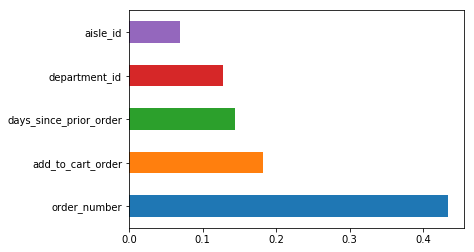

In [120]:
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train,y_train)
(pd.Series(rfc.feature_importances_, index=X_train.columns)
   .nlargest(5)
   .plot(kind='barh'))